# **Machine Learning and Data Analysis Project**

## **Introduction**

This will be a notebook to try to find a correlation between different datasets found in the https://www.ny.gov/programs/open-ny website.
The purpose of this project is to use all the abilities learned throughout the ADML course and make use of the data found here to make a business report on the subject.
For this we are going to be using the following datasets:
 - Hate_Crimes_by_County_and_Bias_Type__Beginning_2010_20241030
 - Index_Crimes_by_County_and_Agency__Beginning_1990_20241030
 - New_York_State_Population_Data__Beginning_2003_20241030
 - Quarterly_Census_of_Employment_and_Wages_Annual_Data__Beginning_2000_20241030
 - State_Taxes_and_Fees_Collected__Beginning_Fiscal_Year_Ending_March_31__1995_20241030
 - Title_and_Salary_Listing_20241030
 - Vital_Statistics_Suicide_Deaths_by_Age-Group__Race_Ethnicity__Resident_Region__and_Gender__Beginning_2003_20241030

We can make a few hyphothesis with just the titles alone, like what areas have more crime, is crime related to salary and taxes, are hate crimes and suicides related? Or are state taxes and fees that arbitrary by zone.
We can use this common themes to make a roadmap of what we can do and how to start.

### **First things first**

We need to prepare the data so we can start digging for clues. This process includes porting the datasets using pandas, taking notes of what we can use for each dataset, cleaning NaNs, deleting useless columns and showing the data for easier visualization.

We'll use this section to make general notes of the datasets throughout the project.

TODO:

- [x] Show all rows in Title Salary
- [ ] employmentDF['Area'] change to Counties

### **Second**

What relations can we gather with these datasets? Can we make joined datasets? Do we need anything else? This part is where we are going to make experiments of all kind so we can try to find something usefull.

If you need notes, TODOs or anything else, this is your chapter.

- After seeing the datasets, we wanted to search for new ones and make new relations.

### **La tercera es la vencida**

Implement a Machine Learning algorithm. By using all the data gathered above, we need to select the best practice of machine learning algorithm to use here. What do we want to predict? Do we need to find more relations between the datasets using machine learning? Does the algorithm need to be supervised or unsupervised? Do we need to restart the process? Was all of this for nothing? What is our purpose?

Got any bugs? Throw them here:

**Tambien tenemos que implementar Spark al final del proyecto ya sea de cualquier forma. Quiza sea de lo mas importante owo** 


### **Last but not least but actually is least important here but we don't want to be mala onda here so we'll say that**

The last thing we need to do is to make use of all our experiments and give them a purpose. What did we discovered in this project? Can we make a point with this? Can we teach something with this?

This last part is going to be the main hypothesis or guide, it may or maynot change, you know what you suscribed to...

Current Hypthesis:
- ~~Who'll win in a battle, Goku or Ben 10?~~

---
# 1. Preparing the Data

In [1]:
import pandas as pd # Need this to import the csv to python.

In [2]:
# Importing the datasets
nyStatePop  = pd.read_csv('Datasets/New_York_State_Population_Data__Beginning_2003_20241030.csv')
titleSalary = pd.read_csv('Datasets/Title_and_Salary_Listing_20241030.csv')
taxesFees   = pd.read_csv('Datasets/State_Taxes_and_Fees_Collected__Beginning_Fiscal_Year_Ending_March_31__1995_20241030.csv')
empSalary   = pd.read_csv('Datasets/Quarterly_Census_of_Employment_and_Wages_Annual_Data__Beginning_2000_20241030.csv')
indexCrimes = pd.read_csv('Datasets/Index_Crimes_by_County_and_Agency__Beginning_1990_20241030.csv')
hateCrimes  = pd.read_csv('Datasets/Hate_Crimes_by_County_and_Bias_Type__Beginning_2010_20241030.csv')
suicides    = pd.read_csv('Datasets/Vital_Statistics_Suicide_Deaths_by_Age-Group__Race_Ethnicity__Resident_Region__and_Gender__Beginning_2003_20241030.csv')

In [3]:
# Did it work? Let's show each one!
nyStatePop

# Remember that we can only work with numbers so we either delete or edit text columns.
# Edit race {0, 1, 2, ...}, County Name (We may need a dictionary for this since they are used regularly) and Gender (0, 1, 2)
# We could delete Age description idk

Year  Age Group Code Age Group Description  Gender Code  \
0       2003               0                 Total            0   
1       2003               0                 Total            0   
2       2003               0                 Total            0   
3       2003               0                 Total            0   
4       2003               0                 Total            0   
...      ...             ...                   ...          ...   
222295  2021               0                 Total            2   
222296  2021               0                 Total            1   
222297  2021               0                 Total            2   
222298  2021               0                 Total            1   
222299  2021               0                 Total            2   

       Gender Description  Race Ethnicity Code Race/Ethnicity Description  \
0                   Total                    0                      Total   
1                   Total                    1         White Non Hispanic   
2                   Total                    2         Black Non Hispanic   
3                   Total                    3         Other Non Hispanic   
4                   Total                    5                   Hispanic   
...                   ...                  ...                        ...   
222295             Female                    2         Black Non Hispanic   
222296               Male                    3         Other Non Hispanic   
222297             Female                    3         Other Non Hispanic   
222298               Male                    5                   Hispanic   
222299             Female                    5                   Hispanic   

        County Code     County Name  Population  
0                 1  New York State    19190115  
1                 1  New York State    11696047  
2                 1  New York State     3024588  
3                 1  New York State     1337294  
4                 1  New York State     3132186  
...             ...             ...         ...  
222295           65           Yates          86  
222296           65           Yates         197  
222297           65           Yates         298  
222298           65           Yates         279  
222299           65           Yates         264  

[222300 rows x 10 columns]

In [4]:
titleSalary
# Needs more analysis we need to clean nans, and edit text

Title Code                                    Title Name Grade  \
0         200000                               Accountant Aide    13   
1         200110                     Accountant Aide Trainee 1    NS   
2         200220                     Accountant Aide Trainee 2    NS   
3         403240                   Accountant Auditor Intern 1    NS   
4         403250                   Accountant Auditor Intern 2    NS   
...          ...                                           ...   ...   
4715     8167210  Youth Support Coordinator 2 Spanish Language    21   
4716     8167300                   Youth Support Coordinator 3    23   
4717     8167400                   Youth Support Coordinator 4    25   
4718     8202200                      Youth Support Specialist    14   
4719     9200350                    Zone Sergeant State Police    OS   

      Jurisdictional Classification Jurisdictional Classification Description  \
0                               0.0                               Competitive   
1                               0.0                               Competitive   
2                               0.0                               Competitive   
3                               1.0                           Non Competitive   
4                               1.0                           Non Competitive   
...                             ...                                       ...   
4715                            0.0                               Competitive   
4716                            0.0                               Competitive   
4717                            0.0                               Competitive   
4718                            1.0                           Non Competitive   
4719                            1.0                           Non Competitive   

      Negotiating Unit   Negotiating Unit Description  \
0                  5.0    PUBLIC EMPLOYEES FEDERATION   
1                  5.0    PUBLIC EMPLOYEES FEDERATION   
2                  5.0    PUBLIC EMPLOYEES FEDERATION   
3                  5.0    PUBLIC EMPLOYEES FEDERATION   
4                  5.0    PUBLIC EMPLOYEES FEDERATION   
...                ...                            ...   
4715               5.0    PUBLIC EMPLOYEES FEDERATION   
4716               5.0    PUBLIC EMPLOYEES FEDERATION   
4717               5.0    PUBLIC EMPLOYEES FEDERATION   
4718               4.0    INSTITUTIONAL SERVICES UNIT   
4719              17.0  STATE POLICE-OFFICERS AND NCO   

      Federal Occupational Code Federal Occupational Code Description  \
0                           5.0                     Paraprofessionals   
1                           5.0                     Paraprofessionals   
2                           5.0                     Paraprofessionals   
3                           2.0                         Professionals   
4                           2.0                         Professionals   
...                         ...                                   ...   
4715                        2.0                         Professionals   
4716                        2.0                         Professionals   
4717                        2.0                         Professionals   
4718                        5.0                     Paraprofessionals   
4719                        3.0                           Technicians   

     Job Level    Job Level Description Standard Number Agency Code  \
0            J  Journey Level, Approved        0200000F       XXXXX   
1            T        Trainee, Approved             NaN       XXXXX   
2            T        Trainee, Approved             NaN       XXXXX   
3            T        Trainee, Approved             NaN       XXXXX   
4            T        Trainee, Approved             NaN       XXXXX   
...        ...                      ...             ...         ...   
4715         P              Parenthetic        8167100F       25000   
4716         J  Journey Level, Approve

In [4]:
taxesFees
# Tax Category could easily parse to number, tax or Fee may need a dic

Fiscal Year Ended              Tax Category  \
0                  2023           Personal Income   
1                  2023  Corporation and Business   
2                  2023  Corporation and Business   
3                  2023  Corporation and Business   
4                  2023  Corporation and Business   
...                 ...                       ...   
1569               1995      Other Taxes and Fees   
1570               1995      Other Taxes and Fees   
1571               1995      Other Taxes and Fees   
1572               1995      Other Taxes and Fees   
1573               1995      Other Taxes and Fees   

                                             Tax or Fee  Amount Collected  \
0                                   Personal Income Tax       58775671289   
1                     Business Corporations Article 9-A        7260834148   
2     Foreign Corporation Licenses, Article 9, Secti...            419950   
3     Transportation, Transmission, Article 9, Secti...          15986522   
4     Transportation, Transmission, Article 9, Secti...          18844261   
...                                                 ...               ...   
1569  Wireless Communication Service Surcharges (Cou...                 0   
1570  Returnable Beverage Container Deposits (Enviro...                 0   
1571              Tax Return Preparer Registration Fees                 0   
1572        Office of General Services Procurement Fees                 0   
1573  Total State Taxes and Fees Collected by the De...       32710263971   

      Tax or Fee Sort Order  
0                         1  
1                         2  
2                         3  
3                         4  
4                         5  
...                     ...  
1569                     51  
1570                     52  
1571                     53  
1572                     54  
1573                     55  

[1574 rows x 5 columns]

In [5]:
empSalary
# Since most of these follow some rules, we can easily edit the text to numbers.

Area Type                                    Area  \
0       Workforce Investment Region  Albany-Rensselaer-Schenectady Counties   
1       Workforce Investment Region  Albany-Rensselaer-Schenectady Counties   
2       Workforce Investment Region  Albany-Rensselaer-Schenectady Counties   
3       Workforce Investment Region  Albany-Rensselaer-Schenectady Counties   
4       Workforce Investment Region  Albany-Rensselaer-Schenectady Counties   
...                             ...                                     ...   
530609                       County                            Yates County   
530610                       County                            Yates County   
530611                       County                            Yates County   
530612                       County                            Yates County   
530613                       County                            Yates County   

                    Ownership  NAICS  \
0            Local Government      0   
1       Total, All Ownerships     11   
2       Total, All Ownerships    111   
3       Total, All Ownerships   1112   
4       Total, All Ownerships   1114   
...                       ...    ...   
530609                Private    814   
530610  Total, All Ownerships   8141   
530611       State Government     92   
530612  Total, All Government    921   
530613       Local Government   9211   

                                       NAICS Title  Year  Establishments  \
0                            Total, All Industries  2023             301   
1       Agriculture, Forestry, Fishing and Hunting  2023              81   
2                                  Crop Production  2023              31   
3                      Vegetable and Melon Farming  2023              11   
4                Greenhouse and Nursery Production  2023               9   
...                                            ...   ...             ...   
530609                          Private Households  2000              12   
530610                          Private Households  2000              12   
530611                       Public Administration  2000               3   
530612    Executive, Legislative, & Gen Government  2000              14   
530613    Executive, Legislative, & Gen Government  2000              14   

        Average Employment  Total Wage  \
0                    29837  1919962420   
1                      758    32825328   
2                      266     7115343   
3                       64     1871878   
4                       77     2317979   
...                    ...         ...   
530609                  42      380818   
530610                  42      380818   
530611                  26     1562108   
530612                 462    10377643   
530613                 462    10377643   

        Annual Average Salary                                                                                                                                                    
0                                                   64348                                                                                                                        
1                                                   43305                                                                                                                        
2                                                   26749                                                                                                                        
3                                                   29248                                                                                                                        
4                                                   30104                                                                                                                        
...                                                   ...                                                     

In [6]:
indexCrimes
# Doesn't need much editing, we may or maynot use Agency

County                      Agency  Year  Months Reported  Index Total  \
0      Albany              Albany City PD  2022             12.0         4746   
1      Albany       Albany County Park PD  2022             12.0            1   
2      Albany       Albany County Sheriff  2022             12.0          127   
3      Albany  Albany County State Police  2022             12.0          131   
4      Albany              Altamont Vg PD  2022             12.0            1   
...       ...                         ...   ...              ...          ...   
22043   Yates                County Total  1990              NaN          507   
22044   Yates              Penn Yan Vg PD  1990              NaN          142   
22045   Yates        Yates County Park PD  1990              NaN            1   
22046   Yates        Yates County Sheriff  1990              NaN          318   
22047   Yates   Yates County State Police  1990              NaN           46   

       Violent Total  Murder  Rape  Robbery  Aggravated Assault  \
0                944      14    70      233                 627   
1                  0       0     0        0                   0   
2                 11       0     3        1                   7   
3                 42       0    26        5                  11   
4                  0       0     0        0                   0   
...              ...     ...   ...      ...                 ...   
22043             34       0     5        0                  29   
22044              3       0     1        0                   2   
22045              0       0     0        0                   0   
22046             29       0     4        0                  25   
22047              2       0     0        0                   2   

       Property Total  Burglary  Larceny  Motor Vehicle Theft  \
0                3802       566     2670                  566   
1                   1         0        1                    0   
2                 116        10       97                    9   
3                  89         7       77                    5   
4                   1         0        1                    0   
...               ...       ...      ...                  ...   
22043             473       104      361                    8   
22044             139        11      123                    5   
22045               1         0        1                    0   
22046             289        84      202                    3   
22047              44         9       35                    0   

                  Region  
0      Non-New York City  
1      Non-New York City  
2      Non-New York City  
3      Non-New York City  
4      Non-New York City  
...                  ...  
22043  Non-New York City  
22044  Non-New York City  
22045  Non-New York City  
22046  Non-New York City  
22047  Non-New York City  

[22048 rows x 15 columns]

In [7]:
hateCrimes
# Use county dict and Crime type to number

County  Year              Crime Type  Anti-Male  Anti-Female  \
0         Albany  2022  Crimes Against Persons          0            0   
1         Albany  2022         Property Crimes          0            0   
2          Bronx  2022  Crimes Against Persons          0            0   
3          Bronx  2022         Property Crimes          0            0   
4         Broome  2022  Crimes Against Persons          0            0   
..           ...   ...                     ...        ...          ...   
817       Ulster  2010         Property Crimes          0            0   
818   Washington  2010  Crimes Against Persons          0            0   
819        Wayne  2010  Crimes Against Persons          0            0   
820  Westchester  2010  Crimes Against Persons          0            0   
821  Westchester  2010         Property Crimes          0            0   

     Anti-Transgender  Anti-Gender Non-Conforming  Anti-Age*  Anti-White  \
0                   0                           0          0           0   
1                   0                           0          1           3   
2                   5                           0          0           0   
3                   0                           0          0           0   
4                   0                           0          0           0   
..                ...                         ...        ...         ...   
817                 0                           0          0           0   
818                 0                           0          0           0   
819                 0                           0          0           0   
820                 0                           0          0           1   
821                 0                           0          0           1   

     Anti-Black  ...  Anti-Gay Male  Anti-Gay Female  \
0             9  ...              4                0   
1            12  ...              0                0   
2             0  ...              6                1   
3            10  ...              0                0   
4             2  ...              2                0   
..          ...  ...            ...              ...   
817           0  ...              0                0   
818           0  ...              0                0   
819           2  ...              1                0   
820           3  ...              4                0   
821           1  ...              0                0   

     Anti-Gay (Male and Female)  Anti-Heterosexual  Anti-Bisexual  \
0                             0                  0              0   
1                             0                  0              0   
2                             0                  0              0   
3                             0                  0              0   
4                             0                  0              0   
..                          ...                ...            ...   
817                           0                  0              0   
818                           0                  0              0   
819                           0                  0              0   
820                           1                  0              0   
821                           1                  0              0   

     Anti-Physical Disability  Anti-Mental Disability  Total Incidents  \
0                           0                       0               18   
1                           0                       0               17   
2                           0                       0               19   
3                           0                       0               22   
4                           0                       0                7   
..                        ...                     ...              ...   
817                         0                       0                1   
818                         0                       0                1   
819                         0           

In [8]:
suicides
# Same as last ones, Age Group needs some thougth

Year Region   Race or Ethnicity Sex Age Group  Firearm Deaths  \
0     2003    NYC  Black Non Hispanic   F       1-9               0   
1     2003    NYC  Black Non Hispanic   M       1-9               0   
2     2003    NYC  Black Non Hispanic   F     10-19               0   
3     2003    NYC  Black Non Hispanic   M     10-19               7   
4     2003    NYC  Black Non Hispanic   F     20-24               0   
...    ...    ...                 ...  ..       ...             ...   
4533  2021    ROS  White Non Hispanic   M        <1               0   
4534  2021    ROS  White Non Hispanic   F     Total              31   
4535  2021    ROS  White Non Hispanic   M     Total             374   
4536  2021    ROS  White Non Hispanic   F   Unknown               0   
4537  2021    ROS  White Non Hispanic   M   Unknown               0   

      Alcohol-Related Deaths  Suicide Deaths  
0                          0               0  
1                          0               0  
2                          1               2  
3                          0               6  
4                          0               1  
...                      ...             ...  
4533                       0               0  
4534                    1048             197  
4535                    2266             765  
4536                       0               0  
4537                       0               0  

[4538 rows x 8 columns]

---
Best practice is to clean one by one, so we don't end up confused or tangled.

In [9]:
ny_counties = {
    "Albany": 0, "Allegany": 1, "Bronx": 2, "Broome": 3, "Cattaraugus": 4, "Cayuga": 5,
    "Chautauqua": 6, "Chemung": 7, "Chenango": 8, "Clinton": 9, "Columbia": 10, "Cortland": 11,
    "Delaware": 12, "Dutchess": 13, "Erie": 14, "Essex": 15, "Franklin": 16, "Fulton": 17,
    "Genesee": 18, "Greene": 19, "Hamilton": 20, "Herkimer": 21, "Jefferson": 22, "Kings": 23,
    "Lewis": 24, "Livingston": 25, "Madison": 26, "Monroe": 27, "Montgomery": 28, "Nassau": 29,
    "New York": 30,"New York State": 30, "New York City" : 30, "Niagara": 31, "Oneida": 32, "Onondaga": 33, "Ontario": 34, "Orange": 35,
    "Orleans": 36, "Oswego": 37, "Otsego": 38, "Putnam": 39, "Queens": 40, "Rensselaer": 41,
    "Richmond": 42, "Rockland": 43, "St Lawrence": 44, "Saratoga": 45, "Schenectady": 46,
    "Schoharie": 47, "Schuyler": 48, "Seneca": 49, "Steuben": 50, "Suffolk": 51, "Sullivan": 52,
    "Tioga": 53, "Tompkins": 54, "Ulster": 55, "Warren": 56, "Washington": 57, "Wayne": 58,
    "Westchester": 59, "Wyoming": 60, "Yates": 61, "Rest of State" : 62
}
# It'll be used through the whole project

In [10]:
# import dataframe
from pandas import DataFrame

In [11]:
popDF = DataFrame(nyStatePop)
popDF.head()

Year  Age Group Code Age Group Description  Gender Code Gender Description  \
0  2003               0                 Total            0              Total   
1  2003               0                 Total            0              Total   
2  2003               0                 Total            0              Total   
3  2003               0                 Total            0              Total   
4  2003               0                 Total            0              Total   

   Race Ethnicity Code Race/Ethnicity Description  County Code  \
0                    0                      Total            1   
1                    1         White Non Hispanic            1   
2                    2         Black Non Hispanic            1   
3                    3         Other Non Hispanic            1   
4                    5                   Hispanic            1   

      County Name  Population  
0  New York State    19190115  
1  New York State    11696047  
2  New York State     3024588  
3  New York State     1337294  
4  New York State     3132186

In [12]:
# Transofrm Age Group, Gender, Race and County
# We'll start with Age Group Description, first what values does it have?
popDF['Age Group Description'].unique()
# Here we notice that the descriptions are ranges or very vague, we need them to be single values so we can work with them.
# We can try to make {Total: 1, Less than 1: 0, and the ranges as an avg? or the decimal value maybe}

array(['Total', '<1', '01-09', '10-19', '20-24', '25-34', '35-44',
       '45-54', '85+', '55-64', '65-74', '75-84', 'Less than 1',
       '75 to 84', '20 to 24', '65 to 74', '25 to 34', '55 to 64',
       '35 to 44', '10 to 19', '1 to 9', '45 to 54'], dtype=object)

In [13]:
change = {'Total' : 10, 'Less than 1' : 0, '<1' : 0, '01-09' : 0.5, '10-19' : 1, '20-24' : 2, '25-34' : 2.5, '35-44' : 3, '45-54' : 4, '85+' : 8,
            '55-64' : 5, '65-74' : 6, '75-84' : 7, '75 to 84' : 7, '20 to 24' : 2, '65 to 74' : 6, '25 to 34' : 2.5, '55 to 64' : 5, '35 to 44' : 3,
            '10 to 19' : 1, '1 to 9' : 0.5, '45 to 54' : 4}
popDF['Age Group Description'] = popDF['Age Group Description'].map(change)

In [14]:
# Now we check the DF and the unique to see if everything is in order!
popDF

Year  Age Group Code  Age Group Description  Gender Code  \
0       2003               0                   10.0            0   
1       2003               0                   10.0            0   
2       2003               0                   10.0            0   
3       2003               0                   10.0            0   
4       2003               0                   10.0            0   
...      ...             ...                    ...          ...   
222295  2021               0                   10.0            2   
222296  2021               0                   10.0            1   
222297  2021               0                   10.0            2   
222298  2021               0                   10.0            1   
222299  2021               0                   10.0            2   

       Gender Description  Race Ethnicity Code Race/Ethnicity Description  \
0                   Total                    0                      Total   
1                   Total                    1         White Non Hispanic   
2                   Total                    2         Black Non Hispanic   
3                   Total                    3         Other Non Hispanic   
4                   Total                    5                   Hispanic   
...                   ...                  ...                        ...   
222295             Female                    2         Black Non Hispanic   
222296               Male                    3         Other Non Hispanic   
222297             Female                    3         Other Non Hispanic   
222298               Male                    5                   Hispanic   
222299             Female                    5                   Hispanic   

        County Code     County Name  Population  
0                 1  New York State    19190115  
1                 1  New York State    11696047  
2                 1  New York State     3024588  
3                 1  New York State     1337294  
4                 1  New York State     3132186  
...             ...             ...         ...  
222295           65           Yates          86  
222296           65           Yates         197  
222297           65           Yates         298  
222298           65           Yates         279  
222299           65           Yates         264  

[222300 rows x 10 columns]

In [15]:
popDF['Age Group Description'].unique()

array([10. ,  0. ,  0.5,  1. ,  2. ,  2.5,  3. ,  4. ,  8. ,  5. ,  6. ,
        7. ])

In [16]:
# As we can now see, the values that we are getting ar real numbers that we can work with.
# We can use this same process to map the other needed values.
# Gender Description
popDF['Gender Description'].unique()

array(['Total', 'Male', 'Female'], dtype=object)

In [17]:
# Three objects make this much easier.
change = {'Male' : 0, 'Female' : 1, 'Total' : 2}
popDF['Gender Description'] = popDF['Gender Description'].map(change)

In [18]:
# Verifying everything is in order
popDF

Year  Age Group Code  Age Group Description  Gender Code  \
0       2003               0                   10.0            0   
1       2003               0                   10.0            0   
2       2003               0                   10.0            0   
3       2003               0                   10.0            0   
4       2003               0                   10.0            0   
...      ...             ...                    ...          ...   
222295  2021               0                   10.0            2   
222296  2021               0                   10.0            1   
222297  2021               0                   10.0            2   
222298  2021               0                   10.0            1   
222299  2021               0                   10.0            2   

        Gender Description  Race Ethnicity Code Race/Ethnicity Description  \
0                        2                    0                      Total   
1                        2                    1         White Non Hispanic   
2                        2                    2         Black Non Hispanic   
3                        2                    3         Other Non Hispanic   
4                        2                    5                   Hispanic   
...                    ...                  ...                        ...   
222295                   1                    2         Black Non Hispanic   
222296                   0                    3         Other Non Hispanic   
222297                   1                    3         Other Non Hispanic   
222298                   0                    5                   Hispanic   
222299                   1                    5                   Hispanic   

        County Code     County Name  Population  
0                 1  New York State    19190115  
1                 1  New York State    11696047  
2                 1  New York State     3024588  
3                 1  New York State     1337294  
4                 1  New York State     3132186  
...             ...             ...         ...  
222295           65           Yates          86  
222296           65           Yates         197  
222297           65           Yates         298  
222298           65           Yates         279  
222299           65           Yates         264  

[222300 rows x 10 columns]

In [19]:
popDF['Gender Description'].unique()

array([2, 0, 1])

In [20]:
# Now Race/Ethnicity Description
popDF['Race/Ethnicity Description'].unique()

array(['Total', 'White Non Hispanic', 'Black Non Hispanic',
       'Other Non Hispanic', 'Hispanic'], dtype=object)

In [21]:
change = {'Total' : 4, 'White Non Hispanic' : 0, 'Black Non Hispanic' : 1, 'Other Non Hispanic' : 2, 'Hispanic' : 3}
popDF['Race/Ethnicity Description'] = popDF['Race/Ethnicity Description'].map(change)

In [22]:
popDF

Year  Age Group Code  Age Group Description  Gender Code  \
0       2003               0                   10.0            0   
1       2003               0                   10.0            0   
2       2003               0                   10.0            0   
3       2003               0                   10.0            0   
4       2003               0                   10.0            0   
...      ...             ...                    ...          ...   
222295  2021               0                   10.0            2   
222296  2021               0                   10.0            1   
222297  2021               0                   10.0            2   
222298  2021               0                   10.0            1   
222299  2021               0                   10.0            2   

        Gender Description  Race Ethnicity Code  Race/Ethnicity Description  \
0                        2                    0                           4   
1                        2                    1                           0   
2                        2                    2                           1   
3                        2                    3                           2   
4                        2                    5                           3   
...                    ...                  ...                         ...   
222295                   1                    2                           1   
222296                   0                    3                           2   
222297                   1                    3                           2   
222298                   0                    5                           3   
222299                   1                    5                           3   

        County Code     County Name  Population  
0                 1  New York State    19190115  
1                 1  New York State    11696047  
2                 1  New York State     3024588  
3                 1  New York State     1337294  
4                 1  New York State     3132186  
...             ...             ...         ...  
222295           65           Yates          86  
222296           65           Yates         197  
222297           65           Yates         298  
222298           65           Yates         279  
222299           65           Yates         264  

[222300 rows x 10 columns]

In [23]:
popDF['Race/Ethnicity Description'].unique()

array([4, 0, 1, 2, 3])

In [24]:
# Now we are just missing the County names, this may be a global dictionary that we'll need to use later so I'm going to declare it at the start
# So we don't overwrite it and can use it freely.
popDF['County Name'].unique()

array(['New York State', 'New York City', 'Seneca', 'Bronx', 'Kings',
       'New York', 'Queens', 'Erie', 'Richmond', 'Wayne', 'Cattaraugus',
       'Rest of State', 'Lewis', 'Albany', 'Allegany', 'Broome', 'Oneida',
       'Ontario', 'Cayuga', 'Chautauqua', 'Chemung', 'Chenango',
       'Clinton', 'Columbia', 'Essex', 'Cortland', 'Delaware', 'Dutchess',
       'Oswego', 'Franklin', 'Fulton', 'Genesee', 'Greene', 'Putnam',
       'Hamilton', 'Herkimer', 'Jefferson', 'Livingston', 'Montgomery',
       'Madison', 'Monroe', 'Nassau', 'Niagara', 'Onondaga', 'Orange',
       'Orleans', 'Otsego', 'Rensselaer', 'Rockland', 'St Lawrence',
       'Yates', 'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler',
       'Steuben', 'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Ulster',
       'Warren', 'Washington', 'Westchester', 'Wyoming'], dtype=object)

In [25]:
popDF['County Name'] = popDF['County Name'].map(ny_counties)
popDF['County Name'].unique()

array([30, 49,  2, 23, 40, 14, 42, 58,  4, 62, 24,  0,  1,  3, 32, 34,  5,
        6,  7,  8,  9, 10, 15, 11, 12, 13, 37, 16, 17, 18, 19, 39, 20, 21,
       22, 25, 28, 26, 27, 29, 31, 33, 35, 36, 38, 41, 43, 44, 61, 45, 46,
       47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60])

In [26]:
popDF

Year  Age Group Code  Age Group Description  Gender Code  \
0       2003               0                   10.0            0   
1       2003               0                   10.0            0   
2       2003               0                   10.0            0   
3       2003               0                   10.0            0   
4       2003               0                   10.0            0   
...      ...             ...                    ...          ...   
222295  2021               0                   10.0            2   
222296  2021               0                   10.0            1   
222297  2021               0                   10.0            2   
222298  2021               0                   10.0            1   
222299  2021               0                   10.0            2   

        Gender Description  Race Ethnicity Code  Race/Ethnicity Description  \
0                        2                    0                           4   
1                        2                    1                           0   
2                        2                    2                           1   
3                        2                    3                           2   
4                        2                    5                           3   
...                    ...                  ...                         ...   
222295                   1                    2                           1   
222296                   0                    3                           2   
222297                   1                    3                           2   
222298                   0                    5                           3   
222299                   1                    5                           3   

        County Code  County Name  Population  
0                 1           30    19190115  
1                 1           30    11696047  
2                 1           30     3024588  
3                 1           30     1337294  
4                 1           30     3132186  
...             ...          ...         ...  
222295           65           61          86  
222296           65           61         197  
222297           65           61         298  
222298           65           61         279  
222299           65           61         264  

[222300 rows x 10 columns]

In [27]:
# Since we already have a county number, we can delete county code
popDF = popDF.drop(columns = 'County Code')
popDF

Year  Age Group Code  Age Group Description  Gender Code  \
0       2003               0                   10.0            0   
1       2003               0                   10.0            0   
2       2003               0                   10.0            0   
3       2003               0                   10.0            0   
4       2003               0                   10.0            0   
...      ...             ...                    ...          ...   
222295  2021               0                   10.0            2   
222296  2021               0                   10.0            1   
222297  2021               0                   10.0            2   
222298  2021               0                   10.0            1   
222299  2021               0                   10.0            2   

        Gender Description  Race Ethnicity Code  Race/Ethnicity Description  \
0                        2                    0                           4   
1                        2                    1                           0   
2                        2                    2                           1   
3                        2                    3                           2   
4                        2                    5                           3   
...                    ...                  ...                         ...   
222295                   1                    2                           1   
222296                   0                    3                           2   
222297                   1                    3                           2   
222298                   0                    5                           3   
222299                   1                    5                           3   

        County Name  Population  
0                30    19190115  
1                30    11696047  
2                30     3024588  
3                30     1337294  
4                30     3132186  
...             ...         ...  
222295           61          86  
222296           61         197  
222297           61         298  
222298           61         279  
222299           61         264  

[222300 rows x 9 columns]

In [28]:
# Now we can move on to the next dataset (titleSalary)
salaryDF = DataFrame(titleSalary)
salaryDF
# Why would we even need to change the title??? MB

Title Code                                    Title Name Grade  \
0         200000                               Accountant Aide    13   
1         200110                     Accountant Aide Trainee 1    NS   
2         200220                     Accountant Aide Trainee 2    NS   
3         403240                   Accountant Auditor Intern 1    NS   
4         403250                   Accountant Auditor Intern 2    NS   
...          ...                                           ...   ...   
4715     8167210  Youth Support Coordinator 2 Spanish Language    21   
4716     8167300                   Youth Support Coordinator 3    23   
4717     8167400                   Youth Support Coordinator 4    25   
4718     8202200                      Youth Support Specialist    14   
4719     9200350                    Zone Sergeant State Police    OS   

      Jurisdictional Classification Jurisdictional Classification Description  \
0                               0.0                               Competitive   
1                               0.0                               Competitive   
2                               0.0                               Competitive   
3                               1.0                           Non Competitive   
4                               1.0                           Non Competitive   
...                             ...                                       ...   
4715                            0.0                               Competitive   
4716                            0.0                               Competitive   
4717                            0.0                               Competitive   
4718                            1.0                           Non Competitive   
4719                            1.0                           Non Competitive   

      Negotiating Unit   Negotiating Unit Description  \
0                  5.0    PUBLIC EMPLOYEES FEDERATION   
1                  5.0    PUBLIC EMPLOYEES FEDERATION   
2                  5.0    PUBLIC EMPLOYEES FEDERATION   
3                  5.0    PUBLIC EMPLOYEES FEDERATION   
4                  5.0    PUBLIC EMPLOYEES FEDERATION   
...                ...                            ...   
4715               5.0    PUBLIC EMPLOYEES FEDERATION   
4716               5.0    PUBLIC EMPLOYEES FEDERATION   
4717               5.0    PUBLIC EMPLOYEES FEDERATION   
4718               4.0    INSTITUTIONAL SERVICES UNIT   
4719              17.0  STATE POLICE-OFFICERS AND NCO   

      Federal Occupational Code Federal Occupational Code Description  \
0                           5.0                     Paraprofessionals   
1                           5.0                     Paraprofessionals   
2                           5.0                     Paraprofessionals   
3                           2.0                         Professionals   
4                           2.0                         Professionals   
...                         ...                                   ...   
4715                        2.0                         Professionals   
4716                        2.0                         Professionals   
4717                        2.0                         Professionals   
4718                        5.0                     Paraprofessionals   
4719                        3.0                           Technicians   

     Job Level    Job Level Description Standard Number Agency Code  \
0            J  Journey Level, Approved        0200000F       XXXXX   
1            T        Trainee, Approved             NaN       XXXXX   
2            T        Trainee, Approved             NaN       XXXXX   
3            T        Trainee, Approved             NaN       XXXXX   
4            T        Trainee, Approved             NaN       XXXXX   
...        ...                      ...             ...         ...   
4715         P              Parenthetic        8167100F       25000   
4716         J  Journey Level, Approve

In [29]:
salaryDF['Jurisdictional Classification Description'].unique()

array(['Competitive', 'Non Competitive', 'Exempt', 'Other',
       'Pending Non Competitive', 'Unclassified', 'Labor', nan,
       'Pending Exempt'], dtype=object)

In [30]:
change = {'Competitive' : 1, 'Non Competitive' : 2, 'Exempt' : 3, 'Other' : 4, 'Pedning Non Competitive' : 5, 'Unclassified' : 6,
          'Labor' : 7, 'Pending Exempt' : 8}
salaryDF['Jurisdictional Classification Description'] = salaryDF['Jurisdictional Classification Description'].map(change)

In [31]:
salaryDF

Title Code                                    Title Name Grade  \
0         200000                               Accountant Aide    13   
1         200110                     Accountant Aide Trainee 1    NS   
2         200220                     Accountant Aide Trainee 2    NS   
3         403240                   Accountant Auditor Intern 1    NS   
4         403250                   Accountant Auditor Intern 2    NS   
...          ...                                           ...   ...   
4715     8167210  Youth Support Coordinator 2 Spanish Language    21   
4716     8167300                   Youth Support Coordinator 3    23   
4717     8167400                   Youth Support Coordinator 4    25   
4718     8202200                      Youth Support Specialist    14   
4719     9200350                    Zone Sergeant State Police    OS   

      Jurisdictional Classification  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               1.0   
4                               1.0   
...                             ...   
4715                            0.0   
4716                            0.0   
4717                            0.0   
4718                            1.0   
4719                            1.0   

      Jurisdictional Classification Description  Negotiating Unit  \
0                                           1.0               5.0   
1                                           1.0               5.0   
2                                           1.0               5.0   
3                                           2.0               5.0   
4                                           2.0               5.0   
...                                         ...               ...   
4715                                        1.0               5.0   
4716                                        1.0               5.0   
4717                                        1.0               5.0   
4718                                        2.0               4.0   
4719                                        2.0              17.0   

       Negotiating Unit Description  Federal Occupational Code  \
0       PUBLIC EMPLOYEES FEDERATION                        5.0   
1       PUBLIC EMPLOYEES FEDERATION                        5.0   
2       PUBLIC EMPLOYEES FEDERATION                        5.0   
3       PUBLIC EMPLOYEES FEDERATION                        2.0   
4       PUBLIC EMPLOYEES FEDERATION                        2.0   
...                             ...                        ...   
4715    PUBLIC EMPLOYEES FEDERATION                        2.0   
4716    PUBLIC EMPLOYEES FEDERATION                        2.0   
4717    PUBLIC EMPLOYEES FEDERATION                        2.0   
4718    INSTITUTIONAL SERVICES UNIT                        5.0   
4719  STATE POLICE-OFFICERS AND NCO                        3.0   

     Federal Occupational Code Description Job Level    Job Level Description  \
0                        Paraprofessionals         J  Journey Level, Approved   
1                        Paraprofessionals         T        Trainee, Approved   
2                        Paraprofessionals         T        Trainee, Approved   
3                            Professionals         T        Trainee, Approved   
4                            Professionals         T        Trainee, Approved   
...                                    ...       ...                      ...   
4715                         Professionals         P              Parenthetic   
4716                         Professionals         J  Journey Level, Approved   
4717                         Professionals         J  Journey Level, Approved   
4718                     Paraprofessionals         J  Journey Level, Approved   
4719                           Technicians         J  Journey Level, Approved   

     Standard Number Agency Code            Agency Description  \
0          

In [32]:
salaryDF['Negotiating Unit Description'].unique()

array(['PUBLIC EMPLOYEES FEDERATION', 'MANAGERIAL/CONFIDENTIAL  GROUP',
       'INSTITUTIONAL SERVICES UNIT', 'ADMINISTRATIVE SERVICES UNIT',
       'CASUAL', 'OPERATIONAL SERVICES UNIT', 'NYS BRIDGE AUTHORITY',
       'NEW YORK STATE CANAL CORP-PST', 'NYS THRUWAY AUTHORITY - MC',
       'UUP - LIFEGUARDS', 'MANAGERIAL/CONFIDENTIAL GRP-SP',
       'NYS HOUSING FINANCE AGENCY', 'PUBLIC EMPLOYMENT RELATIONS BD',
       'SECURITY SERVICES UNIT non-arb', 'NYS THRUWAY AUTHORITY - TEC-SP',
       'NYS THRUWAY AUTHORITY - MNT,TO', 'NEW YORK STATE CANAL CORP-MC',
       'NEW YORK STATE CANAL CORP-OSU', 'STATE POLICE-OFFICERS AND NCO',
       'AGENCY POLICE SERVICES', 'SECURITY SUPVRS UNIT non-arb',
       'SECURITY SERVICES UNIT', 'SECURITY SUPERVISORS UNIT', nan,
       'NOT COVERED BY ARTICLE 14 CSL', 'HOUSING AND COMMUNITY RENEW-RA',
       'STATE POLICE INVESTIGATORS', 'NYS TEACHERS RETIREMENT SYSTEM',
       'STATE POLICE - TROOPERS'], dtype=object)

In [33]:
salaryDF = salaryDF.drop(columns = 'Negotiating Unit Description')

In [34]:
salaryDF

Title Code                                    Title Name Grade  \
0         200000                               Accountant Aide    13   
1         200110                     Accountant Aide Trainee 1    NS   
2         200220                     Accountant Aide Trainee 2    NS   
3         403240                   Accountant Auditor Intern 1    NS   
4         403250                   Accountant Auditor Intern 2    NS   
...          ...                                           ...   ...   
4715     8167210  Youth Support Coordinator 2 Spanish Language    21   
4716     8167300                   Youth Support Coordinator 3    23   
4717     8167400                   Youth Support Coordinator 4    25   
4718     8202200                      Youth Support Specialist    14   
4719     9200350                    Zone Sergeant State Police    OS   

      Jurisdictional Classification  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               1.0   
4                               1.0   
...                             ...   
4715                            0.0   
4716                            0.0   
4717                            0.0   
4718                            1.0   
4719                            1.0   

      Jurisdictional Classification Description  Negotiating Unit  \
0                                           1.0               5.0   
1                                           1.0               5.0   
2                                           1.0               5.0   
3                                           2.0               5.0   
4                                           2.0               5.0   
...                                         ...               ...   
4715                                        1.0               5.0   
4716                                        1.0               5.0   
4717                                        1.0               5.0   
4718                                        2.0               4.0   
4719                                        2.0              17.0   

      Federal Occupational Code Federal Occupational Code Description  \
0                           5.0                     Paraprofessionals   
1                           5.0                     Paraprofessionals   
2                           5.0                     Paraprofessionals   
3                           2.0                         Professionals   
4                           2.0                         Professionals   
...                         ...                                   ...   
4715                        2.0                         Professionals   
4716                        2.0                         Professionals   
4717                        2.0                         Professionals   
4718                        5.0                     Paraprofessionals   
4719                        3.0                           Technicians   

     Job Level    Job Level Description Standard Number Agency Code  \
0            J  Journey Level, Approved        0200000F       XXXXX   
1            T        Trainee, Approved             NaN       XXXXX   
2            T        Trainee, Approved             NaN       XXXXX   
3            T        Trainee, Approved             NaN       XXXXX   
4            T        Trainee, Approved             NaN       XXXXX   
...        ...                      ...             ...         ...   
4715         P              Parenthetic        8167100F       25000   
4716         J  Journey Level, Approved        8167100F       25000   
4717         J  Journey Level, Approved        8167100F       25000   
4718         J  Journey Level, Approved        8202100F       25000   
4719         J  Journey Level, Approved             NaN       01060   

                Agency Description  Filled Positions Effective Date  
0                Multiple Agencies         

In [35]:
salaryDF = salaryDF.drop(columns = 'Federal Occupational Code Description')

In [36]:
salaryDF

Title Code                                    Title Name Grade  \
0         200000                               Accountant Aide    13   
1         200110                     Accountant Aide Trainee 1    NS   
2         200220                     Accountant Aide Trainee 2    NS   
3         403240                   Accountant Auditor Intern 1    NS   
4         403250                   Accountant Auditor Intern 2    NS   
...          ...                                           ...   ...   
4715     8167210  Youth Support Coordinator 2 Spanish Language    21   
4716     8167300                   Youth Support Coordinator 3    23   
4717     8167400                   Youth Support Coordinator 4    25   
4718     8202200                      Youth Support Specialist    14   
4719     9200350                    Zone Sergeant State Police    OS   

      Jurisdictional Classification  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               1.0   
4                               1.0   
...                             ...   
4715                            0.0   
4716                            0.0   
4717                            0.0   
4718                            1.0   
4719                            1.0   

      Jurisdictional Classification Description  Negotiating Unit  \
0                                           1.0               5.0   
1                                           1.0               5.0   
2                                           1.0               5.0   
3                                           2.0               5.0   
4                                           2.0               5.0   
...                                         ...               ...   
4715                                        1.0               5.0   
4716                                        1.0               5.0   
4717                                        1.0               5.0   
4718                                        2.0               4.0   
4719                                        2.0              17.0   

      Federal Occupational Code Job Level    Job Level Description  \
0                           5.0         J  Journey Level, Approved   
1                           5.0         T        Trainee, Approved   
2                           5.0         T        Trainee, Approved   
3                           2.0         T        Trainee, Approved   
4                           2.0         T        Trainee, Approved   
...                         ...       ...                      ...   
4715                        2.0         P              Parenthetic   
4716                        2.0         J  Journey Level, Approved   
4717                        2.0         J  Journey Level, Approved   
4718                        5.0         J  Journey Level, Approved   
4719                        3.0         J  Journey Level, Approved   

     Standard Number Agency Code            Agency Description  \
0           0200000F       XXXXX             Multiple Agencies   
1                NaN       XXXXX             Multiple Agencies   
2                NaN       XXXXX             Multiple Agencies   
3                NaN       XXXXX             Multiple Agencies   
4                NaN       XXXXX             Multiple Agencies   
...              ...         ...                           ...   
4715        8167100F       25000  Children&Family Svcs, Off of   
4716        8167100F       25000  Children&Family Svcs, Off of   
4717        8167100F       25000  Children&Family Svcs, Off of   
4718        8202100F       25000  Children&Family Svcs, Off of   
4719             NaN       01060     State Police, Division of   

      Filled Positions Effective Date  
0                   24     04/16/1987  
1                    0     06/06/1983  
2                    0     06/06/1983  
3                    0     12/21/1988  
4        

In [37]:
salaryDF['Job Level'].unique()

array(['J', 'T', 'P', 'I', 'S', 'C', 'E', 'A', nan, '9'], dtype=object)

In [38]:
change = {'J' : 1, 'T' : 2, 'P' : 3, 'I' : 4, 'S' : 5, 'C' : 6, 'E' : 7, 'A' : 8, '9' : 9}

salaryDF['Job Level'] = salaryDF['Job Level'].map(change)

In [39]:
salaryDF

Title Code                                    Title Name Grade  \
0         200000                               Accountant Aide    13   
1         200110                     Accountant Aide Trainee 1    NS   
2         200220                     Accountant Aide Trainee 2    NS   
3         403240                   Accountant Auditor Intern 1    NS   
4         403250                   Accountant Auditor Intern 2    NS   
...          ...                                           ...   ...   
4715     8167210  Youth Support Coordinator 2 Spanish Language    21   
4716     8167300                   Youth Support Coordinator 3    23   
4717     8167400                   Youth Support Coordinator 4    25   
4718     8202200                      Youth Support Specialist    14   
4719     9200350                    Zone Sergeant State Police    OS   

      Jurisdictional Classification  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               1.0   
4                               1.0   
...                             ...   
4715                            0.0   
4716                            0.0   
4717                            0.0   
4718                            1.0   
4719                            1.0   

      Jurisdictional Classification Description  Negotiating Unit  \
0                                           1.0               5.0   
1                                           1.0               5.0   
2                                           1.0               5.0   
3                                           2.0               5.0   
4                                           2.0               5.0   
...                                         ...               ...   
4715                                        1.0               5.0   
4716                                        1.0               5.0   
4717                                        1.0               5.0   
4718                                        2.0               4.0   
4719                                        2.0              17.0   

      Federal Occupational Code  Job Level    Job Level Description  \
0                           5.0        1.0  Journey Level, Approved   
1                           5.0        2.0        Trainee, Approved   
2                           5.0        2.0        Trainee, Approved   
3                           2.0        2.0        Trainee, Approved   
4                           2.0        2.0        Trainee, Approved   
...                         ...        ...                      ...   
4715                        2.0        3.0              Parenthetic   
4716                        2.0        1.0  Journey Level, Approved   
4717                        2.0        1.0  Journey Level, Approved   
4718                        5.0        1.0  Journey Level, Approved   
4719                        3.0        1.0  Journey Level, Approved   

     Standard Number Agency Code            Agency Description  \
0           0200000F       XXXXX             Multiple Agencies   
1                NaN       XXXXX             Multiple Agencies   
2                NaN       XXXXX             Multiple Agencies   
3                NaN       XXXXX             Multiple Agencies   
4                NaN       XXXXX             Multiple Agencies   
...              ...         ...                           ...   
4715        8167100F       25000  Children&Family Svcs, Off of   
4716        8167100F       25000  Children&Family Svcs, Off of   
4717        8167100F       25000  Children&Family Svcs, Off of   
4718        8202100F       25000  Children&Family Svcs, Off of   
4719             NaN       01060     State Police, Division of   

      Filled Positions Effective Date  
0                   24     04/16/1987  
1                    0     06/06/1983  
2                    0     06/06/1983  
3                    0     12/21/1988

In [40]:
salaryDF = salaryDF.drop(columns = 'Job Level Description')

In [41]:
salaryDF = salaryDF.drop(columns = 'Agency Code')

In [42]:
salaryDF

Title Code                                    Title Name Grade  \
0         200000                               Accountant Aide    13   
1         200110                     Accountant Aide Trainee 1    NS   
2         200220                     Accountant Aide Trainee 2    NS   
3         403240                   Accountant Auditor Intern 1    NS   
4         403250                   Accountant Auditor Intern 2    NS   
...          ...                                           ...   ...   
4715     8167210  Youth Support Coordinator 2 Spanish Language    21   
4716     8167300                   Youth Support Coordinator 3    23   
4717     8167400                   Youth Support Coordinator 4    25   
4718     8202200                      Youth Support Specialist    14   
4719     9200350                    Zone Sergeant State Police    OS   

      Jurisdictional Classification  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               1.0   
4                               1.0   
...                             ...   
4715                            0.0   
4716                            0.0   
4717                            0.0   
4718                            1.0   
4719                            1.0   

      Jurisdictional Classification Description  Negotiating Unit  \
0                                           1.0               5.0   
1                                           1.0               5.0   
2                                           1.0               5.0   
3                                           2.0               5.0   
4                                           2.0               5.0   
...                                         ...               ...   
4715                                        1.0               5.0   
4716                                        1.0               5.0   
4717                                        1.0               5.0   
4718                                        2.0               4.0   
4719                                        2.0              17.0   

      Federal Occupational Code  Job Level Standard Number  \
0                           5.0        1.0        0200000F   
1                           5.0        2.0             NaN   
2                           5.0        2.0             NaN   
3                           2.0        2.0             NaN   
4                           2.0        2.0             NaN   
...                         ...        ...             ...   
4715                        2.0        3.0        8167100F   
4716                        2.0        1.0        8167100F   
4717                        2.0        1.0        8167100F   
4718                        5.0        1.0        8202100F   
4719                        3.0        1.0             NaN   

                Agency Description  Filled Positions Effective Date  
0                Multiple Agencies                24     04/16/1987  
1                Multiple Agencies                 0     06/06/1983  
2                Multiple Agencies                 0     06/06/1983  
3                Multiple Agencies                 0     12/21/1988  
4                Multiple Agencies                 0     12/21/1988  
...                            ...               ...            ...  
4715  Children&Family Svcs, Off of                 0     02/14/2024  
4716  Children&Family Svcs, Off of                 2     02/14/2024  
4717  Children&Family Svcs, Off of                 3     02/14/2024  
4718  Children&Family Svcs, Off of               347     01/13/2022  
4719     State Police, Division of                72     07/01/1998  

[4720 rows x 12 columns]

In [43]:
def values_to_mapping(it):
    values = sorted(it)
    size = len(values)
    return {k:v for (k, v) in zip(values, range(size))}

In [45]:
def dict_translate(d, key, mapping):
    d[key] = mapping[d[key]]
    return d

In [44]:
#for i, item in enumerate(salaryDF['Title Name'].unique()):
    #print(f'\'{item}\' :',i, ',')
title_name = values_to_mapping(salaryDF['Title Name'])
print(title_name)

{'Accountant Aide': 0, 'Accountant Aide Trainee 1': 1, 'Accountant Aide Trainee 2': 2, 'Accountant Auditor Intern 1': 3, 'Accountant Auditor Intern 2': 4, 'Accountant Trainee 1': 5, 'Accountant Trainee 2': 6, 'Accounting Program Dir': 7, 'Actuary Trainee': 8, 'Adaptive Equipment Specialist': 9, 'Addictions Counselor 1': 10, 'Addictions Counselor 1 Spanish Language': 11, 'Addictions Counselor 2': 12, 'Addictions Counselor 2 Spanish Language': 13, 'Addictions Counselor 3': 14, 'Addictions Counselor Assnt': 15, 'Addictions Counselor Assnt Span Lang': 16, 'Addictions Counselor Assnt Trainee': 17, 'Addictions Planning Analyst 1': 18, 'Addictions Planning Analyst 2': 19, 'Addictions Planning Analyst 3': 20, 'Addictions Planning Analyst 4': 21, 'Addictions Program Specialist 1': 22, 'Addictions Program Specialist 1 Harm Reduction': 23, 'Addictions Program Specialist 2': 24, 'Addictions Program Specialist 2 Gambling': 25, 'Addictions Program Specialist 2 Harm Reduction': 26, 'Addictions Progra

In [49]:
salaryDF['Title Name'] = (salaryDF['Title Name'].map(lambda d: dict_translate(d, salaryDF['Title Name'], title_name)))
salaryDF['Title Name']

TypeError: string indices must be integers, not 'Series'

In [45]:
change = {
    'Accountant Aide' : 0 ,
'Accountant Aide Trainee 1' : 1 ,
'Accountant Aide Trainee 2' : 2 ,
'Accountant Auditor Intern 1' : 3 ,
'Accountant Auditor Intern 2' : 4 ,
'Accountant Trainee 1' : 5 ,
'Accountant Trainee 2' : 6 ,
'Accounting Program Dir' : 7 ,
'Actuary Trainee' : 8 ,
'Adaptive Equipment Specialist' : 9 ,
'Addictions Counselor 1' : 10 ,
'Addictions Counselor 1 Spanish Language' : 11 ,
'Addictions Counselor 2' : 12 ,
'Addictions Counselor 2 Spanish Language' : 13 ,
'Addictions Counselor 3' : 14 ,
'Addictions Counselor Assnt' : 15 ,
'Addictions Counselor Assnt Span Lang' : 16 ,
'Addictions Counselor Assnt Trainee' : 17 ,
'Addictions Planning Analyst 1' : 18 ,
'Addictions Planning Analyst 2' : 19 ,
'Addictions Planning Analyst 3' : 20 ,
'Addictions Planning Analyst 4' : 21 ,
'Addictions Program Specialist 1' : 22 ,
'Addictions Program Specialist 1 Harm Reduction' : 23 ,
'Addictions Program Specialist 2' : 24 ,
'Addictions Program Specialist 2 Gambling' : 25 ,
'Addictions Program Specialist 2 Harm Reduction' : 26 ,
'Addictions Program Specialist 3' : 27 ,
'Addictions Program Specialist 4' : 28 ,
'Addictions Program Specialist 4 Harm Reduction' : 29 ,
'Addictions Program Specialist Trainee 1' : 30 ,
'Addictions Program Specialist Trainee 2' : 31 ,
'Admnv Analyst Trainee 1' : 32 ,
'Admnv Analyst Trainee 2' : 33 ,
'Admnv Assistant' : 34 ,
'Admnv Assistant 1' : 35 ,
'Admnv Assistant 1 French L' : 36 ,
'Admnv Assistant 1 Russian L' : 37 ,
'Admnv Assistant 1 Spanish L' : 38 ,
'Admnv Assistant 2' : 39 ,
'Admnv Assistant Trainee 1' : 40 ,
'Admnv Assistant Trainee 1 French Language' : 41 ,
'Admnv Assistant Trainee 1 Russian Lang' : 42 ,
'Admnv Assistant Trainee 1 Spanish Lang' : 43 ,
'Admnv Assistant Trainee 2' : 44 ,
'Admnv Assistant Trainee 2 French Language' : 45 ,
'Admnv Assistant Trainee 2 Russian Lang' : 46 ,
'Admnv Assistant Trainee 2 Spanish Lang' : 47 ,
'Admnv Officer' : 48 ,
'Admnv Officer 1' : 49 ,
'Admnv Officer 2' : 50 ,
'Admnv Officer 3' : 51 ,
'Admnv Officer 4' : 52 ,
'Admnv Officer 5' : 53 ,
'Admnv Officer 6' : 54 ,
'Admnv Officer 7' : 55 ,
'Admnv Specialist 1' : 56 ,
'Admnv Specialist 2' : 57 ,
'Admnv Specialist Trainee 1' : 58 ,
'Admnv Specialist Trainee 2' : 59 ,
'Admr Educl Finance Research Services' : 60 ,
'Admr Employee Health Services' : 61 ,
'Admr New York State Veterans Home' : 62 ,
'Admr Voc & Educl Service Coord' : 63 ,
'Advisor To State Board Real Estate Appraisal' : 64 ,
'Advocacy Specialist 1' : 65 ,
'Advocacy Specialist 2' : 66 ,
'Advocacy Specialist 3' : 67 ,
'Advocacy Specialist 4' : 68 ,
'Advocacy Specialist 5' : 69 ,
'Affirmative Action Admr 4' : 70 ,
'Affirmative Action Admr 5' : 71 ,
'Agency Emergency Management Coord' : 72 ,
'Agency Emergency Management Coordinator ITS' : 73 ,
'Agency Emergency Management Supervisor' : 74 ,
'Agency Emergency Management Supervisor ITS' : 75 ,
'Agency Safety & Health Dir 1' : 76 ,
'Agency Safety & Health Dir 2' : 77 ,
'Agency Safety & Health Dir 2 Mental Hygiene' : 78 ,
'Agency Safety & Health Rep 1' : 79 ,
'Agency Safety & Health Rep 2' : 80 ,
'Aging Programs Manager' : 81 ,
'Aging Services Area Supvr' : 82 ,
'Aging Services Nutrition Consultant 1' : 83 ,
'Aging Services Nutrition Consultant 2' : 84 ,
'Aging Services Program Analyst 2' : 85 ,
'Aging Services Program Analyst 3' : 86 ,
'Aging Services Program Coord 1' : 87 ,
'Aging Services Program Coord 2' : 88 ,
'Aging Services Rep' : 89 ,
'Aging Services Rep Spanish Language' : 90 ,
'Agricultural Policy Analyst' : 91 ,
'Aids Program Manager 1' : 92 ,
'Aids Program Manager 2' : 93 ,
'Aids Program Manager 3' : 94 ,
'Aids Program Rep 1' : 95 ,
'Aids Program Rep 2' : 96 ,
'Aircraft Maintenance Supvr' : 97 ,
'Aircraft Mechanic' : 98 ,
'Aircraft Pilot' : 99 ,
'Aircraft Scheduling Assnt' : 100 ,
'Air Pollution Meteorologist 1' : 101 ,
'Air Pollution Meteorologist 2' : 102 ,
'Air Pollution Meteorologist 3' : 103 ,
'Air Pollution Meteorologist Trainee 1' : 104 ,
'Air Pollution Meteorologist Trainee 2' : 105 ,
'Alcohol Recovery Program Aide' : 106 ,
'Alcohol & Substance AbsTrtmnt Prg Assnt Tr' : 107 ,
'Alcohol & Substance Abs Trt Prg Assnt Tr SL' : 108 ,
'Alcohol & Substance Abuse Treatment Prg Assnt' : 109 ,
'Alcohol & Substance Abuse Treatment Prg Assnt S L' : 110 ,
'Animal Health Inspector 1' : 111 ,
'Animal Health Inspector 2' : 112 ,
'Apiary Inspector' : 113 ,
'Appointments Examiner 1' : 114 ,
'Appointments Examiner 2' : 115 ,
'Appointments Examiner Trainee' : 116 ,
'Appointments Officer' : 117 ,
'Architect 1' : 118 ,
'Architect 2' : 119 ,
'Architect 3' : 120 ,
'Architect Trainee' : 121 ,
'Archives Conservation Specialist 3' : 122 ,
'Archives & Records Management Specialist 2' : 123 ,
'Archives & Records Management Specialist 3' : 124 ,
'Archives & Records Management Specialist 4' : 125 ,
'Archives & Records Management Specialist 5' : 126 ,
'Area Office Dir' : 127 ,
'Artist Designer 1' : 128 ,
'Artist Designer 2' : 129 ,
'Artists Model Pt' : 130 ,
'Arts Program Assoc' : 131 ,
'Arts Program Dir' : 132 ,
'Arts Team Assoc' : 133 ,
'Assistant Director Agricultural Development' : 134 ,
'Assistant Director Dairy Industry Services' : 135 ,
'Assistant Director Municipal Audits' : 136 ,
'Assistant Director Nursing 1 Infection Control' : 137 ,
'Assistant Director Nursing 1 Long Term Care' : 138 ,
'Assistant Director Nursing 1 Psychiatric' : 139 ,
'Assistant Director Nursing 1 Rehab' : 140 ,
'Assistant Director Nursing 1 Youth' : 141 ,
'Assistant Director Nursing 2 Corrl Svcs' : 142 ,
'Assistant Director Nursing 2 Medical Care' : 143 ,
'Assistant Director Support Services' : 144 ,
'Assistant Director Unemployment Insurance Audit' : 145 ,
'Assistant Geologist' : 146 ,
'Assistant Inspector General' : 147 ,
'Assistant Landscape Architect' : 148 ,
'Assistant Land Surveyor' : 149 ,
'Assistant Regional Dir Environmental Conservation' : 150 ,
'Assisted Outpatient Trtmt Compliance Coord' : 151 ,
'Assisted Outpatient Trtmt Compliance Spec 1' : 152 ,
'Assisted Outpatient Trtmt Compliance Spec 2' : 153 ,
'Assisted Outpatient Trtmt Compliance Spec 3' : 154 ,
'Assisted Outpatient Trtmt Compliance Spec 4' : 155 ,
'Assnt Actuary' : 156 ,
'Assnt Admnv Officer' : 157 ,
'Assnt Appointments Officer' : 158 ,
'Assnt Architect' : 159 ,
'Assnt Attorney 1' : 160 ,
'Assnt Attorney 2' : 161 ,
'Assnt Attorney 3' : 162 ,
'Assnt Attorney 3 Financial Services' : 163 ,
'Assnt Attorney Gen' : 164 ,
'Assnt Bridge Manager' : 165 ,
'Assnt Canal Equipment Specialist' : 166 ,
'Assnt Chief Accountant' : 167 ,
'Assnt Chief Auditor Investigator' : 168 ,
'Assnt Chief Budget Examiner' : 169 ,
'Assnt Chief Engineer' : 170 ,
'Assnt Chief Executive Officer' : 171 ,
'Assnt Chief Health Planner' : 172 ,
'Assnt Chief Investigations' : 173 ,
'Assnt Chief Lifeguard' : 174 ,
'Assnt Chief Special Investigator' : 175 ,
'Assnt Clinical Physician' : 176 ,
'Assnt Clinical Physician Spanish Language' : 177 ,
'Assnt Commr' : 178 ,
'Assnt Coord Apprentice Training' : 179 ,
'Assnt Coord Long Island Lifeguard Opertns' : 180 ,
'Assnt Coord Recycling Programs' : 181 ,
'Assnt Counsel' : 182 ,
'Assnt Counsel State Police' : 183 ,
'Assnt Counsel To Governor' : 184 ,
'Assnt Deputy Commr' : 185 ,
'Assnt Deputy Comptroller' : 186 ,
'Assnt Deputy Counsel' : 187 ,
'Assnt Deputy Dir' : 188 ,
'Assnt Deputy Dir Business Services Center' : 189 ,
'Assnt Deputy Dir Parole Operations' : 190 ,
'Assnt Deputy Supt' : 191 ,
'Assnt Deputy Supt & Counsel' : 192 ,
'Assnt Deputy Supt State Police' : 193 ,
'Assnt Dir' : 194 ,
'Assnt Dir Accounting Operations' : 195 ,
'Assnt Dir Addiction Treatment Center' : 196 ,
'Assnt Dir Adirondack Park Planning' : 197 ,
'Assnt Dir Agency Analysis' : 198 ,
'Assnt Dir Agency Services Bur' : 199 ,
'Assnt Dir Alcoholic Beverage Control Compliance' : 200 ,
'Assnt Dir Alcohol & Substance Abuse Tmt Program' : 201 ,
'Assnt Dir Animal Industry' : 202 ,
'Assnt Dir Architecture & Engineering' : 203 ,
'Assnt Dir Archival Services & Records Mgt' : 204 ,
'Assnt Dir Audit & Consulting' : 205 ,
'Assnt Dir Audits' : 206 ,
'Assnt Dir Bayard Cutting Arboretum' : 207 ,
'Assnt Dir Benefit Admn' : 208 ,
'Assnt Dir Biological Sciences' : 209 ,
'Assnt Dir Building Standards & Codes' : 210 ,
'Assnt Dir Capital Operations' : 211 ,
'Assnt Dir Committee on Open Government' : 212 ,
'Assnt Dir Community Residential Alternatives' : 213 ,
'Assnt Dir Comp Claims & Medical Admn' : 214 ,
'Assnt Dir Conciliation & Mediation Services' : 215 ,
'Assnt Dir Contracts' : 216 ,
'Assnt Dir Correctional Academic Educ' : 217 ,
'Assnt Dir Correctional Dental Services' : 218 ,
'Assnt Dir Correctional Guidance' : 219 ,
'Assnt Dir Correctional Health Services' : 220 ,
'Assnt Dir Correctional Industries Business Dev' : 221 ,
'Assnt Dir Correctional Industries Management' : 222 ,
'Assnt Dir Correctional Industries Operations' : 223 ,
'Assnt Dir Correctional Mental Health Programs' : 224 ,
'Assnt Dir Correctional Voc Educ' : 225 ,
'Assnt Dir Crisis Intervention Program' : 226 ,
'Assnt Dir Div Cemeteries' : 227 ,
'Assnt Dir Div Construction Supvn' : 228 ,
'Assnt Dir Div Contract Admn' : 229 ,
'Assnt Dir Div Corporations & State Records' : 230 ,
'Assnt Dir Div For Youth Health Services' : 231 ,
'Assnt Dir Div Law Enforcement' : 232 ,
'Assnt Dir Div Licensing Svcs' : 233 ,
'Assnt Dir Div Marine Resources' : 234 ,
'Assnt Dir Div Occupational Safety & Health' : 235 ,
'Assnt Dir Div Operations' : 236 ,
'Assnt Director State Fair' : 237 ,
'Assnt Dir Employment Services' : 238 ,
'Assnt Dir Facility & Capital Services' : 239 ,
'Assnt Dir Family & Volunteer Services' : 240 ,
'Assnt Dir Financial Admn 1' : 241 ,
'Assnt Dir Financial Admn 2' : 242 ,
'Assnt Dir Financial Admn 2 Addctn Trtmt Cntr' : 243 ,
'Assnt Dir Financial Admn 3' : 244 ,
'Assnt Dir Financial Admn 4' : 245 ,
'Assnt Dir Financial Services Frauds Bureau' : 246 ,
'Assnt Dir Financial Svs Admin & Operations' : 247 ,
'Assnt Dir Financial Svs Licensing Svs' : 248 ,
'Assnt Dir Fish & Wildlife' : 249 ,
'Assnt Dir Food Laboratory' : 250 ,
'Assnt Dir Food Safety & Inspection' : 251 ,
'Assnt Dir Forest Ranger Services' : 252 ,
'Assnt Dir Identification Operations' : 253 ,
'Assnt Dir Information Technology Services 1' : 254 ,
'Assnt Dir Information Technology Services 2' : 255 ,
'Assnt Dir Information Technology Technical Svs 1' : 256 ,
'Assnt Dir Inmate Classification & Movement' : 257 ,
'Assnt Dir Inmate Grievance Program' : 258 ,
'Assnt Dir Insur Fund Customer Service' : 259 ,
'Assnt Dir Insur Fund Field Services' : 260 ,
'Assnt Dir Insur Fund Underwriting' : 261 ,
'Assnt Dir Insur Premium Audits' : 262 ,
'Assnt Dir Internal Audit' : 263 ,
'Assnt Dir Investigations' : 264 ,
'Assnt Dir Labor Standards' : 265 ,
'Assnt Dir Lands & Forests' : 266 ,
'Assnt Dir Land & Water Resources' : 267 ,
'Assnt Dir Management Audit' : 268 ,
'Assnt Dir Mental Health Internal Affairs' : 269 ,
'Assnt Dir Metropolitan Transportation Planning&An' : 270 ,
'Assnt Dir Ministerial Services' : 271 ,
'Assnt Dir Motor Vehicle Investigations' : 272 ,
'Assnt Dir NYS Executive Mansion' : 273 ,
'Assnt Dir of Claims' : 274 ,
'Assnt Dir of Energy Planning & Procurement' : 275 ,
'Assnt Dir Office Aging Programs' : 276 ,
'Assnt Dir Office of Interoperable & Emergency Comm' : 277 ,
'Assnt Dir Office Professional Medical Conduct' : 278 ,
'Assnt Dir Office Program Plng Analysis & Dev' : 279 ,
'Assnt Dir of Probation & Correctional Alternatives' : 280 ,
'Assnt Dir Operations' : 281 ,
'Assnt Dir Operations Support 1' : 282 ,
'Assnt Dir Operations Support 2' : 283 ,
'Assnt Dir Park Police' : 284 ,
'Assnt Dir Plant Industry' : 285 ,
'Assnt Dir Professional Licensing' : 286 ,
'Assnt Dir Program Planning Evaluation&Research' : 287 ,
'Assnt Dir Public Employment Conciliation' : 288 ,
'Assnt Dir Public Employment Practices & Rep' : 289 ,
'Assnt Dir Public Information' : 290 ,
'Assnt Dir Public Safety Grants Management' : 291 ,
'Assnt Dir Real Estate Planning & Development' : 292 ,
'Assnt Dir Research Financial Services' : 293 ,
'Assnt Dir Resource Development & Coordination' : 294 ,
'Assnt Dir Self Insurance' : 295 ,
'Assnt Dir Special Housing & Inmate Discplnry Prg' : 296 ,
'Assnt Dir Staffing Services' : 297 ,
'Assnt Dir State Emergency Management Office' : 298 ,
'Assnt Dir State Payroll Services' : 299 ,
'Assnt Dir Tax Collection & Civil Enforcement' : 300 ,
'Assnt Dir Temp Release' : 301 ,
'Assnt Dir Testing Services' : 302 ,
'Assnt Dir Transitional Services' : 303 ,
'Assnt Dir Unclaimed Property Services' : 304 ,
'Assnt Dir Unemployment Insurance Adjudication Svcs' : 305 ,
'Assnt Dir Utilities Management' : 306 ,
'Assnt Dir Vulnerable Persons Central Register' : 307 ,
'Assnt Dir Weights & Measures' : 308 ,
'Assnt Dir Workforce Development  & Training' : 309 ,
'Assnt Engineer Chemical' : 310 ,
'Assnt Engineer Civil' : 311 ,
'Assnt Engineer Civil/Construction' : 312 ,
'Assnt Engineer Civil/Geotechnical' : 313 ,
'Assnt Engineer Civil/Structural' : 314 ,
'Assnt Engineer Civil/Transportation' : 315 ,
'Assnt Engineer Electrical' : 316 ,
'Assnt Engineer Environmental' : 317 ,
'Assnt Engineer Fire Protection' : 318 ,
'Assnt Engineer Gas Pipeline Safety' : 319 ,
'Assnt Engineer Mechanical' : 320 ,
'Assnt Engineer Mechanical/HVAC' : 321 ,
'Assnt Environmental Program Dir' : 322 ,
'Assnt Examinations Editor' : 323 ,
'Assnt Exams Editor Braille' : 324 ,
'Assnt Facilities Interior Designer' : 325 ,
'Assnt Farm Products Inspector 1' : 326 ,
'Assnt Farm Products Inspector 2' : 327 ,
'Assnt Forest Ranger' : 328 ,
'Assnt Gen Manager Palisades Park' : 329 ,
'Assnt Golf Course Supt' : 330 ,
'Assnt Hearing Officer' : 331 ,
'Assnt Horticultural Inspector 1' : 332 ,
'Assnt Horticultural Inspector 2' : 333 ,
'Assnt In Bilingual Educ' : 334 ,
'Assnt In Continuing Educ' : 335 ,
'Assnt Indus Supt' : 336 ,
'Assnt In Educ Children with Disabilities' : 337 ,
'Assnt In Educ Improvement Services' : 338 ,
'Assnt In Educl Planning & Evaluation' : 339 ,
'Assnt In Educl Testing' : 340 ,
'Assnt In Educ Research' : 341 ,
'Assnt In Higher Educ' : 342 ,
'Assnt In Higher Educ Opportunity' : 343 ,
'Assnt In Instructional Services' : 344 ,
'Assnt in Nursing Educ' : 345 ,
'Assnt in Nursing Educ Scope of Practice' : 346 ,
'Assnt In Occupational School Supvn' : 347 ,
'Assnt In Professional Educ' : 348 ,
'Assnt In School Lunch Admn' : 349 ,
'Assnt Insurance Fund Services Rep' : 350 ,
'Assnt In Teacher Educ' : 351 ,
'Assnt Investment Officer' : 352 ,
'Assnt Investment Officer Trainee 1' : 353 ,
'Assnt Investment Officer Trainee 2' : 354 ,
'Assnt Lottery Regional Dir 1' : 355 ,
'Assnt Manager Gaming Operations' : 356 ,
'Assnt Manager Information Services' : 357 ,
'Assnt Manager Training' : 358 ,
'Assnt Med Inspector General' : 359 ,
'Assnt Minority Business Specialist' : 360 ,
'Assnt Motor Vehicle Referee' : 361 ,
'Assnt Motor Vehicle Referee Spanish Language' : 362 ,
'Assnt Office Services Manager' : 363 ,
'Assnt Park Recreation Activities Specialist' : 364 ,
'Assnt Park Recreation Supvr' : 365 ,
'Assnt Parole Services Program Specialist' : 366 ,
'Assnt Program Manager' : 367 ,
'Assnt Psychiatrist' : 368 ,
'Assnt Public Information Officer' : 369 ,
'Assnt Purchasing Agent' : 370 ,
'Assnt Regional Dir Parole Operations' : 371 ,
'Assnt Regional Park Recreation Coord' : 372 ,
'Assnt Research Scientist' : 373 ,
'Assnt Secy To The Governor' : 374 ,
'Assnt Supt Maintenance' : 375 ,
'Assnt Supt Maintenance Equipment' : 376 ,
'Assnt Supt Of Construction' : 377 ,
'Assnt Supvr Audiovisual Training & Production' : 378 ,
'Assnt Supvr Hospital Fiscal Admr' : 379 ,
'Assnt Supvr Tax Conferences' : 380 ,
'Assnt Thruway Stores Supvr' : 381 ,
'Assnt To Dir Of Parole Operations' : 382 ,
'Assnt To Presiding Judge' : 383 ,
'Assnt To Racing Steward' : 384 ,
'Assnt To Supt' : 385 ,
'Assnt To Supvg Racing Veterinarian' : 386 ,
'Assnt Traffic Signal Equipment Specialist' : 387 ,
'Assnt Traffic Supvr' : 388 ,
'Assnt Traffic Supvr Trainee 1' : 389 ,
'Assnt Traffic Supvr Trainee 2' : 390 ,
'Assnt Training Technician Youth Services' : 391 ,
'Assnt Trial Examiner 1' : 392 ,
'Assnt Trial Examiner 2' : 393 ,
'Assnt Trial Examiner 3' : 394 ,
'Assnt Unemployment Insurance Referee' : 395 ,
'Assnt Unemployment Insurance Referee Spanish L' : 396 ,
'Assnt Vice Pres Financial Aid Services' : 397 ,
'Assnt Workers Comp Examiner' : 398 ,
'Assnt Workers Comp Examiner Spanish Language' : 399 ,
'Assoc Accountant' : 400 ,
'Assoc Accountant State Accounts & Systems' : 401 ,
'Assoc Actuary Casualty' : 402 ,
'Assoc Actuary Life' : 403 ,
'Assoc Adirondack Park Analyst Fresh Water' : 404 ,
'Assoc Adirondack Park Project Anlst Forest Resourc' : 405 ,
'Assoc Admnv Analyst' : 406 ,
'Assoc Agency Services Analyst' : 407 ,
'Assoc Attorney' : 408 ,
'Assoc Attorney Financial Services' : 409 ,
'Assoc Attorney Health Care Regulation' : 410 ,
'Assoc Attorney Health Litigation' : 411 ,
'Assoc Attorney Realty' : 412 ,
'Assoc Attorney Securities & Public Financing' : 413 ,
'Assoc Attorney Tax' : 414 ,
'Assoc Attorney Tax Enforcement' : 415 ,
'Assoc Budget Examiner' : 416 ,
'Assoc Budgeting Analyst' : 417 ,
'Assoc Capital Program Analyst' : 418 ,
'Assoc Certification Analyst' : 419 ,
'Assoc Commr' : 420 ,
'Assoc Commr County Services' : 421 ,
'Assoc Commr Mental Health' : 422 ,
'Assoc Commr Revenue Management' : 423 ,
'Assoc Consumer Frauds Rep' : 424 ,
'Assoc Counsel' : 425 ,
'Assoc Dir' : 426 ,
'Assoc Dir Comp Claims & Medical Admn' : 427 ,
'Assoc Dir Human Resources 1' : 428 ,
'Assoc Dir Human Resources 1 Institution' : 429 ,
'Assoc Dir Human Resources 2' : 430 ,
'Assoc Dir Human Resources 2 Institution' : 431 ,
'Assoc Dir Human Resources 2 Labor Relations' : 432 ,
'Assoc Dir Human Resources 3' : 433 ,
'Assoc Dir Human Resources 3 Labor Relations' : 434 ,
'Assoc Dir Human Resources 4' : 435 ,
'Assoc Dir Human Resources 4 Labor Relations' : 436 ,
'Assoc Dir Training 1' : 437 ,
'Assoc Dir Training 1 Addictions' : 438 ,
'Assoc Dir Training 1 Instructional Design' : 439 ,
'Assoc Dir Training 1 Mental Hygiene' : 440 ,
'Assoc Dir Training 2' : 441 ,
'Assoc Dir Training 2 Instructional Design' : 442 ,
'Assoc Dir Training 2 Mental Hygiene' : 443 ,
'Assoc Dir Training 3' : 444 ,
'Assoc Dir Training 4' : 445 ,
'Assoc Economist' : 446 ,
'Assoc Economist Labor Research' : 447 ,
'Assoc Economist Milk Marketing' : 448 ,
'Assoc Economist Regulatory Economics' : 449 ,
'Assoc Employment Services Rep' : 450 ,
'Assoc Engineering Materials Analyst' : 451 ,
'Assoc Engineering Research Editor' : 452 ,
'Assoc Environmental Analyst Agriculture' : 453 ,
'Assoc Fiscal Policy Analyst' : 454 ,
'Assoc For Labor Management Affairs' : 455 ,
'Assoc Health Care Fiscal Analyst' : 456 ,
'Assoc Health Care Management Systems Analyst' : 457 ,
'Assoc Health Planner' : 458 ,
'Associate Director Forensic Investigation Center' : 459 ,
'Associate Mediator Public Employment' : 460 ,
'Assoc In Bilingual Educ' : 461 ,
'Assoc In Continuing Educ' : 462 ,
'Assoc Industrial Hygienist' : 463 ,
'Assoc In Educ Children with Disabilities' : 464 ,
'Assoc In Educ Improvement Services' : 465 ,
'Assoc In Educl Information Services' : 466 ,
'Assoc In Educl Planning & Evaluation' : 467 ,
'Assoc In Educl Testing' : 468 ,
'Assoc In Educ Research' : 469 ,
'Assoc In Higher Educ' : 470 ,
'Assoc In Higher Educ Opportunity' : 471 ,
'Assoc In Instructional Services' : 472 ,
'Assoc In Intercultural Relations' : 473 ,
'Assoc In Nursing Educ' : 474 ,
'Assoc In Nursing Educ Addictions' : 475 ,
'Assoc In Nursing Educ Scope of Practice' : 476 ,
'Assoc In Occupational School Supvn' : 477 ,
'Assoc In Performing Arts Educ' : 478 ,
'Assoc In Professional Educ' : 479 ,
'Assoc In School Business Mgt' : 480 ,
'Assoc In School Library Service' : 481 ,
'Assoc In School Nursing' : 482 ,
'Assoc In Teacher Educ' : 483 ,
'Assoc Investment Officer' : 484 ,
'Assoc Judge' : 485 ,
'Assoc Librarian' : 486 ,
'Assoc Librarian Automation' : 487 ,
'Assoc Librarian Blind' : 488 ,
'Assoc Librarian Conservation' : 489 ,
'Assoc Librarian Reference' : 490 ,
'Assoc Librarian Technical Processes' : 491 ,
'Assoc License Examination Specialist' : 492 ,
'Assoc Municipal Financial Analyst' : 493 ,
'Assoc Museum Exhibit Planner' : 494 ,
'Assoc Museum Exhibit Planner History' : 495 ,
'Assoc Psychologist' : 496 ,
'Assoc Psychologist Spanish Language' : 497 ,
'Assoc Radiological Health Specialist' : 498 ,
'Assoc Radiophysicist' : 499 ,
'Assoc Safety & Health Inspector' : 500 ,
'Assoc Special Auditor Investigator' : 501 ,
'Assoc Statistician' : 502 ,
'Assoc Supt Construction' : 503 ,
'Assoc Training Technician Police' : 504 ,
'Assoc Training Technician Veterans Services' : 505 ,
'Assoc Trans Analyst' : 506 ,
'Assoc Trial Examiner' : 507 ,
'Assoc Unemp Insur Hearing Rep' : 508 ,
'Assoc Unemp Insur Internal Security Specialist' : 509 ,
'Assoc Unemp Insur Internal Security Specialist QC' : 510 ,
'Assoc Unemp Insur Reviewing Examiner' : 511 ,
'Assoc Utility Financial Analyst' : 512 ,
'Assoc Voc Rehab Counselor' : 513 ,
'Assoc Workers Comp Examiner' : 514 ,
'Athletic Activities Assnt' : 515 ,
'Attorney Gen' : 516 ,
'Audiologist 1' : 517 ,
'Audiologist 2' : 518 ,
'Audio Visual Equipment Technician' : 519 ,
'Audiovisual Production Specialist' : 520 ,
'Auditor 1' : 521 ,
'Auditor 1 Abandoned Property' : 522 ,
'Auditor 1 Fiscal Systems' : 523 ,
'Auditor 1 Insurance Premium' : 524 ,
'Auditor 1 Municipal' : 525 ,
'Auditor 1 Tax' : 526 ,
'Auditor 2' : 527 ,
'Auditor 2 Abandoned Property' : 528 ,
'Auditor 2 Corporation Tax' : 529 ,
'Auditor 2 Employment & Training' : 530 ,
'Auditor 2 Excise Tax' : 531 ,
'Auditor 2 Fiscal Systems' : 532 ,
'Auditor 2 Forensic' : 533 ,
'Auditor 2 Forensic Tax' : 534 ,
'Auditor 2 Income Franchise Tax' : 535 ,
'Auditor 2 Insurance Premium' : 536 ,
'Auditor 2 Medicaid' : 537 ,
'Auditor 2 Municipal' : 538 ,
'Auditor 2 Public Utilities' : 539 ,
'Auditor 2 Sales Tax' : 540 ,
'Auditor 2 Unemployment Insurance' : 541 ,
'Auditor 3' : 542 ,
'Auditor 3 Abandoned Property' : 543 ,
'Auditor 3 Corporation Tax' : 544 ,
'Auditor 3 Employment & Training' : 545 ,
'Auditor 3 Excise Tax' : 546 ,
'Auditor 3 Fiscal Systems' : 547 ,
'Auditor 3 Forensic Tax' : 548 ,
'Auditor 3 Income Franchise Tax' : 549 ,
'Auditor 3 Insurance Premium' : 550 ,
'Auditor 3 Medicaid' : 551 ,
'Auditor 3 Municipal' : 552 ,
'Auditor 3 Public Utilities' : 553 ,
'Auditor 3 Sales Tax' : 554 ,
'Auditor 3 Unemployment Insurance' : 555 ,
'Auditor Trainee 1' : 556 ,
'Auditor Trainee 1 Abandoned Property' : 557 ,
'Auditor Trainee 1 Fiscal Systems' : 558 ,
'Auditor Trainee 1 Insurance Premium' : 559 ,
'Auditor Trainee 1 Municipal' : 560 ,
'Auditor Trainee 1 Tax' : 561 ,
'Auditor Trainee 2' : 562 ,
'Auditor Trainee 2 Abandoned Property' : 563 ,
'Auditor Trainee 2 Fiscal Systems' : 564 ,
'Auditor Trainee 2 Insurance Premium' : 565 ,
'Auditor Trainee 2 Municipal' : 566 ,
'Auditor Trainee 2 Tax' : 567 ,
'Audit Program Assistant Director' : 568 ,
'Audit Program Dir' : 569 ,
'Automotive Facilities Inspector' : 570 ,
'Automotive Facilities Inspector Chinese Language' : 571 ,
'Automotive Facilities Inspector Creole L' : 572 ,
'Automotive Facilities Inspector Italian L' : 573 ,
'Automotive Facilities Inspector Korean Language' : 574 ,
'Automotive Facilities Inspector Russian L' : 575 ,
'Automotive Facilities Inspector Spanish Language' : 576 ,
'Automotive Facilities Inspector Tr 1 Chinese Lang' : 577 ,
'Automotive Facilities Inspector Tr 1 Creole L' : 578 ,
'Automotive Facilities Inspector Tr 1 Italian L' : 579 ,
'Automotive Facilities Inspector Tr 1 Korean L' : 580 ,
'Automotive Facilities Inspector Tr 1 Russian L' : 581 ,
'Automotive Facilities Inspector Tr 2 Chinese L' : 582 ,
'Automotive Facilities Inspector Tr 2 Creole L' : 583 ,
'Automotive Facilities Inspector Tr 2 Italian L' : 584 ,
'Automotive Facilities Inspector Tr 2 Korean L' : 585 ,
'Automotive Facilities Inspector Tr 2 Russian L' : 586 ,
'Automotive Facilities Inspector Trainee 1' : 587 ,
'Automotive Facilities Inspector Trainee 1 Span L' : 588 ,
'Automotive Facilities Inspector Trainee 2' : 589 ,
'Automotive Facilities Inspector Trainee 2 Span L' : 590 ,
'Barber' : 591 ,
'Beautician' : 592 ,
'Biologist 1 Aquatic' : 593 ,
'Biologist 1 Ecology' : 594 ,
'Biologist 1 Marine' : 595 ,
'Biologist 1 Wildlife' : 596 ,
'Biologist 2 Aquatic' : 597 ,
'Biologist 2 Ecology' : 598 ,
'Biologist 2 Marine' : 599 ,
'Biologist 2 Wildlife' : 600 ,
'Biologist 3 Aquatic' : 601 ,
'Biologist 3 Ecology' : 602 ,
'Biologist 3 Marine' : 603 ,
'Biologist 3 Wildlife' : 604 ,
'Biologist 4 Aquatic' : 605 ,
'Biologist 4 Ecology' : 606 ,
'Biologist 4 Wildlife' : 607 ,
'Biologist Trainee 1 Aquatic' : 608 ,
'Biologist Trainee 1 Ecology' : 609 ,
'Biologist Trainee 1 Marine' : 610 ,
'Biologist Trainee 1 Wildlife' : 611 ,
'Biologist Trainee 2 Aquatic' : 612 ,
'Biologist Trainee 2 Ecology' : 613 ,
'Biologist Trainee 2 Marine' : 614 ,
'Biologist Trainee 2 Wildlife' : 615 ,
'Board Member' : 616 ,
'Board Member (DOCCS Independent Advisory Board)' : 617 ,
'Body Repair Inspector' : 618 ,
'Body Repair Inspector Chinese Language' : 619 ,
'Body Repair Inspector Creole Language' : 620 ,
'Body Repair Inspector Italian Language' : 621 ,
'Body Repair Inspector Korean Language' : 622 ,
'Body Repair Inspector Russian Language' : 623 ,
'Body Repair Inspector Spanish Language' : 624 ,
'Body Repair Inspector Trainee 1' : 625 ,
'Body Repair Inspector Trainee 1 Chinese Language' : 626 ,
'Body Repair Inspector Trainee 1 Creole Language' : 627 ,
'Body Repair Inspector Trainee 1 Italian Language' : 628 ,
'Body Repair Inspector Trainee 1 Korean Language' : 629 ,
'Body Repair Inspector Trainee 1 Russian Language' : 630 ,
'Body Repair Inspector Trainee 1 Spanish Language' : 631 ,
'Body Repair Inspector Trainee 2' : 632 ,
'Body Repair Inspector Trainee 2 Chinese Language' : 633 ,
'Body Repair Inspector Trainee 2 Creole Language' : 634 ,
'Body Repair Inspector Trainee 2 Italian Language' : 635 ,
'Body Repair Inspector Trainee 2 Korean Language' : 636 ,
'Body Repair Inspector Trainee 2 Russian Language' : 637 ,
'Body Repair Inspector Trainee 2 Spanish Language' : 638 ,
'Boiler Inspector' : 639 ,
'Bookbinder' : 640 ,
'Boxing Inspector' : 641 ,
'Bridge Electrician' : 642 ,
'Bridge Manager' : 643 ,
'Bridge Painter' : 644 ,
'Bridge Painter Trainee' : 645 ,
'Bridge Patrol Operator' : 646 ,
'Bridge Repair Assnt' : 647 ,
'Bridge Repair Assnt Trainee 1' : 648 ,
'Bridge Repair Assnt Trainee 2' : 649 ,
'Bridge Repair Assnt Trainee 3' : 650 ,
'Bridge Repair Supvr 1' : 651 ,
'Bridge Repair Supvr 2' : 652 ,
'Bridge Rigger' : 653 ,
'Bridge Welder' : 654 ,
'Budget Examiner' : 655 ,
'Budget Examiner Trainee 1' : 656 ,
'Budget Examiner Trainee 2' : 657 ,
'Budget Fellow' : 658 ,
'Budgeting Analyst Trainee 1' : 659 ,
'Budgeting Analyst Trainee 2' : 660 ,
'Building Construction Program Manager 1' : 661 ,
'Building Construction Program Manager 2' : 662 ,
'Building Construction Program Manager 2 Scheduling' : 663 ,
'Building Construction Program Manager 3' : 664 ,
'Building Construction Program Manager 3 Scheduling' : 665 ,
'Building Construction Program Manager 4' : 666 ,
'Building Construction Program Manager 4 Scheduling' : 667 ,
'Building Construction Program Manager 5' : 668 ,
'Building Restoration Specialist' : 669 ,
'Building Space Analyst 1' : 670 ,
'Building Space Analyst 2' : 671 ,
'Building Supt' : 672 ,
'Bus Driver' : 673 ,
'Business Development Specialist 1' : 674 ,
'Business Development Specialist 2' : 675 ,
'Business Document Specialist 1' : 676 ,
'Business Document Specialist 2' : 677 ,
'Business Document Specialist 3' : 678 ,
'Business Document Specialist 4' : 679 ,
'Business Document Specialist 5' : 680 ,
'Business Document Specialist Trainee' : 681 ,
'Business Enterprise Program Specialist 1' : 682 ,
'Business Enterprise Program Specialist 2' : 683 ,
'Business Enterprise Program Specialist 3' : 684 ,
'Business Marketing Program Analyst 1' : 685 ,
'Business Marketing Program Analyst 2' : 686 ,
'Business Marketing Program Coord' : 687 ,
'Business Officer 1' : 688 ,
'Business Officer 2' : 689 ,
'Business Officer 3' : 690 ,
'Business Officer 4' : 691 ,
'Business Officer 5' : 692 ,
'Business Officer Trainee 1' : 693 ,
'Business Officer Trainee 2' : 694 ,
'Business Relationship Manager 1' : 695 ,
'Business Relationship Manager 2' : 696 ,
'Business Services Center Analyst 1' : 697 ,
'Business Services Center Analyst 2' : 698 ,
'Business Services Center Analyst 3' : 699 ,
'Business Services Center Analyst 4' : 700 ,
'Business Services Center Analyst Trainee 1' : 701 ,
'Business Services Center Analyst Trainee 2' : 702 ,
'Business Services Center Manager' : 703 ,
'Business Services Center Representative 1' : 704 ,
'Business Services Center Representative 2' : 705 ,
'Business Systems Analyst 1' : 706 ,
'Business Systems Analyst 1 Health' : 707 ,
'Business Systems Analyst 1 Payroll Systems' : 708 ,
'Business Systems Analyst 2' : 709 ,
'Business Systems Analyst 2 Health' : 710 ,
'Business Systems Analyst 2 Payroll Systems' : 711 ,
'Business Systems Analyst 3' : 712 ,
'Business Systems Analyst 3 Health' : 713 ,
'Business Systems Analyst 3 Payroll Systems' : 714 ,
'Business Systems Analyst 4' : 715 ,
'Business Systems Analyst 4 Health' : 716 ,
'Business Systems Analyst 4 Payroll Systems' : 717 ,
'Business Systems Analyst Trainee 1' : 718 ,
'Business Systems Analyst Trainee 1 Health' : 719 ,
'Business Systems Analyst Trainee 1 Payroll Systems' : 720 ,
'Business Systems Analyst Trainee 2' : 721 ,
'Business Systems Analyst Trainee 2 Health' : 722 ,
'Business Systems Analyst Trainee 2 Payroll Systems' : 723 ,
'Cadet Leader 3' : 724 ,
'Call Center Assistant Director' : 725 ,
'Call Center Director' : 726 ,
'Call Center Manager' : 727 ,
'Call Center Quality Assurance Spec 1 SL' : 728 ,
'Call Center Quality Assurance Specialist 1' : 729 ,
'Call Center Quality Assurance Specialist 2' : 730 ,
'Call Center Quality Assurance Specialist 3' : 731 ,
'Call Center Representative 1' : 732 ,
'Call Center Representative 1 Spanish Language' : 733 ,
'Call Center Representative 2' : 734 ,
'Call Center Representative 2 SL' : 735 ,
'Call Center Representative 3' : 736 ,
'Call Center Representative 4' : 737 ,
'Campgrounds Program Coordinator' : 738 ,
'Campgrounds Program Manager' : 739 ,
'Campgrounds Program Supervisor' : 740 ,
'Campus Safety Specialist' : 741 ,
'Canal Electrical Supvr' : 742 ,
'Canal Equipment Specialist' : 743 ,
'Canal Maintenance Shop Supvr 2' : 744 ,
'Canal Maintenance Supvr 1' : 745 ,
'Canal Maintenance Supvr 2' : 746 ,
'Canal Section Supt' : 747 ,
'Canal Structure Operator' : 748 ,
'Canal Worker 1' : 749 ,
'Canal Worker 2' : 750 ,
'Capital Facilities Regional Manager 1' : 751 ,
'Capital Facilities Regional Manager 2' : 752 ,
'Capital Program Analyst Trainee 1' : 753 ,
'Capital Program Analyst Trainee 2' : 754 ,
'Capitol Restoration Coord' : 755 ,
'Captain Bur Of Criminal Investigation - State Pol' : 756 ,
'Captain Fisheries Research Vessel' : 757 ,
'Captain Park Police' : 758 ,
'Captain State Police' : 759 ,
'Cartographic Technician 1' : 760 ,
'Cartographic Technician 3' : 761 ,
'Cash Management Analyst' : 762 ,
'Casualty Insurance Analyst 1' : 763 ,
'Casualty Insurance Analyst 2' : 764 ,
'Casualty Insurance Analyst 3' : 765 ,
'Certified Peer Specialist 1' : 766 ,
'Certified Peer Specialist 2' : 767 ,
'Chairman' : 768 ,
'Chairman Adirondack Park Agency' : 769 ,
'Chairman Chiropractic Practice Committee' : 770 ,
'Chairman Industrial Board Of Appeals' : 771 ,
'Chairman Of Board Thruway Authority' : 772 ,
'Chairman Of Podiatry Practice Committee' : 773 ,
'Chairman Of Public Service Commission' : 774 ,
'Chairman Of State Athletic Comm' : 775 ,
'Chairman Of Workers Comp Board' : 776 ,
'Chairman State Racing & Wagering Board' : 777 ,
'Chairperson' : 778 ,
'Chair Psychology Practice Committee' : 779 ,
'Chaplain' : 780 ,
'Chemist Aide' : 781 ,
'Chief Accountant' : 782 ,
'Chief Actuary' : 783 ,
'Chief Boiler Inspector' : 784 ,
'Chief Budget Examiner' : 785 ,
'Chief Budgeting Analyst' : 786 ,
'Chief Bur Air Research' : 787 ,
'Chief Bur Comparative Educ' : 788 ,
'Chief Bur State Aid' : 789 ,
'Chief Business Services Officer' : 790 ,
'Chief Casualty Actuary 1' : 791 ,
'Chief Casualty Actuary 2' : 792 ,
'Chief Casualty Actuary 3' : 793 ,
'Chief Clerk' : 794 ,
'Chief Communication Industries Production Asstnc' : 795 ,
'Chief Computer Operator' : 796 ,
'Chief Consumer Protection Board Program' : 797 ,
'Chief Curator History' : 798 ,
'Chief Demographer' : 799 ,
'Chief Diversity Officer' : 800 ,
'Chief Driver Improvement Examiner' : 801 ,
'Chief Education Programs' : 802 ,
'Chief Educ Programs Career & Tech Ed' : 803 ,
'Chief Enforcement Counsel' : 804 ,
'Chief Engineer' : 805 ,
'Chief Environmental Conservation Police Officer' : 806 ,
'Chief Executive Officer' : 807 ,
'Chief Financial Svs Regulatory Accounting' : 808 ,
'Chief Health Bur' : 809 ,
'Chief Health Care Fiscal Analyst' : 810 ,
'Chief Health Care Management Systems Analyst' : 811 ,
'Chief Health Planner' : 812 ,
'Chief Historic Pres Services' : 813 ,
'Chief Historic Site & Park Services' : 814 ,
'Chief Housekeeper 1' : 815 ,
'Chief Housekeeper 2' : 816 ,
'Chief Information Officer' : 817 ,
'Chief Information Security Officer' : 818 ,
'Chief Investigations' : 819 ,
'Chief Investigator' : 820 ,
'Chief Janitor' : 821 ,
'Chief Life Actuary 1' : 822 ,
'Chief Life Actuary 2' : 823 ,
'Chief Life Actuary 3' : 824 ,
'Chief Lifeguard' : 825 ,
'Chief Lock Operator' : 826 ,
'Chief Long Term Care Therapy Services' : 827 ,
'Chief Mail & Supply Clerk' : 828 ,
'Chief Mapping Technologist' : 829 ,
'Chief Marketing Officer' : 830 ,
'Chief Medical Facilities Auditor' : 831 ,
'Chief Municipal Audits' : 832 ,
'Chief Municipal Financial Analyst' : 833 ,
'Chief Museum Education & Visitor Services' : 834 ,
'Chief Occupl Therapist' : 835 ,
'Chief Of Auditing' : 836 ,
'Chief Of Correctional Program Research' : 837 ,
'Chief Of Criminal Justice Program Planning & Dev' : 838 ,
'Chief Of Criminal Justice Research & Evaluation' : 839 ,
'Chief Of Disability Determinations Pgm Plcy & Plng' : 840 ,
'Chief Of Disability Determinations Quality Control' : 841 ,
'Chief Of Employment Security Research & Evaluation' : 842 ,
'Chief Of Fiscal Services Pipc' : 843 ,
'Chief Of Forensic Unit 1' : 844 ,
'Chief Of Gas & Petroleum Safety' : 845 ,
'Chief of Identification Operations' : 846 ,
'Chief Of Labor Market Information' : 847 ,
'Chief Of Labor Statistics' : 848 ,
'Chief Of Law Library Services' : 849 ,
'Chief Of Medical Srvs' : 850 ,
'Chief of Medical Srvs Youth' : 851 ,
'Chief Of Mental Health Childrens Treatment Srvs' : 852 ,
'Chief Of Mental Health Treatment Service' : 853 ,
'Chief Of Population Projection' : 854 ,
'Chief Of Program Planning' : 855 ,
'Chief Of Racing Operations' : 856 ,
'Chief Of Regulatory Economics' : 857 ,
'Chief Of Special Educ Services' : 858 ,
'Chief Of Staff' : 859 ,
'Chief Of Unemp Insur Liability Review' : 860 ,
'Chief Of Utility Security' : 861 ,
'Chief Physical Therapist' : 862 ,
'Chief Privacy Officer' : 863 ,
'Chief Procurement Officer' : 864 ,
'Chief Psychiatric Examiner Psychologist' : 865 ,
'Chief Psychologist' : 866 ,
'Chief Real Estate Officer' : 867 ,
'Chief Recreation Therapist' : 868 ,
'Chief Regional Mediator' : 869 ,
'Chief Risk Management Specialist' : 870 ,
'Chief Risk Officer' : 871 ,
'Chief Safety and Security Officer' : 872 ,
'Chief Sanitarian' : 873 ,
'Chief Scientist Geology' : 874 ,
'Chief Security Officer' : 875 ,
'Chief Technical Sergeant State Police' : 876 ,
'Chief Unclaimed Property Accounts Auditor' : 877 ,
'Chief Unemp Insur Referee' : 878 ,
'Chief Utility Accounting and Finance' : 879 ,
'Chief Utility Communications Programs' : 880 ,
'Chief Utility Consumer Programs' : 881 ,
'Chief Utility Electric Programs' : 882 ,
'Chief Utility Envirnl Operations & Compliance' : 883 ,
'Chief Utility Gas and Water Programs' : 884 ,
'Chief Utility Programs' : 885 ,
'Chief Veterinarian' : 886 ,
'Child Abuse Prevention Specialist 1' : 887 ,
'Child Abuse Prevention Specialist 2' : 888 ,
'Child Abuse Prevention Specialist 3' : 889 ,
'Child Care Aide 1' : 890 ,
'Child Care Aide 1 Manual Communications' : 891 ,
'Child Care Aide 2' : 892 ,
'Child Protective Services Specialist 1' : 893 ,
'Child Protective Services Specialist 1 Span Lang' : 894 ,
'Child Protective Services Specialist 2' : 895 ,
'Child Protective Services Specialist 3' : 896 ,
'Child Protective Services Specialist 4' : 897 ,
'Child Protective Services Specialist 5' : 898 ,
'Child Protective Services Specialist Tr' : 899 ,
'Child Protective Services Specialist Tr SL' : 900 ,
'Children & Family Services Ministerial Prg Coord' : 901 ,
'Children & Family Services Program Manager 1' : 902 ,
'Children & Family Services Program Manager 2' : 903 ,
'Children & Family Services Program Manager 3' : 904 ,
'Children & Family Services Program Manager 4' : 905 ,
'Children & Family Services Spec 2 Permanency Svs' : 906 ,
'Children & Family Services Specialist 1' : 907 ,
'Children & Family Services Specialist 1 Minority G' : 908 ,
'Children & Family Services Specialist 2' : 909 ,
'Children & Family Services Specialist 3' : 910 ,
'Children & Family Services Spec Trainee 1' : 911 ,
'Children & Family Services Spec Trainee 2' : 912 ,
'Children & Family Svs Prog Manager 2 Counseling' : 913 ,
'Children & Family Svs Prog Manager 3 Education' : 914 ,
'Child Support Specialist 1' : 915 ,
'Child Support Specialist 2' : 916 ,
'Child Support Specialist 3' : 917 ,
'Child Support Specialist 3 Finance' : 918 ,
'Child Support Specialist 4' : 919 ,
'Child Support Specialist Trainee 1' : 920 ,
'Child Support Specialist Trainee 2' : 921 ,
'Citizen Services Rep' : 922 ,
'Claims Services Representative 1' : 923 ,
'Claims Services Representative 1 Disab Benefits' : 924 ,
'Claims Services Representative 2' : 925 ,
'Claims Services Representative 2 Disab Benefits' : 926 ,
'Claims Services Representative 3' : 927 ,
'Claims Services Representative 4' : 928 ,
'Claims Services Representative DB Trainee 1' : 929 ,
'Claims Services Representative DB Trainee 2' : 930 ,
'Claims Services Representative Trainee 1' : 931 ,
'Claims Services Representative Trainee 2' : 932 ,
'Cleaner' : 933 ,
'Client Advocate' : 934 ,
'Climate Policy Analyst 1' : 935 ,
'Climate Policy Analyst 2' : 936 ,
'Climate Policy Analyst 3' : 937 ,
'Climate Policy Analyst 4' : 938 ,
'Climate Policy Analyst Trainee 1' : 939 ,
'Climate Policy Analyst Trainee 2' : 940 ,
'Clinical Dir Psychiatric Cntr' : 941 ,
'Clinical Laboratory Consultant' : 942 ,
'Clinical Physn 1' : 943 ,
'Clinical Physn 1 Spanish Language' : 944 ,
'Clinical Physn 2' : 945 ,
'Clinical Physn 2 Spanish Language' : 946 ,
'Clinical Physn 3' : 947 ,
'Clinical Physn Pt' : 948 ,
'Cluster Chief Information Officer' : 949 ,
'Coastal Program Assnt Manager' : 950 ,
'Coastal Program Manager' : 951 ,
'Coastal Resources Specialist 1' : 952 ,
'Coastal Resources Specialist 2' : 953 ,
'Coastal Resources Specialist 3' : 954 ,
'Coastal Resources Specialist 4' : 955 ,
'Coastal Resources Specialist Trainee 1' : 956 ,
'Coastal Resources Specialist Trainee 2' : 957 ,
'Code Compliance Specialist 1' : 958 ,
'Code Compliance Specialist 2' : 959 ,
'Code Compliance Specialist 3' : 960 ,
'Co-Executive Dir' : 961 ,
'Collection & Civil Prosecution Specialist 1' : 962 ,
'Collection & Civil Prosecution Specialist 2' : 963 ,
'College Camp Assnt' : 964 ,
'Commerce Policy Analyst 1' : 965 ,
'Commerce Policy Analyst 2' : 966 ,
'Commission Operations Analyst 1 Civil Service' : 967 ,
'Commission Operations Analyst 1 Public Service' : 968 ,
'Commission Operations Analyst 2 Civil Service' : 969 ,
'Commission Operations Analyst 2 Public Service' : 970 ,
'Commission Operations Analyst 3 Civil Service' : 971 ,
'Commr' : 972 ,
'Commr Alcoholic Beverage Control' : 973 ,
'Commr Chairman Alcoholic Beverage Control' : 974 ,
'Commr Div Homeland Sec & Emergency Srvs' : 975 ,
'Commr of Addiction Services & Supports' : 976 ,
'Commr Of Agriculture & Markets' : 977 ,
'Commr Of Civil Service' : 978 ,
'Commr Of Conservation' : 979 ,
'Commr Of Correction' : 980 ,
'Commr Of Economic Development' : 981 ,
'Commr Office of Temporary & Disability Assistance' : 982 ,
'Commr Of Gen Srvs' : 983 ,
'Commr Of Health' : 984 ,
'Commr Of Housing' : 985 ,
'Commr Of Human Rights' : 986 ,
'Commr Of Labor' : 987 ,
'Commr Of Motor Vehicle' : 988 ,
'Commr Of Parks & Recreation' : 989 ,
'Commr Of Tax Appeals & Pres Of Tax Appeals Tribnl' : 990 ,
'Commr Of Tax & Finance' : 991 ,
'Commr Of Transportation' : 992 ,
'Commr & Pres Of The Civil Service Comm' : 993 ,
'Communications Equipment Specialist' : 994 ,
'Communications Manager NYSHIP' : 995 ,
'Communications Operator' : 996 ,
'Communications Specialist 1' : 997 ,
'Communications Specialist 1 State Police' : 998 ,
'Communications Specialist 2' : 999 ,
'Communications Specialist 2 State Police' : 1000 ,
'Communications Specialist State Police Tr 1' : 1001 ,
'Communications Specialist State Police Tr 2' : 1002 ,
'Communications Specialist Trainee 1' : 1003 ,
'Communications Specialist Trainee 2' : 1004 ,
'Communications Technician 1' : 1005 ,
'Community Coord' : 1006 ,
'Community Correctional Cntr Assnt' : 1007 ,
'Community Correction Rep 1' : 1008 ,
'Community Correction Rep 2' : 1009 ,
'Community Correction Rep 3' : 1010 ,
'Community Correction Representative Trainee 1' : 1011 ,
'Community Correction Representative Trainee 2' : 1012 ,
'Community Health Program Manager 1' : 1013 ,
'Community Health Program Manager 2' : 1014 ,
'Community Health Program Manager 3' : 1015 ,
'Community Relations Specialist' : 1016 ,
'Community Service Cntr Manager 4' : 1017 ,
'Community Services Program Analyst 1' : 1018 ,
'Community Services Program Analyst 2' : 1019 ,
'Community Services Program Analyst 3' : 1020 ,
'Community Services Program Analyst 4' : 1021 ,
'Community Worker' : 1022 ,
'Comp Claims Examiner' : 1023 ,
'Comp Claims Referee' : 1024 ,
'Compliance Assnt' : 1025 ,
'Compliance Auditor' : 1026 ,
'Compliance Specialist 1' : 1027 ,
'Compliance Specialist 2' : 1028 ,
'Compliance Specialist 3' : 1029 ,
'Compliance Specialist 4' : 1030 ,
'Comptroller' : 1031 ,
'Computer Forensic Analyst 1 State Police' : 1032 ,
'Computer Forensic Analyst 1 (Tax)' : 1033 ,
'Computer Forensic Analyst 2 State Police' : 1034 ,
'Computer Forensic Analyst 2 (Tax)' : 1035 ,
'Computer Forensic Analyst 3 State Police' : 1036 ,
'Computer Forensic Analyst 3 (Tax)' : 1037 ,
'Computer Forensic Analyst 4 State Police' : 1038 ,
'Computer Forensic Analyst 4 (Tax)' : 1039 ,
'Computer Forensic Analyst 5 State Police' : 1040 ,
'Computerized Toll Equip Specialist' : 1041 ,
'Computer Operator' : 1042 ,
'Computer Operator Trainee' : 1043 ,
'Confidential Aide' : 1044 ,
'Confidential Assnt Files Supvr' : 1045 ,
'Confidential File Clerk' : 1046 ,
'Confidential Files Supvr' : 1047 ,
'Confidential Finance Aide' : 1048 ,
'Confidential Finance Assnt' : 1049 ,
'Confidential Information Processing Spec' : 1050 ,
'Confidential Investigative Clerk' : 1051 ,
'Confidential Legal Assnt' : 1052 ,
'Confidential Mail & Supply Clerk' : 1053 ,
'Confidential Mail & Supply Supvr' : 1054 ,
'Confidential Medical Care Rep' : 1055 ,
'Confidential Personnel Admr' : 1056 ,
'Confidential Systems Analyst' : 1057 ,
'Conservation Education Camp Aide 1' : 1058 ,
'Conservation Education Camp Aide 2' : 1059 ,
'Conservation Education Camp Assnt Dir' : 1060 ,
'Conservation Education Camp Dir' : 1061 ,
'Conservation Education Camp Director Health' : 1062 ,
'Conservation Education Camp Dir Waterfront' : 1063 ,
'Conservation Educ Camp Counselor' : 1064 ,
'Conservation Operations Supvr 1' : 1065 ,
'Conservation Operations Supvr 2' : 1066 ,
'Conservation Operations Supvr 3' : 1067 ,
'Conservation Operations Supvr 4' : 1068 ,
'Conservation Recreation Facilities Supvr 1' : 1069 ,
'Conservation Recreation Facilities Supvr 2' : 1070 ,
'Conservation Recreation Facilities Supvr 3' : 1071 ,
'Conservation Security Worker' : 1072 ,
'Conservator' : 1073 ,
'Consolidated Clinical Laboratory Manager' : 1074 ,
'Construction Equipment Operator' : 1075 ,
'Construction Equipment Operator Heavy' : 1076 ,
'Construction Equipment Operator Light' : 1077 ,
'Construction Equipment Operator Light Trainee' : 1078 ,
'Construction Estimator 1 Architectural' : 1079 ,
'Construction Estimator 1 Mechanical' : 1080 ,
'Construction Estimator 2 Architectural' : 1081 ,
'Construction Estimator 2 Mechanical' : 1082 ,
'Construction Estimator 3 Architectural' : 1083 ,
'Construction Estimator 3 Mechanical' : 1084 ,
'Construction Estimator 4 Architectural' : 1085 ,
'Construction Estimator 4 Mechanical' : 1086 ,
'Construction Specialist 1 Transportation' : 1087 ,
'Construction Specifications Writer 1 Architectural' : 1088 ,
'Construction Specifications Writer 1 Mechanical' : 1089 ,
'Construction Specifications Writer 1 Structural' : 1090 ,
'Construction Specifications Writer 2 Architectural' : 1091 ,
'Consultant In Physical Standards & Safety' : 1092 ,
'Consultant Occupl Therapist' : 1093 ,
'Consumer Frauds Representative Trainee 1 Spanish L' : 1094 ,
'Consumer Frauds Representative Trainee 2 Spanish L' : 1095 ,
'Consumer Frauds Rep Trainee 1' : 1096 ,
'Consumer Frauds Rep Trainee 2' : 1097 ,
'Consumer Protection Board Utility Intervenor' : 1098 ,
'Consumer Representative 1 (DFS)' : 1099 ,
'Consumer Representative 2 (DFS)' : 1100 ,
'Consumer Representative 3 (Education Financing)' : 1101 ,
'Consumer Services Representative 1' : 1102 ,
'Consumer Services Representative 1 Spanish L' : 1103 ,
'Consumer Services Representative 2' : 1104 ,
'Contract Management Specialist 1' : 1105 ,
'Contract Management Specialist 1 Health Benefit Ex' : 1106 ,
'Contract Management Specialist 1 Market Analysis' : 1107 ,
'Contract Management Specialist 2' : 1108 ,
'Contract Management Specialist 2 Health Benefit Ex' : 1109 ,
'Contract Management Specialist 2 Market Analysis' : 1110 ,
'Contract Management Specialist 3' : 1111 ,
'Contract Management Specialist 3 Health Benefit Ex' : 1112 ,
'Contract Management Specialist 4' : 1113 ,
'Contract Management Specialist 4 Health Benefit Ex' : 1114 ,
'Contract Management Specialist Trainee 1' : 1115 ,
'Contract Management Specialist Trainee 2' : 1116 ,
'Convention & Tourism Promotion Assistant' : 1117 ,
'Convention & Tourism Promotion Specialist 1' : 1118 ,
'Convention & Tourism Promotion Specialist 2' : 1119 ,
'Convention & Tourism Promotion Specialist 3' : 1120 ,
'Cook' : 1121 ,
'Coord Apprentice Training' : 1122 ,
'Coord Budget Publications' : 1123 ,
'Coord Correctional Srvs Employee Invstgts' : 1124 ,
'Coord Cultural & Language Access Services' : 1125 ,
'Coord Education Data & Reports' : 1126 ,
'Coord Educl Aid Services' : 1127 ,
'Coord Educ Programs' : 1128 ,
'Coord Equipment Operator Instruction' : 1129 ,
'Coord Facilities Interior Design' : 1130 ,
'Coord Family Services' : 1131 ,
'Coord Federal Relations' : 1132 ,
'Coord Hard To Place Childrens Activies' : 1133 ,
'Coordinator Post-Secondary Education' : 1134 ,
'Coordinator Testing Support' : 1135 ,
'Coord Inmate Movement' : 1136 ,
'Coord Intensive Case Management Services' : 1137 ,
'Coord Long Island Lifeguard Opertns' : 1138 ,
'Coord Medical Facilities Audit' : 1139 ,
'Coord MH Community Facilities Planning' : 1140 ,
'Coord Native American Educ Programs' : 1141 ,
'Coord Recycling Programs' : 1142 ,
'Coord Safety & Security Services' : 1143 ,
'Coord Safety & Security Services TZB' : 1144 ,
'Coord School Facilities Services' : 1145 ,
'Coord Special Educ' : 1146 ,
'Coord Technology Policy' : 1147 ,
'Coord Title I Programs' : 1148 ,
'Coord Volunteer Services' : 1149 ,
'Corcraft Design Services Supvr' : 1150 ,
'Corporate Accounts Manager' : 1151 ,
'Correctional Facility Food Admr 1' : 1152 ,
'Correctional Facility Food Admr 2' : 1153 ,
'Correctional Facility Food Admr 3' : 1154 ,
'Correctional Facility Operations Specialist' : 1155 ,
'Correctional Facility Program Admr' : 1156 ,
'Correctional Facility Specialist 1' : 1157 ,
'Correctional Facility Specialist 2' : 1158 ,
'Correctional Facility Specialist 3' : 1159 ,
'Correctional Food and Nutritional Svs Assnt Dir' : 1160 ,
'Correctional Food & Nutritional Services Dir' : 1161 ,
'Correctional Industries Marketing Specialist 1' : 1162 ,
'Correctional Industries Marketing Specialist 2' : 1163 ,
'Correctional Industries Sales Manager' : 1164 ,
'Correctional Industries Sales Rep' : 1165 ,
'Correctional Industries Services Manager' : 1166 ,
'Correctional Industries Shipping Supvr' : 1167 ,
'Correctional Laundry & Housekeeping Services Supvr' : 1168 ,
'Correctional Regional Health Services Admr' : 1169 ,
'Correctional Security Technical Services Specialst' : 1170 ,
'Correctional Services Employee Investigator' : 1171 ,
'Correctional Services Fire & Safety Assnt Coord' : 1172 ,
'Correctional Services Fire & Safety Coord' : 1173 ,
'Correctional Services Guidance Coord SOCTP' : 1174 ,
'Correctional Services Guidance Specialist' : 1175 ,
'Correctional Services Guidance Specialist Vet Srvs' : 1176 ,
'Correctional Services Transportation Coord' : 1177 ,
'Correctional Srvs Training Academy Assnt Dir' : 1178 ,
'Correctional Srvs Training Academy Dir' : 1179 ,
'Correctional Staff Deployment  Spec' : 1180 ,
'Correctional Svs Guidance Coord Earned Elig Prg' : 1181 ,
'Correction Captain' : 1182 ,
'Correction Classification Analyst' : 1183 ,
'Correction Classification Analyst Health Services' : 1184 ,
'Correction Classification Analyst Spanish Language' : 1185 ,
'Correction Lieutenant' : 1186 ,
'Correction Lieutenant Spanish Language' : 1187 ,
'Correction Officer' : 1188 ,
'Correction Officer Alcohol Recovery Program' : 1189 ,
'Correction Officer Spanish Language' : 1190 ,
'Correction Officer Trainee' : 1191 ,
'Correction Officer Trainee Spanish Language' : 1192 ,
'Correction Sentencing Review Coordinator' : 1193 ,
'Correction Sentencing Review Specialist' : 1194 ,
'Correction Sergeant' : 1195 ,
'Correction Sergeant Spanish Language' : 1196 ,
'Counsel' : 1197 ,
'Counsel & Deputy Commr For Legal Affairs' : 1198 ,
'Counsel - State Police' : 1199 ,
'Counsel To Comptroller' : 1200 ,
'Counsel To Governor' : 1201 ,
'Counsel To Retirement System' : 1202 ,
'Crane & Shovel Operator' : 1203 ,
'Credit & Collection Manager' : 1204 ,
'Crime Analysis Center Director' : 1205 ,
'Crime Analysis Coordinator' : 1206 ,
'Crime Victims Advocate' : 1207 ,
'Crime Victims Specialist 1' : 1208 ,
'Crime Victims Specialist 1 Spanish Language' : 1209 ,
'Crime Victims Specialist 2' : 1210 ,
'Crime Victims Specialist 2 Spanish Language' : 1211 ,
'Crime Victims Specialist 3' : 1212 ,
'Crime Victims Specialist Trainee' : 1213 ,
'Criminal Justice Policy Analyst 1' : 1214 ,
'Criminal Justice Policy Analyst 2' : 1215 ,
'Criminal Justice Program Specialist 1' : 1216 ,
'Criminal Justice Program Specialist 2' : 1217 ,
'Criminal Justice Program Specialist 3' : 1218 ,
'Criminal Justice Program Specialist Tr 1' : 1219 ,
'Criminal Justice Program Specialist Tr 2' : 1220 ,
'Critical Infrastructure Analyst 1' : 1221 ,
'Critical Infrastructure Analyst 2' : 1222 ,
'Cultural Interpretation Specialist 1' : 1223 ,
'Cultural Interpretation Specialist 2' : 1224 ,
'Cultural Interpretation Specialist 3' : 1225 ,
'Curator 1' : 1226 ,
'Curator 2' : 1227 ,
'Curatorial & Visitor Services Specialist 1' : 1228 ,
'Curatorial & Visitor Services Specialist 2' : 1229 ,
'Curatorial & Visitor Services Specialist 3' : 1230 ,
'Curriculum Content Coord' : 1231 ,
'Customer Service Program Specialist 1' : 1232 ,
'Customer Service Program Specialist 2' : 1233 ,
'Customer Service Program Specialist 3' : 1234 ,
'Customer Service Program Specialist 4' : 1235 ,
'Customer Service Rep 1' : 1236 ,
'Customer Service Rep 2' : 1237 ,
'Customer Service Rep 3' : 1238 ,
'Customer Service Rep 4' : 1239 ,
'Cytotechnologist' : 1240 ,
'Dairy Industry Services Manager' : 1241 ,
'Dairy Industry Services Manager (Milk Control)' : 1242 ,
'Dairy Products Specialist 1' : 1243 ,
'Dairy Products Specialist 1 Spanish Language' : 1244 ,
'Dairy Products Specialist 2' : 1245 ,
'Dairy Products Specialist 2 Dairy Equipment' : 1246 ,
'Dairy Products Specialist Trainee 1' : 1247 ,
'Dairy Products Specialist Trainee 1 Spanish Lang' : 1248 ,
'Dairy Products Specialist Trainee 2' : 1249 ,
'Dairy Products Specialist Trainee 2 Spanish Lang' : 1250 ,
'Data Analyst 1' : 1251 ,
'Data Analyst 2' : 1252 ,
'Data Analyst 3' : 1253 ,
'Data Analyst 4' : 1254 ,
'Data Analyst Trainee 1' : 1255 ,
'Data Analyst Trainee 2' : 1256 ,
'Data Processing Fiscal Sys Auditor 4' : 1257 ,
'Data Processing Fiscal Sys Auditor 5' : 1258 ,
'Dental Assnt' : 1259 ,
'Dental Assnt Manual Communications' : 1260 ,
'Dental Hygienist' : 1261 ,
'Dental Public Health Epidemiologist' : 1262 ,
'Dental Services Review Assnt 1' : 1263 ,
'Dental Services Review Assnt 2' : 1264 ,
'Dentist 1' : 1265 ,
'Dentist 2' : 1266 ,
'Dentist 3' : 1267 ,
'Dentist Pt' : 1268 ,
'Dept Of State Publications Manager' : 1269 ,
'Deputy Admr Veterans Home' : 1270 ,
'Deputy Appointments Officer' : 1271 ,
'Deputy Attorney Gen' : 1272 ,
'Deputy Chairman & Counsel' : 1273 ,
'Deputy Chief Auditor' : 1274 ,
'Deputy Chief Budget Examiner' : 1275 ,
'Deputy Chief Investigator' : 1276 ,
'Deputy Chief Procurement Officer' : 1277 ,
'Deputy Commr' : 1278 ,
'Deputy Commr & Counsel' : 1279 ,
'Deputy Commr & Treasurer' : 1280 ,
'Deputy Comptroller' : 1281 ,
'Deputy Comptroller City Of New York' : 1282 ,
'Deputy Counsel' : 1283 ,
'Deputy Counsel To Comptroller' : 1284 ,
'Deputy Dir' : 1285 ,
'Deputy Dir Business Services Center' : 1286 ,
'Deputy Dir Corrl Industries Marketing And Sales' : 1287 ,
'Deputy Dir Ddso 1' : 1288 ,
'Deputy Dir Ddso 2' : 1289 ,
'Deputy Dir Developmental Disabilities Research Ins' : 1290 ,
'Deputy Dir Division of Gaming' : 1291 ,
'Deputy Dir Health Benefit Exchange' : 1292 ,
'Deputy Dir Labor Dept Research & Statistics' : 1293 ,
'Deputy Dir Nyc Region' : 1294 ,
'Deputy Dir Psychiatric Cntr 1' : 1295 ,
'Deputy Dir Psychiatric Cntr 2' : 1296 ,
'Deputy Dir Psychiatric Research Institute' : 1297 ,
'Deputy Dir Rehab Hospital' : 1298 ,
'Deputy Dir Scheduling For Governor' : 1299 ,
'Deputy Dir State Operations' : 1300 ,
'Deputy Dir Womens Div' : 1301 ,
'Deputy Inspector Gen' : 1302 ,
'Deputy Medicaid Inspector General' : 1303 ,
'Deputy Secy Of State' : 1304 ,
'Deputy Secy To Governor' : 1305 ,
'Deputy State Fire Admr' : 1306 ,
'Deputy Superintendent Public Information' : 1307 ,
'Deputy Supt' : 1308 ,
'Deputy Supt & Counsel' : 1309 ,
'Deputy Supt For Admnv Services 2' : 1310 ,
'Deputy Supt For Admnv Services 3' : 1311 ,
'Deputy Supt For Program Services 2' : 1312 ,
'Deputy Supt For Program Services 3' : 1313 ,
'Deputy Supt For Reception & Classification 3' : 1314 ,
'Deputy Supt For Security Services 2' : 1315 ,
'Deputy Supt For Security Services 3' : 1316 ,
'Deputy Supt of Correctional Health Care Facility 1' : 1317 ,
'Deputy Supt of Correctional Health Care Facility 2' : 1318 ,
'Deputy Supt of Correctional Mental Health Care Fac' : 1319 ,
'Deputy Supt Of State Police' : 1320 ,
'Deputy Treasurer' : 1321 ,
'Deputy Veterans Program Admr' : 1322 ,
'Derrick Boat Captain' : 1323 ,
'Developmental Assnt 1' : 1324 ,
'Developmental Assnt 1 In Residence Model' : 1325 ,
'Developmental Assnt 2' : 1326 ,
'Developmental Assnt 3' : 1327 ,
'Developmental Assnt Trainee' : 1328 ,
'Developmental Assnt Trainee In Residence Model' : 1329 ,
'Developmental Disabilities Camp Counselor 1' : 1330 ,
'Developmental Disabilities Camp Counselor 2' : 1331 ,
'Developmental Disabilities Camp Counselor 3' : 1332 ,
'Developmental Disabilities Camp Counselor 4' : 1333 ,
'Developmental Disabilities Camp Dir 1' : 1334 ,
'Developmental Disabilities Camp Dir 2' : 1335 ,
'Developmental Disabilities Forensic Program Admnr' : 1336 ,
'Developmental Disabilities Operations Dir 1' : 1337 ,
'Developmental Disabilities Operations Dir 1 Audit' : 1338 ,
'Developmental Disabilities Operations Dir 1 BITS' : 1339 ,
'Developmental Disabilities Operations Dir 2' : 1340 ,
'Developmental Disabilities Operations Dir 3' : 1341 ,
'Developmental Disabilities Policy Dev Specialist 2' : 1342 ,
'Developmental Disabilities Policy Dev Specialist 3' : 1343 ,
'Developmental Disabilities Policy Dev Specialist 4' : 1344 ,
'Developmental Disabilities Program Planner 2' : 1345 ,
'Developmental Disabilities Program Specialist 1' : 1346 ,
'Developmental Disabilities Program Specialist 1 SL' : 1347 ,
'Developmental Disabilities Program Specialist 2' : 1348 ,
'Developmental Disabilities Program Specialist 4' : 1349 ,
'Developmental Disabilities Public Educ Spec' : 1350 ,
'Developmental Disabilities Secure Care T Aid 1' : 1351 ,
'Developmental Disabilities Secure Care T Aid 1 MC' : 1352 ,
'Developmental Disabilities Secure Care T Aid 1 SL' : 1353 ,
'Developmental Disabilities Secure Care T Aid 2' : 1354 ,
'Developmental Disabilities Secure Care T Aid Tr' : 1355 ,
'Developmental Disabilities Secure Care T Aid Tr SL' : 1356 ,
'Developmental Disabilities Special Emply Prog Coor' : 1357 ,
'Developmental Dis Spec Employ Prog Assnt Crd' : 1358 ,
'Developmental Specialist 1' : 1359 ,
'Developmental Specialist 2' : 1360 ,
'Developmental Specialist 3' : 1361 ,
'Developmental Specialist 4' : 1362 ,
'DHSES Logistics Manager' : 1363 ,
'DHSES Logistics Specialist' : 1364 ,
'DHSES Logistics Supervisor' : 1365 ,
'DHSES Program Administrator 1' : 1366 ,
'DHSES Program Administrator 2' : 1367 ,
'DHSES Program Administrator 3' : 1368 ,
'DHSES Program Administrator Tr 1' : 1369 ,
'DHSES Program Administrator Tr 2' : 1370 ,
'DHSES Program Manager' : 1371 ,
'DHSES Training Extra' : 1372 ,
'Dietitian 1' : 1373 ,
'Dietitian 2' : 1374 ,
'Dietitian Technician' : 1375 ,
'Dir Accounting Operations' : 1376 ,
'Dir Addiction Treatment Center 1' : 1377 ,
'Dir Addiction Treatment Center 2' : 1378 ,
'Dir Admnv Analysis 3' : 1379 ,
'Dir Admnv Analysis 4' : 1380 ,
'Dir Admnv Hearings' : 1381 ,
'Dir Admnv Services' : 1382 ,
'Dir Admnv Support Services Group' : 1383 ,
'Dir Adoption Services' : 1384 ,
'Dir Affirmative Action Programs' : 1385 ,
'Dir Agency Budget Services 1' : 1386 ,
'Dir Agency Budget Services 2' : 1387 ,
'Dir Agency Emergency Management' : 1388 ,
'Dir Agricultural Development' : 1389 ,
'Dir Alcoholic Beverage Control Compliance' : 1390 ,
'Dir Alcohol & Substance Abuse Treatment Program' : 1391 ,
'Dir Animal Industry' : 1392 ,
'Dir Architetcure and Engineering' : 1393 ,
'Dir Audit & Consulting' : 1394 ,
'Dir Audits' : 1395 ,
'Dir Audit Services' : 1396 ,
'Dir Authorities Budget Office' : 1397 ,
'Dir Bayard Cutting Arboretum' : 1398 ,
'Dir Biological Sciences' : 1399 ,
'Dir Building Standards & Codes' : 1400 ,
'Dir Bur Audit & Quality Control' : 1401 ,
'Dir Bur Cash & Debt Management' : 1402 ,
'Dir Bur Equity & Fixed Income Investment' : 1403 ,
'Dir Bur Field Operations & Implementation' : 1404 ,
'Dir Bur Justice Court Fund' : 1405 ,
'Dir Bur Unclaimed Property' : 1406 ,
'Dir Business Services Bur' : 1407 ,
'Dir Canal Planning & Development' : 1408 ,
'Dir Canal Recreationway Commission' : 1409 ,
'Dir Capital Financing' : 1410 ,
'Dir Capital Operations' : 1411 ,
'Dir Cert Operations' : 1412 ,
'Dir Charter Schools' : 1413 ,
'Dir & Chief of Investigations' : 1414 ,
'Dir Child Food Programs' : 1415 ,
'Dir Civil Service Operations & Admn' : 1416 ,
'Dir Classification & Comp' : 1417 ,
'Dir Climate Policy Analysis' : 1418 ,
'Dir Cntr Environmental Health' : 1419 ,
'Dir Collection Control' : 1420 ,
'Dir College and University Evaluation' : 1421 ,
'Dir Commission Ops & Municipal Assistance' : 1422 ,
'Dir Communications' : 1423 ,
'Dir Communications & Educ' : 1424 ,
'Dir Community Planning & Governmental Relations' : 1425 ,
'Dir Community Reinvestment Monitoring' : 1426 ,
'Dir Comp Claims & Medical Admn' : 1427 ,
'Dir Conciliation & Mediation Services' : 1428 ,
'Dir Consumer Lending Regulation & Compliance' : 1429 ,
'Dir Contract Audit Bur' : 1430 ,
'Dir Contract  & Construction Fraud' : 1431 ,
'Dir Contracts' : 1432 ,
'Dir Convention & Cultural Events Office' : 1433 ,
'Dir Correctional Dental Services' : 1434 ,
'Dir Correctional Educ Programs' : 1435 ,
'Dir Correctional Guidance' : 1436 ,
'Dir Correctional Industries & Industrial Trng' : 1437 ,
'Dir Correctional Mental Health Programs' : 1438 ,
'Dir Correctional Srvs Facilities Planning & Dev' : 1439 ,
'Dir Correspondence Coordn' : 1440 ,
'Dir Crime Victims Comp Claims' : 1441 ,
'Dir Criminal Justice' : 1442 ,
'Dir Criminal Justice Records' : 1443 ,
'Dir Criminal Justice Research and Statistics' : 1444 ,
'Dir Crisis Intervention Program' : 1445 ,
'Dir Curatorial & Visitor Services' : 1446 ,
'Dir Dairy Industry Services' : 1447 ,
'Dir Ddso' : 1448 ,
'Dir Developmental Disabilities Nutritional Srvcs' : 1449 ,
'Dir Developmental Disabilities Research Institute' : 1450 ,
'Dir Disability Determinations Opertns' : 1451 ,
'Dir Disability Determinations Planning & Dev' : 1452 ,
'Dir Div Cemeteries' : 1453 ,
'Dir Div Charitable Gaming' : 1454 ,
'Dir Div Construction Supvn' : 1455 ,
'Dir Div Corporations & State Records' : 1456 ,
'Dir Div Cost Management' : 1457 ,
'Dir Div Design' : 1458 ,
'Dir Div Gaming' : 1459 ,
'Dir Div Investigation' : 1460 ,
'Dir Div Law Enforcement' : 1461 ,
'Dir Div Legal Services' : 1462 ,
'Dir Div Licensing Svcs' : 1463 ,
'Dir Div Lottery' : 1464 ,
'Dir Div Marine Resources' : 1465 ,
'Dir Div Mineral Resources' : 1466 ,
'Dir Div Occupl Safety & Health' : 1467 ,
'Dir Div Operations' : 1468 ,
'Dir Div Prosecution' : 1469 ,
'Dir Div Staffing Services' : 1470 ,
'Dir Div Testing Services' : 1471 ,
'Director Communications Services' : 1472 ,
'Director Correctional Library Services' : 1473 ,
'Director Disaster Recovery Programs' : 1474 ,
'Director Diversity & Inclusion Management' : 1475 ,
'Director Equal Opportunity' : 1476 ,
'Director Financial Services Programs 1' : 1477 ,
'Director Financial Services Programs 2' : 1478 ,
'Director Financial Services Programs 3' : 1479 ,
'Director Forensic Multimedia Services' : 1480 ,
'Director Municipal Assistance' : 1481 ,
'Director Municipal Audits' : 1482 ,
'Director Nursing 1 Developmental Disabilities' : 1483 ,
'Director Nursing 1 Health Services' : 1484 ,
'Director Nursing 2 Health Institutions' : 1485 ,
'Director Nursing 2 Youth' : 1486 ,
'Director Nursing 3 Correctional Services' : 1487 ,
'Director Nursing 3 Developmental Disabilities' : 1488 ,
'Director Nursing 3 Long Term Care' : 1489 ,
'Director Nursing 3 Psychiatric' : 1490 ,
'Director Nursing 3 Rehab' : 1491 ,
'Director of Facilities III (Schools)' : 1492 ,
'Director of Facilities II (Schools)' : 1493 ,
'Director of Facilities I (Schools)' : 1494 ,
'Director of Indigent Legal Services' : 1495 ,
'Director Park Police' : 1496 ,
'Director Prison Rape Elimination Act Compliance' : 1497 ,
'Director Social Work LCSW' : 1498 ,
'Direct Support Aide' : 1499 ,
'Direct Support Assnt' : 1500 ,
'Direct Support Assnt In Res Mod' : 1501 ,
'Direct Support Assnt Manual Comm' : 1502 ,
'Direct Support Assnt Span Lang' : 1503 ,
'Direct Support Assnt Tr' : 1504 ,
'Direct Support Assnt Tr In Res Mod' : 1505 ,
'Direct Support Assnt Tr Manual Comm' : 1506 ,
'Direct Support Assnt Tr Span Lang' : 1507 ,
'Dir Education Data & Reports' : 1508 ,
'Dir Educ Dept Audits' : 1509 ,
'Dir Educl & Community Relations' : 1510 ,
'Dir Educ Programs School Improvement Services' : 1511 ,
'Dir Educ Television Public Broadcasting' : 1512 ,
'Dir Employee Benefits' : 1513 ,
'Dir Employee Insur Programs' : 1514 ,
'Dir Employee Relations' : 1515 ,
'Dir Employment Services' : 1516 ,
'Dir Energy Planning & Procurement' : 1517 ,
'Dir Engineering Materials' : 1518 ,
'Dir Environmental Permits' : 1519 ,
'Dir Facilities Planning & Development' : 1520 ,
'Dir Family & Community Engagement' : 1521 ,
'Dir Financial Admn' : 1522 ,
'Dir Financial Admn 1' : 1523 ,
'Dir Financial Admn 2' : 1524 ,
'Dir Financial Admn 3' : 1525 ,
'Dir Financial Admn 4' : 1526 ,
'Dir Financial Admn 5' : 1527 ,
'Dir Financial Admn 6' : 1528 ,
'Dir Financial Plan Evaluation' : 1529 ,
'Dir Financial Services Frauds Bureau' : 1530 ,
'Dir Financial Svs Admin & Operations' : 1531 ,
'Dir Financial Svs Licensing Services' : 1532 ,
'Dir Financial Svs Policy Analysis' : 1533 ,
'Dir Financing Group' : 1534 ,
'Dir Fiscal Research & Policy Analysis' : 1535 ,
'Dir Fleet Management' : 1536 ,
'Dir Food Laboratory' : 1537 ,
'Dir Food Safety & Inspection' : 1538 ,
'Dir Forensic Operations' : 1539 ,
'Dir Forensic Services' : 1540 ,
'Dir Forest Ranger Services' : 1541 ,
'Dir Funeral Directing' : 1542 ,
'Dir Governmental Affairs & Strategic Planning' : 1543 ,
'Dir Health Benefit Exchange' : 1544 ,
'Dir Health Institutions Financial Admn' : 1545 ,
'Dir Health Services' : 1546 ,
'Dir Health Services Medical Service' : 1547 ,
'Dir Health Services Operations & Management' : 1548 ,
'Dir Health Systems Management' : 1549 ,
'Dir Hes Training & Information Services' : 1550 ,
'Dir Historic Preservation Services' : 1551 ,
'Dir Human Resources 1' : 1552 ,
'Dir Human Resources 2' : 1553 ,
'Dir Human Resources 3' : 1554 ,
'Dir Human Resources 4' : 1555 ,
'Dir Human Resources 5' : 1556 ,
'Dir Human Resources 6' : 1557 ,
'Dir Identification Operations' : 1558 ,
'Dir Immigrant Workers Services' : 1559 ,
'Dir Information Systems Management' : 1560 ,
'Dir Information Technology Services 1' : 1561 ,
'Dir Information Technology Services 2' : 1562 ,
'Dir Information Technology Services 3' : 1563 ,
'Dir Inmate Classification & Movement' : 1564 ,
'Dir Inmate Grievance Program' : 1565 ,
'Dir Insur Fund Business Operations' : 1566 ,
'Dir Insur Fund Customer Service' : 1567 ,
'Dir Insur Fund Underwriting' : 1568 ,
'Dir Insur Premium Audits' : 1569 ,
'Dir Internal Audit' : 1570 ,
'Dir Internal Audit & Investigations' : 1571 ,
'Dir Internal Audit & Quality Control' : 1572 ,
'Dir Internal Control NYSIF' : 1573 ,
'Dir Investigations' : 1574 ,
'Dir Investments & Cash Management' : 1575 ,
'Dir Investment Services' : 1576 ,
'Dir Investor Affairs' : 1577 ,
'Dir Juvenile Justice Policy' : 1578 ,
'Dir Kosher Law Enforcement' : 1579 ,
'Dir Laboratories & Research' : 1580 ,
'Dir Laboratory Cntr Admn' : 1581 ,
'Dir Labor Dept Research & Statistics' : 1582 ,
'Dir Labor Standards' : 1583 ,
'Dir Land & Water Resources' : 1584 ,
'Dir Law Bur' : 1585 ,
'Dir Legislative Affairs' : 1586 ,
'Dir Long Term Care Advocacy' : 1587 ,
'Dir Long Term Care Section' : 1588 ,
'Dir Lottery Advertising' : 1589 ,
'Dir Lottery Games Operations' : 1590 ,
'Dir Lottery Marketing & Sales' : 1591 ,
'Dir Lottery Security' : 1592 ,
'Dir Media Services Center' : 1593 ,
'Dir Mental Health Field Office 1' : 1594 ,
'Dir Mental Health Field Office 2' : 1595 ,
'Dir Mental Health Nutritional Services' : 1596 ,
'Dir Mental Health Safety & Envirnmtl Srvs' : 1597 ,
'Dir Ministerial Family & Volunteer Sevices' : 1598 ,
'Dir Minority & Women Business Development' : 1599 ,
'Dir Motor Equipment Management' : 1600 ,
'Dir Motor Vehicle Investigations' : 1601 ,
'Dir Motor Vehicles Property Services' : 1602 ,
'Dir Museum Exhibits' : 1603 ,
'Dir Museum Support Services' : 1604 ,
'Dir National Purple Heart Hall Of Honor' : 1605 ,
'Dir Nyc Program Planning & Management' : 1606 ,
'Dir NYC Structures Engineering' : 1607 ,
'Dir Ny Office' : 1608 ,
'Dir NYSIF Disability Benefits Fund' : 1609 ,
'Dir NYSIF Property Services' : 1610 ,
'Dir Ny State Office Of Federal Affairs' : 1611 ,
'Dir Occupl Therapy Services' : 1612 ,
'Dir Of Claims' : 1613 ,
'Dir Offc Interoperable & Emergency Comm' : 1614 ,
'Dir Office Counselor & Communications' : 1615 ,
'Dir Office Justice Systems Analysis' : 1616 ,
'Dir Office Motion Picture & Television Dev' : 1617 ,
'Dir Office of Counter Terrorism' : 1618 ,
'Dir Office of Racing & Promotion Dev' : 1619 ,
'Dir Office of Victim Services' : 1620 ,
'Dir Office Public Safety' : 1621 ,
'Dir of Justice Center Implementation' : 1622 ,
'Dir Of Office For The Aging' : 1623 ,
'Dir of Probation & Correctional Alternatives' : 1624 ,
'Dir Of The Budget' : 1625 ,
'Dir Operations' : 1626 ,
'Dir Operations Support 1' : 1627 ,
'Dir Operations Support 2' : 1628 ,
'Dir Parking Services' : 1629 ,
'Dir Plant Industry' : 1630 ,
'Dir Policy Analysis & Dev' : 1631 ,
'Dir Policyholder Field Services' : 1632 ,
'Dir Policy Planning & Research' : 1633 ,
'Dir Private Employment Practices & Representation' : 1634 ,
'Dir Professional Licensing' : 1635 ,
'Dir Program Integrity' : 1636 ,
'Dir Program Planning Evaluation & Research' : 1637 ,
'Dir Proprietary School Supvn' : 1638 ,
'Dir Prosthetics & Orthotics' : 1639 ,
'Dir Psychiatric Research' : 1640 ,
'Dir Psychiatric Research Institute' : 1641 ,
'Dir Public Employees Conciliation' : 1642 ,
'Dir Public Employment Practices & Rep' : 1643 ,
'Dir Public Health' : 1644 ,
'Dir Public Information' : 1645 ,
'Dir Public Safety Grants Management' : 1646 ,
'Dir Public Service Programs' : 1647 ,
'Dir Public Work Wage Investigation' : 1648 ,
'Dir Pupil Transportation' : 1649 ,
'Dir Racing Officials' : 1650 ,
'Dir Racing & Pari-Mutuel Wagering' : 1651 ,
'Dir Range Planning' : 1652 ,
'Dir Real Estate Planning & Development' : 1653 ,
'Dir Real Property Tax Services' : 1654 ,
'Dir Regional Services' : 1655 ,
'Dir Regulation & Compliance' : 1656 ,
'Dir Regulatory Affairs' : 1657 ,
'Dir Rehab Hosp' : 1658 ,
'Dir Rehab Hosp Fiscal Management' : 1659 ,
'Dir Rehab Hosp Physical Therapy' : 1660 ,
'Dir Republic Airport' : 1661 ,
'Dir Research' : 1662 ,
'Dir Research and Collections Div' : 1663 ,
'Dir Research Financial Services' : 1664 ,
'Dir Scheduling For Governor' : 1665 ,
'Dir Security Staffing Project' : 1666 ,
'Dir Self Insurance' : 1667 ,
'Dir Service-Disabled Veterans Business Development' : 1668 ,
'Dir Small Business Health Option Program (SHOP)' : 1669 ,
'Dir Special Educ Services' : 1670 ,
'Dir Special Housing & Inmate Discipnry Proc Prg' : 1671 ,
'Dir Special Projects & Communications' : 1672 ,
'Dir State Emergency Management Office' : 1673 ,
'Dir State Fair' : 1674 ,
'Dir State Library' : 1675 ,
'Dir State Operations' : 1676 ,
'Dir State Payroll Services' : 1677 ,
'Dir Strategic Planning & Management' : 1678 ,
'Dir Support Services' : 1679 ,
'Dir Systems Dev' : 1680 ,
'Dir Tax Collection & Civil Enforcement' : 1681 ,
'Dir Tax Processing' : 1682 ,
'Dir Teacher Certification' : 1683 ,
'Dir Temporary Release' : 1684 ,
'Dir Thruway Audit & Budget' : 1685 ,
'Dir Thruway Investments & Asset Management' : 1686 ,
'Dir Thruway Purchasing' : 1687 ,
'Dir Thruway Trans Plng&Envir Services' : 1688 ,
'Dir Traffic Operations' : 1689 ,
'Dir Transitional Services' : 1690 ,
'Dir Transportation Employee Health & Safety' : 1691 ,
'Dir Travelers Services' : 1692 ,
'Dir Unclaimed Property Services' : 1693 ,
'Dir Unemp Insur Adjudication Services' : 1694 ,
'Dir Unemp Insur Benefit Payment & Tax Accountng' : 1695 ,
'Dir Unemp Insur Div' : 1696 ,
'Dir Unemp Insur Liability Audit' : 1697 ,
'Dir Utilities Management' : 1698 ,
'Dir Victim Services' : 1699 ,
'Dir Vulnerable Persons Central Register' : 1700 ,
'Dir Water Safety' : 1701 ,
'Dir Waterways Maintenance' : 1702 ,
'Dir Weights & Measures' : 1703 ,
'Dir Womens Div' : 1704 ,
'Dir Workers Comp Compliance' : 1705 ,
'Dir Workforce Development & Training' : 1706 ,
'Dir Youth Mental Health & Counseling Programs' : 1707 ,
'Dir Youth Services Quality Assurance' : 1708 ,
'Disability Analyst 2' : 1709 ,
'Disability Analyst 2 Spanish Language' : 1710 ,
'Disability Analyst 3' : 1711 ,
'Disability Analyst 3 Spanish Language' : 1712 ,
'Disability Analyst 4' : 1713 ,
'Disability Analyst 5' : 1714 ,
'Disability Determinations Program Manager' : 1715 ,
'Disability Review Physician Specialist' : 1716 ,
'Disability Review Psychologist' : 1717 ,
'Disaster Assistance Representative' : 1718 ,
'Disaster Assistance Representative Mental Health' : 1719 ,
'Disaster Preparedness Assistant' : 1720 ,
'Disaster Preparedness Program Rep 1' : 1721 ,
'Disaster Preparedness Program Rep 2' : 1722 ,
'Disaster Preparedness Program Rep 3' : 1723 ,
'Disaster Preparedness Program Rep 4' : 1724 ,
'Dislocated Worker Assistance Cntr Dir' : 1725 ,
'Dislocated Worker Assistance Rep' : 1726 ,
'District Admr' : 1727 ,
'District Manager Services For The Blind' : 1728 ,
'District Manager Voc Rehab' : 1729 ,
'District Supt' : 1730 ,
'District Tax Attorney & Appraiser' : 1731 ,
'Div Dir Health Systems Management' : 1732 ,
'Diversity & Inclusion Specialist 1' : 1733 ,
'Diversity & Inclusion Specialist 2' : 1734 ,
'Diversity & Inclusion Specialist 3' : 1735 ,
'Drafting Technician' : 1736 ,
'Dredge Captain' : 1737 ,
'Dredge Crane Operator' : 1738 ,
'Dredge Operator' : 1739 ,
'Drill Rig Operator' : 1740 ,
'Drill Rig Operator Trainee 1' : 1741 ,
'Drill Rig Operator Trainee 2' : 1742 ,
'Drill Supvr' : 1743 ,
'Driver Improvement Examiner' : 1744 ,
'Driver Improvement Examiner Trainee' : 1745 ,
'Early Intervention Specialist 1' : 1746 ,
'Early Intervention Specialist 2' : 1747 ,
'Early Intervention Specialist 3' : 1748 ,
'Early Intervention Specialist 4' : 1749 ,
'Economic Development Assnt Publications Manager' : 1750 ,
'Economic Development Program Admr 1' : 1751 ,
'Economic Development Program Admr 2' : 1752 ,
'Economic Development Program Admr 3' : 1753 ,
'Economic Development Program Specialist 1' : 1754 ,
'Economic Development Program Specialist 1 Agricul' : 1755 ,
'Economic Development Program Specialist 2' : 1756 ,
'Economic Development Program Specialist 2 Agricul' : 1757 ,
'Economic Development Program Specialist 3' : 1758 ,
'Economic Development Program Specialist 3 Agricul' : 1759 ,
'Economic Development Program Specialist Trainee 1' : 1760 ,
'Economic Development Program Specialist Trainee 2' : 1761 ,
'Economic Development Publications Manager' : 1762 ,
'Economic Dev Program Spec Trainee 1 Agriculture' : 1763 ,
'Economic Dev Program Spec Trainee 2 Agriculture' : 1764 ,
'Economist Trainee 1' : 1765 ,
'Economist Trainee 1 Environmental Impact' : 1766 ,
'Economist Trainee 1 Labor Research' : 1767 ,
'Economist Trainee 2' : 1768 ,
'Economist Trainee 2 Environmental Impact' : 1769 ,
'Economist Trainee 2 Labor Research' : 1770 ,
'Education Program Manager 1' : 1771 ,
'Education Program Manager 1 Testing' : 1772 ,
'Education Program Manager 2' : 1773 ,
'Education Program Manager 2 Testing' : 1774 ,
'Educ Counselor' : 1775 ,
'Educ Counselor Spanish Language' : 1776 ,
'Educ Credentials Specialist 1' : 1777 ,
'Educ Credentials Specialist 2' : 1778 ,
'Educ Credentials Specialist 3' : 1779 ,
'Educ Credentials Specialist Trainee 1' : 1780 ,
'Educ Credentials Specialist Trainee 2' : 1781 ,
'Educ Dir 1' : 1782 ,
'Educ Dir 2' : 1783 ,
'Educ Finance Specialist 1' : 1784 ,
'Educ Finance Specialist 2' : 1785 ,
'Educ Finance Specialist 3' : 1786 ,
'Educ Finance Specialist 4' : 1787 ,
'Educ Finance Specialist Trainee 1' : 1788 ,
'Educ Finance Specialist Trainee 2' : 1789 ,
'Educ Program Assnt 1' : 1790 ,
'Educ Program Assnt 2' : 1791 ,
'Educ Specialist' : 1792 ,
'Educ Supvr Gen' : 1793 ,
'Educ Supvr Voc' : 1794 ,
'Educ Trainee 1' : 1795 ,
'Educ Trainee 2' : 1796 ,
'Elections Finance Enforcement Specialist' : 1797 ,
'Elections Finance Enforcement Training Specialist' : 1798 ,
'Elections Law Enforcement Investigator' : 1799 ,
'Elections Specialist' : 1800 ,
'Electrocardiograph Technician' : 1801 ,
'Electroencephalograph Research Technician' : 1802 ,
'Electronic Equipment Engineer Security Systems' : 1803 ,
'Electronic Toll Maintenance Technician' : 1804 ,
'Eligibility Program Manager 1' : 1805 ,
'Eligibility Program Manager 2' : 1806 ,
'Eligibility Program Manager 3' : 1807 ,
'Emergency Medical Technician' : 1808 ,
'Emergency Medical Technician Paramedic' : 1809 ,
'Empire Fellow' : 1810 ,
'Employee Asstnc Program Aide' : 1811 ,
'Employee Asstnc Program Assnt Manager' : 1812 ,
'Employee Asstnc Program Manager' : 1813 ,
'Employee Asstnc Program Rep' : 1814 ,
'Employee Asstnc Program Training Specialist' : 1815 ,
'Employee Health Service Physn 1' : 1816 ,
'Employee Health Service Physn 2' : 1817 ,
'Employee Insurance Examiner 1' : 1818 ,
'Employee Insurance Examiner 2' : 1819 ,
'Employee Program Assnt' : 1820 ,
'Employee Program Assoc' : 1821 ,
'Employee Program Assoc CSEA' : 1822 ,
'Employee Program Assoc PEF' : 1823 ,
'Employee Program Manager' : 1824 ,
'Employee Relations Assnt' : 1825 ,
'Employee Relations Assoc' : 1826 ,
'Employees Retirement System Examiner 1' : 1827 ,
'Employees Retirement System Examiner 2' : 1828 ,
'Employees Retirement System Examiner 3' : 1829 ,
'Employees Retirement System Examiner 4' : 1830 ,
'Employees Retirement System Examiner 5' : 1831 ,
'Employees Retirement System Examiner Trainee' : 1832 ,
'Employment Counselor' : 1833 ,
'Employment Counselor Spanish Language' : 1834 ,
'Employment Service Monitor Advocate' : 1835 ,
'Employment Services Manager 1' : 1836 ,
'Employment Services Manager 2' : 1837 ,
'Employment Services Manager 3' : 1838 ,
'Employment Services Rep' : 1839 ,
'Employment Services Rep Spanish Language' : 1840 ,
'Employment Spec For Individuals With Disabilities1' : 1841 ,
'Employment Spec For Individuals With Disabilities2' : 1842 ,
'Energy Conservation Technical Specialist' : 1843 ,
'Energy Conservation Technical Specialist Gnrl Svcs' : 1844 ,
'Engineer In Charge' : 1845 ,
'Engineering Aide' : 1846 ,
'Engineering Geologist' : 1847 ,
'Engineering Intern' : 1848 ,
'Engineering Materials Analyst Trainee 1' : 1849 ,
'Engineering Materials Analyst Trainee 2' : 1850 ,
'Engineering Research Editor Trainee 1' : 1851 ,
'Engineering Research Editor Trainee 2' : 1852 ,
'Engineering Support Aide' : 1853 ,
'Engineering Technician' : 1854 ,
'Engineering Technician Trainee' : 1855 ,
'Engineer Trainee' : 1856 ,
'Entomological Assnt' : 1857 ,
'Environmental Analyst 1' : 1858 ,
'Environmental Analyst 2' : 1859 ,
'Environmental Analyst 3' : 1860 ,
'Environmental Analyst 4' : 1861 ,
'Environmental Analyst Trainee 1' : 1862 ,
'Environmental Analyst Trainee 2' : 1863 ,
'Environmental Assistance Administrator' : 1864 ,
'Environmental Assistance Representative' : 1865 ,
'Environmental Chemist 1' : 1866 ,
'Environmental Chemist 2' : 1867 ,
'Environmental Chemist 3' : 1868 ,
'Environmental Chemist 4' : 1869 ,
'Environmental Chemist Trainee 1' : 1870 ,
'Environmental Chemist Trainee 2' : 1871 ,
'Environmental Conservation Investigator 1' : 1872 ,
'Environmental Conservation Investigator 2' : 1873 ,
'Environmental Conservation Police Officer' : 1874 ,
'Environmental Conservation Police Officer CL' : 1875 ,
'Environmental Conservation Police Officer SL' : 1876 ,
'Environmental Conservation Police Officer Tr 1' : 1877 ,
'Environmental Conservation Police Officer Tr 1 CL' : 1878 ,
'Environmental Conservation Police Officer Tr 1 SL' : 1879 ,
'Environmental Conservation Police Officer Tr 2' : 1880 ,
'Environmental Conservation Police Officer Tr 2 CL' : 1881 ,
'Environmental Conservation Police Officer Tr 2 SL' : 1882 ,
'Environmental Educ Assnt' : 1883 ,
'Environmental Educr 1' : 1884 ,
'Environmental Educr 2' : 1885 ,
'Environmental Educr 3' : 1886 ,
'Environmental Educr 4' : 1887 ,
'Environmental Engineering Technician 1' : 1888 ,
'Environmental Engineering Technician 2' : 1889 ,
'Environmental Engineering Technician 3' : 1890 ,
'Environmental Health Program Manager 1' : 1891 ,
'Environmental Health Program Manager 2' : 1892 ,
'Environmental Health Program Manager 3' : 1893 ,
'Environmental Health Program Manager 4' : 1894 ,
'Environmental Impact Examiner' : 1895 ,
'Environmental Laboratory Consultant' : 1896 ,
'Environmental Program Dir' : 1897 ,
'Environmental Program Spec 1 Natural Resources' : 1898 ,
'Environmental Program Spec 2 Natural Resources' : 1899 ,
'Environmental Program Spec 3 Natural Resources' : 1900 ,
'Environmental Program Spec 4 Natural Resources' : 1901 ,
'Environmental Program Specialist 1' : 1902 ,
'Environmental Program Specialist 2' : 1903 ,
'Environmental Program Specialist 3' : 1904 ,
'Environmental Program Specialist 4' : 1905 ,
'Environmental Program Specialist Trainee 1' : 1906 ,
'Environmental Program Specialist Trainee 2' : 1907 ,
'Environmental Program Spec Tr 1 Natural Resources' : 1908 ,
'Environmental Program Spec Tr 2 Natural Resources' : 1909 ,
'Environmental Radiation Specialist 1' : 1910 ,
'Environmental Radiation Specialist 2' : 1911 ,
'Environmental Radiation Specialist 3' : 1912 ,
'Environmental Radiation Specialist Trainee 1' : 1913 ,
'Environmental Radiation Specialist Trainee 2' : 1914 ,
'Environmental Scientist 1' : 1915 ,
'Environmental Scientist 2' : 1916 ,
'Environmental Scientist 3' : 1917 ,
'Environmental Scientist 4' : 1918 ,
'Environmental Scientist 5' : 1919 ,
'Environmental Specialist 1' : 1920 ,
'Environmental Specialist 2' : 1921 ,
'Environmental Specialist 3' : 1922 ,
'Environmental Specialist 4' : 1923 ,
'Environmental Specialist Trainee 1' : 1924 ,
'Environmental Specialist Trainee 2' : 1925 ,
'Equal Opportunity Specialist 1' : 1926 ,
'Equal Opportunity Specialist 1 Compliance' : 1927 ,
'Equal Opportunity Specialist 2' : 1928 ,
'Equal Opportunity Specialist 2 Compliance' : 1929 ,
'Equal Opportunity Specialist 3' : 1930 ,
'Equal Opportunity Specialist 3 Compliance' : 1931 ,
'Equal Opportunity Specialist 4' : 1932 ,
'Equipment Operator Instructor' : 1933 ,
'Examination Composition Assnt' : 1934 ,
'Examinations Editor' : 1935 ,
'Excise Tax Investigator 1' : 1936 ,
'Excise Tax Investigator 2' : 1937 ,
'Executive Assnt' : 1938 ,
'Executive Assnt To Governor' : 1939 ,
'Executive Coord' : 1940 ,
'Executive Deputy' : 1941 ,
'Executive Deputy Commr' : 1942 ,
'Executive Deputy Comptroller' : 1943 ,
'Executive Deputy Dir' : 1944 ,
'Executive Deputy Secy Of State' : 1945 ,
'Executive Dir' : 1946 ,
'Executive Director NY State Gaming Commission' : 1947 ,
'Executive Dir NY Metrop Transp Council' : 1948 ,
'Executive Dir NYS Executive Mansion' : 1949 ,
'Executive Dir Office of National & Community Svs' : 1950 ,
'Executive Dir Psychiatric Cntr' : 1951 ,
'Executive Facilities Assistant' : 1952 ,
'Executive Mansion Chef' : 1953 ,
'Executive Secy' : 1954 ,
'Executive Secy State Boards For The Professions' : 1955 ,
'Executive Secy Unemp Insur Appeals Board' : 1956 ,
'Executive Vice Pres' : 1957 ,
'Extradition Specialist' : 1958 ,
'Facilities Manager' : 1959 ,
'Facilities Operations Aide 1' : 1960 ,
'Facilities Operations Aide 2' : 1961 ,
'Facilities Planner 1' : 1962 ,
'Facilities Planner 2' : 1963 ,
'Facilities Planner 3' : 1964 ,
'Facility Operations Assnt 1' : 1965 ,
'Facility Operations Assnt 1 Grounds' : 1966 ,
'Facility Operations Assnt 1 Utilities' : 1967 ,
'Facility Operations Assnt 2' : 1968 ,
'Facility Operations Assnt 2 Grounds' : 1969 ,
'Fair Hearings Specialist 1' : 1970 ,
'Fair Hearings Specialist 1 Spanish Language' : 1971 ,
'Fair Hearings Specialist 2' : 1972 ,
'Fair Hearings Specialist 2 Spanish Language' : 1973 ,
'Fair Hearings Specialist 3' : 1974 ,
'Fair Hearings Specialist 3 Spanish Language' : 1975 ,
'Fair Hearings Specialist 4' : 1976 ,
'Farmer' : 1977 ,
'Farmhand' : 1978 ,
'Farm Products Grading Inspector 1' : 1979 ,
'Farm Products Grading Inspector 2' : 1980 ,
'Farm Products Grading Inspector 3' : 1981 ,
'Farm Products Grading Manager' : 1982 ,
'Farm Products Inspector 1' : 1983 ,
'Farm Products Inspector 2' : 1984 ,
'Farm Products Inspector 3' : 1985 ,
'Field Captain Of Lisprc Lifeguards' : 1986 ,
'Field Lieutenant Of Lisprc Lifeguards' : 1987 ,
'Filings Examiner' : 1988 ,
'Filter Plant Operator' : 1989 ,
'Financial Analyst 1' : 1990 ,
'Financial Analyst 1 Workers Compensation' : 1991 ,
'Financial Analyst 2' : 1992 ,
'Financial Analyst 2 Workers Compensation' : 1993 ,
'Financial Analyst 3 Workers Compensation' : 1994 ,
'Financial Analyst 4 Workers Compensation' : 1995 ,
'Financial Analyst Trainee 1 Workers Compensation' : 1996 ,
'Financial Analyst Trainee 2 Workers Compensation' : 1997 ,
'Financial Control Board Analyst' : 1998 ,
'Financial Management Assnt' : 1999 ,
'Financial Services Examiner 1' : 2000 ,
'Financial Services Examiner 2' : 2001 ,
'Financial Services Examiner 3' : 2002 ,
'Financial Services Examiner 4' : 2003 ,
'Financial Services Examiner Trainee 1' : 2004 ,
'Financial Services Examiner Trainee 2' : 2005 ,
'Financial Services Manager 1' : 2006 ,
'Financial Services Manager 2' : 2007 ,
'Financial Services Manager 3' : 2008 ,
'Financial Services Manager 4' : 2009 ,
'Financial Services Manager 5' : 2010 ,
'Financial Services Manager 6' : 2011 ,
'Financial Services Specialist 1 Compliance' : 2012 ,
'Financial Services Specialist 1 Cyber Security' : 2013 ,
'Financial Services Specialist 1 Fair Lending' : 2014 ,
'Financial Services Specialist 1 Fncl Crime Risk' : 2015 ,
'Financial Services Specialist 1 Holocaust Claims' : 2016 ,
'Financial Services Specialist 1 Policy Analysis' : 2017 ,
'Financial Services Specialist 1 Risk' : 2018 ,
'Financial Services Specialist 1 Risk, Aud, & Int C' : 2019 ,
'Financial Services Specialist 1 Trust Examination' : 2020 ,
'Financial Services Specialist 1 Urban Analyst' : 2021 ,
'Financial Services Specialist 1 Virtual Currency' : 2022 ,
'Financial Services Specialist 2 Compliance' : 2023 ,
'Financial Services Specialist 2 Cyber Security' : 2024 ,
'Financial Services Specialist 2 Fair Lending' : 2025 ,
'Financial Services Specialist 2 Fncl Crime Risk' : 2026 ,
'Financial Services Specialist 2 Holocaust Claims' : 2027 ,
'Financial Services Specialist 2 Policy Analysis' : 2028 ,
'Financial Services Specialist 2 Risk' : 2029 ,
'Financial Services Specialist 2 Risk, Aud, & Int C' : 2030 ,
'Financial Services Specialist 2 Trust Examination' : 2031 ,
'Financial Services Specialist 2 Urban Analyst' : 2032 ,
'Financial Services Specialist 2 Virtual Currency' : 2033 ,
'Financial Services Specialist 3 Risk' : 2034 ,
'Financial Services Specialist 4 Compliance' : 2035 ,
'Financial Services Specialist 4 Cyber Security' : 2036 ,
'Financial Services Specialist 4 Fair Lending' : 2037 ,
'Financial Services Specialist 4 Fncl Crime Risk' : 2038 ,
'Financial Services Specialist 4 Holocaust Claims' : 2039 ,
'Financial Services Specialist 4 Policy Analysis' : 2040 ,
'Financial Services Specialist 4 Risk' : 2041 ,
'Financial Services Specialist 4 Risk, Aud, & Int C' : 2042 ,
'Financial Services Specialist 4 Trust Examination' : 2043 ,
'Financial Services Specialist 4 Urban Analyst' : 2044 ,
'Financial Services Specialist 4 Virtual Currency' : 2045 ,
'Fire Protection Specialist 1' : 2046 ,
'Fire Protection Specialist 2' : 2047 ,
'Fire Protection Specialist 3' : 2048 ,
'Fire Protection Specialist Trainee 1' : 2049 ,
'Fire Protection Specialist Trainee 2' : 2050 ,
'Fire & Safety Rep' : 2051 ,
'First Assnt Attorney Gen' : 2052 ,
'First Assnt Counsel To Governor' : 2053 ,
'First Deputy Commr' : 2054 ,
'First Deputy Comptroller' : 2055 ,
'First Deputy Inspector Gen' : 2056 ,
'First Deputy Medicaid Inspector General' : 2057 ,
'First Deputy Supt Correctional Facility' : 2058 ,
'First Deputy Supt State Police' : 2059 ,
'First Sergeant State Police' : 2060 ,
'Fiscal Policy Analyst' : 2061 ,
'Fish Culturist 1' : 2062 ,
'Fish Culturist 2' : 2063 ,
'Fish Culturist 3' : 2064 ,
'Fish Culturist 4' : 2065 ,
'Fish Culturist 5' : 2066 ,
'Fish Culturist 6' : 2067 ,
'Fish Culturist Trainee 1' : 2068 ,
'Fish Culturist Trainee 2' : 2069 ,
'Fish & Wildlife Technician 1' : 2070 ,
'Fish & Wildlife Technician 2' : 2071 ,
'Fish & Wildlife Technician 3' : 2072 ,
'Fleet Manager' : 2073 ,
'Floating Plant Supvr' : 2074 ,
'Food Distribution Administrator 1' : 2075 ,
'Food Distribution Administrator 2' : 2076 ,
'Food Distribution Administrator Trainee 1' : 2077 ,
'Food Distribution Administrator Trainee 2' : 2078 ,
'Food Distribution Manager' : 2079 ,
'Food Inspector 1' : 2080 ,
'Food Inspector 1 Spanish Language' : 2081 ,
'Food Inspector 2' : 2082 ,
'Food Inspector 3' : 2083 ,
'Food Inspector Trainee 1' : 2084 ,
'Food Inspector Trainee 1 Spanish Language' : 2085 ,
'Food Inspector Trainee 2' : 2086 ,
'Food Inspector Trainee 2 Spanish Language' : 2087 ,
'Food Laboratory Scientist' : 2088 ,
'Food Laboratory Scientist Seed' : 2089 ,
'Food Laboratory Specialist 1' : 2090 ,
'Food Laboratory Specialist 1 Seed' : 2091 ,
'Food Laboratory Specialist 2 Chemistry' : 2092 ,
'Food Laboratory Specialist 2 Microbiology' : 2093 ,
'Food Laboratory Specialist Trainee 1' : 2094 ,
'Food Laboratory Specialist Trainee 1 Seed' : 2095 ,
'Food Laboratory Specialist Trainee 2' : 2096 ,
'Food Laboratory Specialist Trainee 2 Seed' : 2097 ,
'Food Production Manager 1' : 2098 ,
'Food Production Manager 2' : 2099 ,
'Food Programs Evaluation Spec 1' : 2100 ,
'Food Programs Evaluation Spec 2' : 2101 ,
'Food Programs Evaluation Spec 3' : 2102 ,
'Food Programs Evaluation Spec Tr 1' : 2103 ,
'Food Programs Evaluation Spec Tr 2' : 2104 ,
'Food Safety Inspection Manager' : 2105 ,
'Food Service Aide' : 2106 ,
'Food Service Worker 1' : 2107 ,
'Food Service Worker 2' : 2108 ,
'Food Service Worker 3' : 2109 ,
'Food Stamp Outreach Program Rep' : 2110 ,
'Forensic Accountant' : 2111 ,
'Forensic Services Program Admr 1' : 2112 ,
'Forensic Services Program Admr 2' : 2113 ,
'Forest Appraiser Trainee 1' : 2114 ,
'Forest Appraiser Trainee 2' : 2115 ,
'Forester 1' : 2116 ,
'Forester 2' : 2117 ,
'Forester 3' : 2118 ,
'Forester 4' : 2119 ,
'Forester Trainee 1' : 2120 ,
'Forester Trainee 2' : 2121 ,
'Forest Ranger 1' : 2122 ,
'Forest Ranger 2' : 2123 ,
'Forest Ranger 3' : 2124 ,
'Forest Ranger 4' : 2125 ,
'Forestry Technician 1' : 2126 ,
'Forestry Technician 2' : 2127 ,
'Forestry Technician 3' : 2128 ,
'Games Of Chance Equipment Specialist' : 2129 ,
'Gaming Inspector General' : 2130 ,
'Gaming Operations Inspector' : 2131 ,
'Gen Attorney' : 2132 ,
'Gender Violence Prevention Administrator' : 2133 ,
'Gender Violence Prevention Specialist 1' : 2134 ,
'Gender Violence Prevention Specialist 2' : 2135 ,
'Gen Industrial Training Supvr' : 2136 ,
'Gen Industrial Training Supvr Abatement' : 2137 ,
'Gen Industrial Training Supvr Optical Manufcturing' : 2138 ,
'Gen Manager Palisades Park' : 2139 ,
'Geologist Trainee' : 2140 ,
'Golf Course Maintenance Supvr' : 2141 ,
'Golf Course Manager 1' : 2142 ,
'Golf Course Manager 2' : 2143 ,
'Golf Course Supt 1' : 2144 ,
'Golf Course Supt 2' : 2145 ,
'Governor' : 2146 ,
'Graduate Nurse' : 2147 ,
'Graduate Nurse Chinese Language' : 2148 ,
'Graduate Nurse Manual Communications' : 2149 ,
'Graduate Nurse Spanish Language' : 2150 ,
'Graduate Nurse Teaching & Research Center' : 2151 ,
'Grants In Aid Program Assnt 1' : 2152 ,
'Grants Management Budget Specialist 1' : 2153 ,
'Graphic Designer 1' : 2154 ,
'Graphic Designer 2' : 2155 ,
'Great Lakes Program Coord' : 2156 ,
'Grounds Construction Supvr' : 2157 ,
'Groundskeeper' : 2158 ,
'Habilitation Specialist 1' : 2159 ,
'Habilitation Specialist 1 Manual Communications' : 2160 ,
'Habilitation Specialist 1 Spanish Language' : 2161 ,
'Habilitation Specialist 2' : 2162 ,
'Head Account Clerk' : 2163 ,
'Head Audit Clerk' : 2164 ,
'Head Clerk' : 2165 ,
'Head Clerk Personnel' : 2166 ,
'Head Cook' : 2167 ,
'Head Driver Improvement Examiner' : 2168 ,
'Head File Clerk' : 2169 ,
'Head Grounds Supvr' : 2170 ,
'Head Housekeeper' : 2171 ,
'Head Janitor' : 2172 ,
'Head Laundry Supvr' : 2173 ,
'Head Mail & Supply Clerk' : 2174 ,
'Head Occupl Therapist' : 2175 ,
'Head Offset Printing Machine Operator' : 2176 ,
'Head Physical Therapist' : 2177 ,
'Head Recreation Therapist' : 2178 ,
'Head Stores Clerk' : 2179 ,
'Health Care Financing Program Manager 1' : 2180 ,
'Health Care Financing Program Manager 2' : 2181 ,
'Health Care Fiscal Analyst Trainee 1' : 2182 ,
'Health Care Fiscal Analyst Trainee 2' : 2183 ,
'Health Care Management Systems Analyst Trainee 1' : 2184 ,
'Health Care Management Systems Analyst Trainee 2' : 2185 ,
'Health Care Surveyor 1 Nursing' : 2186 ,
'Health Care Surveyor 2 Nursing' : 2187 ,
'Health Care Surveyor 3 Nursing' : 2188 ,
'Health Care Surveyor 4 Nursing' : 2189 ,
'Health Educ Media Specialist 2' : 2190 ,
'Health Educ Media Specialist 3' : 2191 ,
'Health Facilities Planner 2' : 2192 ,
'Health Facility Management Assnt' : 2193 ,
'Health Hearing Examiner' : 2194 ,
'Health Information Management Admr 1' : 2195 ,
'Health Information Management Admr 2' : 2196 ,
'Health Information Management Admr 3' : 2197 ,
'Health Information Management Technician 1' : 2198 ,
'Health Information Management Technician 2' : 2199 ,
'Health Policy Assoc' : 2200 ,
'Health Program Admr' : 2201 ,
'Health Program Admr 1' : 2202 ,
'Health Program Admr 2' : 2203 ,
'Health Program Admr 3' : 2204 ,
'Health Program Admr 4' : 2205 ,
'Health Program Admr 5' : 2206 ,
'Health Program Admr Trainee 1' : 2207 ,
'Health Program Admr Trainee 2' : 2208 ,
'Health Program Aide' : 2209 ,
'Health Program Dir 1' : 2210 ,
'Health Program Dir 2' : 2211 ,
'Health Program Dir 3' : 2212 ,
'Health Program Investigation Specialist 1' : 2213 ,
'Health Program Investigation Specialist 2' : 2214 ,
'Health Program Investigation Specialist 3' : 2215 ,
'Health Systems Specialist 1' : 2216 ,
'Health Systems Specialist 1 Emergency Medical Care' : 2217 ,
'Health Systems Specialist 1 Funeral Directing' : 2218 ,
'Health Systems Specialist 2 Nutrition' : 2219 ,
'Health Systems Specialist 2 Physical Therapy' : 2220 ,
'Health Systems Specialist 2 Social Work' : 2221 ,
'Health Systems Specialist 3' : 2222 ,
'Health Systems Specialist 3 Emergency Medical Care' : 2223 ,
'Health Systems Specialist 4' : 2224 ,
'Health Systems Specialist Trainee 1' : 2225 ,
'Health Systems Specialist Trainee 2' : 2226 ,
'Hearing Examiner' : 2227 ,
'Hearing Officer 1' : 2228 ,
'Hearing Officer 1 Human Rights' : 2229 ,
'Hearing Officer 1 Minority & Womens Business' : 2230 ,
'Hearing Officer 1 Parole Revocation' : 2231 ,
'Hearing Officer 2' : 2232 ,
'Hearing Officer 2 Human Rights' : 2233 ,
'Hearing Officer 2 Parole Revocation' : 2234 ,
'Hearing Officer 3' : 2235 ,
'Hearing Officer 3 Human Rights' : 2236 ,
'Hearing Officer 3 Inmate Discipline' : 2237 ,
'Hearing Officer 3 Parole Revocation' : 2238 ,
'Hearing Officer 4' : 2239 ,
'Heating Plant Equipment Specialist 1' : 2240 ,
'Heating Plant Equipment Specialist 2' : 2241 ,
'Heating Plant Equipment Specialist 3' : 2242 ,
'Hfa Assnt Program Coord' : 2243 ,
'Hfa Assnt Program Coord Housing Development' : 2244 ,
'Hfa Assnt Program Coord Housing Portfolio' : 2245 ,
'Higher Educ Services Program Analyst 2' : 2246 ,
'Higher Educ Services Program Analyst 3' : 2247 ,
'Higher Educ Services Program Analyst Trainee 1' : 2248 ,
'Higher Educ Services Program Analyst Trainee 2' : 2249 ,
'Higher Educ Services Program Dir' : 2250 ,
'Higher Educ Services Program Manager 1' : 2251 ,
'Higher Educ Services Program Manager 2' : 2252 ,
'Higher Educ Services Regional Marketing Rep' : 2253 ,
'Highway Equipment Operator' : 2254 ,
'Highway Maintenance Supvr 1' : 2255 ,
'Highway Maintenance Supvr 2' : 2256 ,
'Highway Maintenance Worker 1' : 2257 ,
'Highway Maintenance Worker 2' : 2258 ,
'Highway Maintenance Worker Trainee 1' : 2259 ,
'Highway Maintenance Worker Trainee 2' : 2260 ,
'Highway Safety Equipment Technical Supvr' : 2261 ,
'Highway Safety Equipment Technician 1' : 2262 ,
'Highway Safety Equipment Technician 2' : 2263 ,
'Highway Safety Program Analyst 1' : 2264 ,
'Highway Safety Program Analyst 2' : 2265 ,
'Highway Safety Program Analyst Trainee 1' : 2266 ,
'Highway Safety Program Analyst Trainee 2' : 2267 ,
'Highway Safety Program Rep' : 2268 ,
'Highway Safety Technical Training Supvr' : 2269 ,
'Historian' : 2270 ,
'Historic Conservation Technician 2' : 2271 ,
'Historic Preservation Program Analyst' : 2272 ,
'Historic Preservation Program Analyst Trainee 1' : 2273 ,
'Historic Preservation Program Analyst Trainee 2' : 2274 ,
'Historic Preservation Program Coord' : 2275 ,
'Historic Site Assnt' : 2276 ,
'Historic Site Manager A' : 2277 ,
'Historic Site Manager A Ganondagan State Hist Site' : 2278 ,
'Historic Site Manager B' : 2279 ,
'Historic Site Manager C' : 2280 ,
'Historic Site Regional Supvr' : 2281 ,
'Historic Site Restoration Coord' : 2282 ,
'Historic Site Restoration Coord Trainee 1' : 2283 ,
'Historic Site Restoration Coord Trainee 2' : 2284 ,
'Holocaust Claims Assnt' : 2285 ,
'Holocaust Claims Prg Assnt Mgr' : 2286 ,
'Holocaust Claims Prg Mgr' : 2287 ,
'Homeland Security Assnt Dir' : 2288 ,
'Homeland Security Program Analyst 1' : 2289 ,
'Homeland Security Program Analyst 2' : 2290 ,
'Homeland Security Program Analyst 3' : 2291 ,
'Homeland Security Training Facility Assnt Dir' : 2292 ,
'Homeland Security Training Facility Dir' : 2293 ,
'Homeless Services Rep 1' : 2294 ,
'Homeless Services Rep 2' : 2295 ,
'Homeless Services Rep 3' : 2296 ,
'Homeless Services Rep 4' : 2297 ,
'Homeless Services Rep 5' : 2298 ,
'Homeless Services Representative Trainee 1' : 2299 ,
'Homeless Services Representative Trainee 2' : 2300 ,
'Horticultural Inspector 1' : 2301 ,
'Horticultural Inspector 2' : 2302 ,
'Horticultural Inspector 2 Apiculture' : 2303 ,
'Horticultural Inspector 2 Biotechnology' : 2304 ,
'Horticultural Inspector 2 Industrial Hemp' : 2305 ,
'Horticultural Inspector 2 Invasive Species' : 2306 ,
'Horticultural Inspector 2 Plant Pest Survey' : 2307 ,
'Horticultural Inspector 3' : 2308 ,
'Horticultural Inspector 3 Industrial Hemp' : 2309 ,
'Horticultural Inspector Trainee 1' : 2310 ,
'Horticultural Inspector Trainee 2' : 2311 ,
'Horticultural Technician 1' : 2312 ,
'Horticultural Technician 2' : 2313 ,
'Horticultural Technician 3' : 2314 ,
'Hosp Attendant 1' : 2315 ,
'Hosp Patient Services Clerk 1' : 2316 ,
'Hosp Patient Services Clerk 2' : 2317 ,
'Housekeeper' : 2318 ,
'Housing & Community Renewal Manager 1' : 2319 ,
'Housing & Community Renewal Manager 2' : 2320 ,
'Housing & Community Renewal Manager 4' : 2321 ,
'Housing & Community Renewal Mgr 1 Rental Inspctn' : 2322 ,
'Housing & Community Renewal Specialist 1' : 2323 ,
'Housing & Community Renewal Specialist 1 SL' : 2324 ,
'Housing & Community Renewal Specialist 2' : 2325 ,
'Housing & Community Renewal Specialist Tr 1' : 2326 ,
'Housing & Community Renewal Specialist Tr 1 SL' : 2327 ,
'Housing & Community Renewal Specialist Tr 2' : 2328 ,
'Housing & Community Renewal Specialist Tr 2 SL' : 2329 ,
'Housing Services Program Analyst' : 2330 ,
'Housing Specialist 1' : 2331 ,
'Housing Specialist 2' : 2332 ,
'Housing Specialist 3' : 2333 ,
'Housing Specialist 4' : 2334 ,
'Housing Specialist Trainee 1' : 2335 ,
'Housing Specialist Trainee 2' : 2336 ,
'Human Resources Specialist 1' : 2337 ,
'Human Resources Specialist 1 Attendance & Leave' : 2338 ,
'Human Resources Specialist 1 Benefits' : 2339 ,
'Human Resources Specialist 1 Class & Comp' : 2340 ,
'Human Resources Specialist 1 Labor Relations' : 2341 ,
'Human Resources Specialist 1 Municipal Assistance' : 2342 ,
'Human Resources Specialist 1 Spanish Language' : 2343 ,
'Human Resources Specialist 1 Staffing' : 2344 ,
'Human Resources Specialist 1 Testing' : 2345 ,
'Human Resources Specialist 2' : 2346 ,
'Human Resources Specialist 2 Attendance & Leave' : 2347 ,
'Human Resources Specialist 2 Benefits' : 2348 ,
'Human Resources Specialist 2 Benefits Contracts' : 2349 ,
'Human Resources Specialist 2 Class & Comp' : 2350 ,
'Human Resources Specialist 2 Labor Relations' : 2351 ,
'Human Resources Specialist 2 Municipal Assistance' : 2352 ,
'Human Resources Specialist 2 Staffing' : 2353 ,
'Human Resources Specialist 2 Testing' : 2354 ,
'Human Resources Specialist 3 Appointments' : 2355 ,
'Human Resources Specialist 3 Labor Relations' : 2356 ,
'Human Resources Specialist 4 Attendance & Leave' : 2357 ,
'Human Resources Specialist 4 Benefits' : 2358 ,
'Human Resources Specialist 4 Benefits Contracts' : 2359 ,
'Human Resources Specialist 4 Class & Comp' : 2360 ,
'Human Resources Specialist 4 Municipal Assistance' : 2361 ,
'Human Resources Specialist 4 Staffing' : 2362 ,
'Human Resources Specialist 4 Testing' : 2363 ,
'Human Resources Specialist 5 Benefits' : 2364 ,
'Human Resources Specialist 5 Municipal Assistance' : 2365 ,
'Human Resources Specialist 5 Psychometrician' : 2366 ,
'Human Resources Specialist Trainee 1' : 2367 ,
'Human Resources Specialist Trainee 1 Attndnc&Leave' : 2368 ,
'Human Resources Specialist Trainee 1 Benefits' : 2369 ,
'Human Resources Specialist Trainee 1 Class & Comp' : 2370 ,
'Human Resources Specialist Trainee 1 Labor Rel' : 2371 ,
'Human Resources Specialist Trainee 1 Mncpl Asstnce' : 2372 ,
'Human Resources Specialist Trainee 1 SL' : 2373 ,
'Human Resources Specialist Trainee 1 Staffing' : 2374 ,
'Human Resources Specialist Trainee 1 Testing' : 2375 ,
'Human Resources Specialist Trainee 2' : 2376 ,
'Human Resources Specialist Trainee 2 Attndc&Leave' : 2377 ,
'Human Resources Specialist Trainee 2 Benefits' : 2378 ,
'Human Resources Specialist Trainee 2 Class & Comp' : 2379 ,
'Human Resources Specialist Trainee 2 Labor Rel' : 2380 ,
'Human Resources Specialist Trainee 2 Mncpl Asstnce' : 2381 ,
'Human Resources Specialist Trainee 2 SL' : 2382 ,
'Human Resources Specialist Trainee 2 Staffing' : 2383 ,
'Human Resources Specialist Trainee 2 Testing' : 2384 ,
'Human Rights Regional Manager' : 2385 ,
'Human Rights Specialist 1' : 2386 ,
'Human Rights Specialist 1 Chinese Language' : 2387 ,
'Human Rights Specialist 1 Spanish Language' : 2388 ,
'Human Rights Specialist 2' : 2389 ,
'Human Rights Specialist 3' : 2390 ,
'Identification Examiner 1' : 2391 ,
'Identification Examiner 2' : 2392 ,
'Identification Specialist 1' : 2393 ,
'Identification Specialist 2' : 2394 ,
'Identification Specialist 3' : 2395 ,
'Identification Specialist 4' : 2396 ,
'Immigrant Community Specialist 1' : 2397 ,
'Immigrant Community Specialist 2' : 2398 ,
'Immigrant Community Specialist 3' : 2399 ,
'Immigrant Workers Specialist 1' : 2400 ,
'Immigrant Workers Specialist 2' : 2401 ,
'Immigrant Workers Specialist 3' : 2402 ,
'Indus Dev Rep International' : 2403 ,
'Indus Hygienist Trainee 1' : 2404 ,
'Indus Hygienist Trainee 2' : 2405 ,
'Indus Quality Control Analyst' : 2406 ,
'Indus Supt' : 2407 ,
'Indus Training Supvr 1' : 2408 ,
'Indus Training Supvr 1 Recycling' : 2409 ,
'Indus Training Supvr 2 Abatement' : 2410 ,
'Indus Training Supvr 2 Construction' : 2411 ,
'Indus Training Supvr 2 Drafting' : 2412 ,
'Indus Training Supvr 2 Foundry' : 2413 ,
'Indus Training Supvr 2 Garment Manufacturing' : 2414 ,
'Indus Training Supvr 2 Maintenance Machinery' : 2415 ,
'Indus Training Supvr 2 Mattress Manufacturing' : 2416 ,
'Indus Training Supvr 2 Metal Products Manufacturg' : 2417 ,
'Indus Training Supvr 2 Printing' : 2418 ,
'Indus Training Supvr 2 Sign Manufacturing' : 2419 ,
'Indus Training Supvr 2 Soap Manufacturing' : 2420 ,
'Indus Training Supvr 2 Upholstery' : 2421 ,
'Indus Training Supvr 2 Wood Products Manufacturng' : 2422 ,
'Indus Training Supvr 3  Optical Manufacturing' : 2423 ,
'Indus Training Supvr 3  Tool & Die' : 2424 ,
'Information & Graphics Technician' : 2425 ,
'Information Security Manager' : 2426 ,
'Information Systems Auditor 1' : 2427 ,
'Information Systems Auditor 1 ITS' : 2428 ,
'Information Systems Auditor 2' : 2429 ,
'Information Systems Auditor 2 ITS' : 2430 ,
'Information Systems Auditor 3' : 2431 ,
'Information Systems Auditor 3 ITS' : 2432 ,
'Information Technology Assistant' : 2433 ,
'Information Technology Examiner 3 Financial Srvcs' : 2434 ,
'Information Technology Examiner 4 Financial Srvcs' : 2435 ,
'Information Technology Specialist 1' : 2436 ,
'Information Technology Specialist 1 Programming' : 2437 ,
'Information Technology Specialist 2' : 2438 ,
'Information Technology Specialist 2 Info Security' : 2439 ,
'Information Technology Specialist 2 Programming' : 2440 ,
'Information Technology Specialist 3' : 2441 ,
'Information Technology Specialist 3 Database' : 2442 ,
'Information Technology Specialist 3 Data Communica' : 2443 ,
'Information Technology Specialist 3 Info Security' : 2444 ,
'Information Technology Specialist 3 Programming' : 2445 ,
'Information Technology Specialist 3 Systems Prgmg' : 2446 ,
'Information Technology Specialist 4' : 2447 ,
'Information Technology Specialist 4 Database' : 2448 ,
'Information Technology Specialist 4 Data Communica' : 2449 ,
'Information Technology Specialist 4 Info Security' : 2450 ,
'Information Technology Specialist 4 Operations' : 2451 ,
'Information Technology Specialist 4 Systems Prgmg' : 2452 ,
'Inmate Disciplinary Hearing Officer' : 2453 ,
'Inmate Grievance Program Coord' : 2454 ,
'Inmate Records Coord 1' : 2455 ,
'Inmate Records Coord 2' : 2456 ,
'Inspector' : 2457 ,
'Inspector State Police Group Of Classes' : 2458 ,
'Institution Retail Store Assnt Manager' : 2459 ,
'Institution Retail Store Clerk Pt' : 2460 ,
'Institution Safety Officer' : 2461 ,
'Institution Steward' : 2462 ,
'Instructor Of The Blind' : 2463 ,
'Insurance Fund Services Specialist Trainee 1' : 2464 ,
'Insurance Fund Services Specialist Trainee 2' : 2465 ,
'Insur Fund Business Manager' : 2466 ,
'Insur Fund Hearing Rep' : 2467 ,
'Insur Fund Managing Attorney' : 2468 ,
'Insur Fund Services Specialist 1' : 2469 ,
'Insur Fund Services Specialist 2' : 2470 ,
'Insur Fund Services Specialist 3' : 2471 ,
'Insur Fund Services Specialist 4' : 2472 ,
'Insur Services Manager' : 2473 ,
'Intelligence Analyst 1' : 2474 ,
'Intelligence Analyst 1 Information Systems' : 2475 ,
'Intelligence Analyst 2' : 2476 ,
'Intelligence Analyst 2 Information Systems' : 2477 ,
'Intensive Case Manager' : 2478 ,
'Intensive Case Manager Chinese Language' : 2479 ,
'Intensive Case Manager Korean Language' : 2480 ,
'Intensive Case Manager Spanish Language' : 2481 ,
'Intermediate Care Facility Program Mgr 1' : 2482 ,
'Intermediate Care Facility Program Mgr 2' : 2483 ,
'Intermodal Trans Spec 1' : 2484 ,
'Intermodal Trans Spec 1 Bus System Safety' : 2485 ,
'Intermodal Trans Spec 1 Motor Carrier Safety' : 2486 ,
'Intermodal Trans Spec 1 Rail Safety' : 2487 ,
'Intermodal Trans Spec 2' : 2488 ,
'Intermodal Trans Spec 2 Motor Carrier Safety' : 2489 ,
'Intermodal Trans Spec 2 Rail Safety' : 2490 ,
'Intermodal Trans Spec 3' : 2491 ,
'Intermodal Trans Spec 3 Motor Carrier Safety' : 2492 ,
'Intermodal Trans Spec 3 Rail Safety' : 2493 ,
'Internal Auditor 1' : 2494 ,
'Internal Auditor 2' : 2495 ,
'Internal Auditor 2 Investments & Cash Mgmt' : 2496 ,
'Internal Auditor 2 Systems' : 2497 ,
'Internal Auditor 3' : 2498 ,
'Internal Auditor 3 Investments & Cash Mgmt' : 2499 ,
'Internal Auditor 3 Systems' : 2500 ,
'Internal Auditor Trainee 1' : 2501 ,
'Internal Auditor Trainee 2' : 2502 ,
'Internal Control Officer' : 2503 ,
'Internal Investigator 1 Justice Center' : 2504 ,
'Internal Investigator 1 OCFS' : 2505 ,
'Internal Investigator 1 OPWDD' : 2506 ,
'Internal Investigator 2 Justice Center' : 2507 ,
'Internal Investigator 2 OCFS' : 2508 ,
'Internal Investigator 2 OPWDD' : 2509 ,
'Internal Investigator Trainee 1 Justice Center' : 2510 ,
'Internal Investigator Trainee 2 Justice Center' : 2511 ,
'Interpretive Programs Assnt' : 2512 ,
'Interpretive Programs Coord' : 2513 ,
'Investigative Aide' : 2514 ,
'Investigative Aide Spanish Language' : 2515 ,
'Investigative Assistant' : 2516 ,
'Investigative Auditor' : 2517 ,
'Investigative Counsel' : 2518 ,
'Investigative Officer 1' : 2519 ,
'Investigative Officer 1 Chinese Language' : 2520 ,
'Investigative Officer 1 Korean Language' : 2521 ,
'Investigative Officer 1 Public Work Wage' : 2522 ,
'Investigative Officer 1 Spanish Language' : 2523 ,
'Investigative Officer 1 State Insur Fund' : 2524 ,
'Investigative Officer 2 Labor Stnds' : 2525 ,
'Investigative Officer 2 Labor Stnds Chinese L' : 2526 ,
'Investigative Officer 2 Labor Stnds Spanish L' : 2527 ,
'Investigative Officer 2 Public Work Wage' : 2528 ,
'Investigative Officer 2 State Insurance Fund' : 2529 ,
'Investigative Officer 2 Unempl Insur' : 2530 ,
'Investigative Officer 2 Workers Comp' : 2531 ,
'Investigative Officer 3 Labor Stnds' : 2532 ,
'Investigative Officer 3 Public Work Wage' : 2533 ,
'Investigative Officer 3 State Insurance Fund' : 2534 ,
'Investigative Officer 3 Unempl Insur' : 2535 ,
'Investigative Officer 3 Workers Comp' : 2536 ,
'Investigative Officer 4 Labor Stnds' : 2537 ,
'Investigative Officer 4 Public Work Wage' : 2538 ,
'Investigative Officer 4 State Insurance Fund' : 2539 ,
'Investigative Officer 4 Unemployment Insurance' : 2540 ,
'Investigative Officer 4 Workers Comp' : 2541 ,
'Investigative Officer Tr' : 2542 ,
'Investigative Officer Tr Chinese L' : 2543 ,
'Investigative Officer Tr Korean L' : 2544 ,
'Investigative Officer Tr Public Work Wage' : 2545 ,
'Investigative Officer Tr Spanish L' : 2546 ,
'Investigative Specialist 1' : 2547 ,
'Investigative Specialist 1 Beverage Ctrl' : 2548 ,
'Investigative Specialist 1 Beverage Ctrl Chinese L' : 2549 ,
'Investigative Specialist 1 Beverage Ctrl Farsi L' : 2550 ,
'Investigative Specialist 1 Beverage Ctrl Korean L' : 2551 ,
'Investigative Specialist 1 Beverage Ctrl Russian L' : 2552 ,
'Investigative Specialist 1 Beverage Ctrl Spanish L' : 2553 ,
'Investigative Specialist 1 Cannabis' : 2554 ,
'Investigative Specialist 1 Financial Fraud' : 2555 ,
'Investigative Specialist 1 Law' : 2556 ,
'Investigative Specialist 1 Motor Vehicle' : 2557 ,
'Investigative Specialist 1 Motor Vehicle Chinese L' : 2558 ,
'Investigative Specialist 1 Motor Vehicle Creole' : 2559 ,
'Investigative Specialist 1 Motor Vehicle Italian L' : 2560 ,
'Investigative Specialist 1 Motor Vehicle Korean L' : 2561 ,
'Investigative Specialist 1 Motor Vehicle Russian L' : 2562 ,
'Investigative Specialist 1 Motor Vehicle Spanish L' : 2563 ,
'Investigative Specialist 1 Narcotics' : 2564 ,
'Investigative Specialist 1 Spanish L' : 2565 ,
'Investigative Specialist 2 Beverage Ctrl' : 2566 ,
'Investigative Specialist 2 Cannabis' : 2567 ,
'Investigative Specialist 2 Financial Fraud' : 2568 ,
'Investigative Specialist 2 Law' : 2569 ,
'Investigative Specialist 2 Medicaid' : 2570 ,
'Investigative Specialist 2 Motor Vehicle' : 2571 ,
'Investigative Specialist 2 Motor Vehicle Russian L' : 2572 ,
'Investigative Specialist 2 Motor Vehicle SL' : 2573 ,
'Investigative Specialist 2 Narcotics' : 2574 ,
'Investigative Specialist 2 Professional Cndt' : 2575 ,
'Investigative Specialist 3 Beverage Ctrl' : 2576 ,
'Investigative Specialist 3 Cannabis' : 2577 ,
'Investigative Specialist 3 Financial Fraud' : 2578 ,
'Investigative Specialist 3 Law' : 2579 ,
'Investigative Specialist 3 Motor Vehicle' : 2580 ,
'Investigative Specialist 3 Narcotics' : 2581 ,
'Investigative Specialist 3 Professional Cndt' : 2582 ,
'Investigative Specialist 4 Cannabis' : 2583 ,
'Investigative Specialist 4 Law' : 2584 ,
'Investigative Specialist 4 Medicaid' : 2585 ,
'Investigative Specialist 4 Motor Vehicle' : 2586 ,
'Investigative Specialist 4 Professional Cndt' : 2587 ,
'Investigative Specialist Tr 1' : 2588 ,
'Investigative Specialist Tr 1 Bev Ctrl' : 2589 ,
'Investigative Specialist Tr 1 Bev Ctrl Chinese Lan' : 2590 ,
'Investigative Specialist Tr 1 Bev Ctrl Farsi Lang' : 2591 ,
'Investigative Specialist Tr 1 Bev Ctrl Korean Lang' : 2592 ,
'Investigative Specialist Tr 1 Bev Ctrl Russian Lan' : 2593 ,
'Investigative Specialist Tr 1 Bev Ctrl Spanish Lan' : 2594 ,
'Investigative Specialist Tr 1 Cannabis' : 2595 ,
'Investigative Specialist Tr 1 Law' : 2596 ,
'Investigative Specialist Tr 1 Motor Vehicle' : 2597 ,
'Investigative Specialist Tr 1 M V Chinese L' : 2598 ,
'Investigative Specialist Tr 1 M V Creole L' : 2599 ,
'Investigative Specialist Tr 1 M V Italian L' : 2600 ,
'Investigative Specialist Tr 1 M V Korean L' : 2601 ,
'Investigative Specialist Tr 1 M V Russian L' : 2602 ,
'Investigative Specialist Tr 1 M V Spanish L' : 2603 ,
'Investigative Specialist Tr 1 Narcotics' : 2604 ,
'Investigative Specialist Tr 1 Spanish Lan' : 2605 ,
'Investigative Specialist Tr 2' : 2606 ,
'Investigative Specialist Tr 2 Bev Ctrl' : 2607 ,
'Investigative Specialist Tr 2 Bev Ctrl Chinese Lan' : 2608 ,
'Investigative Specialist Tr 2 Bev Ctrl Farsi Lang' : 2609 ,
'Investigative Specialist Tr 2 Bev Ctrl Korean Lang' : 2610 ,
'Investigative Specialist Tr 2 Bev Ctrl Russian Lan' : 2611 ,
'Investigative Specialist Tr 2 Bev Ctrl Spanish Lan' : 2612 ,
'Investigative Specialist Tr 2 Cannabis' : 2613 ,
'Investigative Specialist Tr 2 Law' : 2614 ,
'Investigative Specialist Tr 2 Motor Vehicle' : 2615 ,
'Investigative Specialist Tr 2 M V Chinese L' : 2616 ,
'Investigative Specialist Tr 2 M V Creole L' : 2617 ,
'Investigative Specialist Tr 2 M V Italian L' : 2618 ,
'Investigative Specialist Tr 2 M V Korean L' : 2619 ,
'Investigative Specialist Tr 2 M V Russian L' : 2620 ,
'Investigative Specialist Tr 2 M V Spanish L' : 2621 ,
'Investigative Specialist Tr 2 Narcotics' : 2622 ,
'Investigative Specialist Tr 2 Spanish Lan' : 2623 ,
'Investigator 1' : 2624 ,
'Investigator 1 Chinese Language' : 2625 ,
'Investigator 1 Korean Language' : 2626 ,
'Investigator 1 Spanish Language' : 2627 ,
'Investigator 2' : 2628 ,
'Investigator 2 Comp Claims' : 2629 ,
'Investigator 2 License' : 2630 ,
'Investigator 2 Rent Administration' : 2631 ,
'Investigator 3' : 2632 ,
'Investigator 3 Comp Claims' : 2633 ,
'Investigator 3 License' : 2634 ,
'Investigator 4 Comp Claims' : 2635 ,
'Investigator 4 License' : 2636 ,
'Investigator State Inspector Gen' : 2637 ,
'Investigator State Police' : 2638 ,
'Investigator State Police Special' : 2639 ,
'Investment Officer' : 2640 ,
'Investment Systems Manager' : 2641 ,
'Janitor' : 2642 ,
'Jobs Programs Dir' : 2643 ,
'Jobs Program Specialist' : 2644 ,
'Jobs Program Specialist Tr 1 Spanish Language' : 2645 ,
'Jobs Program Specialist Tr 2 Spanish Language' : 2646 ,
'Jobs Program Specialist Trainee 1' : 2647 ,
'Jobs Program Specialist Trainee 2' : 2648 ,
'Job Training Partnership Specialist 2' : 2649 ,
'Job Training Partnership Specialist 3' : 2650 ,
'Junior Supt Construction' : 2651 ,
'Laboratory Accreditation Specialist 1' : 2652 ,
'Laboratory Accreditation Specialist 2' : 2653 ,
'Laboratory Accreditation Specialist 3' : 2654 ,
'Laboratory Aide' : 2655 ,
'Laboratory Animal Caretaker' : 2656 ,
'Laboratory Cntr Admr' : 2657 ,
'Laboratory Cntr Admr 1' : 2658 ,
'Laboratory Cntr Admr 2' : 2659 ,
'Laboratory Equipment Designer' : 2660 ,
'Laboratory Equipment Designer Electronics' : 2661 ,
'Laboratory Security Director' : 2662 ,
'Laboratory Security Specialist' : 2663 ,
'Laboratory Specialist 1' : 2664 ,
'Laboratory Specialist 1 Marine' : 2665 ,
'Laboratory Specialist 2 Biology' : 2666 ,
'Laboratory Specialist 2 Chemistry' : 2667 ,
'Laboratory Specialist 2 Marine' : 2668 ,
'Laboratory Specialist 3' : 2669 ,
'Laboratory Specialist Trainee 1' : 2670 ,
'Laboratory Specialist Trainee 2' : 2671 ,
'Laboratory Technician' : 2672 ,
'Laboratory Worker' : 2673 ,
'Labor Services Rep' : 2674 ,
'Labor Services Rep  Chinese Language' : 2675 ,
'Labor Services Rep Creole Language' : 2676 ,
'Labor Services Rep Disabled Vet Outrch' : 2677 ,
'Labor Services Rep Korean Language' : 2678 ,
'Labor Services Rep Local Vet Empl Re' : 2679 ,
'Labor Services Rep Polish Language' : 2680 ,
'Labor Services Rep Russian Language' : 2681 ,
'Labor Services Rep Spanish Language' : 2682 ,
'Labor Services Rep Tr 1 Creole Language' : 2683 ,
'Labor Services Rep Tr 1 Dis Vet Outrch' : 2684 ,
'Labor Services Rep Tr 1 Korean Language' : 2685 ,
'Labor Services Rep Tr 1 Loc Vet Emp Rep' : 2686 ,
'Labor Services Rep Tr 1 Polish Language' : 2687 ,
'Labor Services Rep Tr 1 Russian Language' : 2688 ,
'Labor Services Rep Tr 2 Creole Language' : 2689 ,
'Labor Services Rep Tr 2 Dis Vet Outrch' : 2690 ,
'Labor Services Rep Tr 2 Korean Language' : 2691 ,
'Labor Services Rep Tr 2 Loc Vet Emp Rep' : 2692 ,
'Labor Services Rep Tr 2 Polish Language' : 2693 ,
'Labor Services Rep Tr 2 Russian Language' : 2694 ,
'Labor Services Rep Trainee 1' : 2695 ,
'Labor Services Rep Trainee 1 Chinese Language' : 2696 ,
'Labor Services Rep Trainee 1 Spanish Language' : 2697 ,
'Labor Services Rep Trainee 2' : 2698 ,
'Labor Services Rep Trainee 2 Chinese Language' : 2699 ,
'Labor Services Rep Trainee 2 Spanish Language' : 2700 ,
'Lake George Marine Officer 1' : 2701 ,
'Lake George Marine Officer 2' : 2702 ,
'Lake George Marine Officer 3' : 2703 ,
'Landscape Architect 1' : 2704 ,
'Landscape Architect 2' : 2705 ,
'Landscape Architect 3' : 2706 ,
'Landscape Architect Trainee' : 2707 ,
'Land Surveyor Technician 1' : 2708 ,
'Land Surveyor Technician 2' : 2709 ,
'Land Surveyor Trainee' : 2710 ,
'Latent Print Examiner 1' : 2711 ,
'Latent Print Examiner 2' : 2712 ,
'Latent Print Examiner 3' : 2713 ,
'Latent Print Examiner Trainee 1' : 2714 ,
'Latent Print Examiner Trainee 2' : 2715 ,
'Latent Print Laboratory Dir' : 2716 ,
'Launderer' : 2717 ,
'Laundry Supvr' : 2718 ,
'Law Dept Document Specialist' : 2719 ,
'Law Dept Document Specialist Trainee 1' : 2720 ,
'Law Dept Document Specialist Trainee 2' : 2721 ,
'Legal Aide' : 2722 ,
'Legal Assistant 1 Spanish Language' : 2723 ,
'Legal Assistant Trainee 1 Spanish Language' : 2724 ,
'Legal Assistant Trainee 2 Spanish Language' : 2725 ,
'Legal Assnt 1' : 2726 ,
'Legal Assnt 2' : 2727 ,
'Legal Assnt 2 Spanish Language' : 2728 ,
'Legal Assnt Trainee 1' : 2729 ,
'Legal Assnt Trainee 2' : 2730 ,
'Legal Records Manager' : 2731 ,
'Legal Records Supvr' : 2732 ,
'Legislative Assnt' : 2733 ,
'Legislative Coord' : 2734 ,
'Legislative Liaison' : 2735 ,
'Librarian 1' : 2736 ,
'Librarian 2' : 2737 ,
'Library Aide' : 2738 ,
'Library Assistant 1' : 2739 ,
'Library Assistant 2' : 2740 ,
'Library Development Manager' : 2741 ,
'Library Development Specialist 1' : 2742 ,
'Library Development Specialist 2' : 2743 ,
'Library Development Specialist 2 Conservation' : 2744 ,
'Library Technical Assnt' : 2745 ,
'Licensed Clinical Social Worker' : 2746 ,
'Licensed Master Social Worker' : 2747 ,
'Licensed Master Social Worker Chinese Language' : 2748 ,
'Licensed Master Social Worker Korean Language' : 2749 ,
'Licensed Master Social Worker Manual Communication' : 2750 ,
'Licensed Master Social Worker Spanish Language' : 2751 ,
'Licensed Mental Health Counselor' : 2752 ,
'Licensed Practical Nurse' : 2753 ,
'Licensed Psychologist' : 2754 ,
'Licensed Psychologist Chinese Language' : 2755 ,
'Licensed Psychologist Spanish Language' : 2756 ,
'Licensed Radiologic Technologist' : 2757 ,
'Licensed Respiratory Therapist 1' : 2758 ,
'Licensed Respiratory Therapist 2' : 2759 ,
'Licensed Respiratory Therapist 3' : 2760 ,
'License Examination Specialist Trainee 1' : 2761 ,
'License Examination Specialist Trainee 2' : 2762 ,
'Licensing Examiner 1' : 2763 ,
'Licensing Examiner 2' : 2764 ,
'Licensing Examiner 3' : 2765 ,
'Licensing Examiner 4' : 2766 ,
'Licensing Services Clerk' : 2767 ,
'Licensing Services Clerk Trainee' : 2768 ,
'Lieutenant Bur Of Criminal Investigation St Pol' : 2769 ,
'Lieutenant Governor' : 2770 ,
'Lieutenant Park Police' : 2771 ,
'Lieutenant State Police' : 2772 ,
'Lifeguard' : 2773 ,
'Lifeguard 2' : 2774 ,
'Lifeguard 2 Long Island State Park Commission' : 2775 ,
'Local Government Specialist 1' : 2776 ,
'Local Government Specialist 2' : 2777 ,
'Local Government Specialist 3' : 2778 ,
'Long Term Care Advocacy Asstnce Specialist 1' : 2779 ,
'Long Term Care Advocacy Asstnce Specialist 2' : 2780 ,
'Long Term Care Systems Specialist 1' : 2781 ,
'Long Term Care Systems Specialist 1 Health' : 2782 ,
'Long Term Care Systems Specialist 2' : 2783 ,
'Long Term Care Systems Specialist 2 Health' : 2784 ,
'Long Term Care Systems Specialist 3' : 2785 ,
'Long Term Care Systems Specialist 3 Health' : 2786 ,
'Lottery Advertising Supvr' : 2787 ,
'Lottery Advertising Supvr Digital' : 2788 ,
'Lottery Drawing Assnt' : 2789 ,
'Lottery Game Dir' : 2790 ,
'Lottery Marketing Rep 1' : 2791 ,
'Lottery Marketing Rep 1 Chinese Language' : 2792 ,
'Lottery Marketing Rep 1 Spanish Language' : 2793 ,
'Lottery Marketing Specialist' : 2794 ,
'Lottery Regional Dir 1' : 2795 ,
'Lottery Regional Dir 2' : 2796 ,
'Lottery Regional Manager 1' : 2797 ,
'Lottery Research & Program Development Specialist' : 2798 ,
'Lottery Sales Manager' : 2799 ,
'Lottery Studio Aide' : 2800 ,
'Lottery Supvg Research Specialist' : 2801 ,
'Lottery Upstate Dir' : 2802 ,
'Lottery Video Product Manager' : 2803 ,
'Maintenance Assnt' : 2804 ,
'Maintenance Assnt Carpenter' : 2805 ,
'Maintenance Assnt Electrician' : 2806 ,
'Maintenance Assnt Locksmith' : 2807 ,
'Maintenance Assnt Machinist' : 2808 ,
'Maintenance Assnt Marine' : 2809 ,
'Maintenance Assnt Mason & Plasterer' : 2810 ,
'Maintenance Assnt Painter' : 2811 ,
'Maintenance Assnt Parks' : 2812 ,
'Maintenance Assnt Plumber & Steamfitter' : 2813 ,
'Maintenance Assnt Roofer & Tinsmith' : 2814 ,
'Maintenance Assnt Sign Fabrication' : 2815 ,
'Maintenance Supvr 1' : 2816 ,
'Maintenance Supvr 1 Building' : 2817 ,
'Maintenance Supvr 1 Electronic Equipment' : 2818 ,
'Maintenance Supvr 1 Fish Hatchery' : 2819 ,
'Maintenance Supvr 1 Marine Equipment' : 2820 ,
'Maintenance Supvr 1 Motor Equipment' : 2821 ,
'Maintenance Supvr 1 Toll Equipment' : 2822 ,
'Maintenance Supvr 2' : 2823 ,
'Maintenance Supvr 2 Bridge' : 2824 ,
'Maintenance Supvr 2 Building' : 2825 ,
'Maintenance Supvr 2 Motor Equipment' : 2826 ,
'Maintenance Supvr 2 Toll Equipment' : 2827 ,
'Maintenance Supvr 3' : 2828 ,
'Maintenance Supvr 3 Bridge' : 2829 ,
'Maintenance Supvr 3 Motor Equipment' : 2830 ,
'Maintenance Supvr 3 Toll Equipment' : 2831 ,
'Maintenance Supvr 3 Transportation' : 2832 ,
'Maintenance Supvr 4' : 2833 ,
'Major Environmental Conservation' : 2834 ,
'Major Park Police' : 2835 ,
'Major State Police' : 2836 ,
'Management Specialist 1' : 2837 ,
'Management Specialist 1 Children & Family Services' : 2838 ,
'Management Specialist 1 Spanish Language' : 2839 ,
'Management Specialist 2' : 2840 ,
'Management Specialist 2 Children & Family Services' : 2841 ,
'Management Specialist 3' : 2842 ,
'Management Specialist 4' : 2843 ,
'Management Specialist 4 Children & Family Services' : 2844 ,
'Management Specialist Trainee 1' : 2845 ,
'Management Specialist Trainee 1 Ch & Fm Svs' : 2846 ,
'Management Specialist Trainee 1 Span Lang' : 2847 ,
'Management Specialist Trainee 2' : 2848 ,
'Management Specialist Trainee 2 Ch & Fm Svs' : 2849 ,
'Management Specialist Trainee 2 Span Lang' : 2850 ,
'Manager Building Standards & Codes' : 2851 ,
'Manager Classification & Compensation' : 2852 ,
'Manager Commercial Gaming' : 2853 ,
'Manager Commission Operations' : 2854 ,
'Manager Computerized Toll Equip Research & Dev' : 2855 ,
'Manager Curatorial & Visitor Services' : 2856 ,
'Manager Diversity & Inclusion' : 2857 ,
'Manager Educl & Voc Srvs Coordn 1' : 2858 ,
'Manager Educl & Voc Srvs Coordn 2' : 2859 ,
'Manager Educl & Voc Srvs Coordn 3' : 2860 ,
'Manager Equal Opportunity Compliance' : 2861 ,
'Manager Forensic Multimedia Services' : 2862 ,
'Manager Gaming Operations' : 2863 ,
'Manager Information Services' : 2864 ,
'Manager Information Technology Services 1' : 2865 ,
'Manager Information Technology Services 1 Datab' : 2866 ,
'Manager Information Technology Services 1 Data C' : 2867 ,
'Manager Information Technology Services 1 Info Sec' : 2868 ,
'Manager Information Technology Services 1 Oper' : 2869 ,
'Manager Information Technology Services 1 Sys Prgm' : 2870 ,
'Manager Information Technology Services 1 Technicl' : 2871 ,
'Manager Information Technology Services 2' : 2872 ,
'Manager Information Technology Services 2 Info Sec' : 2873 ,
'Manager Information Technology Services 2 Technicl' : 2874 ,
'Manager Licensing' : 2875 ,
'Manager Lottery Drawings' : 2876 ,
'Manager Lottery Games Operations' : 2877 ,
'Manager Lottery Retail Operations' : 2878 ,
'Manager Medicaid Investigations' : 2879 ,
'Manager Municipal Assistance' : 2880 ,
'Manager Staffing Services' : 2881 ,
'Manager Testing Services' : 2882 ,
'Manager Testing Services Psychometrician' : 2883 ,
'Manager Traffic Safety Services' : 2884 ,
'Manager Training' : 2885 ,
'Managing Editor N Y State Conservationist' : 2886 ,
'Manufacturing Engineering Specialist' : 2887 ,
'Mapping Technician 3' : 2888 ,
'Mapping Technologist 1' : 2889 ,
'Mapping Technologist 2' : 2890 ,
'Mapping Technologist 3' : 2891 ,
'Mapping Technologist 4' : 2892 ,
'Marine Engineer' : 2893 ,
'Marine Services Manager' : 2894 ,
'Marine Srvs Rep' : 2895 ,
'Materials Testing Specialist 1' : 2896 ,
'Materials Testing Specialist 2' : 2897 ,
'Mediator Fact Finder' : 2898 ,
'Medicaid Claims Examiner 2' : 2899 ,
'Medicaid Claims Examiner 3' : 2900 ,
'Medicaid Claims Examiner 4' : 2901 ,
'Medicaid Eligibility Examiner 1' : 2902 ,
'Medicaid Eligibility Examiner 1 Spanish Language' : 2903 ,
'Medicaid Eligibility Examiner 2' : 2904 ,
'Medicaid Eligibility Examiner 2 Spanish Language' : 2905 ,
'Medicaid Eligibility Examiner 3' : 2906 ,
'Medicaid Eligibility Examiner 4' : 2907 ,
'Medicaid Eligibility Examiner Trainee' : 2908 ,
'Medicaid Eligibility Examiner Tr SL' : 2909 ,
'Medicaid Hearing Examiner 1' : 2910 ,
'Medicaid Inspector General' : 2911 ,
'Medicaid Integrity Specialist 1' : 2912 ,
'Medicaid Integrity Specialist 1 Financial Analysis' : 2913 ,
'Medicaid Integrity Specialist 2' : 2914 ,
'Medicaid Integrity Specialist 2 Financial Analysis' : 2915 ,
'Medicaid Integrity Specialist 3' : 2916 ,
'Medicaid Integrity Specialist 3 Financial Analysis' : 2917 ,
'Medicaid Integrity Specialist 4' : 2918 ,
'Medicaid Integrity Specialist 4 Financial Analysis' : 2919 ,
'Medicaid Integrity Specialist Trainee 1' : 2920 ,
'Medicaid Integrity Specialist Trainee 1 Fin Analys' : 2921 ,
'Medicaid Integrity Specialist Trainee 2' : 2922 ,
'Medicaid Integrity Specialist Trainee 2 Fin Analys' : 2923 ,
'Medicaid Redesign Analyst 1' : 2924 ,
'Medicaid Redesign Analyst 2' : 2925 ,
'Medicaid Redesign Analyst 3' : 2926 ,
'Medicaid Redesign Analyst 4' : 2927 ,
'Medicaid Redesign Analyst Trainee 1' : 2928 ,
'Medicaid Redesign Analyst Trainee 2' : 2929 ,
'Medicaid Review Analyst 5' : 2930 ,
'Medical Assnt' : 2931 ,
'Medical Asstnce Specialist 1' : 2932 ,
'Medical Asstnce Specialist 2' : 2933 ,
'Medical Asstnce Specialist 3' : 2934 ,
'Medical Asstnce Specialist 4' : 2935 ,
'Medical Dir' : 2936 ,
'Medical Laboratory Technician 1' : 2937 ,
'Medical Laboratory Technician 2' : 2938 ,
'Medical Physicist' : 2939 ,
'Medical Relations Coord' : 2940 ,
'Medical Social Worker A' : 2941 ,
'Medical Specialist 1' : 2942 ,
'Medical Specialist 2' : 2943 ,
'Medical Specialist 3' : 2944 ,
'Medical Technologist 1' : 2945 ,
'Medical Technologist 2' : 2946 ,
'Member' : 2947 ,
'Member Adirondack Park Agency' : 2948 ,
'Member Appeals Board Div Of Employment' : 2949 ,
'Member Board Of Parole' : 2950 ,
'Member Chairman' : 2951 ,
'Member Chiropractic Practice Committee' : 2952 ,
'Member Citizens Policy & Complaint Review Council' : 2953 ,
'Member Grievance Appeals Board' : 2954 ,
'Member Industrial Board Of Appeals' : 2955 ,
'Member New York State Gaming Commission' : 2956 ,
'Member Podiatry Practice Committee' : 2957 ,
'Member Psychology Practice Committee' : 2958 ,
'Member Retirement Systems Medical Board' : 2959 ,
'Member State Racing & Wagering Board' : 2960 ,
'Member Workers Comp Board' : 2961 ,
'Mental Health Financing Program Manager' : 2962 ,
'Mental Health Program Manager 1' : 2963 ,
'Mental Health Program Manager 2' : 2964 ,
'Mental Health Program Specialist 1' : 2965 ,
'Mental Health Program Specialist 2' : 2966 ,
'Mental Health Program Specialist 2 Clinical' : 2967 ,
'Mental Health Program Specialist 2 DOCCS' : 2968 ,
'Mental Health Program Specialist 3' : 2969 ,
'Mental Health Program Specialist 3 Clinical' : 2970 ,
'Mental Health Program Specialist 4' : 2971 ,
'Mental Health Program Specialist 4 Clinical' : 2972 ,
'Mental Health Program Specialist 5' : 2973 ,
'Mental Health Program Specialist Trainee 1' : 2974 ,
'Mental Health Program Specialist Trainee 2' : 2975 ,
'Mental Health Rehab Program Dir 1' : 2976 ,
'Mental Health Rehab Program Dir 2' : 2977 ,
'Mental Health Standards Dev Specialist 4' : 2978 ,
'Mental Health Therapy Aide' : 2979 ,
'Mental Health Therapy Aide Chinese Language' : 2980 ,
'Mental Health Therapy Aide Korean Language' : 2981 ,
'Mental Health Therapy Aide Manual Communications' : 2982 ,
'Mental Health Therapy Aide Russian Language' : 2983 ,
'Mental Health Therapy Aide Spanish Language' : 2984 ,
'Mental Health Therapy Aide Trainee' : 2985 ,
'Mental Health Therapy Aide Trainee Chinese Languag' : 2986 ,
'Mental Health Therapy Aide Trainee Korean Language' : 2987 ,
'Mental Health Therapy Aide Trainee Manual Commun' : 2988 ,
'Mental Health Therapy Aide Trainee Russian Lang' : 2989 ,
'Mental Health Therapy Aide Trainee Spanish Lang' : 2990 ,
'Mental Hygiene Program Evaluation Specialist 2' : 2991 ,
'Mental Hygiene Program Evaluation Specialist 3' : 2992 ,
'Mental Hygiene Program Evaluation Specialist 4' : 2993 ,
'Mental Hygiene Staff Dev Spec 1' : 2994 ,
'Mental Hygiene Staff Dev Spec 2' : 2995 ,
'Mental Hygiene Therapy Assnt 1' : 2996 ,
'Mental Hygiene Therapy Assnt 1 Spanish Language' : 2997 ,
'Mental Hygiene Therapy Assnt 2' : 2998 ,
'Mental Hygiene Therapy Assnt 2 Spanish Language' : 2999 ,
'Metropolitan Regional Real Estate Coord' : 3000 ,
'Migrant Labor Programs Coord' : 3001 ,
'Mined Land Reclamation Specialist 1' : 3002 ,
'Mined Land Reclamation Specialist 2' : 3003 ,
'Mined Land Reclamation Specialist 3' : 3004 ,
'Mined Land Reclamation Specialist Tr 1' : 3005 ,
'Mined Land Reclamation Specialist Tr 2' : 3006 ,
'Mineral Resources Specialist 1' : 3007 ,
'Mineral Resources Specialist 2' : 3008 ,
'Mineral Resources Specialist 3' : 3009 ,
'Mineral Resources Specialist 4' : 3010 ,
'Mineral Resources Specialist 5' : 3011 ,
'Mineral Resources Technician 1' : 3012 ,
'Mineral Resources Technician 2' : 3013 ,
'Mineral Resources Technician Trainee' : 3014 ,
'Ministerial Program Coord' : 3015 ,
'Minority Business Development Spec 4' : 3016 ,
'Minority Business Enterprise Liaison Spec 4' : 3017 ,
'Minority Business Spec 1' : 3018 ,
'Minority Business Spec 2' : 3019 ,
'Mobility Instructor' : 3020 ,
'Monitor' : 3021 ,
'Motor Carrier Investigator' : 3022 ,
'Motor Equipment Manager 1' : 3023 ,
'Motor Equipment Manager 2' : 3024 ,
'Motor Equipment Specialist' : 3025 ,
'Motor Equipment Storeskeeper' : 3026 ,
'Motorized Scow Operator' : 3027 ,
'Motor Vehicle Consumer Services Rep 1' : 3028 ,
'Motor Vehicle Consumer Services Rep 1 Spanish Lang' : 3029 ,
'Motor Vehicle Consumer Services Rep 2' : 3030 ,
'Motor Vehicle Consumer Services Rep 3' : 3031 ,
'Motor Vehicle Field Operations Spec 1' : 3032 ,
'Motor Vehicle Field Operations Spec 2' : 3033 ,
'Motor Vehicle Inspector' : 3034 ,
'Motor Vehicle Inspector Spanish Language' : 3035 ,
'Motor Vehicle License Examiner' : 3036 ,
'Motor Vehicle Office Manager' : 3037 ,
'Motor Vehicle Operator' : 3038 ,
'Motor Vehicle Program Manager 1' : 3039 ,
'Motor Vehicle Program Manager 2' : 3040 ,
'Motor Vehicle Program Manager 3' : 3041 ,
'Motor Vehicle Program Manager 4' : 3042 ,
'Motor Vehicle Program Manager 5' : 3043 ,
'Motor Vehicle Program Manager 6' : 3044 ,
'Motor Vehicle Referee' : 3045 ,
'Motor Vehicle Referee Spanish Language' : 3046 ,
'Motor Vehicle Representative 1' : 3047 ,
'Motor Vehicle Representative 1 Chinese Language' : 3048 ,
'Motor Vehicle Representative 1 Creole Language' : 3049 ,
'Motor Vehicle Representative 1 Italian Language' : 3050 ,
'Motor Vehicle Representative 1 Korean Language' : 3051 ,
'Motor Vehicle Representative 1 Manual Communctns' : 3052 ,
'Motor Vehicle Representative 1 Russian Language' : 3053 ,
'Motor Vehicle Representative 1 Spanish Language' : 3054 ,
'Motor Vehicle Representative 2' : 3055 ,
'Multimedia Forensic Analyst 1' : 3056 ,
'Multimedia Forensic Analyst 2' : 3057 ,
'Multimedia Forensic Analyst Trainee 1' : 3058 ,
'Multimedia Forensic Analyst Trainee 2' : 3059 ,
'Multimedia Production Program Manager' : 3060 ,
'Multimedia Production Program Specialist 1' : 3061 ,
'Multimedia Production Program Specialist 2' : 3062 ,
'Multimedia Production Representative 1' : 3063 ,
'Multimedia Production Representative 2' : 3064 ,
'Multimedia Production Representative 3' : 3065 ,
'Multimedia Production Technician' : 3066 ,
'Municipal Police Officer/Deputy Sheriff' : 3067 ,
'Museum Exhibit Specialist 1' : 3068 ,
'Museum Exhibit Specialist 1 Audiovisual' : 3069 ,
'Museum Exhibit Specialist 1 Graphic Design' : 3070 ,
'Museum Exhibit Specialist 1 Preparation and Fabric' : 3071 ,
'Museum Exhibit Specialist 2' : 3072 ,
'Museum Exhibit Specialist Imaging' : 3073 ,
'Museum Instructor' : 3074 ,
'Museum Registrar' : 3075 ,
'Museum Scientist 1' : 3076 ,
'Museum Scientist 2' : 3077 ,
'Museum Scientist 3' : 3078 ,
'Museum Scientist 4' : 3079 ,
'Museum Scientist 5' : 3080 ,
'Museum Scientist 6' : 3081 ,
'Museum Security Specialist' : 3082 ,
'Museum Support Services Specialist 1' : 3083 ,
'Museum Support Services Specialist 2' : 3084 ,
'Native American Affairs Specialist' : 3085 ,
'Navigation Manager' : 3086 ,
'Network Program Admr' : 3087 ,
'New York State Chief Information Officer' : 3088 ,
'New York State Deputy Chief Information Officer' : 3089 ,
'Nurse Practitioner Acute Care' : 3090 ,
'Nurse Practitioner Adult Health' : 3091 ,
'Nurse Practitioner Community Health' : 3092 ,
'Nurse Practitioner Family Health' : 3093 ,
'Nurse Practitioner Psychiatry' : 3094 ,
'Nurse Practitioner Psychiatry Spanish Language' : 3095 ,
'Nursing Assnt 1' : 3096 ,
'Nursing Assnt 2' : 3097 ,
'Nursing Assnt Certified' : 3098 ,
'Nursing Home Activities Assnt 1' : 3099 ,
'Nursing Home Activities Assnt 2' : 3100 ,
'Nursing Station Clerk 1' : 3101 ,
'Nursing Station Clerk Trainee' : 3102 ,
'Nutrition Program Manager 1' : 3103 ,
'Nutrition Program Manager 2' : 3104 ,
'Nutrition Services Admr 1' : 3105 ,
'Nutrition Services Admr 2' : 3106 ,
'OASAS Program Manager 1' : 3107 ,
'OASAS Program Manager 2' : 3108 ,
'OASAS Program Manager 3' : 3109 ,
'Occupl Analyst' : 3110 ,
'Occupl Regional Supvr' : 3111 ,
'Occupl Therapist' : 3112 ,
'Occupl Therapy Assnt 1' : 3113 ,
'Occupl Therapy Assnt 2' : 3114 ,
'Ocean & Lakes Policy Analyst 1' : 3115 ,
'Ocean & Lakes Policy Analyst 2' : 3116 ,
'Offender Rehab Coordinator Al&Sb Abuse T SL' : 3117 ,
'Offender Rehabilitation Aide' : 3118 ,
'Offender Rehabilitation Aide Manual Comm' : 3119 ,
'Offender Rehabilitation Aide Spanish Language' : 3120 ,
'Offender Rehabilitation Aide Trainee' : 3121 ,
'Offender Rehabilitation Aide Trainee Manual Comm' : 3122 ,
'Offender Rehabilitation Aide Trainee Spanish Lang' : 3123 ,
'Offender Rehabilitation Coordinator' : 3124 ,
'Offender Rehabilitation Coordinator Al&Sub Abuse T' : 3125 ,
'Offender Rehabilitation Coordinator Manual Comm' : 3126 ,
'Offender Rehabilitation Coordinator SL' : 3127 ,
'Offender Rehabilitation Coordinator Tr 1' : 3128 ,
'Offender Rehabilitation Coordinator Tr 1 MC' : 3129 ,
'Offender Rehabilitation Coordinator Tr 1 SL' : 3130 ,
'Offender Rehabilitation Coordinator Tr 2' : 3131 ,
'Offender Rehabilitation Coordinator Tr 2 MC' : 3132 ,
'Offender Rehabilitation Coordinator Tr 2 SL' : 3133 ,
'Office Aide' : 3134 ,
'Office Assnt 1' : 3135 ,
'Office Assnt 1 Keyboarding' : 3136 ,
'Office Assnt 1 Keyboarding Chinese Language' : 3137 ,
'Office Assnt 1 Keyboarding Spanish Language' : 3138 ,
'Office Assnt 1 Spanish Language' : 3139 ,
'Office Assnt 1 Stores/Mail' : 3140 ,
'Office Assnt 2' : 3141 ,
'Office Assnt 2 Calculations' : 3142 ,
'Office Assnt 2 Customer Service' : 3143 ,
'Office Assnt 2 Customer Service Spanish Language' : 3144 ,
'Office Assnt 2 Keyboarding' : 3145 ,
'Office Assnt 2 Keyboarding Spanish Language' : 3146 ,
'Office Assnt 2 Spanish Language' : 3147 ,
'Office Assnt 2 Stores/Mail' : 3148 ,
'Office Assnt 3' : 3149 ,
'Office Assnt 3 Calculations' : 3150 ,
'Office Assnt 3 Human Resources' : 3151 ,
'Office Srvs Manager' : 3152 ,
'Ombudsman' : 3153 ,
'Operations Specialist 1 State Police' : 3154 ,
'Operations Specialist 2 State Police' : 3155 ,
'Operations Specialist 3 State Police' : 3156 ,
'Operations Support Manager 1' : 3157 ,
'Operations Support Manager 2' : 3158 ,
'Optician' : 3159 ,
'Optometric Technician' : 3160 ,
'Orthotist' : 3161 ,
'Paddock Judge' : 3162 ,
'Pari Mutuel Examiner' : 3163 ,
'Park Attendant' : 3164 ,
'Park Dir 1' : 3165 ,
'Park Dir 1 Environmental' : 3166 ,
'Park Dir 2' : 3167 ,
'Park Dir 2 Arboretum' : 3168 ,
'Park Dir 3' : 3169 ,
'Park Dir 4' : 3170 ,
'Park Dir 5' : 3171 ,
'Parking Operations Supvr 1' : 3172 ,
'Parking Operations Supvr 2' : 3173 ,
'Parking Services Attendant' : 3174 ,
'Parking Services Manager' : 3175 ,
'Park Manager 1' : 3176 ,
'Park Manager 2' : 3177 ,
'Park Manager 3' : 3178 ,
'Park Manager 3 Arboretum' : 3179 ,
'Park Operations Manager 1' : 3180 ,
'Park Operations Manager 2' : 3181 ,
'Park Operations Manager 3' : 3182 ,
'Park Operations Manager 4' : 3183 ,
'Park Operations Manager 5' : 3184 ,
'Park Police Officer' : 3185 ,
'Park Police Officer SL' : 3186 ,
'Park Police Officer Trainee' : 3187 ,
'Park Police Officer Trainee SL' : 3188 ,
'Park Ranger' : 3189 ,
'Park Ranger 2' : 3190 ,
'Park Recreation Activities Specialist' : 3191 ,
'Park & Recreation Specialist 1' : 3192 ,
'Park & Recreation Specialist 2' : 3193 ,
'Park Recreation Supvr' : 3194 ,
'Park Sanitation Supt' : 3195 ,
'Parks & Recreation Aide 1' : 3196 ,
'Parks & Recreation Aide 2' : 3197 ,
'Parks & Recreation Aide 3' : 3198 ,
'Parks & Recreation Aide 4' : 3199 ,
'Parks & Recreation Aide 5' : 3200 ,
'Parks & Recreation Aide 6' : 3201 ,
'Parks & Recreation Aide 7' : 3202 ,
'Parks & Recreation Community Relations Rep' : 3203 ,
'Parks & Recreation Forest Ranger' : 3204 ,
'Parks Regional Grants Administrator' : 3205 ,
'Park Supvr 1' : 3206 ,
'Park Supvr 1 Marine Services' : 3207 ,
'Park Supvr 2' : 3208 ,
'Park Worker 2' : 3209 ,
'Park Worker 3' : 3210 ,
'Parole Officer' : 3211 ,
'Parole Officer Spanish Language' : 3212 ,
'Parole Officer Trainee 1' : 3213 ,
'Parole Officer Trainee 1 Spanish Language' : 3214 ,
'Parole Officer Trainee 2' : 3215 ,
'Parole Officer Trainee 2 Spanish Language' : 3216 ,
'Parole Revocation Specialist 1' : 3217 ,
'Parole Revocation Specialist 2' : 3218 ,
'Parole Services Program Specialist' : 3219 ,
'Pathologist 2 Aquatic' : 3220 ,
'Pathologist 2 Research' : 3221 ,
'Pathologist 2 Wildlife' : 3222 ,
'Pathologist 3' : 3223 ,
'Patrol Judge' : 3224 ,
'Pavement Marking Supvr' : 3225 ,
'Payroll Analyst 1' : 3226 ,
'Payroll Analyst 2' : 3227 ,
'Payroll Analyst 3' : 3228 ,
'Payroll Analyst 4' : 3229 ,
'Payroll Analyst 5' : 3230 ,
'Payroll Analyst Trainee 1' : 3231 ,
'Payroll Analyst Trainee 2' : 3232 ,
'Payroll Assnt' : 3233 ,
'Payroll Assnt Trainee' : 3234 ,
'Payroll Examiner 1' : 3235 ,
'Payroll Examiner 2' : 3236 ,
'Payroll Examiner 3' : 3237 ,
'Payroll Examiner 4' : 3238 ,
'Payroll Specialist 1' : 3239 ,
'Payroll Specialist 2' : 3240 ,
'Peer Specialist' : 3241 ,
'Peer Specialist OASAS' : 3242 ,
'Peer Specialist Youth Services' : 3243 ,
'Pesticide Control Specialist 1' : 3244 ,
'Pesticide Control Specialist 1 Spanish Language' : 3245 ,
'Pesticide Control Specialist 2' : 3246 ,
'Pesticide Control Specialist 2 Spanish Language' : 3247 ,
'Pesticide Control Specialist 3' : 3248 ,
'Pesticide Control Specialist 4' : 3249 ,
'Pesticide Control Specialist Trainee 1' : 3250 ,
'Pesticide Control Specialist Trainee 2' : 3251 ,
'Pharmacist' : 3252 ,
'Pharmacy Aide' : 3253 ,
'Pharmacy Consultant' : 3254 ,
'Pharmacy Intern' : 3255 ,
'Pharmacy Manager' : 3256 ,
'Pharmacy Manager Health' : 3257 ,
'Pharmacy Services Dir' : 3258 ,
'Pharmacy Services Dir Health' : 3259 ,
'Pharmacy Supvr' : 3260 ,
'Pharmacy Supvr Health' : 3261 ,
'Pharmacy Supvr P&R' : 3262 ,
'Phlebotomist' : 3263 ,
'Photographer' : 3264 ,
'Photographer 1' : 3265 ,
'Photographer 2' : 3266 ,
'Photographer 4' : 3267 ,
'Physical Plant Manager' : 3268 ,
'Physical Therapist' : 3269 ,
'Physical Therapy Assnt 1' : 3270 ,
'Physical Therapy Assnt 2' : 3271 ,
'Physician Assnt' : 3272 ,
'Plant Supt A' : 3273 ,
'Plant Supt B' : 3274 ,
'Plant Supt C' : 3275 ,
'Plant Utilities Assnt' : 3276 ,
'Plant Utilities Engineer 1' : 3277 ,
'Plant Utilities Engineer 2' : 3278 ,
'Plant Utilities Engineer 3' : 3279 ,
'Plant Utilities Engineer 4' : 3280 ,
'Policy Analysis & Development Specialist 3' : 3281 ,
'Policy Analyst 1 Energy' : 3282 ,
'Policy Analyst 1 Public Authority' : 3283 ,
'Policy Analyst 1 Youth Services' : 3284 ,
'Policy Analyst 2 Energy' : 3285 ,
'Policy Analyst 2 Public Authority' : 3286 ,
'Policy Analyst 2 Youth Services' : 3287 ,
'Policy Analyst 3 Energy' : 3288 ,
'Policy Analyst 3 Public Authority' : 3289 ,
'Policy Analyst 3 Youth Services' : 3290 ,
'Policy Analyst 4 Public Authority' : 3291 ,
'Policy Analyst 5 Energy' : 3292 ,
'Policy Analyst Public Authority Trainee 1' : 3293 ,
'Policy Analyst Public Authority Trainee 2' : 3294 ,
'Policy Analyst Trainee 1 Energy' : 3295 ,
'Policy Analyst Trainee 2 Energy' : 3296 ,
'Policyholder Services Representative 1' : 3297 ,
'Policyholder Services Representative 2' : 3298 ,
'Policyholder Services Representative 3' : 3299 ,
'Policyholder Services Representative 4' : 3300 ,
'Policyholder Services Representative Tr 1' : 3301 ,
'Policyholder Services Representative Tr 2' : 3302 ,
'Post Doctoral Fellow' : 3303 ,
'Power Systems Operations Specialist 4' : 3304 ,
'Power Systems Operations Specialist 4 Nuclear' : 3305 ,
'Power Systems Operations Specialist 5' : 3306 ,
'Power Transmission Planner 4' : 3307 ,
'Preliminary Hearing Officer Parole Revocation' : 3308 ,
'President Higher Educ Services Corp' : 3309 ,
'President Of University & Commr' : 3310 ,
'Presiding Judge' : 3311 ,
'Press Assnt' : 3312 ,
'Press Officer' : 3313 ,
'Prin Accountant' : 3314 ,
'Prin Accountant State Accounts & Systems' : 3315 ,
'Prin Actuary Casualty' : 3316 ,
'Prin Actuary Life' : 3317 ,
'Prin Adirondack Park Local Plng Asstnc Spec' : 3318 ,
'Prin Admnv Analyst' : 3319 ,
'Prin Attorney' : 3320 ,
'Prin Attorney Financial Svs' : 3321 ,
'Prin Attorney Realty' : 3322 ,
'Prin Attorney Securities & Public Financing' : 3323 ,
'Prin Attorney Tax' : 3324 ,
'Prin Attorney Tax Enforcement' : 3325 ,
'Prin Budget Examiner' : 3326 ,
'Prin Capital Program Analyst' : 3327 ,
'Prin Clerk Collection' : 3328 ,
'Prin Data Entry Machine Operator' : 3329 ,
'Prin Drafting Technician Architectural' : 3330 ,
'Prin Drafting Technician Electrical' : 3331 ,
'Prin Drafting Technician Gen' : 3332 ,
'Prin Drafting Technician Mechanical' : 3333 ,
'Prin Drafting Technician Structural' : 3334 ,
'Prin Economist' : 3335 ,
'Prin Economist Labor Research' : 3336 ,
'Prin Economist Regulatory Economics' : 3337 ,
'Prin Employment Security Clerk' : 3338 ,
'Prin Employment Security Clerk Span Lang' : 3339 ,
'Prin Engineering Materials Analyst' : 3340 ,
'Prin Engineering Technician' : 3341 ,
'Prin Engineering Technician Soils' : 3342 ,
'Prin Environmental Analyst Agriculture' : 3343 ,
'Prin Fiscal Policy Analyst' : 3344 ,
'Prin Health Care Fiscal Analyst' : 3345 ,
'Prin Health Care Management Systems Analyst' : 3346 ,
'Prin Investment Officer' : 3347 ,
'Prin Laboratory Animal Caretaker' : 3348 ,
'Prin Laboratory Worker' : 3349 ,
'Prin Librarian Collection Mgt & Network Srvs' : 3350 ,
'Prin Librarian Reference' : 3351 ,
'Prin Librarian Technical Processes' : 3352 ,
'Prin Motor Vehicle License Examiner' : 3353 ,
'Prin Municipal Financial Analyst' : 3354 ,
'Prin Offset Printing Machine Operator' : 3355 ,
'Prin Psychologist' : 3356 ,
'Prin Radiological Health Specialist' : 3357 ,
'Prin Real Estate Appraiser' : 3358 ,
'Prin Risk Management Specialist' : 3359 ,
'Prin Sanitarian' : 3360 ,
'Prin Special Auditor Investigator' : 3361 ,
'Prin Statistician' : 3362 ,
'Print Equipment Operator 1' : 3363 ,
'Print Equipment Operator 1 Digital' : 3364 ,
'Print Equipment Operator 2' : 3365 ,
'Print Equipment Operator 2 Digital' : 3366 ,
'Print Equipment Operator 3' : 3367 ,
'Print Equipment Operator 3 Digital' : 3368 ,
'Print Operations Manager' : 3369 ,
'Print Operations Supervisor' : 3370 ,
'Prin Unemp Insur Referee' : 3371 ,
'Prin Utility Financial Analyst' : 3372 ,
'Prin Workers Comp Examiner' : 3373 ,
'Procurement Manager 1' : 3374 ,
'Procurement Manager 2' : 3375 ,
'Production Control Supvr' : 3376 ,
'Production Planning & Control Manager' : 3377 ,
'Professional Engineer 1 Civil' : 3378 ,
'Professional Engineer 1 Civil/Construction' : 3379 ,
'Professional Engineer 1 Civil/Geotechnical' : 3380 ,
'Professional Engineer 1 Civil/Structural' : 3381 ,
'Professional Engineer 1 Civil/Transportation' : 3382 ,
'Professional Engineer 1 Electrical' : 3383 ,
'Professional Engineer 1 Environmental' : 3384 ,
'Professional Engineer 1 Fire Protection' : 3385 ,
'Professional Engineer 1 Gas Pipeline Safety' : 3386 ,
'Professional Engineer 1 Industrial' : 3387 ,
'Professional Engineer 1 Mechanical' : 3388 ,
'Professional Engineer 1 Mechanical/HVAC' : 3389 ,
'Professional Engineer 2 Civil' : 3390 ,
'Professional Engineer 2 Civil/Construction' : 3391 ,
'Professional Engineer 2 Civil/Environmental' : 3392 ,
'Professional Engineer 2 Civil/Geotechnical' : 3393 ,
'Professional Engineer 2 Civil/Materials' : 3394 ,
'Professional Engineer 2 Civil/Structural' : 3395 ,
'Professional Engineer 2 Civil/Transportation' : 3396 ,
'Professional Engineer 2 Electrical' : 3397 ,
'Professional Engineer 2 Environmental' : 3398 ,
'Professional Engineer 2 Gas Pipeline Safety' : 3399 ,
'Professional Engineer 2 Industrial' : 3400 ,
'Professional Engineer 2 Mechanical' : 3401 ,
'Professional Engineer 2 Mechanical/HVAC' : 3402 ,
'Professional Engineer 3 Civil' : 3403 ,
'Professional Engineer 3 Civil/Structural' : 3404 ,
'Professional Engineer 3 Civil/Transportation' : 3405 ,
'Professional Engineer 4 Civil/Structural' : 3406 ,
'Professional Engineer 4 Civil/Transportation' : 3407 ,
'Professional Engineer 4 Environmental' : 3408 ,
'Professional Engineer 4 Mechanical/HVAC' : 3409 ,
'Professional Engineer 5 Civil/Transportation' : 3410 ,
'Professional Engineer 6 Civil/Transportation' : 3411 ,
'Professional Engineer 7 Civil/Transportation' : 3412 ,
'Professional Geologist 1' : 3413 ,
'Professional Geologist 2' : 3414 ,
'Professional Geologist 3' : 3415 ,
'Professional Land Surveyor 1' : 3416 ,
'Program Aide' : 3417 ,
'Program Aide Native American' : 3418 ,
'Program Aide Spanish Language' : 3419 ,
'Program Analyst 1 Cannabis' : 3420 ,
'Program Analyst 2 Cannabis' : 3421 ,
'Program Analyst 3 Cannabis' : 3422 ,
'Program Assnt' : 3423 ,
'Program Assoc' : 3424 ,
'Program Assoc Willowbrook Consumer Advisory Board' : 3425 ,
'Program Manager' : 3426 ,
'Programmer Analyst' : 3427 ,
'Program Operations Specialist' : 3428 ,
'Program Operations Specialist 1' : 3429 ,
'Program Operations Specialist 2' : 3430 ,
'Program Operations Specialist 3' : 3431 ,
'Program Operations Specialist 4' : 3432 ,
'Program Operations Specialist Trainee 1' : 3433 ,
'Program Operations Specialist Trainee 2' : 3434 ,
'Program Outreach Specialist 1' : 3435 ,
'Program Outreach Specialist 2' : 3436 ,
'Program Research Specialist' : 3437 ,
'Program Research Specialist 1' : 3438 ,
'Program Research Specialist 1 Criminal Justice' : 3439 ,
'Program Research Specialist 1 Economics Finance' : 3440 ,
'Program Research Specialist 1 Hlth Care Fin' : 3441 ,
'Program Research Specialist 1 Hlth Sys Anly' : 3442 ,
'Program Research Specialist 1 Human Services' : 3443 ,
'Program Research Specialist 1 Public Health' : 3444 ,
'Program Research Specialist 1 Transportation' : 3445 ,
'Program Research Specialist 2' : 3446 ,
'Program Research Specialist 2 Agriculture' : 3447 ,
'Program Research Specialist 2 Criminal Justice' : 3448 ,
'Program Research Specialist 2 Economics Finance' : 3449 ,
'Program Research Specialist 2 Hlth Care Fin' : 3450 ,
'Program Research Specialist 2 Hlth Sys Anly' : 3451 ,
'Program Research Specialist 2 Human Services' : 3452 ,
'Program Research Specialist 2 Medical Assnc' : 3453 ,
'Program Research Specialist 2 Public Health' : 3454 ,
'Program Research Specialist 3 Criminal Justice' : 3455 ,
'Program Research Specialist 4' : 3456 ,
'Program Research Specialist 4 Criminal Justice' : 3457 ,
'Program Research Specialist 4 Economics Finance' : 3458 ,
'Program Research Specialist 4 Hlth C F' : 3459 ,
'Program Research Specialist 4 Hlth Sys Anly' : 3460 ,
'Program Research Specialist 4 Human Services' : 3461 ,
'Program Research Specialist 4 Med Assnc' : 3462 ,
'Program Research Specialist 4 Public Health' : 3463 ,
'Program Research Specialist 4 Transportation' : 3464 ,
'Program Research Specialist Trainee 1' : 3465 ,
'Program Research Specialist Trainee 1 Agricultural' : 3466 ,
'Program Research Specialist Trainee 1 Crmnl Jstc' : 3467 ,
'Program Research Specialist Trainee 1 Econom Fin' : 3468 ,
'Program Research Specialist Trainee 1 Hlth Care Fi' : 3469 ,
'Program Research Specialist Trainee 1 Hlth Sys Anl' : 3470 ,
'Program Research Specialist Trainee 1 Human Srvcs' : 3471 ,
'Program Research Specialist Trainee 1 Medical Assn' : 3472 ,
'Program Research Specialist Trainee 1 Public Hlth' : 3473 ,
'Program Research Specialist Trainee 1 Transprtn' : 3474 ,
'Program Research Specialist Trainee 2' : 3475 ,
'Program Research Specialist Trainee 2 Agricultural' : 3476 ,
'Program Research Specialist Trainee 2 Crmnl Jstc' : 3477 ,
'Program Research Specialist Trainee 2 Econom Fin' : 3478 ,
'Program Research Specialist Trainee 2 Hlth Care Fi' : 3479 ,
'Program Research Specialist Trainee 2 Hlth Sys Anl' : 3480 ,
'Program Research Specialist Trainee 2 Human Srvcs' : 3481 ,
'Program Research Specialist Trainee 2 Medical Assn' : 3482 ,
'Program Research Specialist Trainee 2 Public Hlth' : 3483 ,
'Program Research Specialist Trainee 2 Transprtn' : 3484 ,
'Program Specialist 1 Cannabis' : 3485 ,
'Program Specialist 2 Cannabis' : 3486 ,
'Program Specialist 3 Cannabis' : 3487 ,
'Program Specialist Trainee 1 Cannabis' : 3488 ,
'Program Specialist Trainee 2 Cannabis' : 3489 ,
'Project Assnt' : 3490 ,
'Project Coord' : 3491 ,
'Project Dir' : 3492 ,
'Project Manager 1' : 3493 ,
'Project Manager 2' : 3494 ,
'Project Manager 3' : 3495 ,
'Project Manager 4' : 3496 ,
'Project Manager 5' : 3497 ,
'Project Manager 6' : 3498 ,
'Project Manager Trainee 1' : 3499 ,
'Project Manager Trainee 2' : 3500 ,
'Promotion & Public Affairs Agent' : 3501 ,
'Property & Equipment Manager' : 3502 ,
'Property Manager 1' : 3503 ,
'Property Manager 2' : 3504 ,
'Property Manager 3' : 3505 ,
'Property Manager Trainee 1' : 3506 ,
'Property Manager Trainee 2' : 3507 ,
'Psychiatric Examiner Psychologist' : 3508 ,
'Psychiatrist 1' : 3509 ,
'Psychiatrist 1 Addiction' : 3510 ,
'Psychiatrist 1 Children & Youth' : 3511 ,
'Psychiatrist 1 Chinese Language' : 3512 ,
'Psychiatrist 1 Forensic' : 3513 ,
'Psychiatrist 1 Research' : 3514 ,
'Psychiatrist 1 Spanish Language' : 3515 ,
'Psychiatrist 2' : 3516 ,
'Psychiatrist 2 Addiction' : 3517 ,
'Psychiatrist 2 Children & Youth' : 3518 ,
'Psychiatrist 2 Children & Youth Spanish Language' : 3519 ,
'Psychiatrist 2 Chinese Language' : 3520 ,
'Psychiatrist 2 Forensic' : 3521 ,
'Psychiatrist 2 Manual Communications' : 3522 ,
'Psychiatrist 2 Research' : 3523 ,
'Psychiatrist 2 Spanish Language' : 3524 ,
'Psychiatrist 3' : 3525 ,
'Psychiatrist 3 Children & Youth' : 3526 ,
'Psychiatrist 3 Forensic' : 3527 ,
'Psychiatrist 3 Research' : 3528 ,
'Psychiatrist Pt' : 3529 ,
'Psychologist 1' : 3530 ,
'Psychologist 1 Spanish Language' : 3531 ,
'Psychologist 2' : 3532 ,
'Psychologist 2 Spanish Language' : 3533 ,
'Psychology Assnt 3' : 3534 ,
'Psychology Intern' : 3535 ,
'Psychology Trainee 1' : 3536 ,
'Psychology Trainee 2' : 3537 ,
'Psychometrician 1' : 3538 ,
'Psychometrician 2' : 3539 ,
'Public Affairs Program Manager 2' : 3540 ,
'Publications Manager 3' : 3541 ,
'Publications Production Assnt' : 3542 ,
'Publications Production Supvr' : 3543 ,
'Public Buildings Manager 1' : 3544 ,
'Public Buildings Manager 2' : 3545 ,
'Public Buildings Manager 3' : 3546 ,
'Public Buildings Manager 4' : 3547 ,
'Public Buildings Manager 5' : 3548 ,
'Public Employment Conciliation Assnt 1' : 3549 ,
'Public Employment Conciliation Assnt 2' : 3550 ,
'Public Health Council Member' : 3551 ,
'Public Health Dentist Local Med Asstnc Prg' : 3552 ,
'Public Health Educator' : 3553 ,
'Public Health Field Services Rep 1' : 3554 ,
'Public Health Field Services Rep 2' : 3555 ,
'Public Health Field Services Rep Tr 1' : 3556 ,
'Public Health Field Services Rep Tr 2' : 3557 ,
'Public Health Inspector' : 3558 ,
'Public Health Nutritionist 1' : 3559 ,
'Public Health Nutritionist 2' : 3560 ,
'Public Health Nutritionist 3' : 3561 ,
'Public Health Physician 2' : 3562 ,
'Public Health Physician 2 Health Systems' : 3563 ,
'Public Health Physician 3' : 3564 ,
'Public Health Physician 3 Health Systems' : 3565 ,
'Public Health Program Nurse' : 3566 ,
'Public Health Rep 1' : 3567 ,
'Public Health Rep 2' : 3568 ,
'Public Health Rep 3' : 3569 ,
'Public Health Rep 4' : 3570 ,
'Public Health Rep 5' : 3571 ,
'Public Health Rep 6' : 3572 ,
'Public Health Sanitarian' : 3573 ,
'Public Health Specialist 1' : 3574 ,
'Public Health Specialist 1 Environment' : 3575 ,
'Public Health Specialist 2' : 3576 ,
'Public Health Specialist 2 Environment' : 3577 ,
'Public Health Specialist 3' : 3578 ,
'Public Health Specialist 3 Environment' : 3579 ,
'Public Health Specialist Trainee 1' : 3580 ,
'Public Health Specialist Trainee 1 Environment' : 3581 ,
'Public Health Specialist Trainee 2' : 3582 ,
'Public Health Specialist Trainee 2 Environment' : 3583 ,
'Public Information Assnt Digital Content' : 3584 ,
'Public Information Manager Digital Content' : 3585 ,
'Public Information Specialist' : 3586 ,
'Public Information Specialist 1' : 3587 ,
'Public Information Specialist 1 Digital Content' : 3588 ,
'Public Information Specialist  1 Spanish Language' : 3589 ,
'Public Information Specialist 2' : 3590 ,
'Public Information Specialist 2 Digital Content' : 3591 ,
'Public Information Specialist 3 Digital Content' : 3592 ,
'Public Information Specialist Trainee 1' : 3593 ,
'Public Information Specialist Trainee 2' : 3594 ,
'Public Participation Specialist 1' : 3595 ,
'Public Participation Specialist 2' : 3596 ,
'Public Participation Specialist 3' : 3597 ,
'Public Participation Specialist 4' : 3598 ,
'Public Safety Grants Representative 1' : 3599 ,
'Public Safety Grants Representative 2' : 3600 ,
'Public Safety Grants Representative 3' : 3601 ,
'Public Safety Grants Representative 4' : 3602 ,
'Public Safety Grants Representative Tr 1' : 3603 ,
'Public Safety Grants Representative Tr 2' : 3604 ,
'Public Safety Program Specialist 1' : 3605 ,
'Public Safety Program Specialist 1 Missing Persons' : 3606 ,
'Public Safety Program Specialist 2' : 3607 ,
'Public Safety Program Specialist 2 Missing Persons' : 3608 ,
'Public Safety Program Specialist 3' : 3609 ,
'Public Safety Program Specialist 3 Missing Persons' : 3610 ,
'Public Safety Training Manager' : 3611 ,
'Public Service Commission Operations Clerk 1' : 3612 ,
'Public Service Commission Operations Clerk 2' : 3613 ,
'Public Service Commission Operations Clerk Trainee' : 3614 ,
'Public Service Commisson Operations Clerk 3' : 3615 ,
'Purchasing Agent' : 3616 ,
'Purchasing Agent Trainee' : 3617 ,
'Quality Control Supvr' : 3618 ,
'Quality Of Care Facility Review Spec 1 Nursing' : 3619 ,
'Quality Of Care Facility Review Spec 2 Nursing' : 3620 ,
'Quality Of Care Facility Review Specialist 1' : 3621 ,
'Quality Of Care Facility Review Specialist 2' : 3622 ,
'Quality Of Care Facility Review Specialist 3' : 3623 ,
'Quality Of Care Facility Review Specialist 4' : 3624 ,
'Quick Draw Program Specialist' : 3625 ,
'Racing Assnt' : 3626 ,
'Racing Inspector' : 3627 ,
'Racing Investigator' : 3628 ,
'Racing License Investigator' : 3629 ,
'Racing Veterinarian' : 3630 ,
'Radio Dispatcher' : 3631 ,
'Radio Dispatcher Trainee' : 3632 ,
'Radio Engineer' : 3633 ,
'Radio Engineering Manager' : 3634 ,
'Radiological Health Specialist Trainee 1' : 3635 ,
'Radiological Health Specialist Trainee 2' : 3636 ,
'Railroad Inspector Hazardous Materials' : 3637 ,
'Railroad Inspector Motive Power & Equipment' : 3638 ,
'Railroad Inspector Operating Practice' : 3639 ,
'Railroad Inspector Signal and Train Control' : 3640 ,
'Railroad Inspector Track' : 3641 ,
'Real Estate Officer 1' : 3642 ,
'Real Estate Officer 2' : 3643 ,
'Real Estate Officer 3' : 3644 ,
'Real Estate Specialist 1' : 3645 ,
'Real Estate Specialist 2' : 3646 ,
'Real Estate Specialist 2 Conservation' : 3647 ,
'Real Estate Specialist 2 General Services' : 3648 ,
'Real Estate Specialist Trainee 1' : 3649 ,
'Real Estate Specialist Trainee 2' : 3650 ,
'Real Property Analyst 1' : 3651 ,
'Real Property Analyst 2' : 3652 ,
'Real Property Analyst 3' : 3653 ,
'Real Property Analyst Trainee 1' : 3654 ,
'Real Property Analyst Trainee 2' : 3655 ,
'Real Property Services Administrator 1' : 3656 ,
'Real Property Services Administrator 2' : 3657 ,
'Real Property Services Manager 1' : 3658 ,
'Receptionist' : 3659 ,
'Recording Judge' : 3660 ,
'Recreation Assnt' : 3661 ,
'Recreation Assnt Spanish Language' : 3662 ,
'Recreation Complex Manager 1' : 3663 ,
'Recreation Complex Manager 2' : 3664 ,
'Recreation Program Leader 1' : 3665 ,
'Recreation Program Leader 2' : 3666 ,
'Recreation Program Leader 3' : 3667 ,
'Recreation Therapist' : 3668 ,
'Recreation Therapist Art' : 3669 ,
'Recreation Therapist Dance' : 3670 ,
'Recreation Therapist Music' : 3671 ,
'Recreation Therapist Spanish Language' : 3672 ,
'Recreation Worker' : 3673 ,
'Recreation Worker Spanish Language' : 3674 ,
'Recycling Assistant' : 3675 ,
'Recycling Specialist' : 3676 ,
'Recycling Supvr' : 3677 ,
'Regional Coord Correctional Food Services' : 3678 ,
'Regional Coord Correctional Volunteer Services' : 3679 ,
'Regional Coordinator OASAS' : 3680 ,
'Regional Coord Services for the Blind' : 3681 ,
'Regional Coord Voc & Educl Services' : 3682 ,
'Regional Director Addiction Treatment Centers' : 3683 ,
'Regional Director Parks & Recreation 1' : 3684 ,
'Regional Director Parks & Recreation 2' : 3685 ,
'Regional Director Parks & Recreation 3' : 3686 ,
'Regional Director Transportation 1' : 3687 ,
'Regional Director Transportation 2' : 3688 ,
'Regional Director Transportation 3' : 3689 ,
'Regional Director Unemployment Insurance Audit' : 3690 ,
'Regional Dir Environmental Conservation' : 3691 ,
'Regional Dir OASAS' : 3692 ,
'Regional Dir Parole Operations' : 3693 ,
'Regional Manager Transportation 1' : 3694 ,
'Regional Manager Transportation 2' : 3695 ,
'Regional Medical Care Admr' : 3696 ,
'Regional Park Maintenance Supvr' : 3697 ,
'Regional Public Health Dentist' : 3698 ,
'Regional Representative Health Plan Marketplace' : 3699 ,
'Regional Sales Program Coord' : 3700 ,
'Regional Security Supvr' : 3701 ,
'Regional Supvr Natural Resources' : 3702 ,
'Registered Nurse 1' : 3703 ,
'Registered Nurse 1 Chinese Language' : 3704 ,
'Registered Nurse 1 Health Services' : 3705 ,
'Registered Nurse 1 Manual Communications' : 3706 ,
'Registered Nurse 1 Psychiatric' : 3707 ,
'Registered Nurse 1 Psychiatric Chinese Language' : 3708 ,
'Registered Nurse 1 Psychiatric Spanish Language' : 3709 ,
'Registered Nurse 1 Rehab' : 3710 ,
'Registered Nurse 1 Spanish Language' : 3711 ,
'Registered Nurse 1 Teaching & Research Center' : 3712 ,
'Registered Nurse 2 Community' : 3713 ,
'Registered Nurse 2 Community Spanish Language' : 3714 ,
'Registered Nurse 2 Geriatric' : 3715 ,
'Registered Nurse 2 Medical Care' : 3716 ,
'Registered Nurse 2 Psychiatric' : 3717 ,
'Registered Nurse 2 Psychiatric Manual Comm' : 3718 ,
'Registered Nurse 2 Psychiatric Spanish Language' : 3719 ,
'Registered Nurse 2 Rehab' : 3720 ,
'Registered Nurse 2 Teaching & Research Center' : 3721 ,
'Registered Nurse 2 Utilization' : 3722 ,
'Registered Nurse 3 Consultant Dev Disblts' : 3723 ,
'Registered Nurse 3 Consultant Mental Health' : 3724 ,
'Registered Nurse 3 Correctional Services' : 3725 ,
'Registered Nurse 3 Infection Control' : 3726 ,
'Registered Nurse 3 Psychiatric Educator' : 3727 ,
'Registered Nurse Supervisor 1' : 3728 ,
'Registered Nurse Supervisor 1 Health Services' : 3729 ,
'Registered Nurse Supervisor 1 Medical Care' : 3730 ,
'Registered Nurse Supervisor 1 Psychiatric' : 3731 ,
'Registered Nurse Supervisor 1 Rehab' : 3732 ,
'Registered Nurse Supervisor 1 T&R Cntr' : 3733 ,
'Registered Nurse Supervisor 2 Medical Care' : 3734 ,
'Registered Nurse Supervisor 2 Regnl Med Unit' : 3735 ,
'Registered Nurse Supervisor 2 Utilization' : 3736 ,
'Regulatory Policy Specialist 3' : 3737 ,
'Rehab Assnt 1' : 3738 ,
'Rehab Assnt 1 Spanish Language' : 3739 ,
'Rehab Assnt 2' : 3740 ,
'Rehab Assnt 2 Manual Communications' : 3741 ,
'Rehab Assnt 2 Spanish Language' : 3742 ,
'Rehab Counselor 1' : 3743 ,
'Rehab Counselor 2' : 3744 ,
'Rehab Counselor 2 Chinese Language' : 3745 ,
'Rehab Counselor 2 Spanish Language' : 3746 ,
'Rehab Hosp Community Relations Specialist' : 3747 ,
'Rehab Hospital Nursing Assnt 1' : 3748 ,
'Rehab Hospital Nursing Assnt 2' : 3749 ,
'Rehab Hosp Utilization Manager' : 3750 ,
'Rehabilitation Aide' : 3751 ,
'Rehab Provider Specialist 2' : 3752 ,
'Rehab Technologist 1' : 3753 ,
'Rehab Technologist 2' : 3754 ,
'Rehab Technologist 3' : 3755 ,
'Renewable Energy Siting Specialist 1' : 3756 ,
'Renewable Energy Siting Specialist 2' : 3757 ,
'Renewable Energy Siting Specialist 3' : 3758 ,
'Renewable Energy Siting Specialist 4' : 3759 ,
'Rental Housing Inspector 1' : 3760 ,
'Rental Housing Inspector 1 Spanish Language' : 3761 ,
'Rental Housing Inspector 2' : 3762 ,
'Rental Housing Inspector 2 Spanish Language' : 3763 ,
'Rental Housing Inspector 3' : 3764 ,
'Rent Examiner 1' : 3765 ,
'Rent Examiner 2' : 3766 ,
'Rent Examiner 2 Spanish Language' : 3767 ,
'Rent Examiner 3' : 3768 ,
'Rent Examiner 3 Spanish Language' : 3769 ,
'Research Assoc' : 3770 ,
'Research & Collections Technician' : 3771 ,
'Research Laboratory Technical Assnt' : 3772 ,
'Research Physn 1' : 3773 ,
'Research Physn 3' : 3774 ,
'Research Scientist 1' : 3775 ,
'Research Scientist 2' : 3776 ,
'Research Scientist 3' : 3777 ,
'Research Scientist 4' : 3778 ,
'Research Scientist 5' : 3779 ,
'Research Scientist 6' : 3780 ,
'Research Scientist 7' : 3781 ,
'Research Scientist 8' : 3782 ,
'Residential Program Assnt 1' : 3783 ,
'Residential Program Assnt 2' : 3784 ,
'Residential Program Manager 1' : 3785 ,
'Residential Program Manager 2' : 3786 ,
'Residential Program Manager 3' : 3787 ,
'Residential Program Manager 4' : 3788 ,
'Residential Program Specialist' : 3789 ,
'Residential Treatment Facility Coord' : 3790 ,
'Resident In Nursing Home Admn' : 3791 ,
'Resident Physician' : 3792 ,
'Resource Development Manager' : 3793 ,
'Resources & Reimbursement Agent 1' : 3794 ,
'Resources & Reimbursement Agent 2' : 3795 ,
'Resources & Reimbursement Agent 3' : 3796 ,
'Resources & Reimbursement Agent 4' : 3797 ,
'Resources & Reimbursement Agent Trainee 1' : 3798 ,
'Resources & Reimbursement Agent Trainee 2' : 3799 ,
'Resources & Reimbursement Program Dev Spec 1' : 3800 ,
'Resources & Reimbursement Program Dev Spec 2' : 3801 ,
'Resources & Reimbursement Program Dev Spec 3' : 3802 ,
'Resources & Reimbursement Program Dev Spec Tr 1' : 3803 ,
'Resources & Reimbursement Program Dev Spec Tr 2' : 3804 ,
'Retirement Program Admr 1' : 3805 ,
'Retirement Program Admr 2' : 3806 ,
'Retirement Program Admr 3' : 3807 ,
'Retirement Program Admr 4' : 3808 ,
'Retirement System Assistant Chief Actuary' : 3809 ,
'Retirement System Chief Actuary' : 3810 ,
'Retirement Systems Information Rep 1' : 3811 ,
'Retirement Systems Information Rep 2' : 3812 ,
'Retirement Systems Information Rep 3' : 3813 ,
'Retirement Systems Information Rep Trainee 1' : 3814 ,
'Retirement Systems Information Rep Trainee 2' : 3815 ,
'Revenue Crimes Specialist 1' : 3816 ,
'Revenue Crimes Specialist 2' : 3817 ,
'Revenue Crimes Specialist 3' : 3818 ,
'Revenue Crimes Specialist 4' : 3819 ,
'Revenue Crimes Specialist Trainee 1' : 3820 ,
'Revenue Crimes Specialist Trainee 2' : 3821 ,
'Revitalization Specialist 1' : 3822 ,
'Revitalization Specialist 2' : 3823 ,
'Safety & Health Inspector' : 3824 ,
'Safety & Health Inspector Trainee' : 3825 ,
'Safety & Health Program Manager 1' : 3826 ,
'Safety & Health Program Manager 2' : 3827 ,
'Safety & Security Officer 1' : 3828 ,
'Safety & Security Officer 1 Spanish Language' : 3829 ,
'Safety & Security Officer 2' : 3830 ,
'Safety & Security Officer Trainee' : 3831 ,
'Safety & Security Officer Trainee Spanish Language' : 3832 ,
'Sales and Sponsorships Manager' : 3833 ,
'Sales Program Coord' : 3834 ,
'Sanitarian Trainee' : 3835 ,
'Sanitary Construction Inspector 2' : 3836 ,
'Sanitary Construction Inspector 3' : 3837 ,
'Scaler' : 3838 ,
'Scientist Archeology' : 3839 ,
'Secure Care Treatment Aide 1' : 3840 ,
'Secure Care Treatment Aide 2' : 3841 ,
'Security Hosp Senr Treatment Assnt' : 3842 ,
'Security Hosp Senr Treatment Assnt Spanish Lang' : 3843 ,
'Security Hosp Supvg Treatment Assnt' : 3844 ,
'Security Hosp Treatment Assnt' : 3845 ,
'Security Hosp Treatment Assnt Spanish Language' : 3846 ,
'Security Hosp Treatment Chief' : 3847 ,
'Security Officer' : 3848 ,
'Security Officer Spanish Language' : 3849 ,
'Security Services Assnt 1' : 3850 ,
'Security Services Assnt 2' : 3851 ,
'Security Technician Bridge' : 3852 ,
'Secy Of State' : 3853 ,
'Secy To Board Of Regents' : 3854 ,
'Secy To Counsel' : 3855 ,
'Secy To Governor' : 3856 ,
'Secy To Public Service Comm' : 3857 ,
'Secy To Workers Comp Board' : 3858 ,
'Senior Deputy Superintendent' : 3859 ,
'Senr Accountant' : 3860 ,
'Senr Actuary Casualty' : 3861 ,
'Senr Actuary Life' : 3862 ,
'Senr Admnv Analyst' : 3863 ,
'Senr Agency Services Analyst' : 3864 ,
'Senr Attorney' : 3865 ,
'Senr Attorney Financial Svs' : 3866 ,
'Senr Attorney Realty' : 3867 ,
'Senr Automotive Facilities Inspector' : 3868 ,
'Senr Biochemist' : 3869 ,
'Senr Boiler Inspector' : 3870 ,
'Senr Bridge Manager' : 3871 ,
'Senr Budget Examiner' : 3872 ,
'Senr Budgeting Analyst' : 3873 ,
'Senr Building Maintenance Assnt' : 3874 ,
'Senr Capital Program Analyst' : 3875 ,
'Senr Certification Analyst' : 3876 ,
'Senr Chauffeur' : 3877 ,
'Senr Companion Program Coord' : 3878 ,
'Senr Companion Program Manager' : 3879 ,
'Senr Comp Claims Referee' : 3880 ,
'Senr Computer Operator' : 3881 ,
'Senr Consumer Frauds Rep' : 3882 ,
'Senr Consumer Frauds Rep Span Lang' : 3883 ,
'Senr Correctional Services Employee Investigator' : 3884 ,
'Senr Dental Assnt' : 3885 ,
'Senr Drafting Technician Architectural' : 3886 ,
'Senr Drafting Technician Gen' : 3887 ,
'Senr Drafting Technician Structural' : 3888 ,
'Senr Economist' : 3889 ,
'Senr Economist Environmental Impact' : 3890 ,
'Senr Economist Labor Research' : 3891 ,
'Senr Economist Milk Marketing' : 3892 ,
'Senr Editor Audit Reports' : 3893 ,
'Senr Electronics Laboratory Engineer' : 3894 ,
'Senr Employment Conslt Testing' : 3895 ,
'Senr Employment Counselor' : 3896 ,
'Senr Employment Security Clerk' : 3897 ,
'Senr Employment Security Clerk Chinese Language' : 3898 ,
'Senr Employment Security Clerk Creole Language' : 3899 ,
'Senr Employment Security Clerk Korean Language' : 3900 ,
'Senr Employment Security Clerk Polish Language' : 3901 ,
'Senr Employment Security Clerk Russian Language' : 3902 ,
'Senr Employment Security Clerk Span Lang' : 3903 ,
'Senr Engineering Materials Analyst' : 3904 ,
'Senr Engineering Materials Chemist' : 3905 ,
'Senr Engineering Research Editor' : 3906 ,
'Senr Engineering Technician' : 3907 ,
'Senr Engineering Technician Soils' : 3908 ,
'Senr Environmental Analyst Agriculture' : 3909 ,
'Senr Filter Plant Operator' : 3910 ,
'Senr Fiscal Policy Analyst' : 3911 ,
'Senr Forest Appraiser' : 3912 ,
'Senr Gaming Operations Inspector' : 3913 ,
'Senr Health Care Fiscal Analyst' : 3914 ,
'Senr Health Care Management Systems Analyst' : 3915 ,
'Senr Health Planner' : 3916 ,
'Senr Historian' : 3917 ,
'Senr Historic Site Restoration Coord' : 3918 ,
'Senr Indus Hygienist' : 3919 ,
'Senr Indus Supt' : 3920 ,
'Senr Investigator State Police' : 3921 ,
'Senr Investment Officer' : 3922 ,
'Senr Laboratory Animal Caretaker' : 3923 ,
'Senr Laboratory Equipment Designer' : 3924 ,
'Senr Laboratory Equipment Designer Electronics' : 3925 ,
'Senr Laboratory Illustrator Cartographic' : 3926 ,
'Senr Laboratory Illustrator Photographer' : 3927 ,
'Senr Laboratory Technician' : 3928 ,
'Senr Laboratory Worker' : 3929 ,
'Senr Launderer' : 3930 ,
'Senr Librarian' : 3931 ,
'Senr Librarian Automation' : 3932 ,
'Senr Librarian Law' : 3933 ,
'Senr Librarian Reference' : 3934 ,
'Senr Librarian Technical Processes' : 3935 ,
'Senr Licensed Practical Nurse 1' : 3936 ,
'Senr Licensed Practical Nurse 2' : 3937 ,
'Senr License Examination Specialist' : 3938 ,
'Senr Lottery Marketing Specialist' : 3939 ,
'Senr Love Canal Treatment Facility Operator' : 3940 ,
'Senr Marine Srvs Rep' : 3941 ,
'Senr Meat Cutter' : 3942 ,
'Senr Motor Vehicle License Examiner' : 3943 ,
'Senr Motor Vehicle Referee' : 3944 ,
'Senr Municipal Financial Analyst' : 3945 ,
'Senr Museum Exhibit Designer' : 3946 ,
'Senr Museum Exhibit Planner' : 3947 ,
'Senr Nutrition Services Consultant' : 3948 ,
'Senr Occupl Therapist' : 3949 ,
'Senr Offset Printing Machine Operator' : 3950 ,
'Senr Operating Room Technician' : 3951 ,
'Senr Orthotist' : 3952 ,
'Senr Parking Services Attendant' : 3953 ,
'Senr Parole Officer' : 3954 ,
'Senr Parole Officer Spanish Language' : 3955 ,
'Senr Physical Therapist' : 3956 ,
'Senr Prosthetist' : 3957 ,
'Senr Purchasing Agent' : 3958 ,
'Senr Radio Dispatcher' : 3959 ,
'Senr Radiological Health Specialist' : 3960 ,
'Senr Recreation Therapist' : 3961 ,
'Senr Recreation Therapist Music' : 3962 ,
'Senr Recreation Therapist Spanish Language' : 3963 ,
'Senr Safety & Health Inspector' : 3964 ,
'Senr Sanitarian' : 3965 ,
'Senr Security Officer' : 3966 ,
'Senr Special Auditor Investigator' : 3967 ,
'Senr Special Investigator' : 3968 ,
'Senr Statistician' : 3969 ,
'Senr Supt Construction' : 3970 ,
'Senr Thruway Maintenance Specialist' : 3971 ,
'Senr Title Searcher' : 3972 ,
'Senr Toll Collector' : 3973 ,
'Senr Traffic Signal Equipment Specialist' : 3974 ,
'Senr Training Technician DHSES' : 3975 ,
'Senr Training Technician Police' : 3976 ,
'Senr Training Technician Toll Operations' : 3977 ,
'Senr Training Technician Veterans Services' : 3978 ,
'Senr Transportation Analyst' : 3979 ,
'Senr Trial Attorney' : 3980 ,
'Senr Trial Examiner' : 3981 ,
'Senr Unemp Insur Accounts Examiner' : 3982 ,
'Senr Unemp Insur Hearing Rep' : 3983 ,
'Senr Unemp Insur Referee' : 3984 ,
'Senr Unemp Insur Reviewing Examiner' : 3985 ,
'Senr Utility Financial Analyst' : 3986 ,
'Senr Voc Rehab Counselor' : 3987 ,
'Senr Voc Rehab Counselor Manual Communications' : 3988 ,
'Senr Workers Comp Examiner' : 3989 ,
'Senr Workers Comp Examiner Spanish Language' : 3990 ,
'Sergeant Park Police' : 3991 ,
'Sergeant State Police' : 3992 ,
'Sergeant Station Commander' : 3993 ,
'Service Area Equipment Operator' : 3994 ,
'Service Area Equipment Operator Trainee' : 3995 ,
'Service Area Mechanic' : 3996 ,
'Service Area Mechanic Trainee 1' : 3997 ,
'Service Area Mechanic Trainee 2' : 3998 ,
'Service Area Rep' : 3999 ,
'Service Area Rep Trainee 1' : 4000 ,
'Service Area Rep Trainee 2' : 4001 ,
'Service & Repair Aide' : 4002 ,
'Service & Repair Assnt HVAC-R' : 4003 ,
'Service & Repair Assnt Motor Equipment' : 4004 ,
'Service & Repair Mechanic Auto Body' : 4005 ,
'Service & Repair Mechanic Corcraft' : 4006 ,
'Service & Repair Mechanic Electronics' : 4007 ,
'Service & Repair Mechanic HVAC-R' : 4008 ,
'Service & Repair Mechanic Laboratory' : 4009 ,
'Service & Repair Mechanic Motor Equipment' : 4010 ,
'Service & Repair Mechanic Trainee 1 HVAC-R' : 4011 ,
'Service & Repair Mechanic Trainee 2 HVAC-R' : 4012 ,
'Shipping Supvr' : 4013 ,
'Sign Crew Supvr' : 4014 ,
'Social Work Assistant Trainee' : 4015 ,
'Social Work Assnt 1' : 4016 ,
'Social Work Assnt 1 Chinese Language' : 4017 ,
'Social Work Assnt 1 Korean Language' : 4018 ,
'Social Work Assnt 1 Manual Communications' : 4019 ,
'Social Work Assnt 1 Spanish Language' : 4020 ,
'Social Work Assnt 2' : 4021 ,
'Social Work Assnt 2 Chinese Language' : 4022 ,
'Social Work Assnt 2 Spanish Language' : 4023 ,
'Social Worker' : 4024 ,
'Social Worker 1' : 4025 ,
'Social Worker 1 Chinese Language' : 4026 ,
'Social Worker 1 Spanish Language' : 4027 ,
'Social Worker Chinese Language' : 4028 ,
'Social Worker Korean Language' : 4029 ,
'Social Worker Manual Communications' : 4030 ,
'Social Worker Spanish Language' : 4031 ,
'Social Work Supervisor 1 LCSW' : 4032 ,
'Social Work Supvr 1' : 4033 ,
'Social Work Supvr 1 LCSW Chinese Language' : 4034 ,
'Social Work Supvr 1 LCSW Korean Language' : 4035 ,
'Social Work Supvr 1 LCSW Spanish Language' : 4036 ,
'Social Work Supvr 2' : 4037 ,
'Soils Engineering Laboratory Supvr' : 4038 ,
'Solicitor Gen' : 4039 ,
'Special Assnt' : 4040 ,
'Special Assnt Attorney Gen' : 4041 ,
'Special Assnt For Economic Affairs' : 4042 ,
'Special Auditor Investigator' : 4043 ,
'Special Counsel' : 4044 ,
'Special Deputy Inspector General' : 4045 ,
'Special Examiner' : 4046 ,
'Special Investigator' : 4047 ,
'Special Investment Officer' : 4048 ,
'Special Prosecutor and Inspector General' : 4049 ,
'Special Subjects Coord' : 4050 ,
'Speech Language Pathologist 1' : 4051 ,
'Speech Language Pathologist 2' : 4052 ,
'Speech Language Pathology Audiology Prg Coord 1' : 4053 ,
'Speech Language Pathology Audiology Prg Coord 2' : 4054 ,
'Staff Sergeant State Police' : 4055 ,
'Standards Compliance Analyst 1 Developmental Disab' : 4056 ,
'Standards Compliance Analyst 1 Youth Services' : 4057 ,
'Standards Compliance Analyst 2' : 4058 ,
'Standards Compliance Analyst 2 Developmental Disab' : 4059 ,
'Standards Compliance Analyst 2 Mental Hlth' : 4060 ,
'Standards Compliance Analyst 2 Youth Services' : 4061 ,
'Standards Compliance Analyst 3 Developmental Disab' : 4062 ,
'Standards Compliance Analyst 3 Youth Services' : 4063 ,
'Standards Compliance Analyst 4 Developmental Disab' : 4064 ,
'Standards Compliance Analyst D D Trainee 1' : 4065 ,
'Standards Compliance Analyst D D Trainee 2' : 4066 ,
'Starter' : 4067 ,
'State Expenditures Examiner 1' : 4068 ,
'State Expenditures Examiner 2' : 4069 ,
'State Expenditures Examiner 3' : 4070 ,
'State Fair Administrator 1' : 4071 ,
'State Fair Administrator 2' : 4072 ,
'State Fair Administrator 3' : 4073 ,
'State Fair Administrator Trainee 1' : 4074 ,
'State Fair Administrator Trainee 2' : 4075 ,
'State Fair Assnt' : 4076 ,
'State Fair Worker' : 4077 ,
'State Fire Admr' : 4078 ,
'State Inspector Gen' : 4079 ,
'State Insur Fund Actuary' : 4080 ,
'State Police Assnt Director Communication Systems' : 4081 ,
'State Police Aviation Storeskeeper' : 4082 ,
'State Police Chief Aircraft Inspector' : 4083 ,
'State Police Communications Technician' : 4084 ,
'State Police Communications Technician Microwave' : 4085 ,
'State Police Dir of Communication Systems' : 4086 ,
'State Police Dir of Forensic Services' : 4087 ,
'State Police Evidence Technician 1' : 4088 ,
'State Police Evidence Technician 1 Digital' : 4089 ,
'State Police Evidence Technician 2' : 4090 ,
'State Police Evidence Technician 2 Digital' : 4091 ,
'State Police Forensic Scientist 1' : 4092 ,
'State Police Forensic Scientist 2' : 4093 ,
'State Police Forensic Scientist 2 DNA' : 4094 ,
'State Police Forensic Scientist 3' : 4095 ,
'State Police Forensic Scientist 3 DNA' : 4096 ,
'State Police Forensic Scientist 4' : 4097 ,
'State Police Forensic Scientist 4 DNA' : 4098 ,
'State Police Intelligence Analyst 1' : 4099 ,
'State Police Intelligence Analyst 2' : 4100 ,
'State Police Intelligence Analyst 3' : 4101 ,
'State Police Intelligence Analyst 4' : 4102 ,
'State Police Security Screening Technician' : 4103 ,
'State Police Supervising Communications Technician' : 4104 ,
'State Police Supvg Security Screening Technician' : 4105 ,
'State Program Examiner 1' : 4106 ,
'State Program Examiner 1 Fiscal' : 4107 ,
'State Program Examiner 1 Systems' : 4108 ,
'State Program Examiner 2' : 4109 ,
'State Program Examiner 2 Systems' : 4110 ,
'State Program Examiner 3' : 4111 ,
'State Program Examiner 4' : 4112 ,
'State Program Examiner Trainee 1' : 4113 ,
'State Program Examiner Trainee 1 Fiscal' : 4114 ,
'State Program Examiner Trainee 1 Systems' : 4115 ,
'State Program Examiner Trainee 2' : 4116 ,
'State Program Examiner Trainee 2 Fiscal' : 4117 ,
'State Program Examiner Trainee 2 Systems' : 4118 ,
'Statewide Travel Coord' : 4119 ,
'Statistician' : 4120 ,
'Statistician Trainee 1' : 4121 ,
'Statistician Trainee 2' : 4122 ,
'Steel Fabricator' : 4123 ,
'Steward' : 4124 ,
'Stores Clerk 2 Motor Equipment' : 4125 ,
'Stores & Mail Operations Supervisor' : 4126 ,
'Student Assnt' : 4127 ,
'Student Loan Control Rep 1' : 4128 ,
'Student Loan Control Rep 1 Spanish Language' : 4129 ,
'Student Loan Control Rep 2' : 4130 ,
'Student Loan Control Rep 2 Spanish Language' : 4131 ,
'Student Loan Control Rep 3' : 4132 ,
'Student Loan Control Rep 3 Spanish Language' : 4133 ,
'Student Loan Control Rep 4' : 4134 ,
'Student Loan Control Rep Trainee' : 4135 ,
'Student Loan Control Rep Trainee Spanish Language' : 4136 ,
'Substance Abuse Counselor 1' : 4137 ,
'Superintendent of Financial Services' : 4138 ,
'Supervising Investigator 1 Justice Center' : 4139 ,
'Supervising Investigator 2 Justice Center' : 4140 ,
'Supervising Investigator OPWDD' : 4141 ,
'Supervising Medical Assnt' : 4142 ,
'Supervising Tax Law Judge' : 4143 ,
'Supply Assnt' : 4144 ,
'Support Services Assnt' : 4145 ,
'Support Services Manager 1' : 4146 ,
'Support Services Manager 2' : 4147 ,
'Supt Maintenance' : 4148 ,
'Supt Maintenance Equipment' : 4149 ,
'Supt Of Correctional Facility' : 4150 ,
'Supt Of State Police' : 4151 ,
'Supvg Accountant' : 4152 ,
'Supvg Actuary Casualty' : 4153 ,
'Supvg Actuary Life' : 4154 ,
'Supvg Attorney' : 4155 ,
'Supvg Attorney Financial Services' : 4156 ,
'Supvg Attorney Tax' : 4157 ,
'Supvg Automotive Facilities Inspector' : 4158 ,
'Supvg Beautician' : 4159 ,
'Supvg Boiler Inspector' : 4160 ,
'Supvg Bridge Painter 1' : 4161 ,
'Supvg Bridge Painter 2' : 4162 ,
'Supvg Budgeting Analyst' : 4163 ,
'Supvg Clinical Laboratory Consultant' : 4164 ,
'Supvg Comp Claims Referee' : 4165 ,
'Supvg Computer Operator' : 4166 ,
'Supvg Consultant Physical Standards & Safety' : 4167 ,
'Supvg Disability Review Physician' : 4168 ,
'Supvg Driver Improvement Examiner' : 4169 ,
'Supvg Environmental Conservation Police Officer' : 4170 ,
'Supvg Environmental Impact Examiner' : 4171 ,
'Supvg Equipment Operator Instructor' : 4172 ,
'Supvg Gaming Operations Inspector' : 4173 ,
'Supvg Housekeeper' : 4174 ,
'Supvg Industrial Hygienist' : 4175 ,
'Supvg Inspector Harness Racing' : 4176 ,
'Supvg Insur Fund Hearing Rep' : 4177 ,
'Supvg Internal Control & Audit Specialist' : 4178 ,
'Supvg Investigative Auditor' : 4179 ,
'Supvg Janitor' : 4180 ,
'Supvg Labor Services Rep' : 4181 ,
'Supvg Labor Services Rep Chinese Language' : 4182 ,
'Supvg Labor Services Rep Spanish Lang' : 4183 ,
'Supvg Licensed Practical Nurse' : 4184 ,
'Supvg Lifeguard Long Island State Park Commission' : 4185 ,
'Supvg Lottery Marketing Rep' : 4186 ,
'Supvg Medical Record Admr' : 4187 ,
'Supvg Medical Social Worker' : 4188 ,
'Supvg Medical Technologist' : 4189 ,
'Supvg Motor Vehicle Referee' : 4190 ,
'Supvg Motor Vehicle Rep 1' : 4191 ,
'Supvg Motor Vehicle Rep 1 SL' : 4192 ,
'Supvg Motor Vehicle Rep 2' : 4193 ,
'Supvg Motor Vehicle Rep 3' : 4194 ,
'Supvg Museum Exhibit Specialist' : 4195 ,
'Supvg Offender Rehabilitation Coordinator' : 4196 ,
'Supvg Offender Rehabilitation Coordinator ASAT' : 4197 ,
'Supvg Parks & Recreation Forest Ranger' : 4198 ,
'Supvg Parole Officer' : 4199 ,
'Supvg Parole Revocation Specialist' : 4200 ,
'Supvg Racing Veterinarian' : 4201 ,
'Supvg Regional Dir' : 4202 ,
'Supvg Risk Management Specialist' : 4203 ,
'Supvg Risk Management Specialist Model Validation' : 4204 ,
'Supvg Safety & Health Inspector' : 4205 ,
'Supvg Service Area Rep' : 4206 ,
'Supvg Special Auditor Investigator' : 4207 ,
'Supvg Special Investigator' : 4208 ,
'Supvg Unemp Insur Hearing Rep' : 4209 ,
'Supvg Unemp Insur Reviewing Examiner' : 4210 ,
'Supvr Admnv Analysis' : 4211 ,
'Supvr Agency Accounts' : 4212 ,
'Supvr Audiovisual Training & Production' : 4213 ,
'Supvr Consumer & Facility Services' : 4214 ,
'Supvr Correctional Facility Volunteer Services' : 4215 ,
'Supvr Correctional Facility Volunteer Tutors' : 4216 ,
'Supvr Correctional Industries Purchasing' : 4217 ,
'Supvr Drilling Operations' : 4218 ,
'Supvr Educ Children with Disabilities' : 4219 ,
'Supvr Educl Testing' : 4220 ,
'Supvr Educ Programs' : 4221 ,
'Supvr Facilities Security' : 4222 ,
'Supvr Facility Operations' : 4223 ,
'Supvr Fire & Safety Program' : 4224 ,
'Supvr Forensic Services' : 4225 ,
'Supvr Forensic Services DNA' : 4226 ,
'Supvr Forest Appraisal' : 4227 ,
'Supvr Gen Services Grounds Opertns & Hrt 1' : 4228 ,
'Supvr Grounds' : 4229 ,
'Supvr Higher Educ Programs' : 4230 ,
'Supvr Highway Hauling Permit Programs' : 4231 ,
'Supvr Inmate Grievance Program' : 4232 ,
'Supvr Inmate Grievance Program Trainee' : 4233 ,
'Supvr Installation & Repair' : 4234 ,
'Supvr Labor Publications Production & Graphics' : 4235 ,
'Supvr Museum Exhibit Production' : 4236 ,
'Supvr Natural Resource Analysis' : 4237 ,
'Supvr Occupl Educ' : 4238 ,
'Supvr of Licensing Services' : 4239 ,
'Supvr Optical Laboratory Training & Production' : 4240 ,
'Supvr Plant Operations & Maintenance' : 4241 ,
'Supvr Professional Education Programs' : 4242 ,
'Supvr Public Safety Programs' : 4243 ,
'Supvr Radio Communications' : 4244 ,
'Supvr Regulatory Economics' : 4245 ,
'Supvr Rehab Services' : 4246 ,
'Supvr Rehab Services Voc' : 4247 ,
'Supvr Resource Development' : 4248 ,
'Supvr School Business Management' : 4249 ,
'Supvr School Improvement Planning' : 4250 ,
'Supvr Security Services' : 4251 ,
'Supvr Special Registrations' : 4252 ,
'Supvr Tax Conferences' : 4253 ,
'Supvr Trailsides Museum & Zoo' : 4254 ,
'Supvr Utility Accounting & Finance' : 4255 ,
'Supvr Veterans Home Fiscal Admn' : 4256 ,
'Supvr Volunteer Services' : 4257 ,
'Surrogate' : 4258 ,
'Tandem Tractor Trailer Operator' : 4259 ,
'Tax Audit Admr 1' : 4260 ,
'Tax Audit Admr 2' : 4261 ,
'Tax Audit Admr 3' : 4262 ,
'Tax Commr' : 4263 ,
'Tax Compliance Agent 1' : 4264 ,
'Tax Compliance Agent 1 Spanish Language' : 4265 ,
'Tax Compliance Agent 2' : 4266 ,
'Tax Compliance Agent 3' : 4267 ,
'Tax Compliance Agent Trainee' : 4268 ,
'Tax Compliance Agent Trainee SL' : 4269 ,
'Tax Compliance Manager 1' : 4270 ,
'Tax Compliance Manager 2' : 4271 ,
'Tax Compliance Manager 3' : 4272 ,
'Tax Compliance Manager 4' : 4273 ,
'Tax Compliance Rep 1' : 4274 ,
'Tax Compliance Rep 1 Spanish Language' : 4275 ,
'Tax Compliance Rep 2' : 4276 ,
'Tax Compliance Rep 2 Spanish Language' : 4277 ,
'Tax Compliance Rep 3' : 4278 ,
'Tax Conference Conciliator' : 4279 ,
'Tax Information Aide' : 4280 ,
'Tax Law Judge' : 4281 ,
'Taxpayer Services Admr 1' : 4282 ,
'Taxpayer Services Admr 2' : 4283 ,
'Taxpayer Services Admr 3' : 4284 ,
'Taxpayer Services Rep 1' : 4285 ,
'Taxpayer Services Rep 1 Spanish Language' : 4286 ,
'Taxpayer Services Rep 2' : 4287 ,
'Taxpayer Services Rep 2 Spanish Language' : 4288 ,
'Taxpayer Services Representative Trainee' : 4289 ,
'Taxpayer Services Rep Trainee SL' : 4290 ,
'Taxpayer Services Specialist 1' : 4291 ,
'Taxpayer Services Specialist 1 Spanish Language' : 4292 ,
'Taxpayer Services Specialist 2' : 4293 ,
'Taxpayer Services Specialist 2 Spanish Language' : 4294 ,
'Taxpayer Services Specialist 3' : 4295 ,
'Taxpayer Services Specialist 4' : 4296 ,
'Taxpayer Services Specialist Trainee 1' : 4297 ,
'Taxpayer Services Specialist Trainee 1 Spanish Lan' : 4298 ,
'Taxpayer Services Specialist Trainee 2' : 4299 ,
'Taxpayer Services Specialist Trainee 2 Spanish Lan' : 4300 ,
'Tax Policy Analyst 1' : 4301 ,
'Tax Policy Analyst 2' : 4302 ,
'Tax Policy Analyst 3' : 4303 ,
'Tax Policy Analyst 5' : 4304 ,
'Tax Publications Editor 1' : 4305 ,
'Tax Publications Editor 2' : 4306 ,
'Tax Regulations Specialist 1' : 4307 ,
'Tax Regulations Specialist 2' : 4308 ,
'Tax Regulations Specialist 3' : 4309 ,
'Tax Regulations Specialist 4' : 4310 ,
'Tax Technician 1' : 4311 ,
'Tax Technician 2 Corporation' : 4312 ,
'Tax Technician 2 Excise' : 4313 ,
'Tax Technician 2 Income' : 4314 ,
'Tax Technician 2 Sales' : 4315 ,
'Tax Technician 3 Corporation' : 4316 ,
'Tax Technician 3 Excise' : 4317 ,
'Tax Technician 3 Income' : 4318 ,
'Tax Technician 3 Sales' : 4319 ,
'Tax Technician 4 Corporation' : 4320 ,
'Tax Technician 4 Excise' : 4321 ,
'Tax Technician 4 Income' : 4322 ,
'Tax Technician 4 Sales' : 4323 ,
'Tax Technician Trainee 1' : 4324 ,
'Tax Technician Trainee 2' : 4325 ,
'Teacher 1' : 4326 ,
'Teacher 1 Bilingual' : 4327 ,
'Teacher 1 Spanish Language' : 4328 ,
'Teacher 2' : 4329 ,
'Teacher 2 Bilingual' : 4330 ,
'Teacher 2 Spanish Language' : 4331 ,
'Teacher 3' : 4332 ,
'Teacher 3 Bilingual' : 4333 ,
'Teacher 3 Spanish Language' : 4334 ,
'Teacher 4' : 4335 ,
'Teacher 4 Bilingual' : 4336 ,
'Teacher 4  Spanish Language' : 4337 ,
'Teachers Retirement Examiner 1' : 4338 ,
'Teachers Retirement Examiner 2' : 4339 ,
'Teachers Retirement Examiner 3' : 4340 ,
'Teachers Retirement Examiner 4' : 4341 ,
'Teachers Retirement System Invest Offcr 2 F I' : 4342 ,
'Teachers Retirement System Invest Offcr 2 PE' : 4343 ,
'Teachers Retirement System Invest Offcr 2 P Market' : 4344 ,
'Teachers Retirement System Invest Offcr 2 Public E' : 4345 ,
'Teachers Retirement System Invest Offcr 2 QS IPM' : 4346 ,
'Teachers Retirement System Invest Offcr 2 R E Q' : 4347 ,
'Teachers Retirement System Invest Offcr 2 Risk Mgt' : 4348 ,
'Teachers Retirement System Invest Offcr 3 EPE' : 4349 ,
'Teachers Retirement System Invest Offcr 3 F I' : 4350 ,
'Teachers Retirement System Invest Offcr 3 IE' : 4351 ,
'Teachers Retirement System Invest Offcr 3 P Market' : 4352 ,
'Teachers Retirement System Invest Offcr 3 Prt Eq' : 4353 ,
'Teachers Retirement System Invest Offcr 3 Public E' : 4354 ,
'Teachers Retirement System Invest Offcr 3 R E D' : 4355 ,
'Teachers Retirement System Invest Offcr 3 R E Q' : 4356 ,
'Teachers Retirement System Invest Offcr 3 Risk Mgt' : 4357 ,
'Teachers Retirement System Invest Officer 1' : 4358 ,
'Teachers Retirement System Invest Officer Tr 1' : 4359 ,
'Teachers Retirement System Invest Officer Tr 2' : 4360 ,
'Teaching Assnt' : 4361 ,
'Teaching Hosp Sterile Supply Technician 1' : 4362 ,
'Teaching Hosp Sterile Supply Technician 2' : 4363 ,
'Teaching Hosp Surgical Technologist 1' : 4364 ,
'Teaching Hosp Surgical Technologist 2' : 4365 ,
'Teaching & Research Cntr Licensed Practical Nurse' : 4366 ,
'Technical Lieutenant State Police' : 4367 ,
'Technical Sergeant State Police' : 4368 ,
'Technical Writer 2' : 4369 ,
'Temporary Assistance Specialist 1' : 4370 ,
'Temporary Assistance Specialist 1 RIS' : 4371 ,
'Temporary Assistance Specialist 2' : 4372 ,
'Temporary Assistance Specialist 2 RIS' : 4373 ,
'Temporary Assistance Specialist 3' : 4374 ,
'Temporary Assistance Specialist 3 RIS' : 4375 ,
'Temporary Assistance Specialist 4' : 4376 ,
'Temporary Assistance Specialist 4 RIS' : 4377 ,
'Temporary Assistance Specialist RIS Tr 1' : 4378 ,
'Temporary Assistance Specialist RIS Trainee 2' : 4379 ,
'Temporary Assistance Specialist Trainee 1' : 4380 ,
'Temporary Assistance Specialist Trainee 2' : 4381 ,
'Tender Captain' : 4382 ,
'Test Distribution Center Supvr' : 4383 ,
'Testing Cntr Supvr' : 4384 ,
'Therapy Aide Physical' : 4385 ,
'Thruway Accounts Supvr' : 4386 ,
'Thruway Authority Controller' : 4387 ,
'Thruway Claims Adjuster' : 4388 ,
'Thruway Commercial Rep' : 4389 ,
'Thruway Communications Asst Supvr' : 4390 ,
'Thruway Communications Supvr' : 4391 ,
'Thruway Concessions Rep' : 4392 ,
'Thruway Div Director' : 4393 ,
'Thruway Maintenance Specialist' : 4394 ,
'Thruway Maintenance Supervisor 1' : 4395 ,
'Thruway Maintenance Supervisor 2' : 4396 ,
'Thruway Maintenance Worker' : 4397 ,
'Thruway Maintenance Worker Trainee 1' : 4398 ,
'Thruway Maintenance Worker Trainee 2' : 4399 ,
'Thruway Maintenance Worker Trainee 3' : 4400 ,
'Thruway Stores Supvr' : 4401 ,
'Thruway Tug Captain' : 4402 ,
'Title Searcher' : 4403 ,
'Toll Collector' : 4404 ,
'Toll Electronic Systems Technician' : 4405 ,
'Toll Electronic Systems Technician Tr 1' : 4406 ,
'Toll Electronic Systems Technician Tr 2' : 4407 ,
'Toll Equipment Modification Specialist' : 4408 ,
'Tourism Trade Specialist 3' : 4409 ,
'Tractor Trailer Dispatcher' : 4410 ,
'Tractor Trailer Operator' : 4411 ,
'Trades Generalist' : 4412 ,
'Trades Specialist Bridge' : 4413 ,
'Trades Specialist Carpenter' : 4414 ,
'Trades Specialist CNC Machinist' : 4415 ,
'Trades Specialist Electrician' : 4416 ,
'Trades Specialist Locksmith' : 4417 ,
'Trades Specialist Machinist' : 4418 ,
'Trades Specialist Mason & Plasterer' : 4419 ,
'Trades Specialist Painter' : 4420 ,
'Trades Specialist Plumber & Steamfitter' : 4421 ,
'Trades Specialist Roofing' : 4422 ,
'Trades Specialist Sheet Metal' : 4423 ,
'Trades Specialist Sign Fabrication' : 4424 ,
'Trades Specialist Trainee 1 Carpenter' : 4425 ,
'Trades Specialist Trainee 1 CNC Machinist' : 4426 ,
'Trades Specialist Trainee 1 Electrician' : 4427 ,
'Trades Specialist Trainee 1 Mason & Plasterer' : 4428 ,
'Trades Specialist Trainee 1 Plumber & Steamfitter' : 4429 ,
'Trades Specialist Trainee 2 Carpenter' : 4430 ,
'Trades Specialist Trainee 2 CNC Machinist' : 4431 ,
'Trades Specialist Trainee 2 Electrician' : 4432 ,
'Trades Specialist Trainee 2 Mason & Plasterer' : 4433 ,
'Trades Specialist Trainee 2 Plumber & Steamfitter' : 4434 ,
'Trades Specialist Upholstery' : 4435 ,
'Trades Specialist Welder' : 4436 ,
'Trades Supervisor Carpenter' : 4437 ,
'Trades Supervisor Electrician' : 4438 ,
'Trades Supervisor Mason & Plasterer' : 4439 ,
'Trades Supervisor Painter' : 4440 ,
'Trades Supervisor Plumber & Steamfitter' : 4441 ,
'Trades Supervisor Sign Fabrication' : 4442 ,
'Traffic Signal Coord' : 4443 ,
'Traffic Signal Equipment Specialist' : 4444 ,
'Traffic Supvr' : 4445 ,
'Traffic Systems Technician 1' : 4446 ,
'Traffic Systems Technician 2' : 4447 ,
'Traffic Systems Technician Trainee 1' : 4448 ,
'Traffic Systems Technician Trainee 2' : 4449 ,
'Training Assoc' : 4450 ,
'Training Specialist 1' : 4451 ,
'Training Specialist 1 Addictions' : 4452 ,
'Training Specialist 1 Child Protective Services' : 4453 ,
'Training Specialist 1 Child Welfare' : 4454 ,
'Training Specialist 1 Instructional Design' : 4455 ,
'Training Specialist 1 Juvenile Justice' : 4456 ,
'Training Specialist 1 Mental Hygiene' : 4457 ,
'Training Specialist 1 Nursing' : 4458 ,
'Training Specialist 2' : 4459 ,
'Training Specialist 2 Addictions' : 4460 ,
'Training Specialist 2 Child Protective Services' : 4461 ,
'Training Specialist 2 Child Welfare' : 4462 ,
'Training Specialist 2 Instructional Design' : 4463 ,
'Training Specialist 2 Juvenile Justice' : 4464 ,
'Training Specialist 2 Mental Hygiene' : 4465 ,
'Training Specialist Trainee 1' : 4466 ,
'Training Specialist Trainee 1 Juvenile Justice' : 4467 ,
'Training Specialist Trainee 1 Mental Hygiene' : 4468 ,
'Training Specialist Trainee 2' : 4469 ,
'Training Specialist Trainee 2 Juvenile Justice' : 4470 ,
'Training Specialist Trainee 2 Mental Hygiene' : 4471 ,
'Training Technician Trainee 1 Police' : 4472 ,
'Training Technician Trainee 2 Police' : 4473 ,
'Transitional Aide Clinical' : 4474 ,
'Transitional Aide Support' : 4475 ,
'Translator' : 4476 ,
'Translator Manual Communications' : 4477 ,
'Transportation Analyst' : 4478 ,
'Transportation Analyst Trainee 1' : 4479 ,
'Transportation Analyst Trainee 2' : 4480 ,
'Transportation Construction Inspector 1' : 4481 ,
'Transportation Construction Inspector 2' : 4482 ,
'Transportation Construction Inspector 3' : 4483 ,
'Transportation Maintenance Engineer 1' : 4484 ,
'Transportation Maintenance Engineer 1 Waterways' : 4485 ,
'Transportation Maintenance Engineer 2' : 4486 ,
'Transportation Maintenance Engineer 3' : 4487 ,
'Transportation Manager 1' : 4488 ,
'Transportation Manager 2' : 4489 ,
'Transportation Manager 3' : 4490 ,
'Transportation Manager 4' : 4491 ,
'Transportation Manager 5' : 4492 ,
'Transportation Office Assnt 2' : 4493 ,
'Transportation Supvr 1' : 4494 ,
'Transportation Supvr 2' : 4495 ,
'Treatment Team Leader Children & Youth Srvs' : 4496 ,
'Treatment Team Leader Children & Youth Srvs S L' : 4497 ,
'Treatment Team Leader Developmental Disabilities' : 4498 ,
'Treatment Team Leader Mental Health' : 4499 ,
'Treatment Team Leader Mental Health Spanish Lang' : 4500 ,
'Treatment Unit Clerk' : 4501 ,
'Treatment Unit Clerk Manual Communications' : 4502 ,
'Treatment Unit Clerk Trainee' : 4503 ,
'Tree Pruner' : 4504 ,
'Tree Pruner Supvr' : 4505 ,
'Trooper State Police' : 4506 ,
'TRS Invest Offcr 2 Analytics and Performance' : 4507 ,
'TRS Invest Offcr 2 Trading' : 4508 ,
'TRS Invest Offcr 3 Analytics and Performance' : 4509 ,
'TRS Invest Offcr 3 Trading' : 4510 ,
'TRS Invest Officer 3 QS & Internal Portfolio Mgt' : 4511 ,
'Tug Captain' : 4512 ,
'Unclaimed Funds Examiner 1' : 4513 ,
'Unclaimed Funds Examiner 2' : 4514 ,
'Unclaimed Funds Examiner 3' : 4515 ,
'Underwriter' : 4516 ,
'Underwriter 1' : 4517 ,
'Underwriter 1 Disability Benefits' : 4518 ,
'Underwriter 2' : 4519 ,
'Underwriter 2 Disability Benefits' : 4520 ,
'Underwriter 3' : 4521 ,
'Underwriter 4' : 4522 ,
'Underwriter DB Trainee 1' : 4523 ,
'Underwriter DB Trainee 2' : 4524 ,
'Underwriter Trainee 1' : 4525 ,
'Underwriter Trainee 2' : 4526 ,
'Unemp Insur Accounts Assnt Supvr' : 4527 ,
'Unemp Insur Accounts Examiner' : 4528 ,
'Unemp Insur Accounts Support Supvr 1' : 4529 ,
'Unemp Insur Accounts Supvr' : 4530 ,
'Unemp Insur Appeal Board Mgr' : 4531 ,
'Unemp Insur Appeal Board Supvr' : 4532 ,
'Unemp Insur Program Manager 1' : 4533 ,
'Unemp Insur Program Manager 1 Spanish Language' : 4534 ,
'Unemp Insur Program Manager 2' : 4535 ,
'Unemp Insur Program Manager 3' : 4536 ,
'Unemp Insur Program Manager 4' : 4537 ,
'Unemp Insur Program Manager 5' : 4538 ,
'Unemp Insur Referee' : 4539 ,
'Unemp Insur Referee Spanish Language' : 4540 ,
'Unemp Insur Reviewing Examiner' : 4541 ,
'Unemp Insur Reviewing Examiner Trainee' : 4542 ,
'University Police Communications & Security Spec 1' : 4543 ,
'University Police Communications & Security Spec 2' : 4544 ,
'University Police Investigator 1' : 4545 ,
'University Police Investigator 2' : 4546 ,
'University Police Officer 1' : 4547 ,
'University Police Officer 1 Spanish Language' : 4548 ,
'University Police Officer 2' : 4549 ,
'University Police Officer 3' : 4550 ,
'Utility Analyst 1' : 4551 ,
'Utility Analyst 1 Cyber Security' : 4552 ,
'Utility Analyst 1 Environmental' : 4553 ,
'Utility Analyst 1 Telecommunications' : 4554 ,
'Utility Analyst 2' : 4555 ,
'Utility Analyst 2 Cyber Security' : 4556 ,
'Utility Analyst 2 Environmental' : 4557 ,
'Utility Analyst 2 Telecommunications' : 4558 ,
'Utility Analyst 3' : 4559 ,
'Utility Analyst 3 Cyber Security' : 4560 ,
'Utility Analyst 3 Environmental' : 4561 ,
'Utility Analyst 3 Telecommunications' : 4562 ,
'Utility Analyst Cyber Security Trainee 1' : 4563 ,
'Utility Analyst Cyber Security Trainee 2' : 4564 ,
'Utility Analyst Environmental Trainee 1' : 4565 ,
'Utility Analyst Environmental Trainee 2' : 4566 ,
'Utility Analyst Telecommunications Trainee 1' : 4567 ,
'Utility Analyst Telecommunications Trainee 2' : 4568 ,
'Utility Analyst Trainee 1' : 4569 ,
'Utility Analyst Trainee 2' : 4570 ,
'Utility Consumer Assistance Specialist 1' : 4571 ,
'Utility Consumer Assistance Specialist 1 Spanish L' : 4572 ,
'Utility Consumer Assistance Specialist 2' : 4573 ,
'Utility Consumer Assistance Specialist 2 SL' : 4574 ,
'Utility Consumer Assistance Specialist 3' : 4575 ,
'Utility Consumer Assistance Specialist 4' : 4576 ,
'Utility Consumer Assistance Specialist 5' : 4577 ,
'Utility Consumer Assistance Specialist Trainee' : 4578 ,
'Utility Consumer Assistance Specialist Trainee SL' : 4579 ,
'Utility Consumer Program Spec 1 Spanish Language' : 4580 ,
'Utility Consumer Program Specialist 1' : 4581 ,
'Utility Consumer Program Specialist 2' : 4582 ,
'Utility Consumer Program Specialist 3' : 4583 ,
'Utility Consumer Program Specialist 3 Spanish Lang' : 4584 ,
'Utility Consumer Program Specialist 4' : 4585 ,
'Utility Consumer Program Specialist 5' : 4586 ,
'Utility Consumer Program Specialist Trainee' : 4587 ,
'Utility Consumer Program Spec Trainee Spanish Lang' : 4588 ,
'Utility Engineering Specialist 1' : 4589 ,
'Utility Engineering Specialist 1 Gas Pipeline Sfty' : 4590 ,
'Utility Engineering Specialist 2' : 4591 ,
'Utility Engineering Specialist 2 Gas Pipeline Sfty' : 4592 ,
'Utility Engineering Specialist 3' : 4593 ,
'Utility Engineering Specialist 3 Acoustics' : 4594 ,
'Utility Engineering Specialist 3 Gas Pipeline Sfty' : 4595 ,
'Utility Financial Analyst Tr 1' : 4596 ,
'Utility Financial Analyst Tr 2' : 4597 ,
'Utility Security Specialist' : 4598 ,
'Utility Security Specialist 2' : 4599 ,
'Utility Specialist 1 Safety' : 4600 ,
'Utility Specialist 1 Telecommunications' : 4601 ,
'Utility Specialist 2 Safety' : 4602 ,
'Utility Specialist 2 Telecommunications' : 4603 ,
'Utility Specialist 3 Telecommunications' : 4604 ,
'Utility Specialist 4 Telecommunications' : 4605 ,
'Utility Supervisor' : 4606 ,
'Utility Supervisor Environmental' : 4607 ,
'Utility Supervisor Safety' : 4608 ,
'Utility Supvr Telecommunications' : 4609 ,
'Utilization Review Coord' : 4610 ,
'Vehicle Safety Technical Analyst 1' : 4611 ,
'Vehicle Safety Technical Analyst 2' : 4612 ,
'Vehicle Safety Technical Analyst 3' : 4613 ,
'Verbatim Reporter 1' : 4614 ,
'Verbatim Reporter 2' : 4615 ,
'Verbatim Reporter Services Supvr' : 4616 ,
'Veterans Benefits Advisor 1' : 4617 ,
'Veterans Benefits Advisor 1 Spanish Language' : 4618 ,
'Veterans Benefits Advisor 2' : 4619 ,
'Veterans Benefits Advisor Trainee 1' : 4620 ,
'Veterans Benefits Advisor Trainee 2' : 4621 ,
'Veterans Education Program Manager' : 4622 ,
'Veterans Educ Program Representative 1' : 4623 ,
'Veterans Educ Program Representative 2' : 4624 ,
'Veterans Homes Finance Officer' : 4625 ,
'Veterans Program Admr' : 4626 ,
'Veterans Program Coord' : 4627 ,
'Veterinarian 1' : 4628 ,
'Veterinarian 2' : 4629 ,
'Veterinarian 3' : 4630 ,
'Vice Chairman Of Workers Comp Board' : 4631 ,
'Vice Pres Higher Educ Services Corporation' : 4632 ,
'Visitor Services Assnt 1' : 4633 ,
'Visitor Services Assnt 2' : 4634 ,
'Voc Instructor 1' : 4635 ,
'Voc Instructor 1 Spanish Language' : 4636 ,
'Voc Instructor 2' : 4637 ,
'Voc Instructor 2 Spanish Language' : 4638 ,
'Voc Instructor 3' : 4639 ,
'Voc Instructor 3 Spanish Language' : 4640 ,
'Voc Instructor 4' : 4641 ,
'Voc Instructor 4 Spanish Language' : 4642 ,
'Voc Rehab Counselor' : 4643 ,
'Voc Rehab Counselor Assnt' : 4644 ,
'Voc Rehab Counselor Assnt Manual Communications' : 4645 ,
'Voc Rehab Counselor Assnt Spanish Language' : 4646 ,
'Voc Rehab Counselor Manual Communcatn' : 4647 ,
'Voc Rehab Counselor Spanish Language' : 4648 ,
'Voc Rehab Counselor Trainee 1' : 4649 ,
'Voc Rehab Counselor Trainee 1 Manual Communication' : 4650 ,
'Voc Rehab Counselor Trainee 1 Spanish Language' : 4651 ,
'Voc Rehab Counselor Trainee 2' : 4652 ,
'Voc Rehab Counselor Trainee 2 Manual Communication' : 4653 ,
'Voc Rehab Counselor Trainee 2 Spanish Language' : 4654 ,
'Voc Specialist 1' : 4655 ,
'Voc Specialist 2' : 4656 ,
'Vulnerable Persons Protection Specialist 1' : 4657 ,
'Vulnerable Persons Protection Specialist 2' : 4658 ,
'Vulnerable Persons Protection Specialist 3' : 4659 ,
'Vulnerable Persons Protection Specialist Trainee' : 4660 ,
'Warehouse Equipment Operator' : 4661 ,
'Warehouse Manager' : 4662 ,
'Warehouse Supvr' : 4663 ,
'Wastewater Treatment Plant Operator 1' : 4664 ,
'Wastewater Treatment Plant Operator 2' : 4665 ,
'Wastewater Treatment Plant Operator 3' : 4666 ,
'Water Safety Coord' : 4667 ,
'Water Safety & Instruction Assnt' : 4668 ,
'Water Safety & Instruction Supvr 1' : 4669 ,
'Water Safety & Instruction Supvr 2' : 4670 ,
'Weights & Measures Specialist 1' : 4671 ,
'Weights & Measures Specialist 2' : 4672 ,
'Weights & Measures Specialist Trainee 1' : 4673 ,
'Weights & Measures Specialist Trainee 2' : 4674 ,
'Wildland Firefighter' : 4675 ,
'Workers Comp Assnt Medical Dir' : 4676 ,
'Workers Compensation Examiner' : 4677 ,
'Workers Compensation Examiner Spanish Language' : 4678 ,
'Workers Comp Medical Dir' : 4679 ,
'Workers Comp Program Manager 2' : 4680 ,
'Workers Comp Program Manager 3' : 4681 ,
'Workers Comp Security Coord' : 4682 ,
'Workforce Programs Manager 1' : 4683 ,
'Workforce Programs Manager 2' : 4684 ,
'Workforce Programs Manager 2 OTDA' : 4685 ,
'Workforce Programs Specialist 1' : 4686 ,
'Workforce Programs Specialist 2' : 4687 ,
'Workforce Programs Specialist 2 SL' : 4688 ,
'Workforce Programs Specialist Trainee 1' : 4689 ,
'Workforce Programs Specialist Trainee 2' : 4690 ,
'Workshop Specialist' : 4691 ,
'Xray Aide' : 4692 ,
'Youth Communications Aide' : 4693 ,
'Youth Communications Supvr' : 4694 ,
'Youth Educ Coord' : 4695 ,
'Youth Facility Assnt Dir 1' : 4696 ,
'Youth Facility Assnt Dir 2' : 4697 ,
'Youth Facility Assnt Dir 3' : 4698 ,
'Youth Facility Assnt Dir 4' : 4699 ,
'Youth Facility Dir 1' : 4700 ,
'Youth Facility Dir 2' : 4701 ,
'Youth Facility Dir 3' : 4702 ,
'Youth Facility Dir 4' : 4703 ,
'Youth Local Asstnc Program Dir' : 4704 ,
'Youth Local Asstnc Program Specialist 1' : 4705 ,
'Youth Local Asstnc Program Specialist 2' : 4706 ,
'Youth Program Supvr' : 4707 ,
'Youth Recreation Specialist 1' : 4708 ,
'Youth Recreation Specialist 2' : 4709 ,
'Youth Recreation Specialist 3' : 4710 ,
'Youth Support Assistant' : 4711 ,
'Youth Support Specialist' : 4718 ,
'Youth Support Coordinator 1' : 4712 ,
'Youth Support Coordinator 1 Spanish Language' : 4713 ,
'Youth Support Coordinator 2' : 4714 ,
'Youth Support Coordinator 2 Spanish Language' : 4715 ,
'Youth Support Coordinator 3' : 4716 ,
'Youth Support Coordinator 4' : 4717 ,
'Zone Sergeant State Police' : 4719
}

salaryDF['Title Name'] = salaryDF['Title Name'].map(change)
salaryDF

Title Code  Title Name Grade  Jurisdictional Classification  \
0         200000           0    13                            0.0   
1         200110           1    NS                            0.0   
2         200220           2    NS                            0.0   
3         403240           3    NS                            1.0   
4         403250           4    NS                            1.0   
...          ...         ...   ...                            ...   
4715     8167210        4715    21                            0.0   
4716     8167300        4716    23                            0.0   
4717     8167400        4717    25                            0.0   
4718     8202200        4718    14                            1.0   
4719     9200350        4719    OS                            1.0   

      Jurisdictional Classification Description  Negotiating Unit  \
0                                           1.0               5.0   
1                                           1.0               5.0   
2                                           1.0               5.0   
3                                           2.0               5.0   
4                                           2.0               5.0   
...                                         ...               ...   
4715                                        1.0               5.0   
4716                                        1.0               5.0   
4717                                        1.0               5.0   
4718                                        2.0               4.0   
4719                                        2.0              17.0   

      Federal Occupational Code  Job Level Standard Number  \
0                           5.0        1.0        0200000F   
1                           5.0        2.0             NaN   
2                           5.0        2.0             NaN   
3                           2.0        2.0             NaN   
4                           2.0        2.0             NaN   
...                         ...        ...             ...   
4715                        2.0        3.0        8167100F   
4716                        2.0        1.0        8167100F   
4717                        2.0        1.0        8167100F   
4718                        5.0        1.0        8202100F   
4719                        3.0        1.0             NaN   

                Agency Description  Filled Positions Effective Date  
0                Multiple Agencies                24     04/16/1987  
1                Multiple Agencies                 0     06/06/1983  
2                Multiple Agencies                 0     06/06/1983  
3                Multiple Agencies                 0     12/21/1988  
4                Multiple Agencies                 0     12/21/1988  
...                            ...               ...            ...  
4715  Children&Family Svcs, Off of                 0     02/14/2024  
4716  Children&Family Svcs, Off of                 2     02/14/2024  
4717  Children&Family Svcs, Off of                 3     02/14/2024  
4718  Children&Family Svcs, Off of               347     01/13/2022  
4719     State Police, Division of                72     07/01/1998  

[4720 rows x 12 columns]

In [46]:
salaryDF['Grade'].unique()

array(['13', 'NS', '66', '14', '16', '18', '21', '11', '23', '27', '63',
       '25', '15', '61', '62', '64', '65', '68', '20', '22', '29', '24',
       '31', '26', '08', '67', '12', '09', '28', 'OS', '10', '17', '05',
       '34', '36', '04', '19', '30', '32', '33', nan, '06', '07', '01',
       '35', '38'], dtype=object)

In [47]:
salaryDF = salaryDF.drop(columns = 'Grade')
salaryDF

Title Code  Title Name  Jurisdictional Classification  \
0         200000           0                            0.0   
1         200110           1                            0.0   
2         200220           2                            0.0   
3         403240           3                            1.0   
4         403250           4                            1.0   
...          ...         ...                            ...   
4715     8167210        4715                            0.0   
4716     8167300        4716                            0.0   
4717     8167400        4717                            0.0   
4718     8202200        4718                            1.0   
4719     9200350        4719                            1.0   

      Jurisdictional Classification Description  Negotiating Unit  \
0                                           1.0               5.0   
1                                           1.0               5.0   
2                                           1.0               5.0   
3                                           2.0               5.0   
4                                           2.0               5.0   
...                                         ...               ...   
4715                                        1.0               5.0   
4716                                        1.0               5.0   
4717                                        1.0               5.0   
4718                                        2.0               4.0   
4719                                        2.0              17.0   

      Federal Occupational Code  Job Level Standard Number  \
0                           5.0        1.0        0200000F   
1                           5.0        2.0             NaN   
2                           5.0        2.0             NaN   
3                           2.0        2.0             NaN   
4                           2.0        2.0             NaN   
...                         ...        ...             ...   
4715                        2.0        3.0        8167100F   
4716                        2.0        1.0        8167100F   
4717                        2.0        1.0        8167100F   
4718                        5.0        1.0        8202100F   
4719                        3.0        1.0             NaN   

                Agency Description  Filled Positions Effective Date  
0                Multiple Agencies                24     04/16/1987  
1                Multiple Agencies                 0     06/06/1983  
2                Multiple Agencies                 0     06/06/1983  
3                Multiple Agencies                 0     12/21/1988  
4                Multiple Agencies                 0     12/21/1988  
...                            ...               ...            ...  
4715  Children&Family Svcs, Off of                 0     02/14/2024  
4716  Children&Family Svcs, Off of                 2     02/14/2024  
4717  Children&Family Svcs, Off of                 3     02/14/2024  
4718  Children&Family Svcs, Off of               347     01/13/2022  
4719     State Police, Division of                72     07/01/1998  

[4720 rows x 11 columns]

In [48]:
salaryDF = salaryDF.drop(columns = 'Jurisdictional Classification')

In [49]:
salaryDF = salaryDF.drop(columns = 'Jurisdictional Classification Description')
salaryDF

Title Code  Title Name  Negotiating Unit  Federal Occupational Code  \
0         200000           0               5.0                        5.0   
1         200110           1               5.0                        5.0   
2         200220           2               5.0                        5.0   
3         403240           3               5.0                        2.0   
4         403250           4               5.0                        2.0   
...          ...         ...               ...                        ...   
4715     8167210        4715               5.0                        2.0   
4716     8167300        4716               5.0                        2.0   
4717     8167400        4717               5.0                        2.0   
4718     8202200        4718               4.0                        5.0   
4719     9200350        4719              17.0                        3.0   

      Job Level Standard Number            Agency Description  \
0           1.0        0200000F             Multiple Agencies   
1           2.0             NaN             Multiple Agencies   
2           2.0             NaN             Multiple Agencies   
3           2.0             NaN             Multiple Agencies   
4           2.0             NaN             Multiple Agencies   
...         ...             ...                           ...   
4715        3.0        8167100F  Children&Family Svcs, Off of   
4716        1.0        8167100F  Children&Family Svcs, Off of   
4717        1.0        8167100F  Children&Family Svcs, Off of   
4718        1.0        8202100F  Children&Family Svcs, Off of   
4719        1.0             NaN     State Police, Division of   

      Filled Positions Effective Date  
0                   24     04/16/1987  
1                    0     06/06/1983  
2                    0     06/06/1983  
3                    0     12/21/1988  
4                    0     12/21/1988  
...                ...            ...  
4715                 0     02/14/2024  
4716                 2     02/14/2024  
4717                 3     02/14/2024  
4718               347     01/13/2022  
4719                72     07/01/1998  

[4720 rows x 9 columns]

## **We think that this dataset won't be usefull for this project so will leave it here tbhhhh**
---

In [50]:
taxesDF = DataFrame(taxesFees)
taxesDF

Fiscal Year Ended              Tax Category  \
0                  2023           Personal Income   
1                  2023  Corporation and Business   
2                  2023  Corporation and Business   
3                  2023  Corporation and Business   
4                  2023  Corporation and Business   
...                 ...                       ...   
1569               1995      Other Taxes and Fees   
1570               1995      Other Taxes and Fees   
1571               1995      Other Taxes and Fees   
1572               1995      Other Taxes and Fees   
1573               1995      Other Taxes and Fees   

                                             Tax or Fee  Amount Collected  \
0                                   Personal Income Tax       58775671289   
1                     Business Corporations Article 9-A        7260834148   
2     Foreign Corporation Licenses, Article 9, Secti...            419950   
3     Transportation, Transmission, Article 9, Secti...          15986522   
4     Transportation, Transmission, Article 9, Secti...          18844261   
...                                                 ...               ...   
1569  Wireless Communication Service Surcharges (Cou...                 0   
1570  Returnable Beverage Container Deposits (Enviro...                 0   
1571              Tax Return Preparer Registration Fees                 0   
1572        Office of General Services Procurement Fees                 0   
1573  Total State Taxes and Fees Collected by the De...       32710263971   

      Tax or Fee Sort Order  
0                         1  
1                         2  
2                         3  
3                         4  
4                         5  
...                     ...  
1569                     51  
1570                     52  
1571                     53  
1572                     54  
1573                     55  

[1574 rows x 5 columns]

In [51]:
taxesDF['Tax Category'].unique() # We might want to only change this
# Resulta y resalta que si tenemos que cambiar todo

array(['Personal Income', 'Corporation and Business',
       'Sales, Excise and Use', 'Property Transfer',
       'Other Taxes and Fees', 'Total'], dtype=object)

In [52]:
taxesDF['Tax or Fee'].unique()

array(['Personal Income Tax', 'Business Corporations Article 9-A',
       'Foreign Corporation Licenses, Article 9, Section 181',
       'Transportation, Transmission, Article 9, Section 183',
       'Transportation, Transmission, Article 9, Section 184',
       'Agricultural Co-operatives, Article 9, Section 185',
       'Light, Water, Power, Article 9, Section 186',
       'Utilities, Article 9, Section 186-a',
       'Telecommunications, Article 9, Section 186-e',
       'Public Safety Communications Surcharge, Article 9, Section 186-f',
       'Corporations, Art. 13', 'Banks, Article 32',
       'Insurance Corporations, Article 33',
       'Insurance, Direct Writings, Article 33-A',
       'Petroleum Businesses, Article 13-A', 'Pass Through Entity Tax',
       'Sales and Compensating Use Tax - State Share',
       'Diesel Motor Fuel, Article 12-A', 'Motor Fuel, Article 12-A',
       'Petroleum Testing Fees', 'Cigarette Tax', 'Tobacco Products Tax',
       'Cigarette Retail License 

In [53]:
change = {
    'Personal Income' : 1, 'Corporation and Business' : 2, 'Sales, Excise and Use' : 3, 'Property Transfer' : 4, 'Other Taxes and Fees' : 5, 'Total' : 6
}

taxesDF['Tax Category'] = taxesDF['Tax Category'].map(change)

In [54]:
taxesDF

Fiscal Year Ended  Tax Category  \
0                  2023             1   
1                  2023             2   
2                  2023             2   
3                  2023             2   
4                  2023             2   
...                 ...           ...   
1569               1995             5   
1570               1995             5   
1571               1995             5   
1572               1995             5   
1573               1995             5   

                                             Tax or Fee  Amount Collected  \
0                                   Personal Income Tax       58775671289   
1                     Business Corporations Article 9-A        7260834148   
2     Foreign Corporation Licenses, Article 9, Secti...            419950   
3     Transportation, Transmission, Article 9, Secti...          15986522   
4     Transportation, Transmission, Article 9, Secti...          18844261   
...                                                 ...               ...   
1569  Wireless Communication Service Surcharges (Cou...                 0   
1570  Returnable Beverage Container Deposits (Enviro...                 0   
1571              Tax Return Preparer Registration Fees                 0   
1572        Office of General Services Procurement Fees                 0   
1573  Total State Taxes and Fees Collected by the De...       32710263971   

      Tax or Fee Sort Order  
0                         1  
1                         2  
2                         3  
3                         4  
4                         5  
...                     ...  
1569                     51  
1570                     52  
1571                     53  
1572                     54  
1573                     55  

[1574 rows x 5 columns]

In [55]:
for i, item in enumerate(taxesDF['Tax or Fee'].unique()):
    print(f'\'{item}\' :',i, ',')

'Personal Income Tax' : 0 ,
'Business Corporations Article 9-A' : 1 ,
'Foreign Corporation Licenses, Article 9, Section 181' : 2 ,
'Transportation, Transmission, Article 9, Section 183' : 3 ,
'Transportation, Transmission, Article 9, Section 184' : 4 ,
'Agricultural Co-operatives, Article 9, Section 185' : 5 ,
'Light, Water, Power, Article 9, Section 186' : 6 ,
'Utilities, Article 9, Section 186-a' : 7 ,
'Telecommunications, Article 9, Section 186-e' : 8 ,
'Public Safety Communications Surcharge, Article 9, Section 186-f' : 9 ,
'Corporations, Art. 13' : 10 ,
'Banks, Article 32' : 11 ,
'Insurance Corporations, Article 33' : 12 ,
'Insurance, Direct Writings, Article 33-A' : 13 ,
'Petroleum Businesses, Article 13-A' : 14 ,
'Pass Through Entity Tax' : 15 ,
'Sales and Compensating Use Tax - State Share' : 16 ,
'Diesel Motor Fuel, Article 12-A' : 17 ,
'Motor Fuel, Article 12-A' : 18 ,
'Petroleum Testing Fees' : 19 ,
'Cigarette Tax' : 20 ,
'Tobacco Products Tax' : 21 ,
'Cigarette Retail Licen

In [56]:
change = {
    'Personal Income Tax' : 0 ,
'Business Corporations Article 9-A' : 1 ,
'Foreign Corporation Licenses, Article 9, Section 181' : 2 ,
'Transportation, Transmission, Article 9, Section 183' : 3 ,
'Transportation, Transmission, Article 9, Section 184' : 4 ,
'Agricultural Co-operatives, Article 9, Section 185' : 5 ,
'Light, Water, Power, Article 9, Section 186' : 6 ,
'Utilities, Article 9, Section 186-a' : 7 ,
'Telecommunications, Article 9, Section 186-e' : 8 ,
'Public Safety Communications Surcharge, Article 9, Section 186-f' : 9 ,
'Corporations, Art. 13' : 10 ,
'Banks, Article 32' : 11 ,
'Insurance Corporations, Article 33' : 12 ,
'Insurance, Direct Writings, Article 33-A' : 13 ,
'Petroleum Businesses, Article 13-A' : 14 ,
'Pass Through Entity Tax' : 15 ,
'Sales and Compensating Use Tax - State Share' : 16 ,
'Diesel Motor Fuel, Article 12-A' : 17 ,
'Motor Fuel, Article 12-A' : 18 ,
'Petroleum Testing Fees' : 19 ,
'Cigarette Tax' : 20 ,
'Tobacco Products Tax' : 21 ,
'Cigarette Retail License Fees' : 22 ,
'Cigarette Vending Machine Stickers' : 23 ,
'Adult Use Cannabis' : 24 ,
'Medical Marijuana' : 25 ,
'Opioid Excise Tax' : 26 ,
'Alcoholic Beverage Tax' : 27 ,
'Vapor Registration' : 28 ,
'Vapor Tax' : 29 ,
'Peer-to-Peer Car Sharing Tax' : 30 ,
'Highway Use Truck Mileage Tax' : 31 ,
'Highway Use Vehicle Registration Certificates' : 32 ,
'Highway Use Fuel Use Tax' : 33 ,
'Passenger Car Rental Tax' : 34 ,
'Estate Tax' : 35 ,
'Gift Tax' : 36 ,
'Real Estate Transfer Tax' : 37 ,
'Pari-Mutuel Flat Racing Tax' : 38 ,
'Flat Racing Uncashed Tickets' : 39 ,
'Pari-Mutuel Harness Racing Tax' : 40 ,
'Harness Racing Uncashed Tickets' : 41 ,
'Off-Track Betting Tax on Commissions and Breakage' : 42 ,
'Off-Track Betting Uncashed Tickets' : 43 ,
'Racing Admissions Tax (includes Off-Track Betting Teletheater Admissions)' : 44 ,
'Authorized Combative Sports Tax' : 45 ,
'Hazardous Waste Assessments (Environmental Conservation Law)' : 46 ,
'Waste Tire Management and Recycling Fees (Environmental Conservation Law)' : 47 ,
'Returnable Beverage Container Deposits (Environmental Conservation Law)' : 48 ,
'Tax Return Preparer Registration Fees' : 49 ,
'Employer Compensation Expense Tax' : 50 ,
'Total State Taxes and Fees Collected by the Department of Taxation and Finance' : 51 ,
'Unrelated Business Corporations, Article 13' : 52 ,
'Clearing House Banks, Article 32' : 53 ,
'Other Commercial Banks, Article 32' : 54 ,
'Savings Institutions (Savings Banks and Savings and Loan Associations), Article 32' : 55 ,
'Real Property Transfer Gains Tax' : 56 ,
'Importers of Natural Gas, Article 9, Section 189' : 57 ,
'Lubricating Oils, Article 24' : 58 ,
'Oil Users, Article 9, Section 182-a' : 59 ,
'Non-Refillable Beverage Containers' : 60 ,
'Hotel/Motel Room Occupancy Tax' : 61 ,
'Boxing & Wrestling Exhibitions Tax' : 62 ,
'Wireless Communication Service Surcharges (County Law)' : 63 ,
'Office of General Services Procurement Fees' : 64 ,
'New York Racing Association Franchise Fee' : 65 ,
'Commercial Banks, Article 32' : 66
}

taxesDF['Tax or Fee'] = taxesDF['Tax or Fee'].map(change)

In [57]:
taxesDF

Fiscal Year Ended  Tax Category  Tax or Fee  Amount Collected  \
0                  2023             1           0       58775671289   
1                  2023             2           1        7260834148   
2                  2023             2           2            419950   
3                  2023             2           3          15986522   
4                  2023             2           4          18844261   
...                 ...           ...         ...               ...   
1569               1995             5          63                 0   
1570               1995             5          48                 0   
1571               1995             5          49                 0   
1572               1995             5          64                 0   
1573               1995             5          51       32710263971   

      Tax or Fee Sort Order  
0                         1  
1                         2  
2                         3  
3                         4  
4                         5  
...                     ...  
1569                     51  
1570                     52  
1571                     53  
1572                     54  
1573                     55  

[1574 rows x 5 columns]

---

In [58]:
employmentDF = DataFrame(empSalary)
employmentDF

Area Type                                    Area  \
0       Workforce Investment Region  Albany-Rensselaer-Schenectady Counties   
1       Workforce Investment Region  Albany-Rensselaer-Schenectady Counties   
2       Workforce Investment Region  Albany-Rensselaer-Schenectady Counties   
3       Workforce Investment Region  Albany-Rensselaer-Schenectady Counties   
4       Workforce Investment Region  Albany-Rensselaer-Schenectady Counties   
...                             ...                                     ...   
530609                       County                            Yates County   
530610                       County                            Yates County   
530611                       County                            Yates County   
530612                       County                            Yates County   
530613                       County                            Yates County   

                    Ownership  NAICS  \
0            Local Government      0   
1       Total, All Ownerships     11   
2       Total, All Ownerships    111   
3       Total, All Ownerships   1112   
4       Total, All Ownerships   1114   
...                       ...    ...   
530609                Private    814   
530610  Total, All Ownerships   8141   
530611       State Government     92   
530612  Total, All Government    921   
530613       Local Government   9211   

                                       NAICS Title  Year  Establishments  \
0                            Total, All Industries  2023             301   
1       Agriculture, Forestry, Fishing and Hunting  2023              81   
2                                  Crop Production  2023              31   
3                      Vegetable and Melon Farming  2023              11   
4                Greenhouse and Nursery Production  2023               9   
...                                            ...   ...             ...   
530609                          Private Households  2000              12   
530610                          Private Households  2000              12   
530611                       Public Administration  2000               3   
530612    Executive, Legislative, & Gen Government  2000              14   
530613    Executive, Legislative, & Gen Government  2000              14   

        Average Employment  Total Wage  \
0                    29837  1919962420   
1                      758    32825328   
2                      266     7115343   
3                       64     1871878   
4                       77     2317979   
...                    ...         ...   
530609                  42      380818   
530610                  42      380818   
530611                  26     1562108   
530612                 462    10377643   
530613                 462    10377643   

        Annual Average Salary                                                                                                                                                    
0                                                   64348                                                                                                                        
1                                                   43305                                                                                                                        
2                                                   26749                                                                                                                        
3                                                   29248                                                                                                                        
4                                                   30104                                                                                                                        
...                                                   ...                                                     

In [59]:
employmentDF['Area'].unique() # Change the counties to the dictionary

array(['Albany-Rensselaer-Schenectady Counties', 'Allegany-Cattaraugus',
       'Broome-Tioga', 'Cayuga-Cortland', 'Chautauqua',
       'Chemung-Schuyler-Steuben', 'Chenango-Delaware-Otsego',
       'Clinton-Essex-Franklin-Hamilton', 'Columbia-Greene', 'Dutchess',
       'Erie', 'Fulton-Montgomery-Schoharie',
       'Genesee-Livingston-Orleans-Wyoming', 'Herkimer-Madison-Oneida',
       'Jefferson-Lewis', 'Monroe', 'New York City', 'Niagara',
       'Onondaga', 'Ontario-Seneca-Wayne-Yates', 'Orange', 'Oswego',
       'Rockland', 'Saratoga-Warren-Washington', 'St. Lawrence',
       'Suffolk', 'Sullivan', 'Tompkins', 'Ulster', 'New York State',
       'Albany-Schenectady-Troy Metro Area', 'Binghamton Metro Area',
       'Buffalo-Niagara Falls Metro Area', 'Elmira Metro Area',
       'Glens Falls Metro Area', 'Ithaca Metro Area',
       'Kingston Metro Area', 'Orange-Rockland-Westchester Metro Area',
       'Rochester Metro Area', 'Syracuse Metro Area',
       'Utica-Rome Metro Area', 'Wa

---

In [60]:
crimesDF = DataFrame(indexCrimes)
crimesDF 
# I guess change county, del agency, and del region

County                      Agency  Year  Months Reported  Index Total  \
0      Albany              Albany City PD  2022             12.0         4746   
1      Albany       Albany County Park PD  2022             12.0            1   
2      Albany       Albany County Sheriff  2022             12.0          127   
3      Albany  Albany County State Police  2022             12.0          131   
4      Albany              Altamont Vg PD  2022             12.0            1   
...       ...                         ...   ...              ...          ...   
22043   Yates                County Total  1990              NaN          507   
22044   Yates              Penn Yan Vg PD  1990              NaN          142   
22045   Yates        Yates County Park PD  1990              NaN            1   
22046   Yates        Yates County Sheriff  1990              NaN          318   
22047   Yates   Yates County State Police  1990              NaN           46   

       Violent Total  Murder  Rape  Robbery  Aggravated Assault  \
0                944      14    70      233                 627   
1                  0       0     0        0                   0   
2                 11       0     3        1                   7   
3                 42       0    26        5                  11   
4                  0       0     0        0                   0   
...              ...     ...   ...      ...                 ...   
22043             34       0     5        0                  29   
22044              3       0     1        0                   2   
22045              0       0     0        0                   0   
22046             29       0     4        0                  25   
22047              2       0     0        0                   2   

       Property Total  Burglary  Larceny  Motor Vehicle Theft  \
0                3802       566     2670                  566   
1                   1         0        1                    0   
2                 116        10       97                    9   
3                  89         7       77                    5   
4                   1         0        1                    0   
...               ...       ...      ...                  ...   
22043             473       104      361                    8   
22044             139        11      123                    5   
22045               1         0        1                    0   
22046             289        84      202                    3   
22047              44         9       35                    0   

                  Region  
0      Non-New York City  
1      Non-New York City  
2      Non-New York City  
3      Non-New York City  
4      Non-New York City  
...                  ...  
22043  Non-New York City  
22044  Non-New York City  
22045  Non-New York City  
22046  Non-New York City  
22047  Non-New York City  

[22048 rows x 15 columns]

In [61]:
hateCrimesDF = DataFrame(hateCrimes)
hateCrimesDF
# Change county and crime type

County  Year              Crime Type  Anti-Male  Anti-Female  \
0         Albany  2022  Crimes Against Persons          0            0   
1         Albany  2022         Property Crimes          0            0   
2          Bronx  2022  Crimes Against Persons          0            0   
3          Bronx  2022         Property Crimes          0            0   
4         Broome  2022  Crimes Against Persons          0            0   
..           ...   ...                     ...        ...          ...   
817       Ulster  2010         Property Crimes          0            0   
818   Washington  2010  Crimes Against Persons          0            0   
819        Wayne  2010  Crimes Against Persons          0            0   
820  Westchester  2010  Crimes Against Persons          0            0   
821  Westchester  2010         Property Crimes          0            0   

     Anti-Transgender  Anti-Gender Non-Conforming  Anti-Age*  Anti-White  \
0                   0                           0          0           0   
1                   0                           0          1           3   
2                   5                           0          0           0   
3                   0                           0          0           0   
4                   0                           0          0           0   
..                ...                         ...        ...         ...   
817                 0                           0          0           0   
818                 0                           0          0           0   
819                 0                           0          0           0   
820                 0                           0          0           1   
821                 0                           0          0           1   

     Anti-Black  ...  Anti-Gay Male  Anti-Gay Female  \
0             9  ...              4                0   
1            12  ...              0                0   
2             0  ...              6                1   
3            10  ...              0                0   
4             2  ...              2                0   
..          ...  ...            ...              ...   
817           0  ...              0                0   
818           0  ...              0                0   
819           2  ...              1                0   
820           3  ...              4                0   
821           1  ...              0                0   

     Anti-Gay (Male and Female)  Anti-Heterosexual  Anti-Bisexual  \
0                             0                  0              0   
1                             0                  0              0   
2                             0                  0              0   
3                             0                  0              0   
4                             0                  0              0   
..                          ...                ...            ...   
817                           0                  0              0   
818                           0                  0              0   
819                           0                  0              0   
820                           1                  0              0   
821                           1                  0              0   

     Anti-Physical Disability  Anti-Mental Disability  Total Incidents  \
0                           0                       0               18   
1                           0                       0               17   
2                           0                       0               19   
3                           0                       0               22   
4                           0                       0                7   
..                        ...                     ...              ...   
817                         0                       0                1   
818                         0                       0                1   
819                         0           

In [62]:
suicideDF = DataFrame(suicides)
suicideDF
# Change region and race/ethnicity, sex aaah and age group lmao (maybe floor)

Year Region   Race or Ethnicity Sex Age Group  Firearm Deaths  \
0     2003    NYC  Black Non Hispanic   F       1-9               0   
1     2003    NYC  Black Non Hispanic   M       1-9               0   
2     2003    NYC  Black Non Hispanic   F     10-19               0   
3     2003    NYC  Black Non Hispanic   M     10-19               7   
4     2003    NYC  Black Non Hispanic   F     20-24               0   
...    ...    ...                 ...  ..       ...             ...   
4533  2021    ROS  White Non Hispanic   M        <1               0   
4534  2021    ROS  White Non Hispanic   F     Total              31   
4535  2021    ROS  White Non Hispanic   M     Total             374   
4536  2021    ROS  White Non Hispanic   F   Unknown               0   
4537  2021    ROS  White Non Hispanic   M   Unknown               0   

      Alcohol-Related Deaths  Suicide Deaths  
0                          0               0  
1                          0               0  
2                          1               2  
3                          0               6  
4                          0               1  
...                      ...             ...  
4533                       0               0  
4534                    1048             197  
4535                    2266             765  
4536                       0               0  
4537                       0               0  

[4538 rows x 8 columns]

---

# **Proyecto pero con S p a r k**

Apartado donde ahora sera manejado el proyecto usando spark (en vez de pandas y asi owo) iniciaremos de nuevo y manejaremos las tablas de formas bonitas.
Esto incluye la parte de implementar Spark en el proyecto.

Entonces el proyecto sera manipular datos con Spark.
Sacar las conclusiones.
Y luego el algoritmo de ML.

## *Pasos*

- Crear contexto
- Metodos necesarios
- Los DFs

In [1]:
# Importamos Spark
import pyspark
import csv
import findspark

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Crime Rates and Relations").getOrCreate()

spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/30 12:11:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [46]:
empDF = spark.read.csv("Datasets/Quarterly_Census_of_Employment_and_Wages_Annual_Data__Beginning_2000_20241030.csv", header=True, inferSchema=True)

empDF.show(5)

empDF.printSchema()

+--------------------+--------------------+--------------------+-----+--------------------+----+--------------+------------------+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|           Area Type|                Area|           Ownership|NAICS|         NAICS Title|Year|Establishments|Average Employment|Total Wage|Annual Average Salary                                                                                                                                                  |
+--------------------+--------------------+--------------------+-----+--------------------+----+--------------+------------------+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Workforce Investm...|Albany-Rensselaer...|    Local Government|    0|

In [47]:
naics_titles = empDF.select("NAICS Title").distinct()

unique_naics_titles = [row["NAICS Title"] for row in naics_titles.collect()]

unique_naics_titles = [title for title in unique_naics_titles if title is not None]

print("Variedad de empleos según NAICS Title:")
for title in sorted(unique_naics_titles):
    print(f"- {title}")

Variedad de empleos según NAICS Title:
- Accessories and Other Apparel Mfg
- Accommodation
- Accommodation and Food Services
- Accounting and Bookkeeping Services
- Activities Rel to Credit Intermediation
- Activities Related to Real Estate
- Administration of Economic Programs
- Administration of Environmental Programs
- Administration of Human Resource Program
- Administrative and Support Services
- Administrative and Waste Services
- Advertising and Related Services
- Aerospace Product & Parts Manufacturing
- Ag., Construction, and Mining Machinery
- Agents and Managers for Public Figures
- Agricultural Chemical Manufacturing
- Agriculture & Forestry Support Activity
- Agriculture, Forestry, Fishing and Hunting
- Air Transportation
- Alcoholic Beverage Merchant Wholesalers
- Alumina and Aluminum Production
- Ambulatory Health Care Services
- Amusement Parks and Arcades
- Amusement, Gambling & Recreation Ind
- Animal Aquaculture
- Animal Food Manufacturing
- Animal Production
- Anima

In [48]:
# Mejor forma de hacer lo de abajo la verdad
empDF = empDF.toDF(*[c.strip().replace(" ", "_") for c in empDF.columns])

In [49]:
from pyspark.sql.functions import col

empDF = empDF.withColumnRenamed("Annual Average Salary", "Annual_Average_Salary")
empDF = empDF.withColumn("Annual_Average_Salary", col("Annual_Average_Salary").cast("double"))

In [50]:
lowest_paid_jobs = empDF.select("NAICS_Title", "Annual_Average_Salary").orderBy(col("Annual_Average_Salary").asc()).limit(10)
lowest_paid_jobs.show()

+--------------------+---------------------+
|         NAICS_Title|Annual_Average_Salary|
+--------------------+---------------------+
|Administration of...|                  0.0|
|Administration of...|                  0.0|
|Administration of...|                  0.0|
|Administration of...|                  0.0|
|Administration of...|                  0.0|
|Justice, Public O...|                333.0|
|Administration of...|                391.0|
|Justice, Public O...|                425.0|
|Justice, Public O...|                527.0|
|Justice, Public O...|                708.0|
+--------------------+---------------------+



In [51]:
print(empDF.columns)

['Area_Type', 'Area', 'Ownership', 'NAICS', 'NAICS_Title', 'Year', 'Establishments', 'Average_Employment', 'Total_Wage', 'Annual_Average_Salary']


In [52]:
lowest_paid_jobs_with_area = empDF.select("NAICS_Title", "Annual_Average_Salary", "Area").orderBy(col("Annual_Average_Salary").asc()).limit(10)

lowest_paid_jobs_with_area.show()

+--------------------+---------------------+--------------------+
|         NAICS_Title|Annual_Average_Salary|                Area|
+--------------------+---------------------+--------------------+
|Administration of...|                  0.0|    Jefferson County|
|Administration of...|                  0.0|Watertown-Fort Dr...|
|Administration of...|                  0.0|       North Country|
|Administration of...|                  0.0|Watertown-Fort Dr...|
|Administration of...|                  0.0|    Jefferson County|
|Justice, Public O...|                333.0|Binghamton Metro ...|
|Administration of...|                391.0|       Southern Tier|
|Justice, Public O...|                425.0|Binghamton Metro ...|
|Justice, Public O...|                527.0|       Otsego County|
|Justice, Public O...|                708.0|        Tioga County|
+--------------------+---------------------+--------------------+



---
# Apartir de Aqui se intento implementar geopy para mapas pero no fue posible por ahora

In [56]:
from geopy.geocoders import Nominatim

# Inicializar el geolocalizador
geolocator = Nominatim(user_agent="geoapi_exercise")

# Función para obtener coordenadas
def get_coordinates(area):
    try:
        location = geolocator.geocode(area)
        if location:
            return {"latitude": location.latitude, "longitude": location.longitude}
    except Exception as e:
        print(f"Error al procesar {area}: {e}")
        return None

# UDF para aplicar en el DataFrame
from pyspark.sql.functions import udf
from pyspark.sql.types import StructType, StructField, DoubleType

schema = StructType([
    StructField("latitude", DoubleType(), True),
    StructField("longitude", DoubleType(), True)
])

get_coordinates_udf = udf(lambda x: get_coordinates(x), schema)

# Añadir coordenadas al DataFrame
empDF = empDF.withColumn("coordinates", get_coordinates_udf("Area"))


In [63]:
from geopy.geocoders import Nominatim
from geopy.adapters import AioHTTPAdapter

# Configurar un adaptador compatible
geolocator = Nominatim(user_agent="geoapi", adapter_factory=AioHTTPAdapter)


ImportError: `aiohttp` must be installed in order to use AioHTTPAdapter. If you have installed geopy via pip, you may use this command to install aiohttp: `pip install "geopy[aiohttp]"`.

In [58]:
# Contar áreas por país (si los nombres de 'Area' son países)
area_counts = empDF.groupBy("Area").count()
area_counts.show()

# Filtrar áreas con valores nulos en coordenadas
empDF.filter(empDF["coordinates"].isNull()).show()


+--------------------+-----+
|                Area|count|
+--------------------+-----+
|              Ulster|  472|
|              Monroe|  576|
| St. Lawrence County| 4902|
|        Broome-Tioga|  452|
|      New York State|10105|
| Kingston Metro Area| 6277|
|Saratoga-Warren-W...|  520|
|Rochester Metro Area| 8294|
|              Orange|  542|
|     Chenango County| 3737|
|Ontario-Seneca-Wa...|  525|
|      Genesee County| 4316|
|Allegany-Cattaraugus|  391|
|       Nassau County| 8156|
|       Ulster County| 6277|
|Nassau-Suffolk Me...| 9019|
|       Greene County| 3732|
|      Madison County| 4410|
|   Chautauqua County| 5925|
| Syracuse Metro Area| 7875|
+--------------------+-----+
only showing top 20 rows



24/11/30 13:03:49 ERROR PythonUDFRunner: Python worker exited unexpectedly (crashed)
org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/farion/.conda/envs/ADML/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 810, in main
    eval_type = read_int(infile)
                ^^^^^^^^^^^^^^^^
  File "/home/farion/.conda/envs/ADML/lib/python3.12/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 596, in read_int
    raise EOFError
EOFError

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:561)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$2.read(PythonUDFRunner.scala:94)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$2.read(PythonUDFRunner.scala:75)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:514)
	at org.apache.spark.InterruptibleIterator.hasNext(Interrup

PythonException: 
  An exception was thrown from the Python worker. Please see the stack trace below.
Traceback (most recent call last):
  File "/home/farion/.conda/envs/ADML/lib/python3.12/site-packages/requests/adapters.py", line 236, in __setstate__
    self.init_poolmanager(
  File "/home/farion/.conda/envs/ADML/lib/python3.12/site-packages/geopy/adapters.py", line 635, in init_poolmanager
    if self.__ssl_context is not None:
       ^^^^^^^^^^^^^^^^^^
AttributeError: 'RequestsHTTPWithSSLContextAdapter' object has no attribute '_RequestsHTTPWithSSLContextAdapter__ssl_context'


# Fin del intento de implementar geopy
---

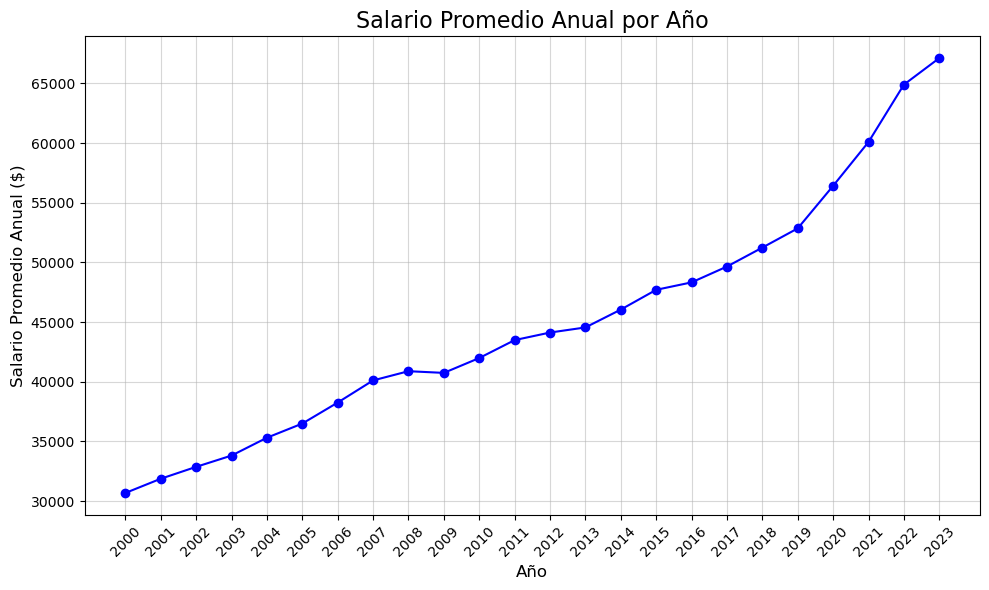

In [65]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Agrupar por año y calcular el salario promedio anual
salaries_by_year = empDF.groupBy("Year").avg("Annual_Average_Salary").orderBy("Year").collect()

# Preparar los datos para el gráfico
years = [row["Year"] for row in salaries_by_year]
avg_salaries = [row["avg(Annual_Average_Salary)"] for row in salaries_by_year]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(years, avg_salaries, marker="o", linestyle="-", color="b")
plt.title("Salario Promedio Anual por Año", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Salario Promedio Anual ($)", fontsize=12)
plt.grid(alpha=0.5)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()


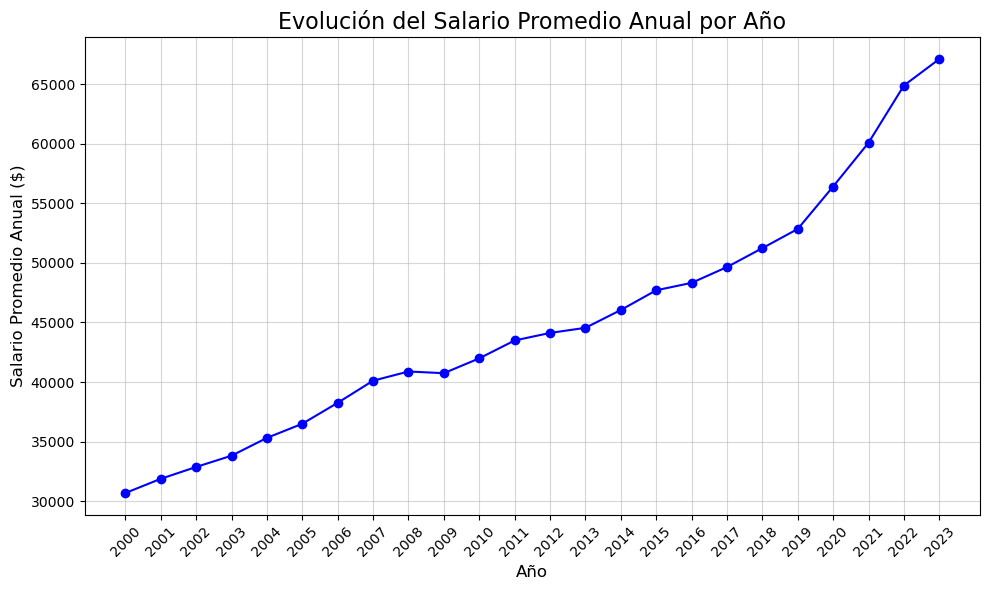

In [66]:
empDF = empDF.withColumn("Year", col("Year").cast("int"))

# Agrupar por año y calcular el salario promedio
salaries_by_year = empDF.groupBy("Year").avg("Annual_Average_Salary").orderBy("Year").collect()

# Preparar los datos para el gráfico
years = [row["Year"] for row in salaries_by_year]
avg_salaries = [row["avg(Annual_Average_Salary)"] for row in salaries_by_year]

# Crear el gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(years, avg_salaries, marker="o", linestyle="-", color="b")
plt.title("Evolución del Salario Promedio Anual por Año", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Salario Promedio Anual ($)", fontsize=12)
plt.grid(alpha=0.5)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_12666/1759710200.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


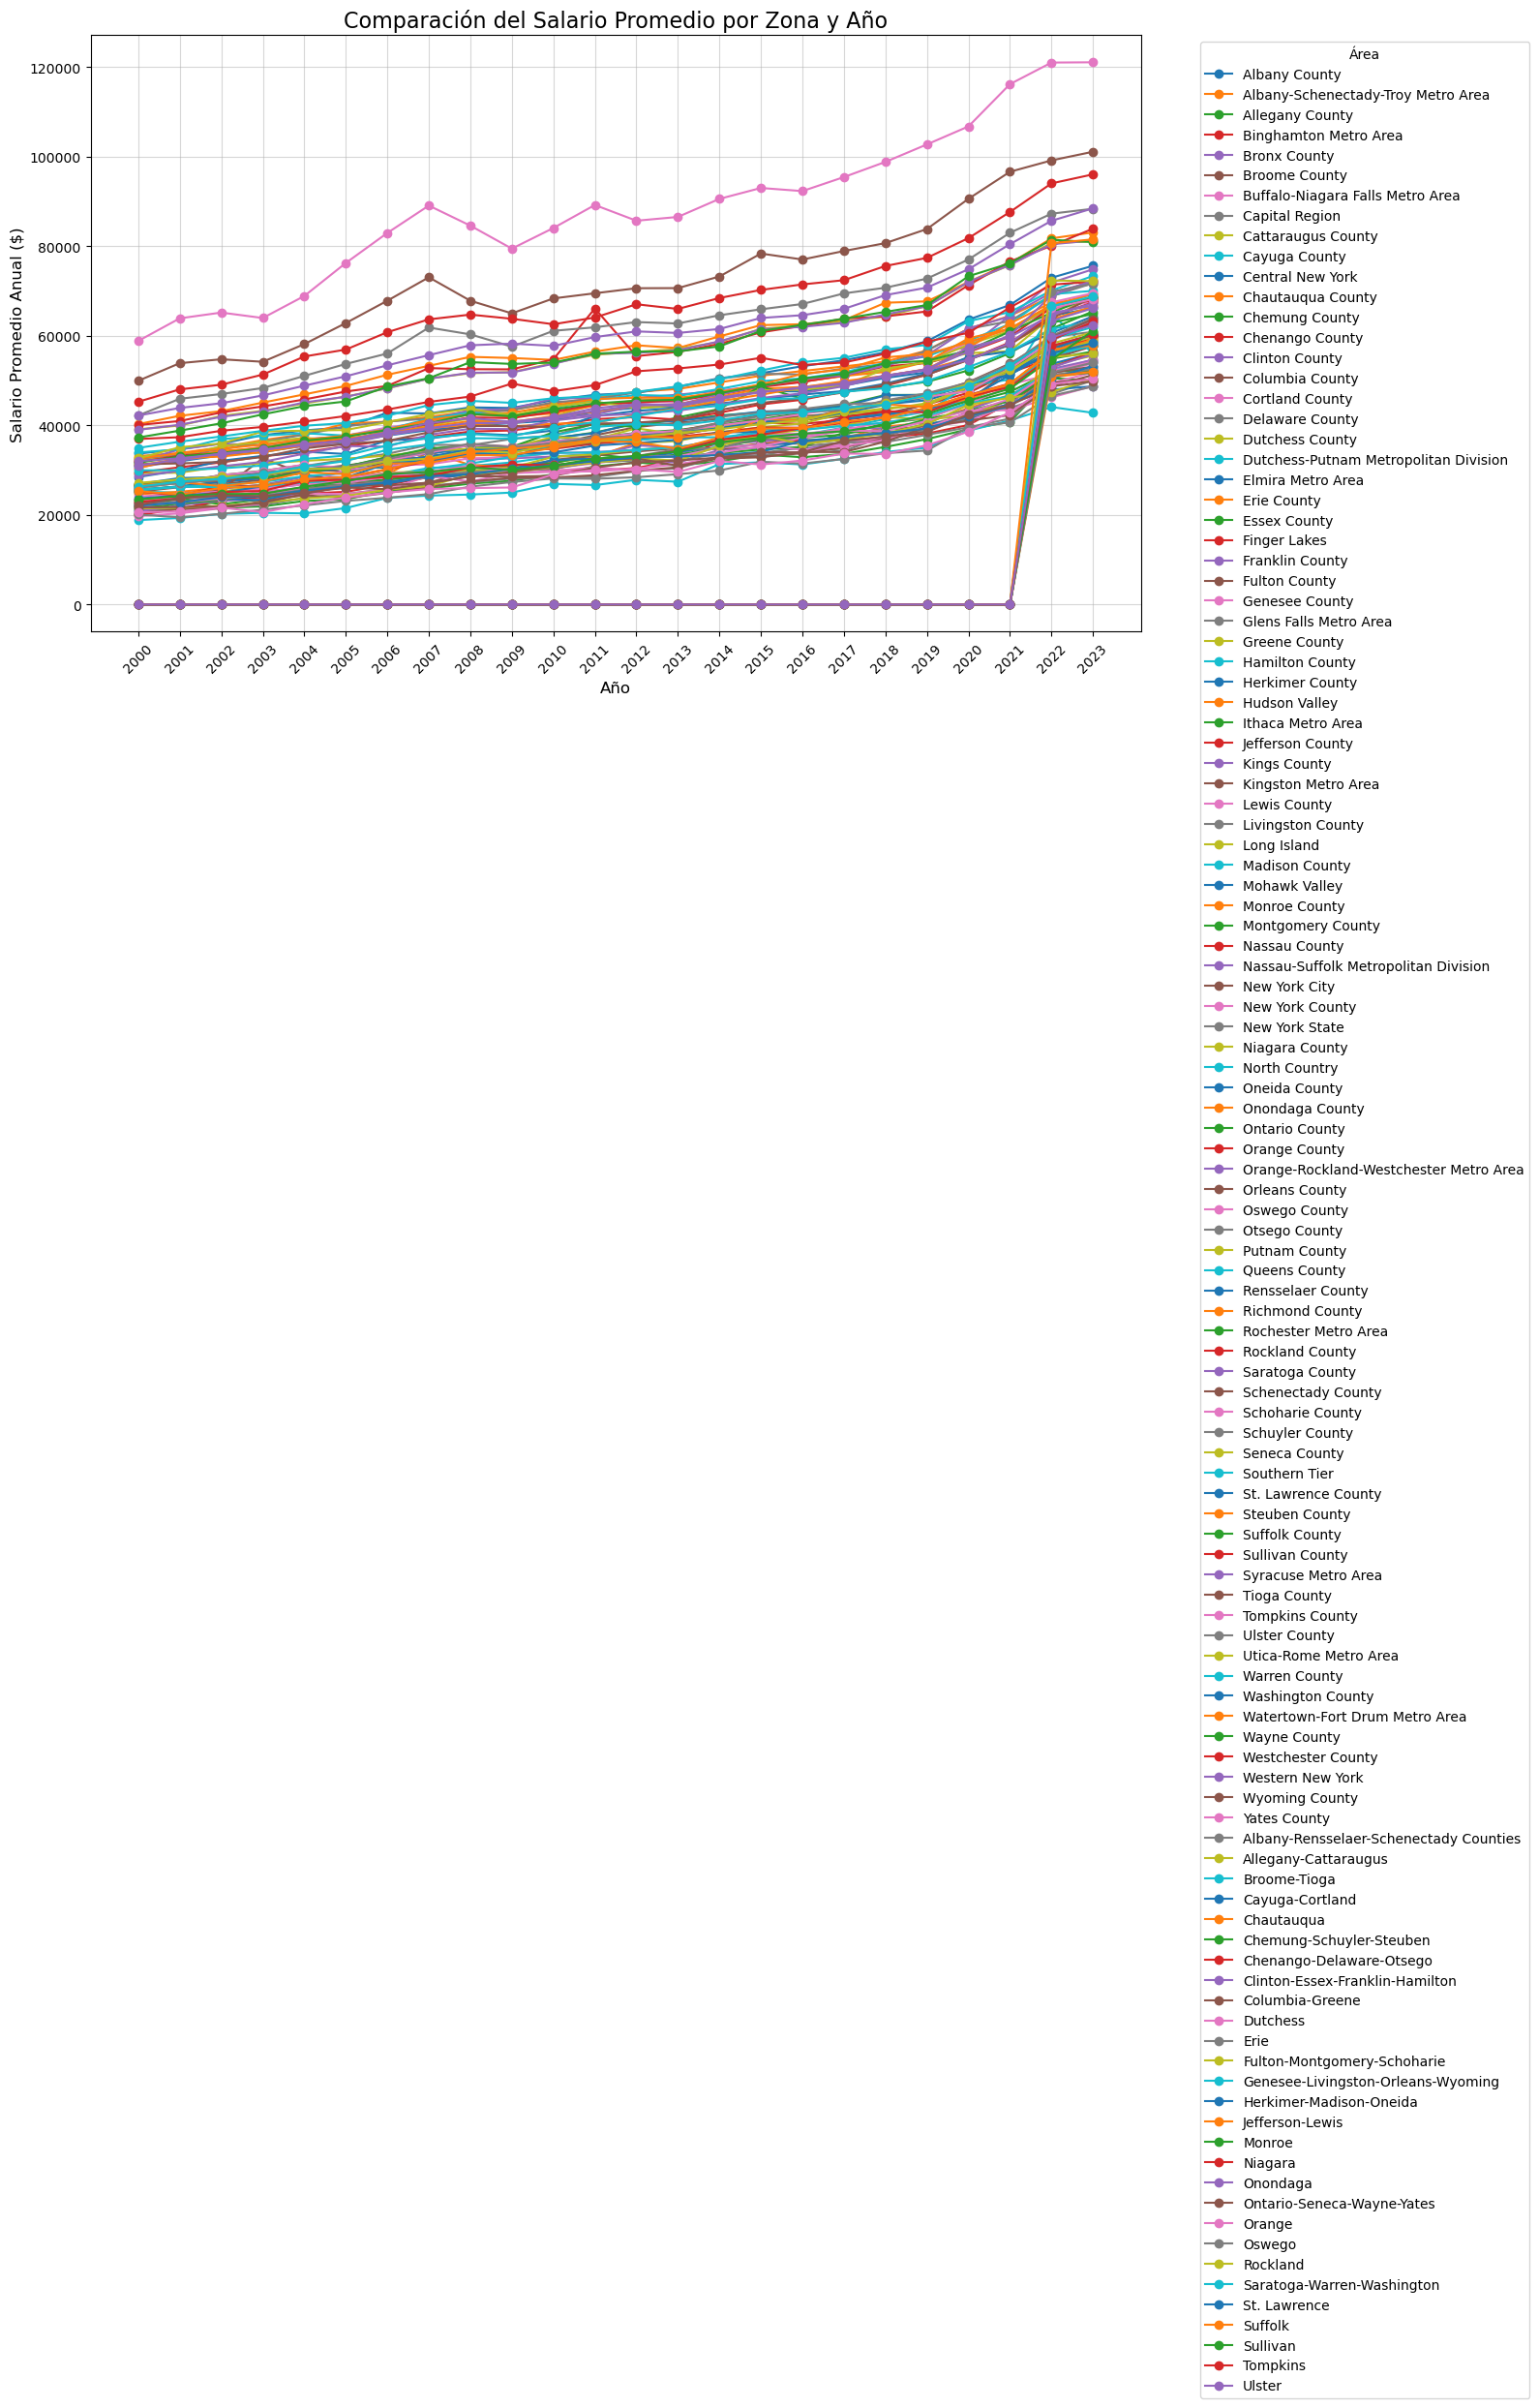

In [67]:
# Agrupar por 'Area' y 'Year', calculando el salario promedio
salaries_by_area_year = empDF.groupBy("Area", "Year").avg("Annual_Average_Salary").orderBy("Year", "Area").collect()

# Transformar los datos para crear el gráfico
from collections import defaultdict

areas = defaultdict(list)
years_set = set()

for row in salaries_by_area_year:
    areas[row["Area"]].append((row["Year"], row["avg(Annual_Average_Salary)"]))
    years_set.add(row["Year"])

# Preparar los datos para el gráfico
years = sorted(list(years_set))
area_salaries = {area: [0] * len(years) for area in areas}

for area, data in areas.items():
    for year, salary in data:
        if year in years:
            idx = years.index(year)
            area_salaries[area][idx] = salary

# Crear el gráfico de comparación
plt.figure(figsize=(14, 8))

for area, salaries in area_salaries.items():
    plt.plot(years, salaries, marker="o", linestyle="-", label=area)

plt.title("Comparación del Salario Promedio por Zona y Año", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Salario Promedio Anual ($)", fontsize=12)
plt.legend(title="Área", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()


In [68]:
from pyspark.sql.functions import corr

# Calcular la correlación entre el número de establecimientos y el salario promedio
correlation = empDF.stat.corr("Establishments", "Annual_Average_Salary")
print(f"Correlación entre el número de establecimientos y el salario promedio: {correlation:.2f}")

Correlación entre el número de establecimientos y el salario promedio: 0.04


In [70]:
# Agrupar por industria y calcular el salario promedio
industries_salary = empDF.groupBy("NAICS_Title").avg("Annual_Average_Salary").orderBy("avg(Annual_Average_Salary)", ascending=False)

# Mostrar las 5 industrias mejor pagadas y las 5 peor pagadas
print("Industrias mejor pagadas:")
industries_salary.show(5)

print("Industrias peor pagadas:")
industries_salary.orderBy("avg(Annual_Average_Salary)").show(5)

Industrias mejor pagadas:
+--------------------+--------------------------+
|         NAICS_Title|avg(Annual_Average_Salary)|
+--------------------+--------------------------+
|Tobacco Manufactu...|         591637.8888888889|
|Securities and Co...|                 189734.02|
|    Metal Ore Mining|                  161081.9|
|Security & Commod...|         160691.0304601426|
|Other Investment ...|         152294.6851851852|
+--------------------+--------------------------+
only showing top 5 rows

Industrias peor pagadas:
+--------------------+--------------------------+
|         NAICS_Title|avg(Annual_Average_Salary)|
+--------------------+--------------------------+
|Limited-Service E...|        11719.135699373695|
|Full-Service Rest...|        13426.705578512398|
|Drinking Places (...|        13988.115492957746|
|Civic and Social ...|         14929.99028629857|
|     Clothing Stores|        16444.448093841642|
+--------------------+--------------------------+
only showing top 5 rows


In [71]:
# Agrupar por área y calcular el empleo promedio
employment_by_area = empDF.groupBy("Area").avg("Average_Employment").orderBy("avg(Average_Employment)", ascending=False)

# Mostrar las 5 áreas con más empleados y las 5 con menos empleados
print("Áreas con mayor empleo promedio:")
employment_by_area.show(5)

print("Áreas con menor empleo promedio:")
employment_by_area.orderBy("avg(Average_Employment)").show(5)

Áreas con mayor empleo promedio:


+--------------------+-----------------------+
|                Area|avg(Average_Employment)|
+--------------------+-----------------------+
|      New York State|      50319.99544779812|
|       New York City|     27808.275321710255|
|     New York County|     19366.787848729076|
|Nassau-Suffolk Me...|       9193.46169198359|
|         Long Island|      8895.702516908748|
+--------------------+-----------------------+
only showing top 5 rows

Áreas con menor empleo promedio:
+----------------+-----------------------+
|            Area|avg(Average_Employment)|
+----------------+-----------------------+
| Hamilton County|       79.7952314165498|
| Schuyler County|     135.58826313298627|
|    Yates County|     147.98344487495598|
|    Lewis County|      154.6885865457294|
|Schoharie County|     168.28477785870356|
+----------------+-----------------------+
only showing top 5 rows



In [72]:
# Agrupar por área y sumar los salarios
total_wages_by_area = empDF.groupBy("Area").sum("Total_Wage").orderBy("sum(Total_Wage)", ascending=False)

# Mostrar las 5 áreas con mayor y menor contribución al total de salarios
print("Áreas con mayor contribución al total de salarios:")
total_wages_by_area.show(5)

print("Áreas con menor contribución al total de salarios:")
total_wages_by_area.orderBy("sum(Total_Wage)").show(5)

Áreas con mayor contribución al total de salarios:
+--------------------+---------------+
|                Area|sum(Total_Wage)|
+--------------------+---------------+
|       New York City| 47523668629759|
|      New York State| 34645964837633|
|     New York County| 17746574317830|
|Nassau-Suffolk Me...|  4511136069898|
|         Long Island|  4452117940430|
+--------------------+---------------+
only showing top 5 rows

Áreas con menor contribución al total de salarios:
+---------------+---------------+
|           Area|sum(Total_Wage)|
+---------------+---------------+
|Hamilton County|     3195220308|
|   St. Lawrence|     8563523255|
|         Oswego|     8800869163|
|Columbia-Greene|     8955746360|
|       Tompkins|     9157601490|
+---------------+---------------+
only showing top 5 rows



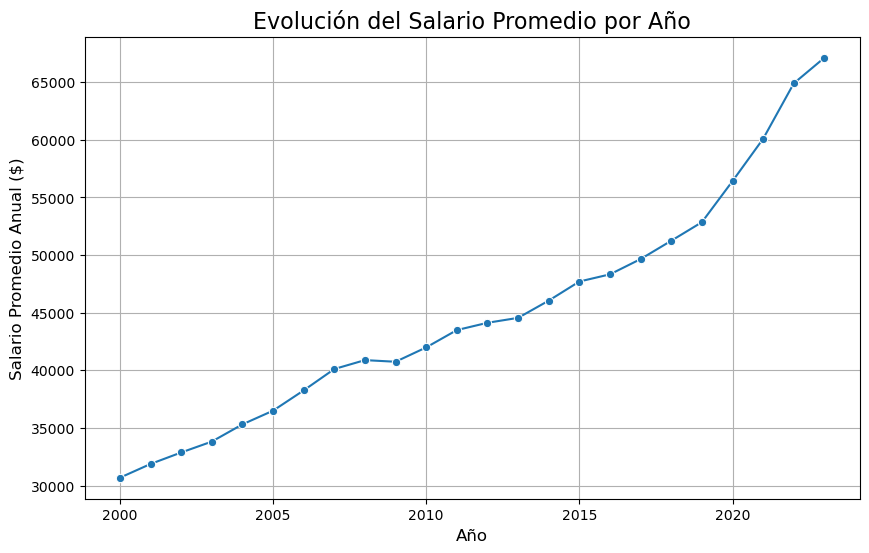

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convertir Spark DataFrame a Pandas
df_pandas = empDF.groupBy("Year").avg("Annual_Average_Salary").orderBy("Year").toPandas()

# Renombrar columnas para mayor claridad
df_pandas.columns = ["Year", "Average_Annual_Salary"]

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_pandas, x="Year", y="Average_Annual_Salary", marker="o")
plt.title("Evolución del Salario Promedio por Año", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Salario Promedio Anual ($)", fontsize=12)
plt.grid(True)
plt.show()

/tmp/ipykernel_12666/3751235567.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=areas_salary, x="Average Annual Salary", y="Area", palette="viridis")


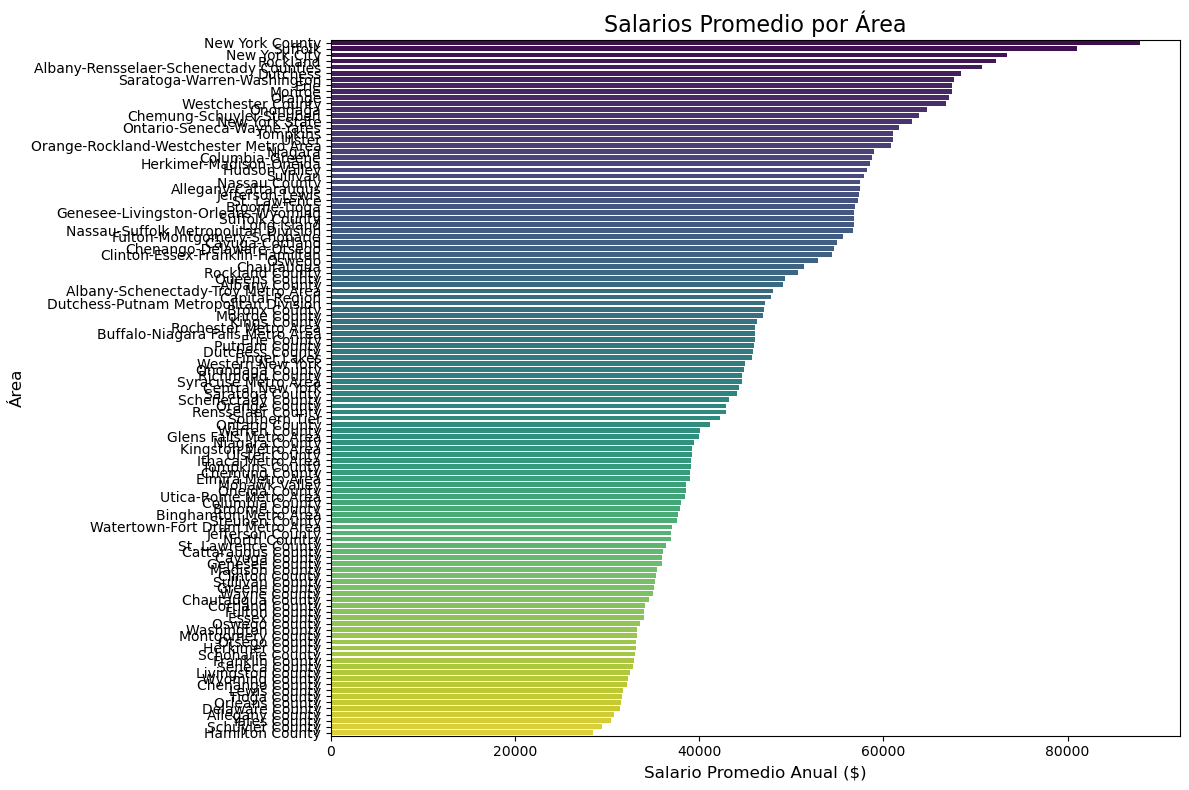

In [75]:
# Agrupar por área y calcular el salario promedio
areas_salary = empDF.groupBy("Area").avg("Annual_Average_Salary").orderBy("avg(Annual_Average_Salary)", ascending=False).toPandas()

# Renombrar columnas
areas_salary.columns = ["Area", "Average Annual Salary"]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=areas_salary, x="Average Annual Salary", y="Area", palette="viridis")
plt.title("Salarios Promedio por Área", fontsize=16)
plt.xlabel("Salario Promedio Anual ($)", fontsize=12)
plt.ylabel("Área", fontsize=12)
plt.tight_layout()
plt.show()


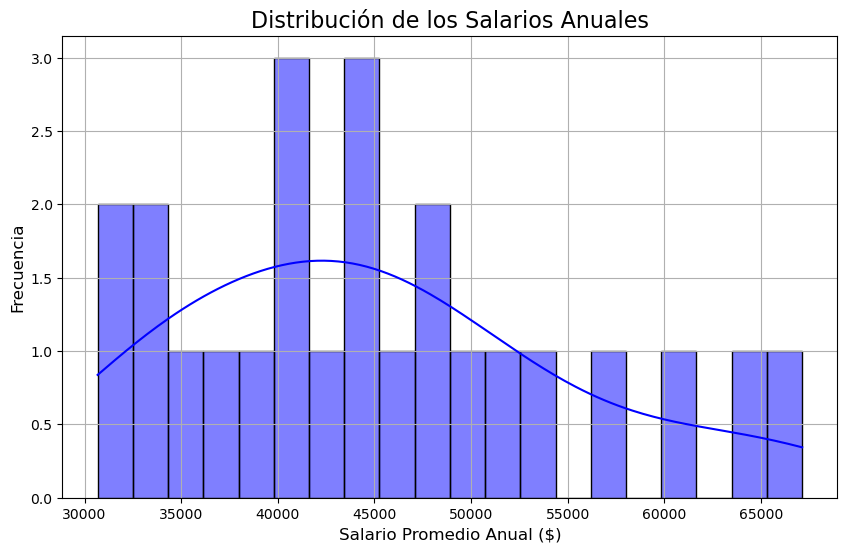

In [77]:
# Crear un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_pandas["Average_Annual_Salary"], kde=True, bins=20, color="blue")
plt.title("Distribución de los Salarios Anuales", fontsize=16)
plt.xlabel("Salario Promedio Anual ($)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(True)
plt.show()

/tmp/ipykernel_12666/3004621334.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ownership_salary, x="Average_Annual_Salary", y="Ownership", palette="coolwarm")


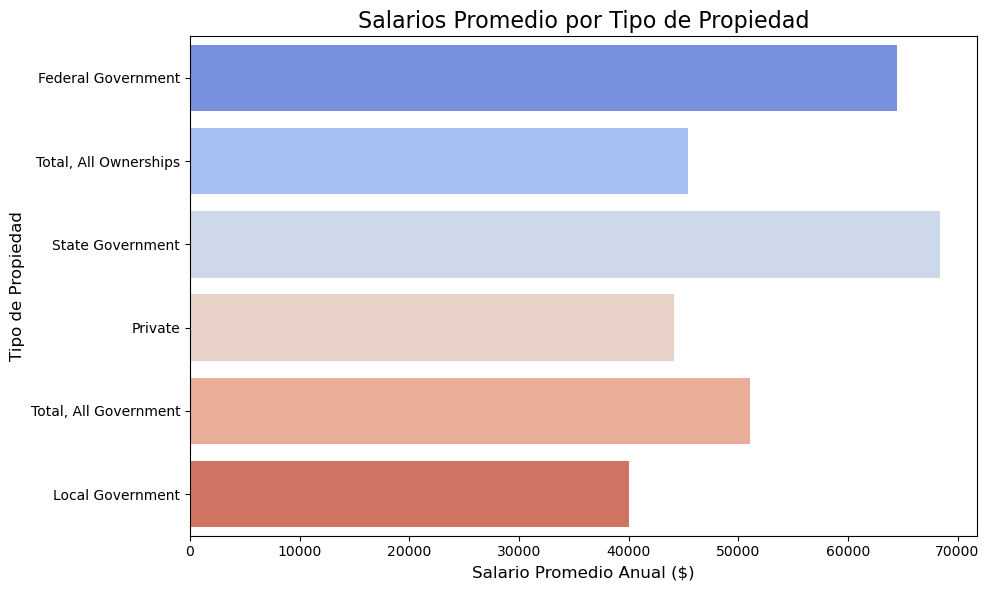

In [81]:
# Agrupar por tipo de propiedad y calcular el salario promedio
ownership_salary = empDF.groupBy("Ownership").avg("Annual_Average_Salary").toPandas()

# Renombrar columnas
ownership_salary.columns = ["Ownership", "Average_Annual_Salary"]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=ownership_salary, x="Average_Annual_Salary", y="Ownership", palette="coolwarm")
plt.title("Salarios Promedio por Tipo de Propiedad", fontsize=16)
plt.xlabel("Salario Promedio Anual ($)", fontsize=12)
plt.ylabel("Tipo de Propiedad", fontsize=12)
plt.tight_layout()
plt.show()


/tmp/ipykernel_12666/1294816434.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_employment, x="Average Employment", y="Industry", palette="rocket")


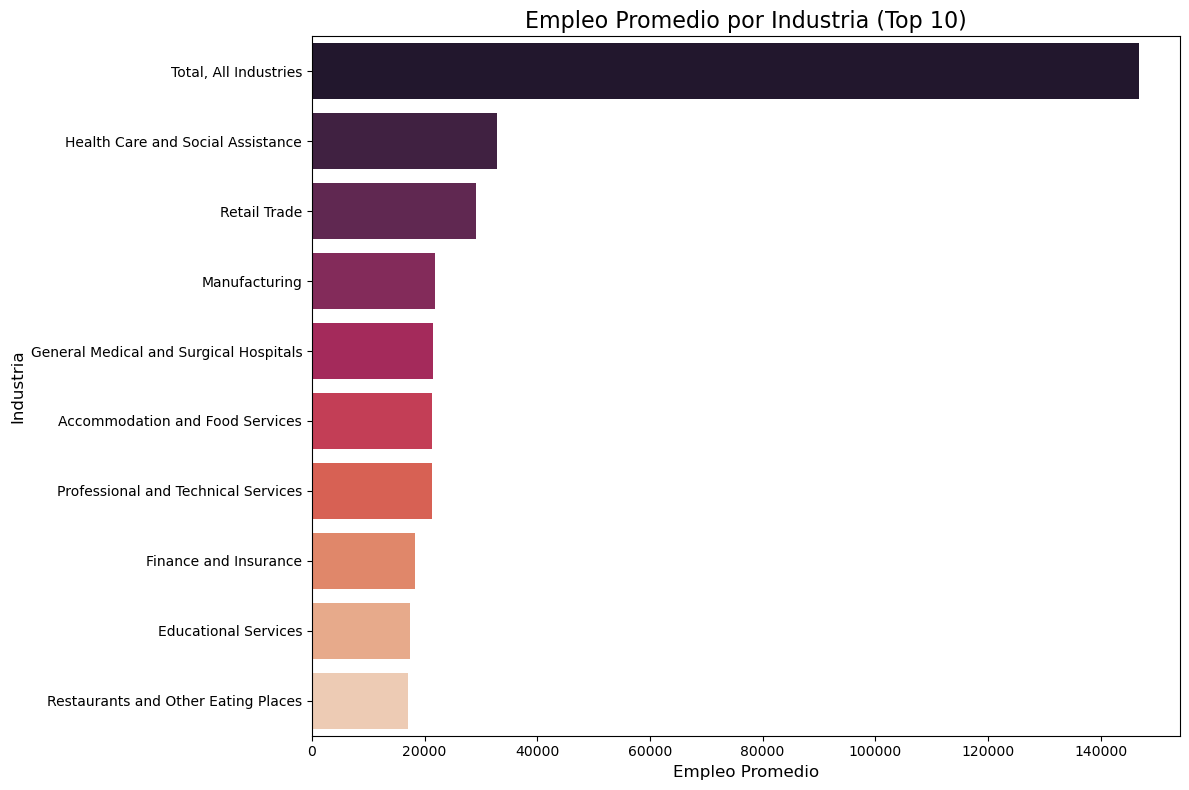

In [86]:
# Agrupar por industria y calcular el empleo promedio
industry_employment = empDF.groupBy("NAICS_Title").avg("Average_Employment").orderBy("avg(Average_Employment)", ascending=False).limit(10).toPandas()

# Renombrar columnas
industry_employment.columns = ["Industry", "Average Employment"]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=industry_employment, x="Average Employment", y="Industry", palette="rocket")
plt.title("Empleo Promedio por Industria (Top 10)", fontsize=16)
plt.xlabel("Empleo Promedio", fontsize=12)
plt.ylabel("Industria", fontsize=12)
plt.tight_layout()
plt.show()

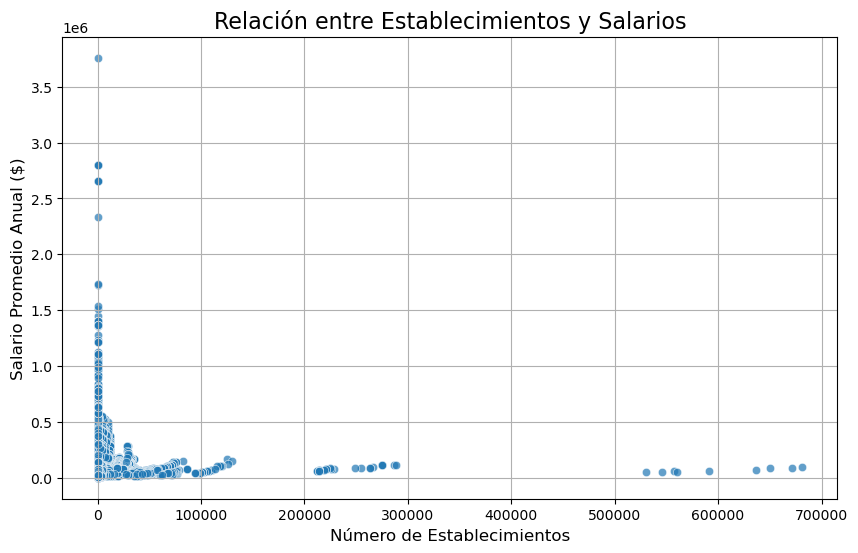

In [87]:
# Convertir Spark DataFrame a Pandas
df_scatter = empDF.select("Establishments", "Annual_Average_Salary").toPandas()

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scatter, x="Establishments", y="Annual_Average_Salary", alpha=0.7)
plt.title("Relación entre Establecimientos y Salarios", fontsize=16)
plt.xlabel("Número de Establecimientos", fontsize=12)
plt.ylabel("Salario Promedio Anual ($)", fontsize=12)
plt.grid(True)
plt.show()


In [90]:
from pyspark.sql.functions import col
# Ruta al archivo
file_path = "Datasets/Index_Crimes_by_County_and_Agency__Beginning_1990_20241030.csv"

# Leer el archivo CSV
censo_delitos = spark.read.csv(file_path, header=True, inferSchema=True)

# Mostrar las primeras filas
censo_delitos.show(5)

censo_delitos.printSchema()

+------+--------------------+----+---------------+-----------+-------------+------+----+-------+------------------+--------------+--------+-------+-------------------+-----------------+
|County|              Agency|Year|Months Reported|Index Total|Violent Total|Murder|Rape|Robbery|Aggravated Assault|Property Total|Burglary|Larceny|Motor Vehicle Theft|           Region|
+------+--------------------+----+---------------+-----------+-------------+------+----+-------+------------------+--------------+--------+-------+-------------------+-----------------+
|Albany|      Albany City PD|2022|             12|       4746|          944|    14|  70|    233|               627|          3802|     566|   2670|                566|Non-New York City|
|Albany|Albany County Par...|2022|             12|          1|            0|     0|   0|      0|                 0|             1|       0|      1|                  0|Non-New York City|
|Albany|Albany County She...|2022|             12|        127|        

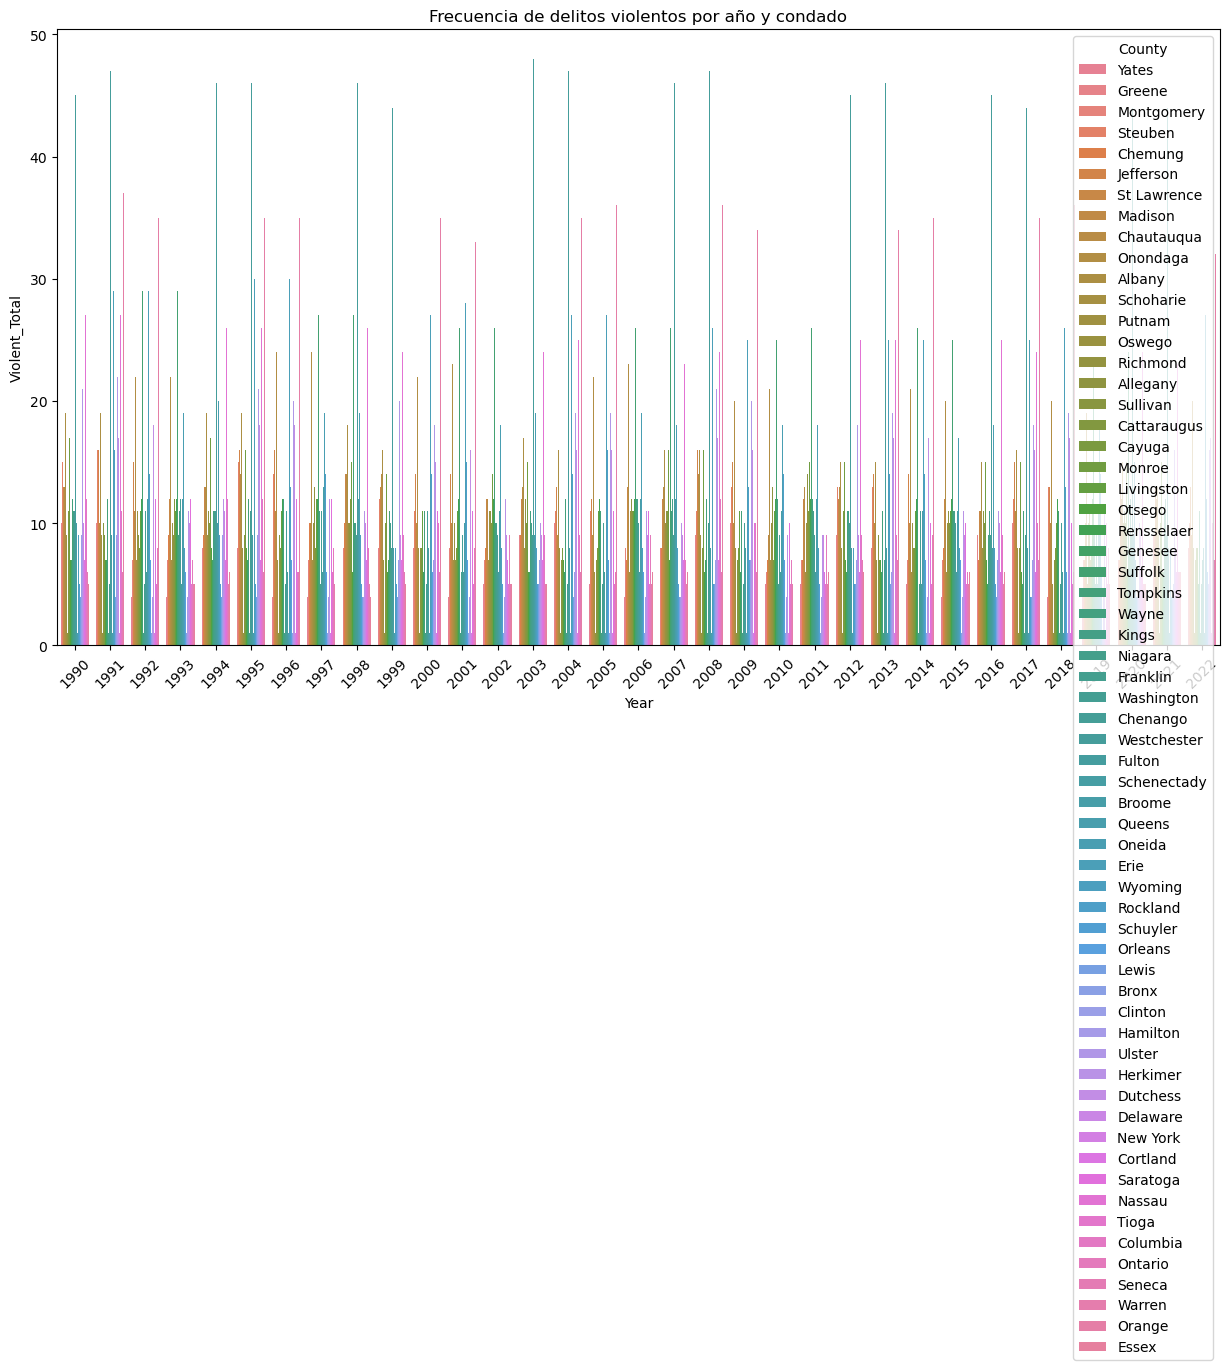

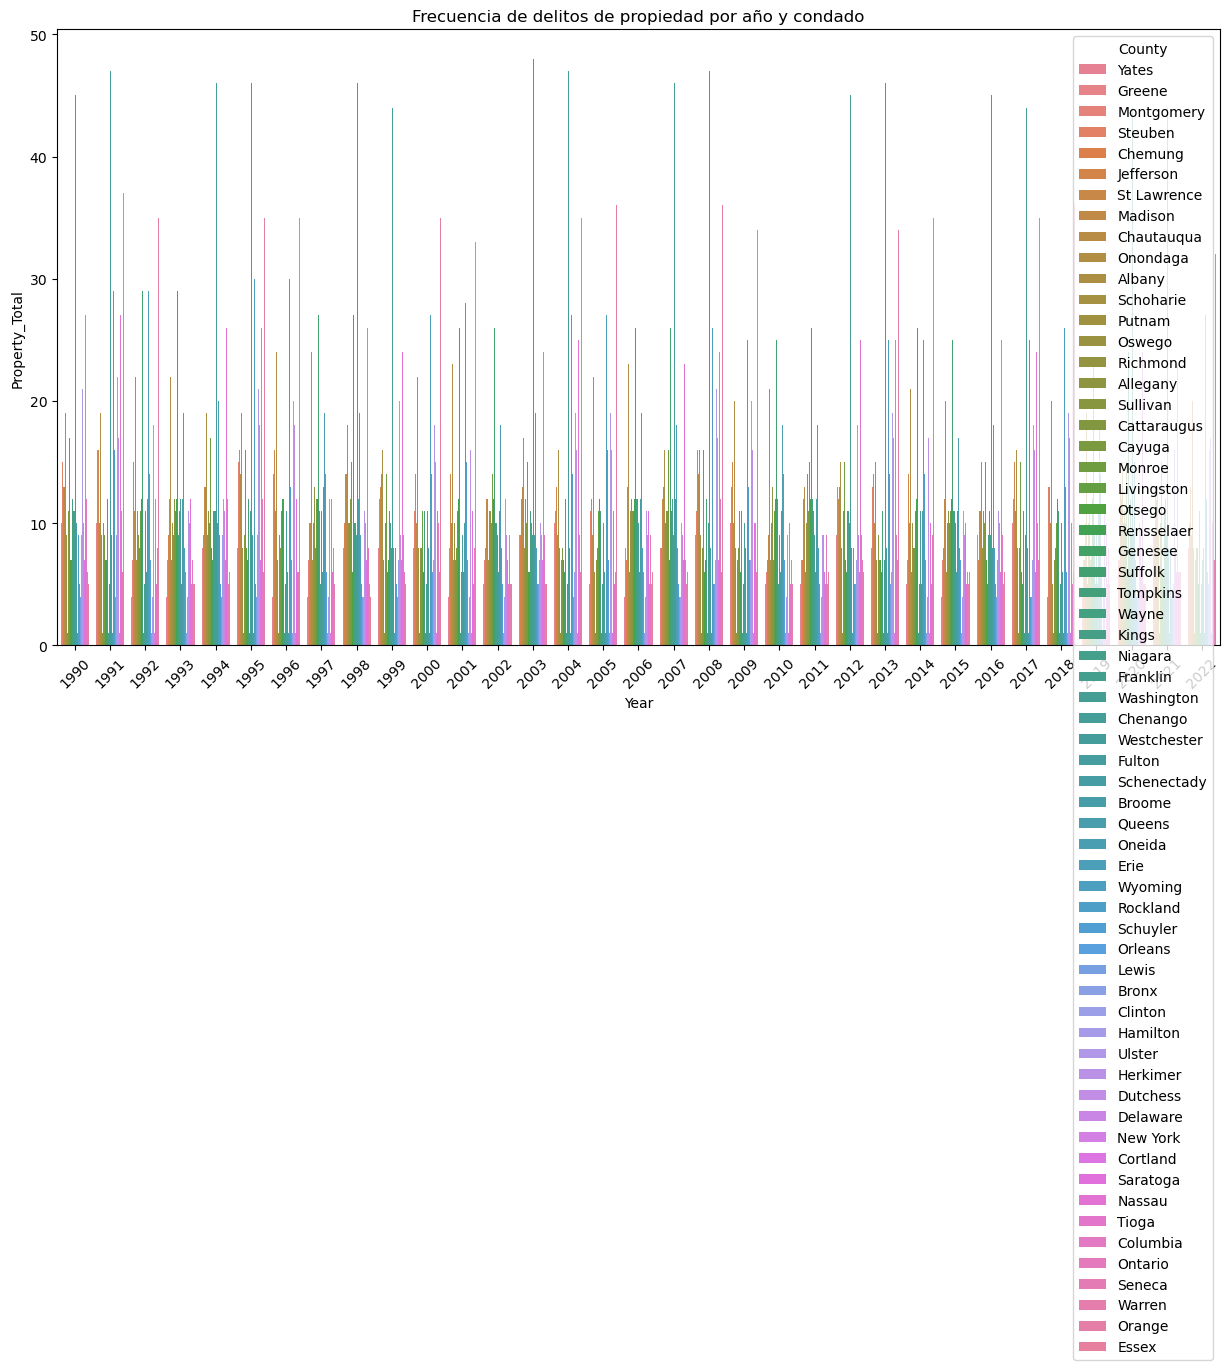

In [101]:
from pyspark.sql.functions import count

 # Agrupar por año, condado y tipo de delito (usaremos las columnas 'Violent Total', 'Property Total', etc.)
delitos_por_anio_zona = censo_delitos.groupBy("Year", "County").agg(
    count("Violent Total").alias("Violent_Total"),
    count("Property Total").alias("Property_Total")
)

# Convertir a Pandas para graficar
delitos_pd = delitos_por_anio_zona.toPandas()

# Graficar con seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.barplot(
    data=delitos_pd, x="Year", y="Violent_Total", hue="County", dodge=True
)
plt.title("Frecuencia de delitos violentos por año y condado")
plt.xticks(rotation=45)
plt.show()

# Si deseas también graficar delitos de propiedad:
plt.figure(figsize=(15, 8))
sns.barplot(
    data=delitos_pd, x="Year", y="Property_Total", hue="County", dodge=True
)
plt.title("Frecuencia de delitos de propiedad por año y condado")
plt.xticks(rotation=45)
plt.show()


In [102]:
# Cargar el archivo CSV de CensoEmpleo
censo_empleo = spark.read.csv('Datasets/Quarterly_Census_of_Employment_and_Wages_Annual_Data__Beginning_2000_20241030.csv', header=True, inferSchema=True)

# Mostrar algunas filas para asegurarte de que se cargó correctamente
censo_empleo.show(5)



+--------------------+--------------------+--------------------+-----+--------------------+----+--------------+------------------+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|           Area Type|                Area|           Ownership|NAICS|         NAICS Title|Year|Establishments|Average Employment|Total Wage|Annual Average Salary                                                                                                                                                  |
+--------------------+--------------------+--------------------+-----+--------------------+----+--------------+------------------+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Workforce Investm...|Albany-Rensselaer...|    Local Government|    0|

In [103]:
import matplotlib.pyplot as plt

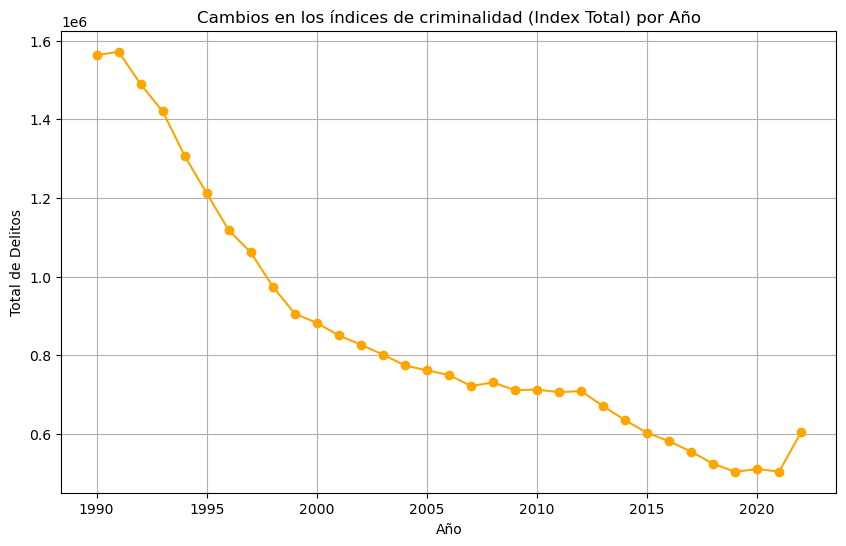

In [104]:
# Agrupar por año y calcular la suma del índice total de delitos
delitos_por_anio = censo_delitos.groupBy("Year").sum("Index Total").orderBy("Year").toPandas()

# Graficar los datos
plt.figure(figsize=(10, 6))
plt.plot(delitos_por_anio["Year"], delitos_por_anio["sum(Index Total)"], marker='o', color='orange')
plt.title("Cambios en los índices de criminalidad (Index Total) por Año")
plt.xlabel("Año")
plt.ylabel("Total de Delitos")
plt.grid()
plt.show()

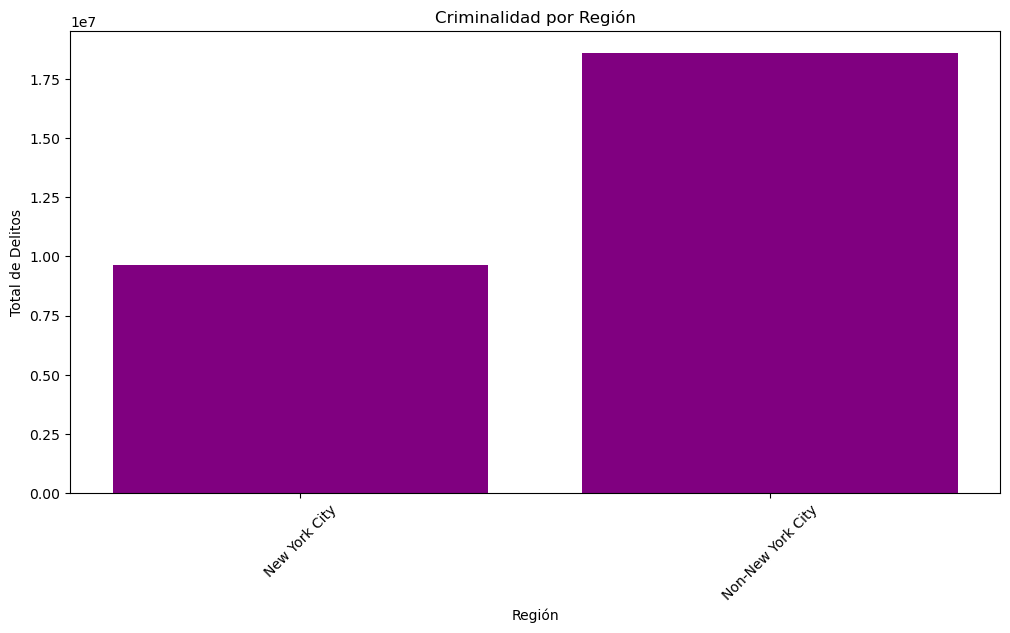

In [106]:
# Agrupar por región y calcular el índice total
delitos_por_region = censo_delitos.groupBy("Region").sum("Index Total").orderBy("Region").toPandas()

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(delitos_por_region["Region"], delitos_por_region["sum(Index Total)"], color='purple')
plt.title("Criminalidad por Región")
plt.xlabel("Región")
plt.ylabel("Total de Delitos")
plt.xticks(rotation=45)
plt.show()

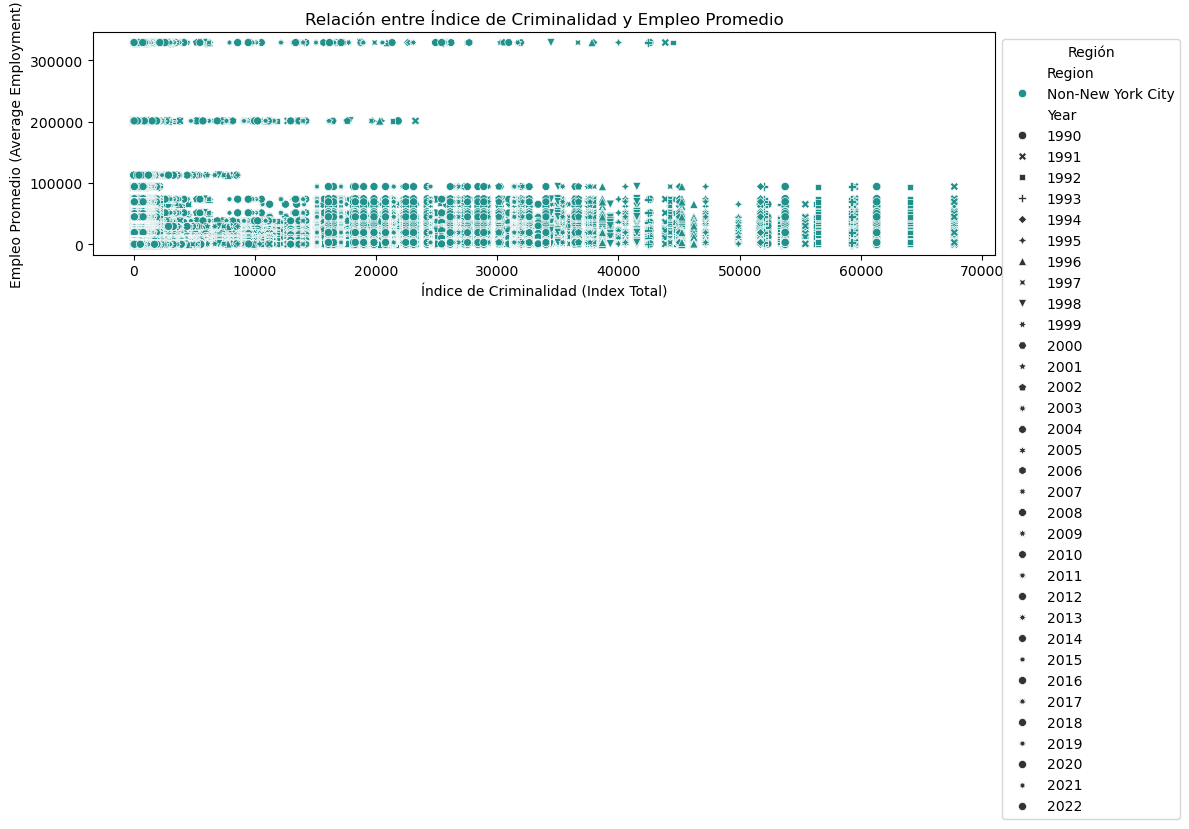

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relación entre índice de criminalidad y empleo promedio
relacion_empleo_crimen = censo_delitos.join(
    censo_empleo, censo_delitos["County"] == censo_empleo["Area"], "inner"
).select(
    censo_delitos["Region"],  # Especificar la fuente de la columna 'Region'
    censo_delitos["Year"],  # Especificar la fuente de la columna 'Year'
    censo_delitos["Index Total"],  # Especificar la fuente de la columna 'Index Total'
    censo_empleo["Average Employment"]  # Especificar la fuente de la columna 'Average Employment'
).toPandas()

# Gráfica
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=relacion_empleo_crimen,
    x="Index Total",
    y="Average Employment",
    hue="Region",
    style="Year",
    palette="viridis"
)
plt.title("Relación entre Índice de Criminalidad y Empleo Promedio")
plt.xlabel("Índice de Criminalidad (Index Total)")
plt.ylabel("Empleo Promedio (Average Employment)")
plt.legend(title="Región", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [119]:

censo_delitos = censo_delitos.toDF(*[c.strip().replace(" ", "_") for c in censo_delitos.columns])
censo_empleo = censo_empleo.toDF(*[c.strip().replace(" ", "_") for c in censo_empleo.columns])

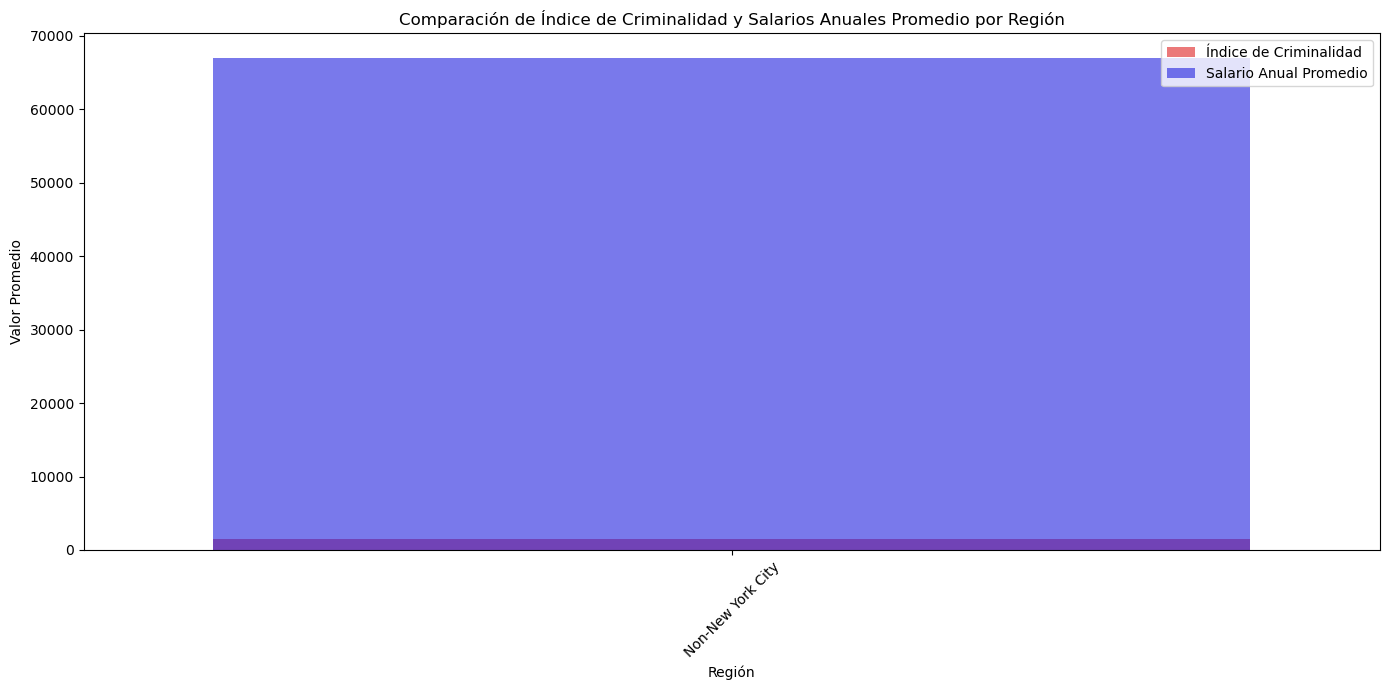

In [121]:
# Relación entre salarios y criminalidad
relacion_salarios_crimen = censo_delitos.join(
    censo_empleo, censo_delitos["County"] == censo_empleo["Area"], "inner"
).select("Region", "Index_Total", "Annual_Average_Salary").toPandas()

# Agrupamos por región y calculamos promedios
promedios_region = relacion_salarios_crimen.groupby("Region").mean().reset_index()

# Gráfica
plt.figure(figsize=(14, 7))
sns.barplot(data=promedios_region, x="Region", y="Index_Total", color="red", alpha=0.6, label="Índice de Criminalidad")
sns.barplot(data=promedios_region, x="Region", y="Annual_Average_Salary", color="blue", alpha=0.6, label="Salario Anual Promedio")
plt.title("Comparación de Índice de Criminalidad y Salarios Anuales Promedio por Región")
plt.ylabel("Valor Promedio")
plt.xlabel("Región")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


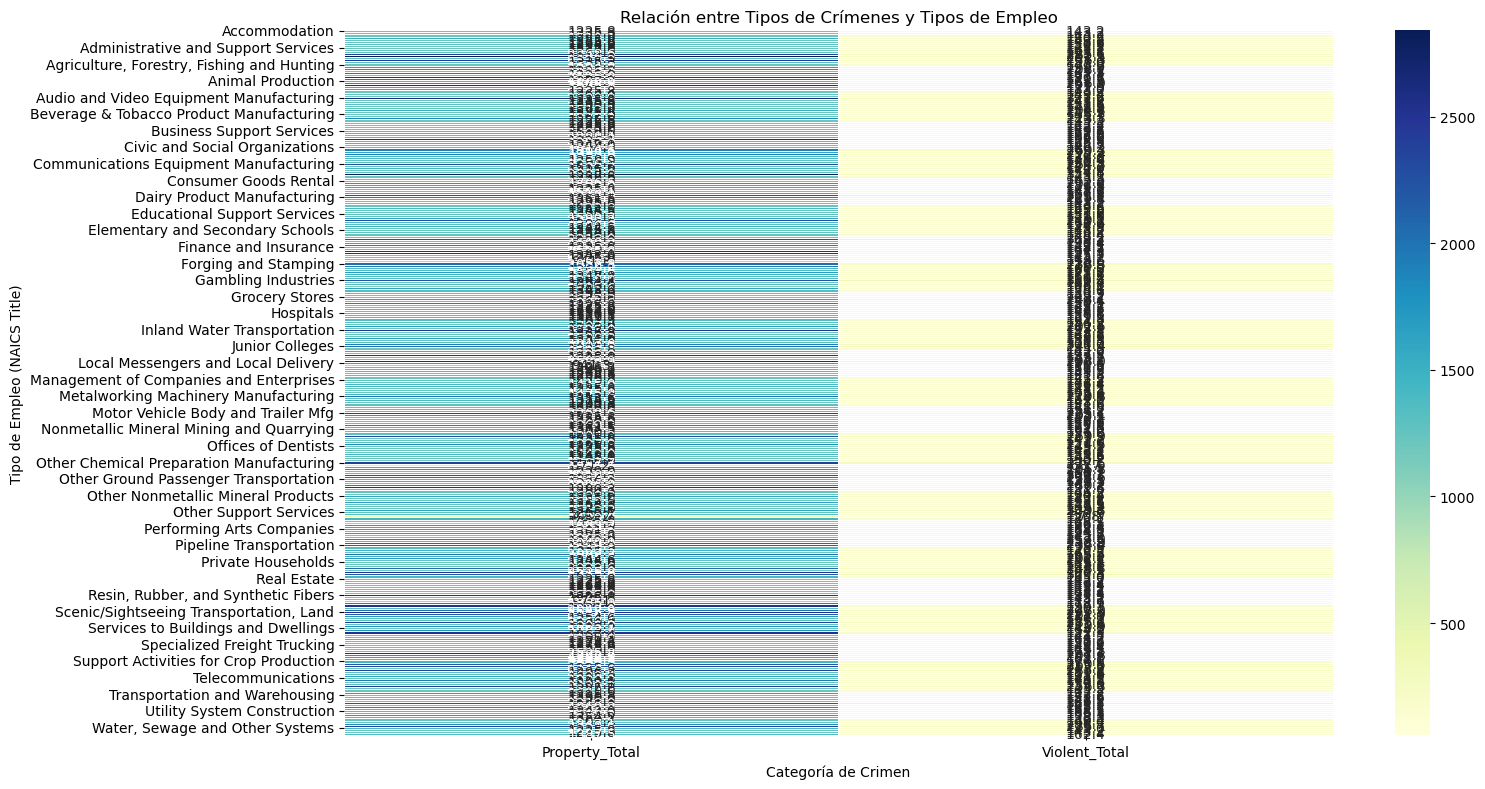

In [122]:
# Relación entre tipos de crímenes y tipos de empleo
tipos_crimen_empleo = censo_delitos.join(
    censo_empleo, censo_delitos["County"] == censo_empleo["Area"], "inner"
).select("NAICS_Title", "Property_Total", "Violent_Total").toPandas()

# Agrupamos y calculamos promedios
heatmap_data = tipos_crimen_empleo.groupby("NAICS_Title").mean().reset_index()

# Gráfica
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data.set_index("NAICS_Title"), annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Relación entre Tipos de Crímenes y Tipos de Empleo")
plt.ylabel("Tipo de Empleo (NAICS Title)")
plt.xlabel("Categoría de Crimen")
plt.tight_layout()
plt.show()


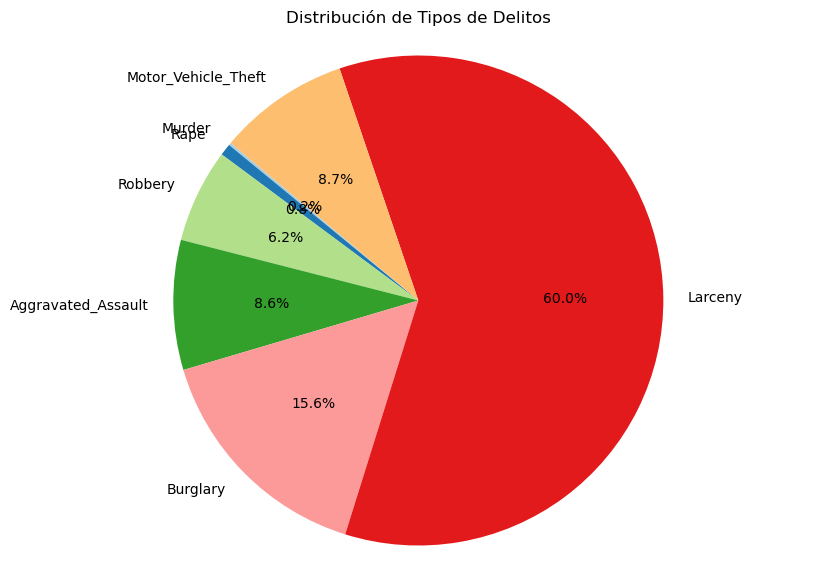

In [123]:
import matplotlib.pyplot as plt

# Sumar los totales de cada tipo de delito
tipos_delitos = censo_delitos.select(
    "Murder", "Rape", "Robbery", "Aggravated_Assault", "Burglary", "Larceny", "Motor_Vehicle_Theft"
).groupBy().sum().toPandas()

# Extraer los valores para cada delito
delitos_totales = tipos_delitos.iloc[0]
labels = ["Murder", "Rape", "Robbery", "Aggravated_Assault", "Burglary", "Larceny", "Motor_Vehicle_Theft"]

# Crear la gráfica de pastel
plt.figure(figsize=(10, 7))
plt.pie(
    delitos_totales,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Distribución de Tipos de Delitos")
plt.axis('equal')  # Asegura que el pastel se vea como un círculo
plt.show()


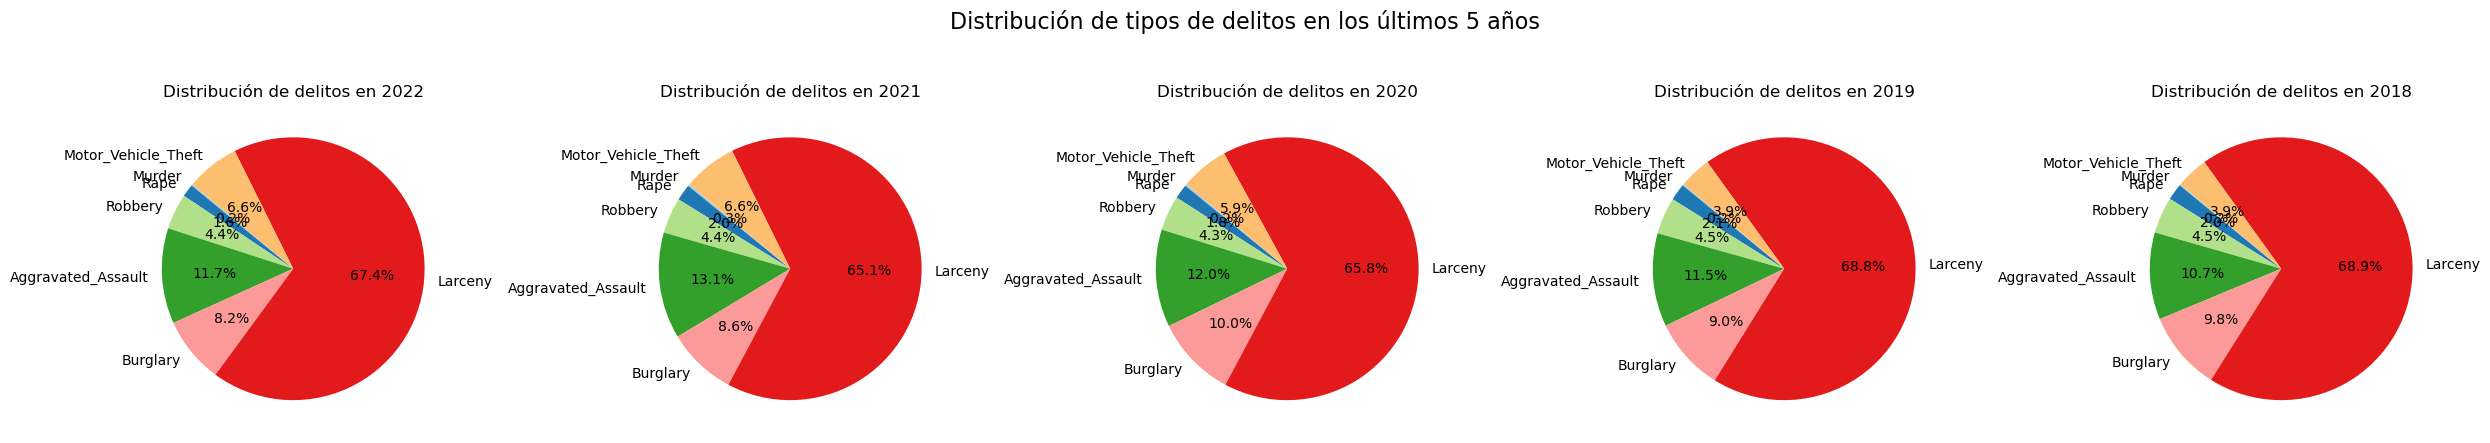

In [124]:
import matplotlib.pyplot as plt

# Filtrar los últimos 5 años disponibles en el dataset
ultimos_5_anios = censo_delitos.select("Year").distinct().orderBy("Year", ascending=False).limit(5).rdd.flatMap(lambda x: x).collect()

# Crear un subplot para cada año
fig, axs = plt.subplots(1, 5, figsize=(25, 5), subplot_kw={'aspect': 'equal'})

for i, anio in enumerate(ultimos_5_anios):
    # Filtrar los datos del año actual
    datos_anio = censo_delitos.filter(censo_delitos["Year"] == anio).select(
        "Murder", "Rape", "Robbery", "Aggravated_Assault", "Burglary", "Larceny", "Motor_Vehicle_Theft"
    ).groupBy().sum().toPandas()

    # Extraer los totales de delitos
    delitos_totales = datos_anio.iloc[0]
    labels = ["Murder", "Rape", "Robbery", "Aggravated_Assault", "Burglary", "Larceny", "Motor_Vehicle_Theft"]

    # Crear la gráfica de pastel para el año actual
    axs[i].pie(
        delitos_totales,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors
    )
    axs[i].set_title(f"Distribución de delitos en {anio}")

# Mostrar todas las gráficas
plt.suptitle("Distribución de tipos de delitos en los últimos 5 años", fontsize=16)
plt.tight_layout()
plt.show()


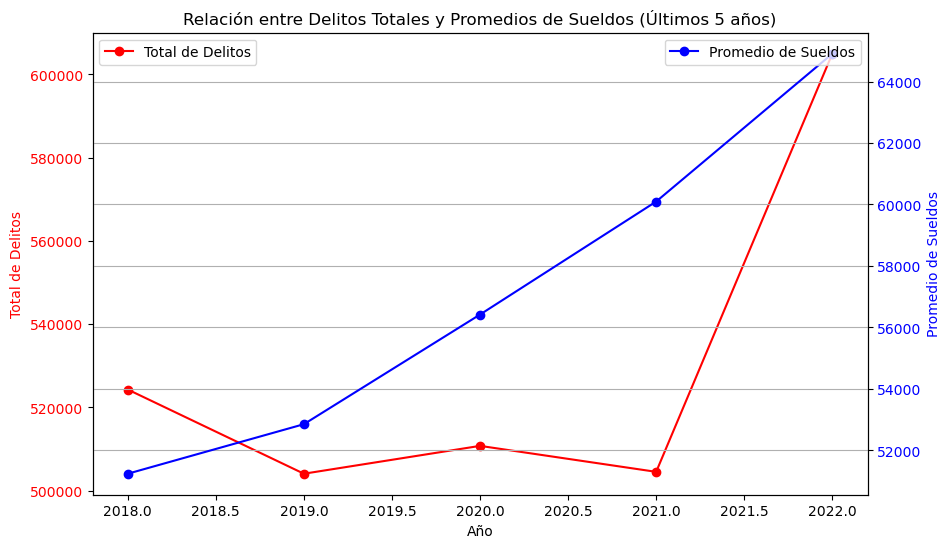

In [127]:
import matplotlib.pyplot as plt

# Obtener los últimos 5 años
ultimos_5_anios = censo_delitos.select("Year").distinct().orderBy("Year", ascending=False).limit(5).rdd.flatMap(lambda x: x).collect()

# Calcular el total de delitos y el promedio de salarios por año
datos_anuales = []
for anio in ultimos_5_anios:
    # Total de delitos
    total_delitos = censo_delitos.filter(censo_delitos["Year"] == anio).select(
        "Index_Total"
    ).groupBy().sum().collect()[0][0]

    # Promedio de salarios
    promedio_sueldo = censo_empleo.filter(censo_empleo["Year"] == anio).select(
        "Annual_Average_Salary"
    ).groupBy().avg().collect()[0][0]

    datos_anuales.append({"Year": anio, "Total Delitos": total_delitos, "Promedio Sueldo": promedio_sueldo})

# Crear un DataFrame con los datos anuales
import pandas as pd
df_anual = pd.DataFrame(datos_anuales)

# Graficar las líneas
fig, ax1 = plt.subplots(figsize=(10, 6))

# Línea de delitos
ax1.plot(df_anual["Year"], df_anual["Total Delitos"], color="red", marker="o", label="Total de Delitos")
ax1.set_ylabel("Total de Delitos", color="red")
ax1.tick_params(axis='y', labelcolor="red")

# Línea de sueldos
ax2 = ax1.twinx()
ax2.plot(df_anual["Year"], df_anual["Promedio Sueldo"], color="blue", marker="o", label="Promedio de Sueldos")
ax2.set_ylabel("Promedio de Sueldos", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# Títulos y leyendas
plt.title("Relación entre Delitos Totales y Promedios de Sueldos (Últimos 5 años)")
ax1.set_xlabel("Año")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.grid()

plt.show()


In [130]:
from scipy.stats import pearsonr

# Calcular correlación
correlacion, p_valor = pearsonr(df_anual["Total Delitos"], df_anual["Promedio Sueldo"])
print(f"Coeficiente de correlación: {correlacion:.2f}")
print(f"P-valor: {p_valor:.4f}")


Coeficiente de correlación: 0.70
P-valor: 0.1873


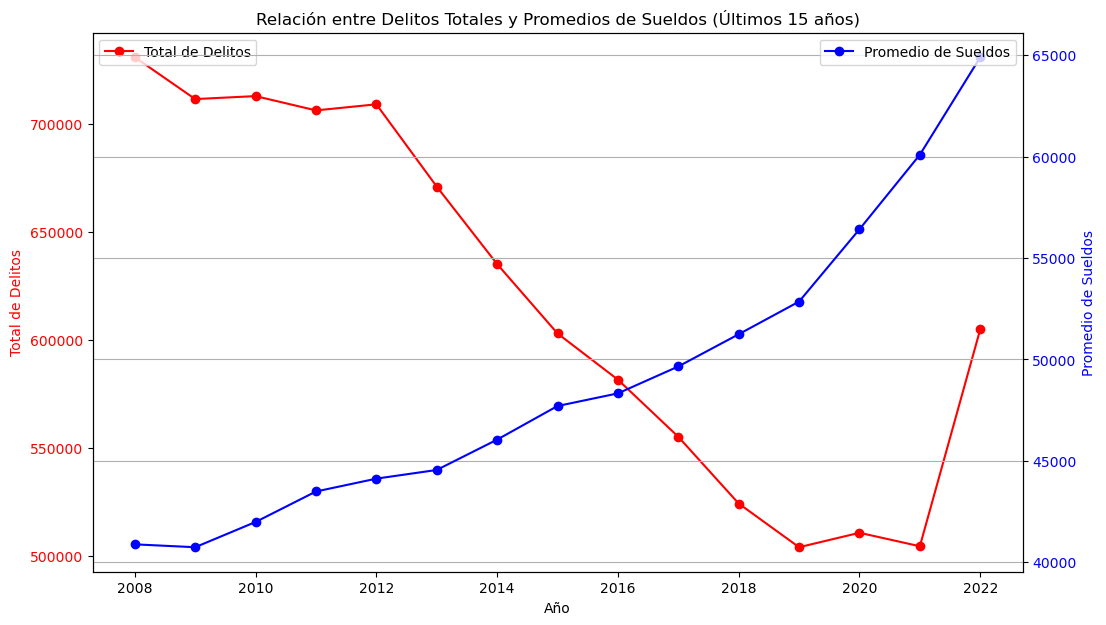

Coeficiente de correlación: -0.76
P-valor: 0.0010


In [132]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

# Obtener los últimos 15 años
ultimos_15_anios = (
    censo_delitos.select("Year")
    .distinct()
    .orderBy("Year", ascending=False)
    .limit(15)
    .rdd.flatMap(lambda x: x)
    .collect()
)

# Calcular el total de delitos y el promedio de sueldos por año
datos_anuales = []
for anio in ultimos_15_anios:
    # Total de delitos
    total_delitos = (
        censo_delitos.filter(censo_delitos["Year"] == anio)
        .select("Index_Total")
        .groupBy()
        .sum()
        .collect()[0][0]
    )

    # Promedio de sueldos
    promedio_sueldo = (
        censo_empleo.filter(censo_empleo["Year"] == anio)
        .select("Annual_Average_Salary")
        .groupBy()
        .avg()
        .collect()[0][0]
    )

    datos_anuales.append(
        {"Year": anio, "Total Delitos": total_delitos, "Promedio Sueldo": promedio_sueldo}
    )

# Crear un DataFrame con los datos anuales
df_anual = pd.DataFrame(datos_anuales)

# Graficar las líneas
fig, ax1 = plt.subplots(figsize=(12, 7))

# Línea de delitos
ax1.plot(
    df_anual["Year"],
    df_anual["Total Delitos"],
    color="red",
    marker="o",
    label="Total de Delitos",
)
ax1.set_ylabel("Total de Delitos", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Línea de sueldos
ax2 = ax1.twinx()
ax2.plot(
    df_anual["Year"],
    df_anual["Promedio Sueldo"],
    color="blue",
    marker="o",
    label="Promedio de Sueldos",
)
ax2.set_ylabel("Promedio de Sueldos", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Títulos y leyendas
plt.title("Relación entre Delitos Totales y Promedios de Sueldos (Últimos 15 años)")
ax1.set_xlabel("Año")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.grid()

plt.show()

# Calcular la correlación entre delitos y sueldos
correlacion, p_valor = pearsonr(df_anual["Total Delitos"], df_anual["Promedio Sueldo"])
print(f"Coeficiente de correlación: {correlacion:.2f}")
print(f"P-valor: {p_valor:.4f}")


In [ ]:
spark.stop()

# A partir de este punto, se puede entender que mientras mas sube el sueldo total, mas bajan los delitos.
# Abro parentesis para hablar sobre lo que vendria siendo la pandemia del 2020. Esto entra como anomalia debido a todos los factores que existen y no se puede hacer mucho con los datos que tenemos.

---

# Ahora vamos a ver si podemos sacar una correlacion entre los crimenes de odio y suicidios :)

In [40]:
import pyspark
import csv
import findspark

In [203]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Hate Crimes and Suicides").getOrCreate()

spark

24/12/02 01:38:47 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [204]:
hatecrimes_path = "Datasets/Hate_Crimes_by_County_and_Bias_Type__Beginning_2010_20241030.csv"
suicide_path = "Datasets/Vital_Statistics_Suicide_Deaths_by_Age-Group__Race_Ethnicity__Resident_Region__and_Gender__Beginning_2003_20241030.csv"

hate_crimes = spark.read.csv(hatecrimes_path, header=True, inferSchema=True)
suicides = spark.read.csv(suicide_path, header=True, inferSchema=True)

hate_crimes.show(5)
hate_crimes.printSchema()

print("-----------------------")

suicides.show(5)
suicides.printSchema()

+------+----+--------------------+---------+-----------+----------------+--------------------------+---------+----------+----------+-----------------------------------+----------+-------------------------------------+------------------------+---------------+-----------+-------------+---------------+---------------------+---------------------------+------------------------+---------------------------------+-------------------+-------------+--------------------------------------------+----------+---------------------+-----------+--------------------+---------+-------------+---------+------------------------------------+------------------+-------------+---------------+--------------------------+-----------------+-------------+------------------------+----------------------+---------------+-------------+---------------+
|County|Year|          Crime Type|Anti-Male|Anti-Female|Anti-Transgender|Anti-Gender Non-Conforming|Anti-Age*|Anti-White|Anti-Black|Anti-American Indian/Alaskan Native|Anti

Vamos a compararar si hay relacion en la cantidad de suicidios de cierta etnicidad y de crimenes de odio de la misma. Tambien en totales por condado de ambos.

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

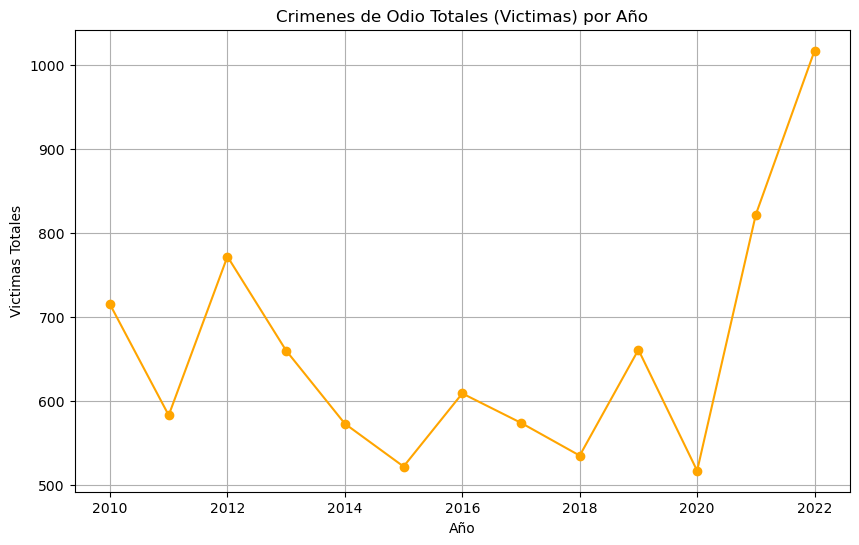

In [206]:
hate_crimes_year = hate_crimes.groupBy("Year").sum("Total Victims").orderBy("Year").toPandas()

plt.figure(figsize=(10, 6))
plt.plot(hate_crimes_year["Year"], hate_crimes_year["sum(Total Victims)"], marker='o', color='orange')
plt.title("Crimenes de Odio Totales (Victimas) por Año")
plt.xlabel("Año")
plt.ylabel("Victimas Totales")
plt.grid()
plt.show()

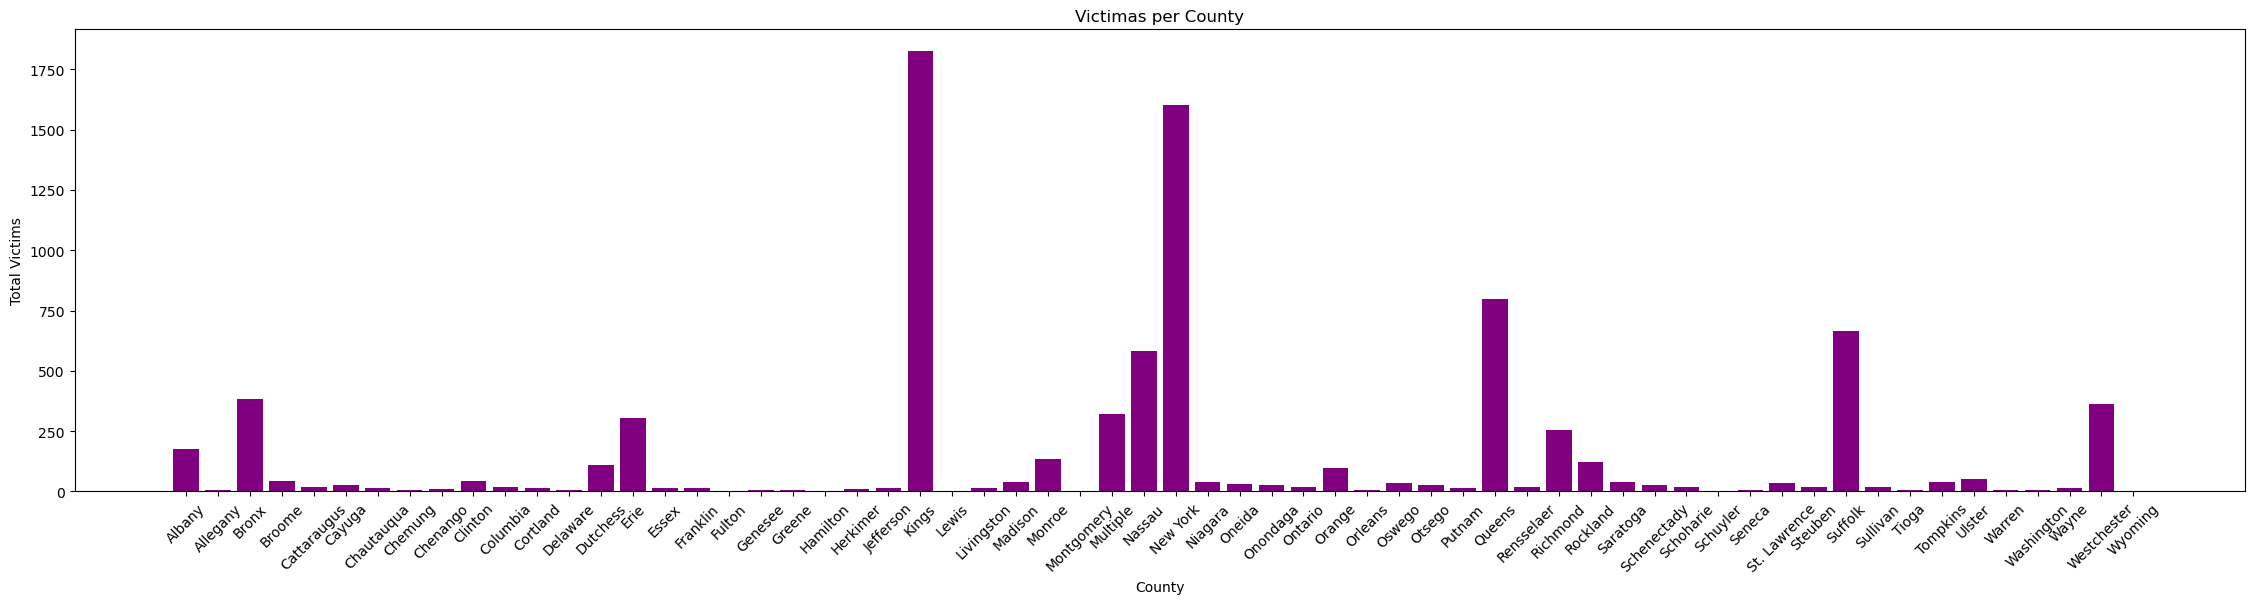

In [207]:
hate_crimes_county = hate_crimes.groupBy("County").sum("Total Victims").orderBy("County").toPandas()

plt.figure(figsize=(28, 6))
plt.bar(hate_crimes_county["County"], hate_crimes_county["sum(Total Victims)"], color='purple')
plt.title("Victimas per County")
plt.xlabel("County")
plt.ylabel("Total Victims")
plt.xticks(rotation=45)
plt.show()

Aqui podemos ver que no solo han aumentado los hate crimes durante el tiempo, si no que existen condados especificos con muchos mas que los demas. Veamos si se parecen las graficas de suicidios.

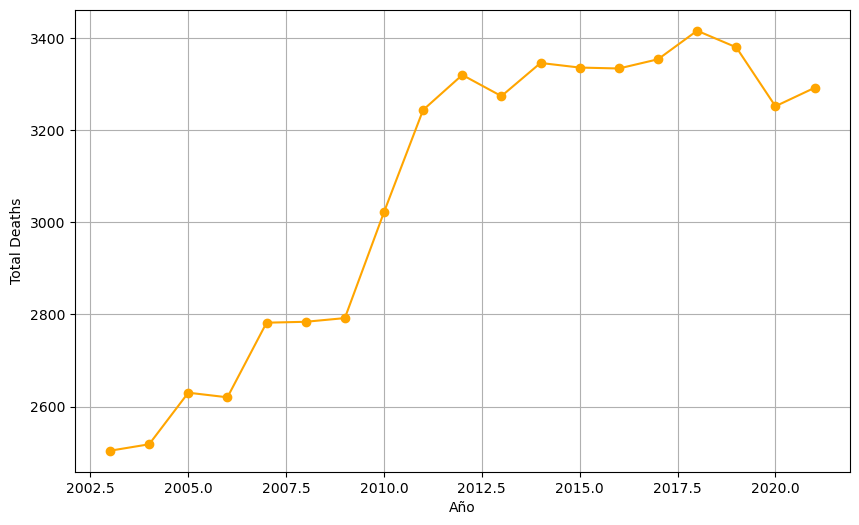

In [208]:
suicides_per_year = suicides.groupBy("Year").sum("Suicide Deaths").orderBy("Year").toPandas()

plt.figure(figsize=(10, 6))
plt.plot(suicides_per_year["Year"], suicides_per_year["sum(Suicide Deaths)"], marker='o', color='orange')
plt.xlabel("Año")
plt.ylabel("Total Deaths")
plt.grid()
plt.show()

(No se puede apreciar algo muy similar a simple vista, probemos con Alcohol related Deaths o fire arms)

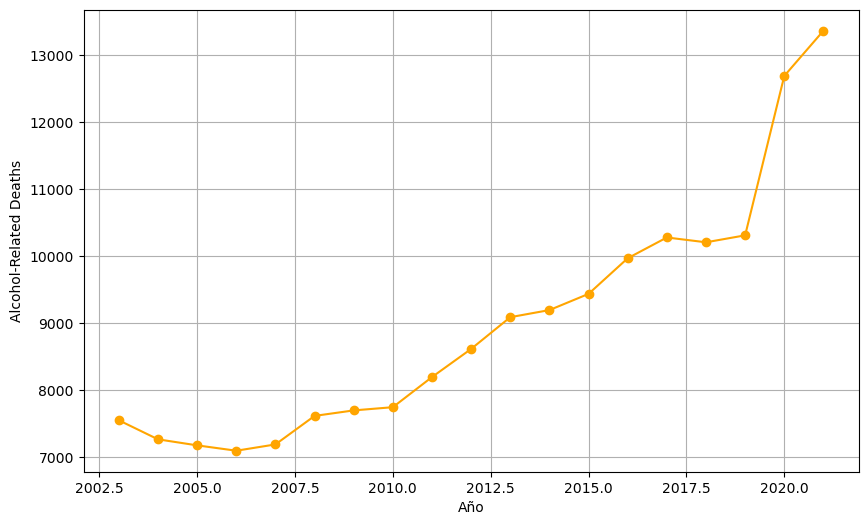

In [209]:
suicides_per_year_alcohol = suicides.groupBy("Year").sum("Alcohol-Related Deaths").orderBy("Year").toPandas()

plt.figure(figsize=(10, 6))
plt.plot(suicides_per_year_alcohol["Year"], suicides_per_year_alcohol["sum(Alcohol-Related Deaths)"], marker='o', color='orange')
plt.xlabel("Año")
plt.ylabel("Alcohol-Related Deaths")
plt.grid()
plt.show()

Esta grafica se parece mucho mas a la de Criemenes de Odio Totales, no descartemos las fire arms tho

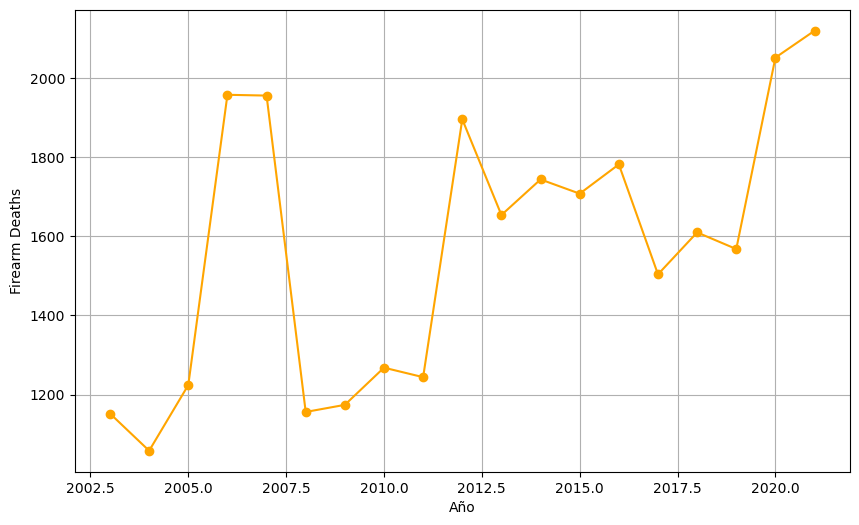

In [210]:
suicides_per_year_firearm = suicides.groupBy("Year").sum("Firearm Deaths").orderBy("Year").toPandas()

plt.figure(figsize=(10, 6))
plt.plot(suicides_per_year_firearm["Year"], suicides_per_year_firearm["sum(Firearm Deaths)"], marker='o', color='orange')
plt.xlabel("Año")
plt.ylabel("Firearm Deaths")
plt.grid()
plt.show()

Tambien se parece mucho mas considerando que estamos tomando apartir del 2010. Ahora veamos por county. Si se consigue algo similar, podremos generar un modelo al respecto.

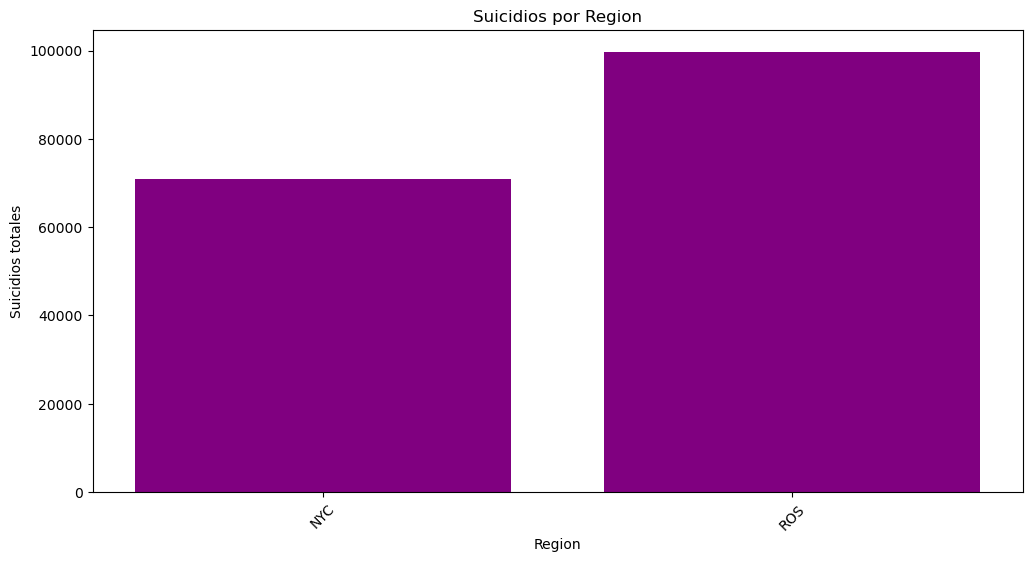

In [211]:
suicides_county_alcohol = suicides.groupBy("Region").sum("Alcohol-Related Deaths").orderBy("Region").toPandas()

plt.figure(figsize=(12, 6))
plt.bar(suicides_county_alcohol["Region"], suicides_county_alcohol["sum(Alcohol-Related Deaths)"], color="purple")
plt.title("Suicidios por Region")
plt.xlabel("Region")
plt.ylabel("Suicidios totales")
plt.xticks(rotation=45)
plt.show()

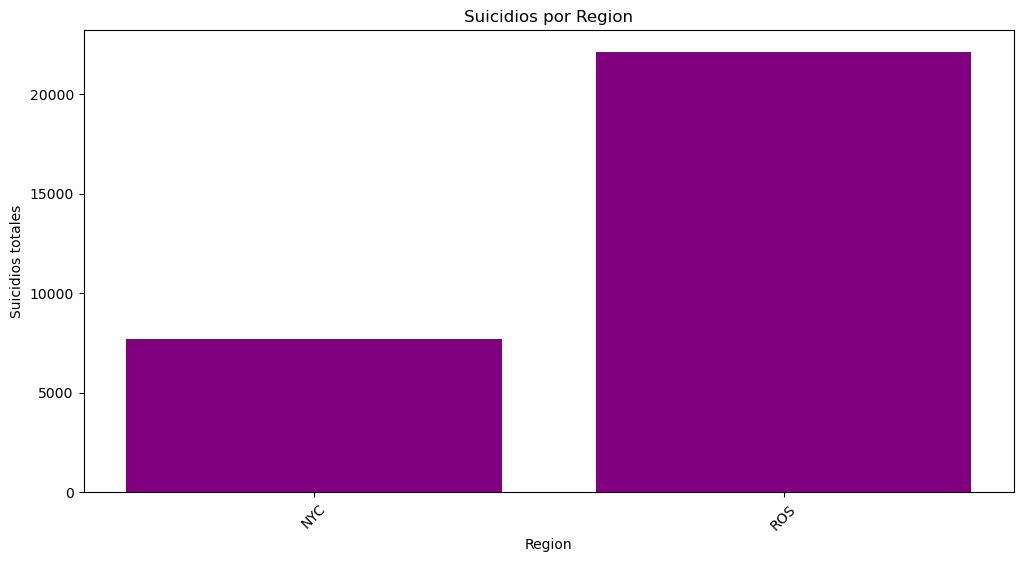

In [212]:
suicides_county_firearm = suicides.groupBy("Region").sum("Firearm Deaths").orderBy("Region").toPandas()

plt.figure(figsize=(12, 6))
plt.bar(suicides_county_firearm["Region"], suicides_county_firearm["sum(Firearm Deaths)"], color="purple")
plt.title("Suicidios por Region")
plt.xlabel("Region")
plt.ylabel("Suicidios totales")
plt.xticks(rotation=45)
plt.show()

Por desgracia en este dataset la region no esta separada por condado, por lo que no podemos hacer mucho con esta informacion. Veamos que mas tenemos.

Podemos separarlos por raza o etnicidad para  ver que mas tenemos aqui.

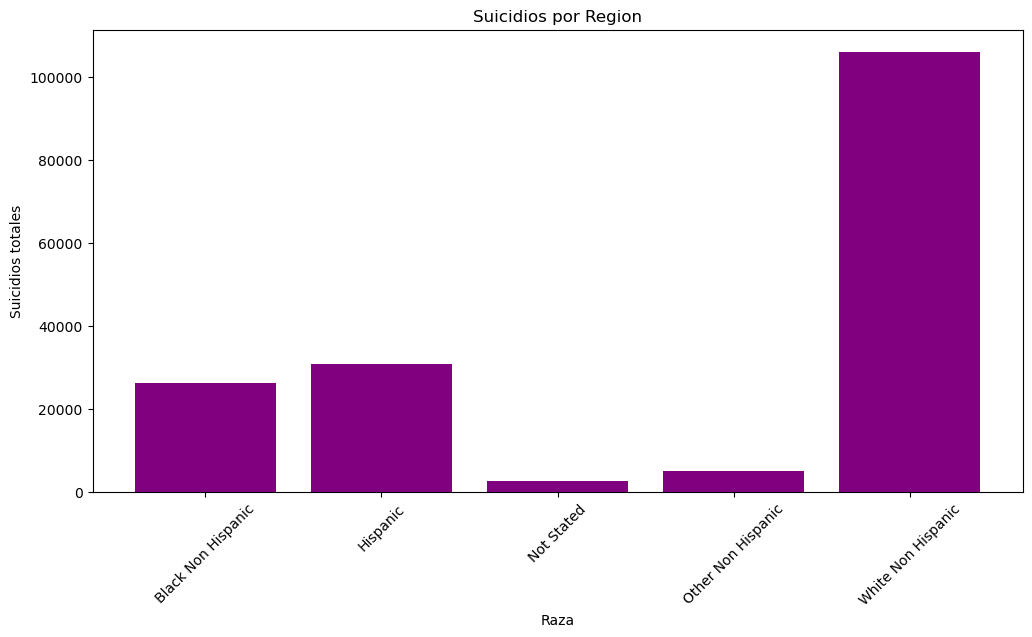

In [213]:
suicides_race = suicides.groupBy("Race or Ethnicity").sum("Alcohol-Related Deaths").orderBy("Race or Ethnicity").toPandas()

plt.figure(figsize=(12, 6))
plt.bar(suicides_race["Race or Ethnicity"], suicides_race["sum(Alcohol-Related Deaths)"], color="purple")
plt.title("Suicidios por Region")
plt.xlabel("Raza")
plt.ylabel("Suicidios totales")
plt.xticks(rotation=45)
plt.show()

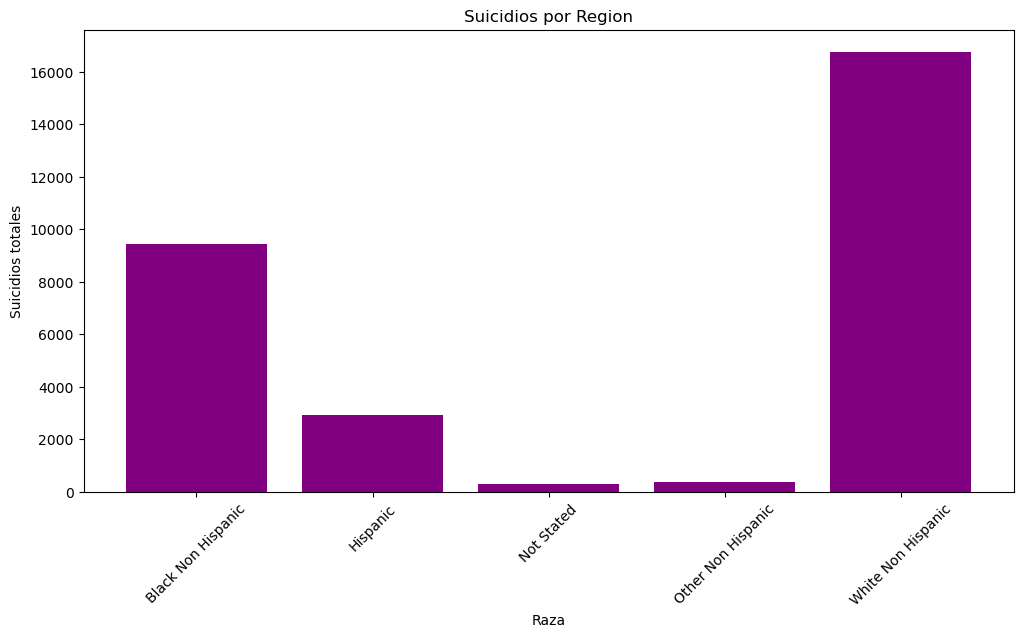

In [214]:
suicides_race_firearm = suicides.groupBy("Race or Ethnicity").sum("Firearm Deaths").orderBy("Race or Ethnicity").toPandas()

plt.figure(figsize=(12, 6))
plt.bar(suicides_race_firearm["Race or Ethnicity"], suicides_race_firearm["sum(Firearm Deaths)"], color="purple")
plt.title("Suicidios por Region")
plt.xlabel("Raza")
plt.ylabel("Suicidios totales")
plt.xticks(rotation=45)
plt.show()

Como podemos ver, la gente blanca son quienes lideran estas graficas (porque hay mas) y despues sigue las personas afroamericanas con el uso de armas. 

Tampoco podemos hacer mucho con esto. Lo unico que podemos manejar es por tiempo.
Intentemos cambiar nuestro approach entonces, asi como tenemos una correlacion entre empleos y crimenes, existira una entre empleos y suicidios??

In [215]:
spark.stop()

In [216]:
# Volvamos a llamar a empleos 
#ruta_empleos = "Datasets/Quarterly_Census_of_Employment_and_Wages_Annual_Data__Beginning_2000_20241030.csv"
#spark = SparkSession.builder.appName("Employment and Suicides")

# WAIT A MINUTEEEE
# Que parte no estamos entendiendo que suicidios no tiene nada por county sigh.
# Hate crimes es el que tiene counties y ese es el que podemos manejar owo

# Que conclusion queremos?? Si existen mas hate crimes en areas con menos empleo? Maybe, lo de los suicidios estaba chido tho.



# Nuevo Dataset

Tomamos la decision de buscar las relaciones con la educacion por condado. Y aqui entrarian dos datasets nuevos.
El primero seria la cantidad de personas incritas en las universidades publicas de NY. 
El segundo es la cantidad de personas graduadas. 
Necesitamos estos dos datos para ver la cantidad de personas que cuenta con estudios completos dentro de cada condado para poder decir si estoo tiene algo que ver.

In [217]:
spark.stop()

In [1]:
# Olvide crear el sparkcontext hahasalu2
spark = SparkSession.builder.appName("Education and Relations").config("spark.driver.maxResultSize", "8g").getOrCreate()
spark

SparkConf().getAll()

NameError: name 'SparkSession' is not defined

In [ ]:
#Veamos el primer dataset entonces.

headcount_SUNY_path = "Datasets/Headcount_Enrollment_by_Student_Level_and_Student_Load_by_Institutions_of_the_State_University_of_New_York__Beginning_Fall_2011_20241201.csv"

suny_headcount = spark.read.csv(headcount_SUNY_path, header=True, inferSchema=True)

suny_headcount.show(5)
suny_headcount.printSchema()

+----+----+---------------------------+---------------------------+-----------------------+-----------------------+------------------+------------------+
|Year|Term|College or Institution Type|College or Institution Name|Undergraduate Full-Time|Undergraduate Part-Time|Graduate Full-Time|Graduate Part-Time|
+----+----+---------------------------+---------------------------+-----------------------+-----------------------+------------------+------------------+
|2021|Fall|                 SUNY Total|                       null|                 222560|                 103450|             27159|             16945|
|2020|Fall|                 SUNY Total|                       null|                 241742|                 109147|             25614|             17717|
|2019|Fall|                 SUNY Total|                       null|                 259869|                 113079|             25436|             17188|
|2018|Fall|                 SUNY Total|                       null|         

In [ ]:
suny_headcount = suny_headcount.filter(suny_headcount["College or Institution Name"].isNotNull())
# Tambien podemos hacer averages pero se tendria que investigar mas

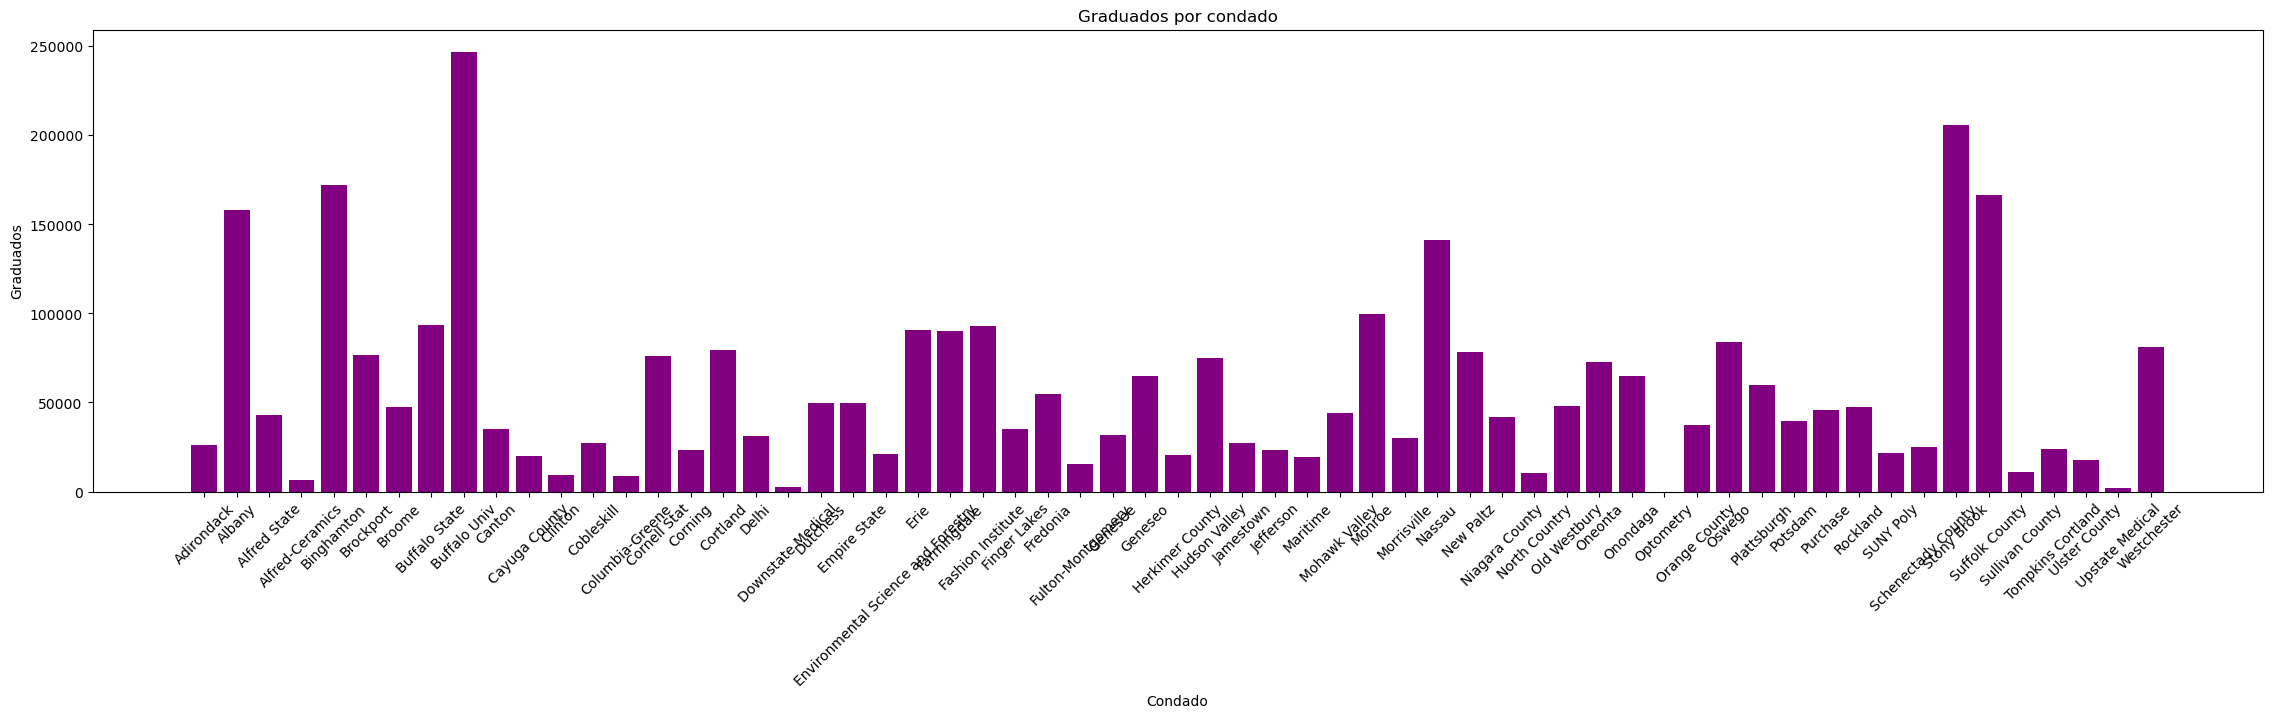

In [ ]:
# Hay unos cuantos muchos nulls pero luego arreglamos eso owo
# (Bueno resulta y resalta que si importa limpiar los nulls antes haha salu2)
suny_headcount_by_college = suny_headcount.groupBy("College or Institution Name").sum("Undergraduate Full-Time").orderBy("College or Institution Name").toPandas()

plt.figure(figsize=(28, 6))
plt.bar(suny_headcount_by_college["College or Institution Name"], suny_headcount_by_college["sum(Undergraduate Full-Time)"], color="purple")
plt.title("Graduados por condado")
plt.xlabel("Condado")
plt.ylabel("Graduados")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#spark.stop()

Bueno ahora podemos ver como SUNY Downstate Medical se encuentra en los mas bajos de undergraduates. Esto es importante porque esta universidad se encuentra en Kings el cual es el condado con mayor numero de victimas de hate crimes. Igualemente podemos ver algunos similares como Maritime y Bronx. 
Ahora probemos con el otro dataset porque este no cuenta con todo lo que queremos.

In [ ]:
suny_undergraduate_path = "Datasets/SUNY-First_Time_Undergraduates_by_NYS_High_School__Beginning_Fall_2010_20241201.csv"

suny_undergraduate = spark.read.csv(suny_undergraduate_path, header=True, inferSchema=True)

suny_undergraduate.show(5)
suny_undergraduate.printSchema()

+-----------+--------------------+----------------+------+------+--------+---------------------------------+------------------------------------+-------------------------------------+----------------------------------+---------------------------------+----------------+
|      Term |    High School Name|High School CEEB|  City|County|Zip Code|Total Attending SUNY Institutions|Attending SUNY Doctoral Institutions|Attending SUNY Comprehensive Colleges|Attending SUNY Technology Colleges|Attending SUNY Community Colleges|      Location 1|
+-----------+--------------------+----------------+------+------+--------+---------------------------------+------------------------------------+-------------------------------------+----------------------------------+---------------------------------+----------------+
|  Fall 2023|Academy Of The Ho...|          330025|Albany|Albany|   12208|                                6|                                  <4|                                   <4|       

In [ ]:
#Limpiemos nulls
suny_undergraduate = suny_undergraduate.filter(suny_undergraduate["County"].isNotNull())
suny_undergraduate = suny_undergraduate.filter(suny_undergraduate["Total Attending SUNY Institutions"].isNotNull())
suny_undergraduate = suny_undergraduate.filter(suny_undergraduate["Attending SUNY Doctoral Institutions"].isNotNull())
suny_undergraduate = suny_undergraduate.filter(suny_undergraduate["Attending SUNY Technology Colleges"].isNotNull())
suny_undergraduate = suny_undergraduate.filter(suny_undergraduate["Attending SUNY Community Colleges"].isNotNull())

In [ ]:
# Esta muy feo el dataset asi que hay que limpiarlo
# Primero veamos los datos unicos que tenemos 

total_attending = suny_undergraduate.select("Total Attending SUNY Institutions").distinct()

unique_total_attending = [row["Total Attending SUNY Institutions"] for row in total_attending.collect()]

for total in sorted(unique_total_attending):
    print(f"- {total}")

- 10
- 100
- 101
- 102
- 103
- 104
- 105
- 106
- 107
- 108
- 109
- 11
- 110
- 111
- 112
- 113
- 114
- 115
- 116
- 117
- 118
- 119
- 12
- 120
- 121
- 122
- 123
- 124
- 125
- 126
- 127
- 128
- 129
- 13
- 130
- 131
- 132
- 133
- 134
- 135
- 136
- 137
- 138
- 139
- 14
- 140
- 141
- 142
- 143
- 144
- 145
- 146
- 147
- 148
- 149
- 15
- 150
- 151
- 152
- 153
- 154
- 155
- 156
- 157
- 158
- 159
- 16
- 160
- 161
- 162
- 163
- 164
- 165
- 166
- 167
- 168
- 169
- 17
- 170
- 171
- 172
- 173
- 174
- 175
- 176
- 177
- 178
- 179
- 18
- 180
- 181
- 182
- 183
- 184
- 185
- 186
- 187
- 188
- 189
- 19
- 190
- 191
- 192
- 193
- 194
- 195
- 196
- 197
- 198
- 199
- 20
- 200
- 201
- 202
- 203
- 204
- 205
- 206
- 207
- 208
- 209
- 21
- 210
- 211
- 212
- 213
- 214
- 215
- 216
- 217
- 218
- 219
- 22
- 220
- 221
- 222
- 223
- 224
- 225
- 226
- 227
- 228
- 229
- 23
- 230
- 231
- 232
- 233
- 234
- 235
- 236
- 237
- 238
- 239
- 24
- 240
- 241
- 242
- 243
- 244
- 245
- 246
- 247
- 248
- 249
- 25
- 250
- 251
- 252
- 

El unico problema que tenemos es un menor a 4, vamos a remplazarlo por un 0

In [ ]:
from pyspark.sql.functions import col

suny_undergraduate = suny_undergraduate.toDF(*[c.strip().replace("<4", "0") for c in suny_undergraduate.columns])

suny_undergraduate = suny_undergraduate.withColumn("Total Attending SUNY Institutions", col("Total Attending SUNY Institutions").cast("double"))

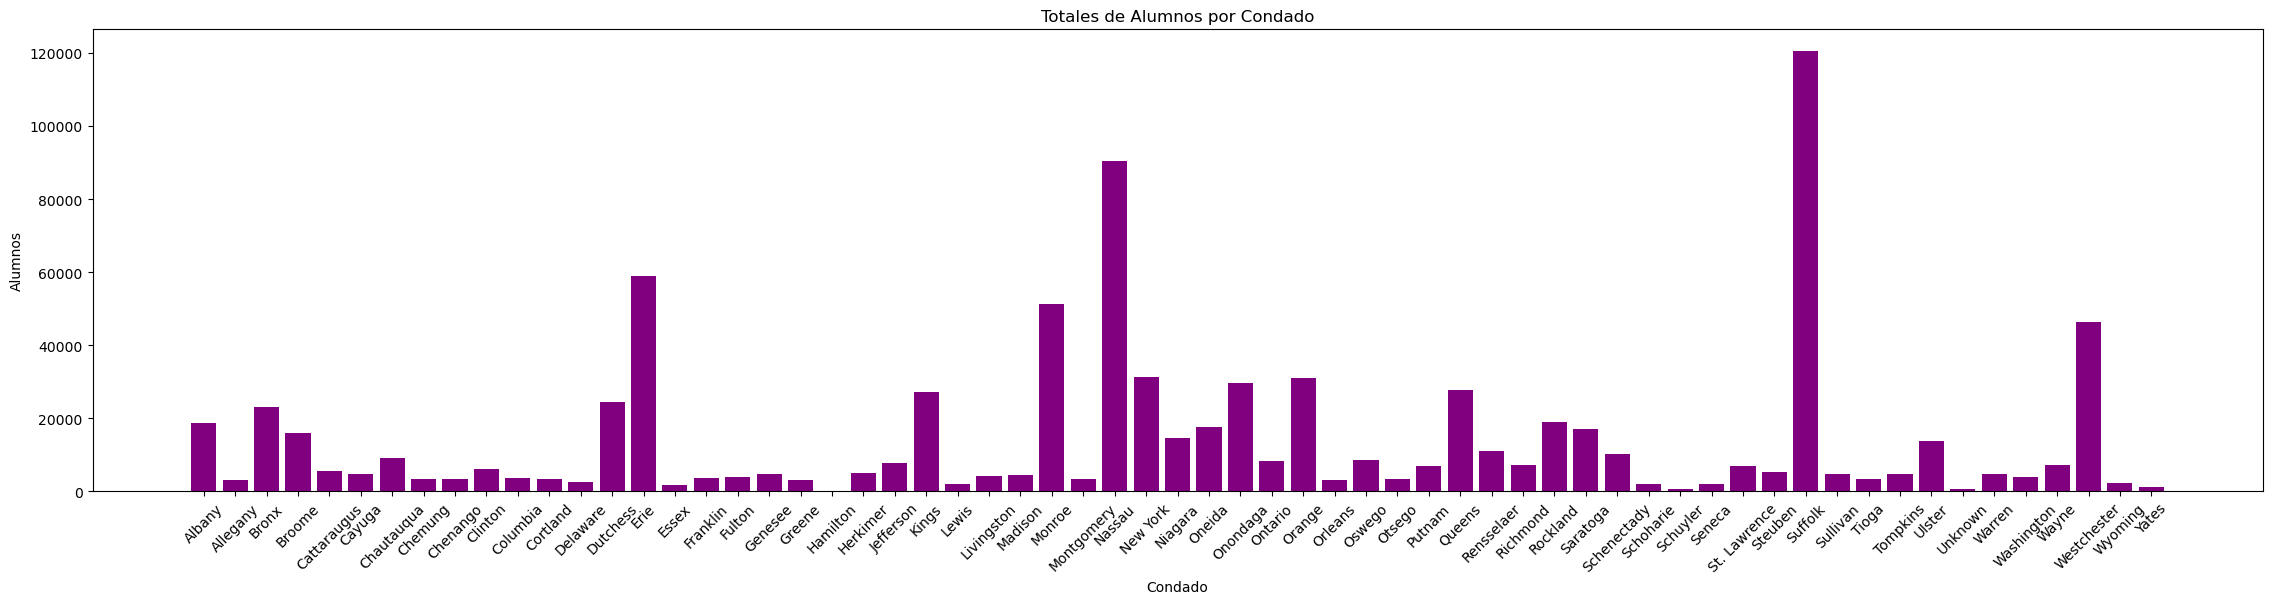

In [ ]:
suny_undergraduate_county = suny_undergraduate.groupBy("County").sum("Total Attending SUNY Institutions").orderBy("County").toPandas()

plt.figure(figsize=(28, 6))
plt.bar(suny_undergraduate_county["County"], suny_undergraduate_county["sum(Total Attending SUNY Institutions)"], color='purple')
plt.title("Totales de Alumnos por Condado")
plt.xlabel("Condado")
plt.ylabel("Alumnos")
plt.xticks(rotation=45)
plt.show()

Las graficas se parecen un poco (Seguimos comparando con victimas per county) pero no lo suficiente como para sacar alguna relacion. Veamos con otro tipo de busqueda

In [ ]:
# Esta muy feo el dataset asi que hay que limpiarlo
# Primero veamos los datos unicos que tenemos 

total_attending = suny_undergraduate.select("Attending SUNY Community Colleges").distinct()

unique_total_attending = [row["Attending SUNY Community Colleges"] for row in total_attending.collect()]

for total in sorted(unique_total_attending):
    print(f"- {total}")

- 0
- 10
- 100
- 101
- 102
- 103
- 104
- 105
- 106
- 107
- 108
- 109
- 11
- 110
- 111
- 112
- 113
- 114
- 115
- 116
- 117
- 118
- 119
- 12
- 120
- 121
- 122
- 123
- 124
- 125
- 126
- 127
- 128
- 129
- 13
- 130
- 131
- 132
- 133
- 134
- 135
- 136
- 137
- 138
- 139
- 14
- 140
- 141
- 142
- 143
- 144
- 145
- 146
- 147
- 148
- 149
- 15
- 150
- 151
- 152
- 153
- 154
- 155
- 156
- 157
- 158
- 159
- 16
- 160
- 161
- 162
- 163
- 164
- 165
- 166
- 167
- 168
- 169
- 17
- 170
- 171
- 172
- 173
- 174
- 176
- 177
- 178
- 179
- 18
- 180
- 181
- 182
- 183
- 184
- 185
- 186
- 187
- 188
- 189
- 19
- 190
- 191
- 192
- 193
- 194
- 195
- 196
- 197
- 198
- 199
- 20
- 200
- 201
- 202
- 203
- 204
- 205
- 206
- 21
- 210
- 211
- 212
- 213
- 214
- 215
- 216
- 217
- 218
- 219
- 22
- 220
- 221
- 222
- 223
- 224
- 225
- 226
- 227
- 228
- 23
- 230
- 231
- 232
- 233
- 234
- 235
- 236
- 237
- 238
- 239
- 24
- 240
- 242
- 244
- 245
- 247
- 248
- 249
- 25
- 250
- 251
- 252
- 259
- 26
- 260
- 263
- 265
- 267
- 268
- 27


In [ ]:
suny_undergraduate = suny_undergraduate.toDF(*[c.strip().replace("<4", "0") for c in suny_undergraduate.columns])

suny_undergraduate = suny_undergraduate.withColumn("Attending SUNY Community Colleges", col("Attending SUNY Community Colleges").cast("double"))

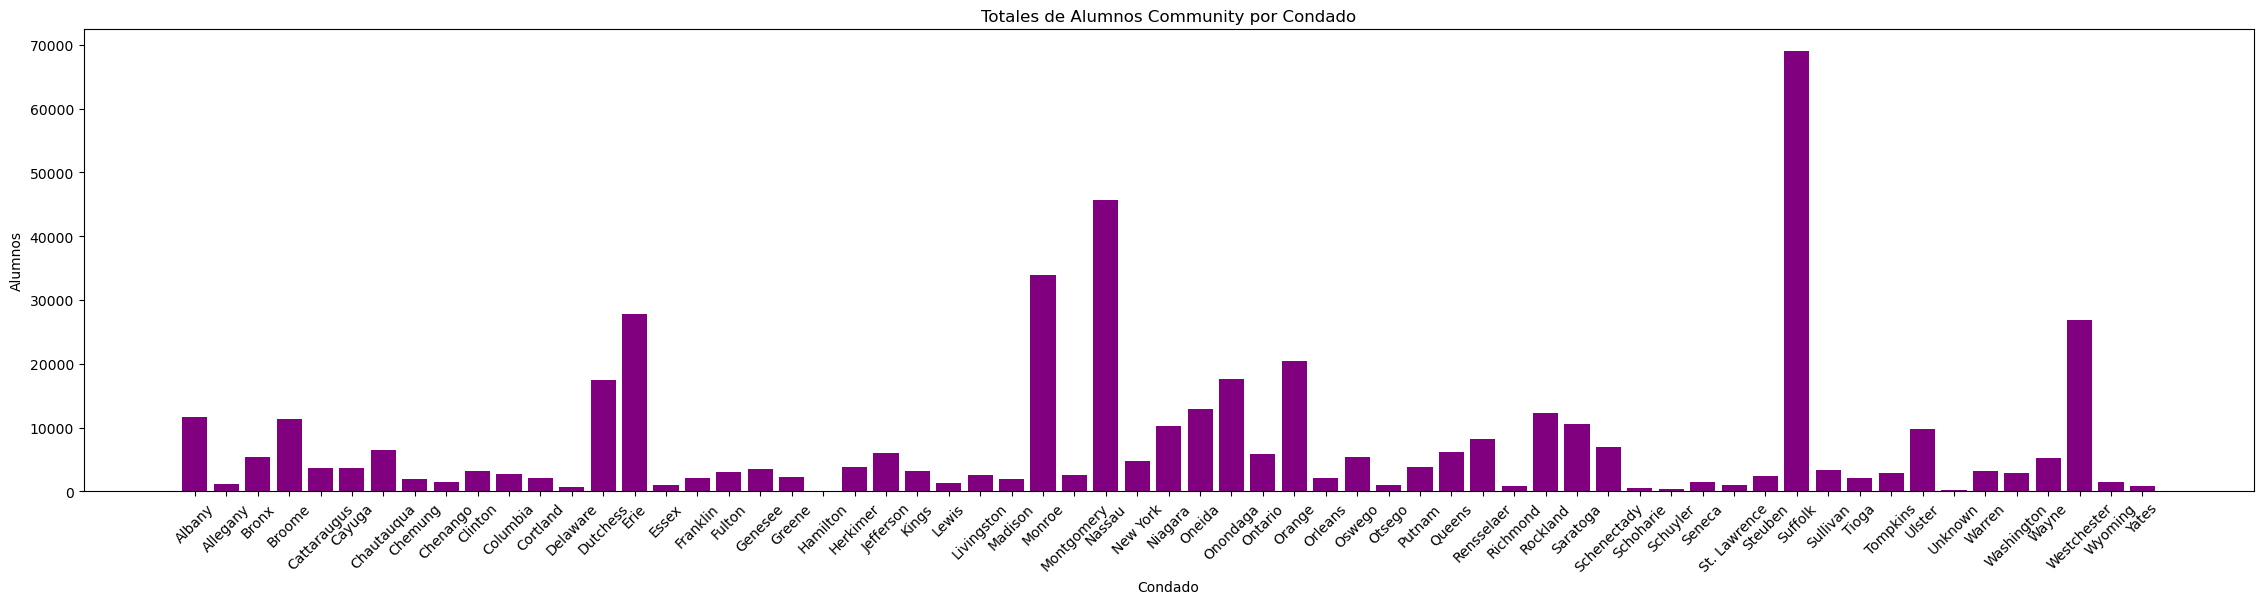

In [ ]:
suny_undergraduate_county = suny_undergraduate.groupBy("County").sum("Attending SUNY Community Colleges").orderBy("County").toPandas()

plt.figure(figsize=(28, 6))
plt.bar(suny_undergraduate_county["County"], suny_undergraduate_county["sum(Attending SUNY Community Colleges)"], color='purple')
plt.title("Totales de Alumnos Community por Condado")
plt.xlabel("Condado")
plt.ylabel("Alumnos")
plt.xticks(rotation=45)
plt.show()

In [ ]:
suny_undergraduate = suny_undergraduate.toDF(*[c.strip().replace("<4", "0") for c in suny_undergraduate.columns])

suny_undergraduate = suny_undergraduate.withColumn("Attending SUNY Technology Colleges", col("Attending SUNY Technology Colleges").cast("double"))

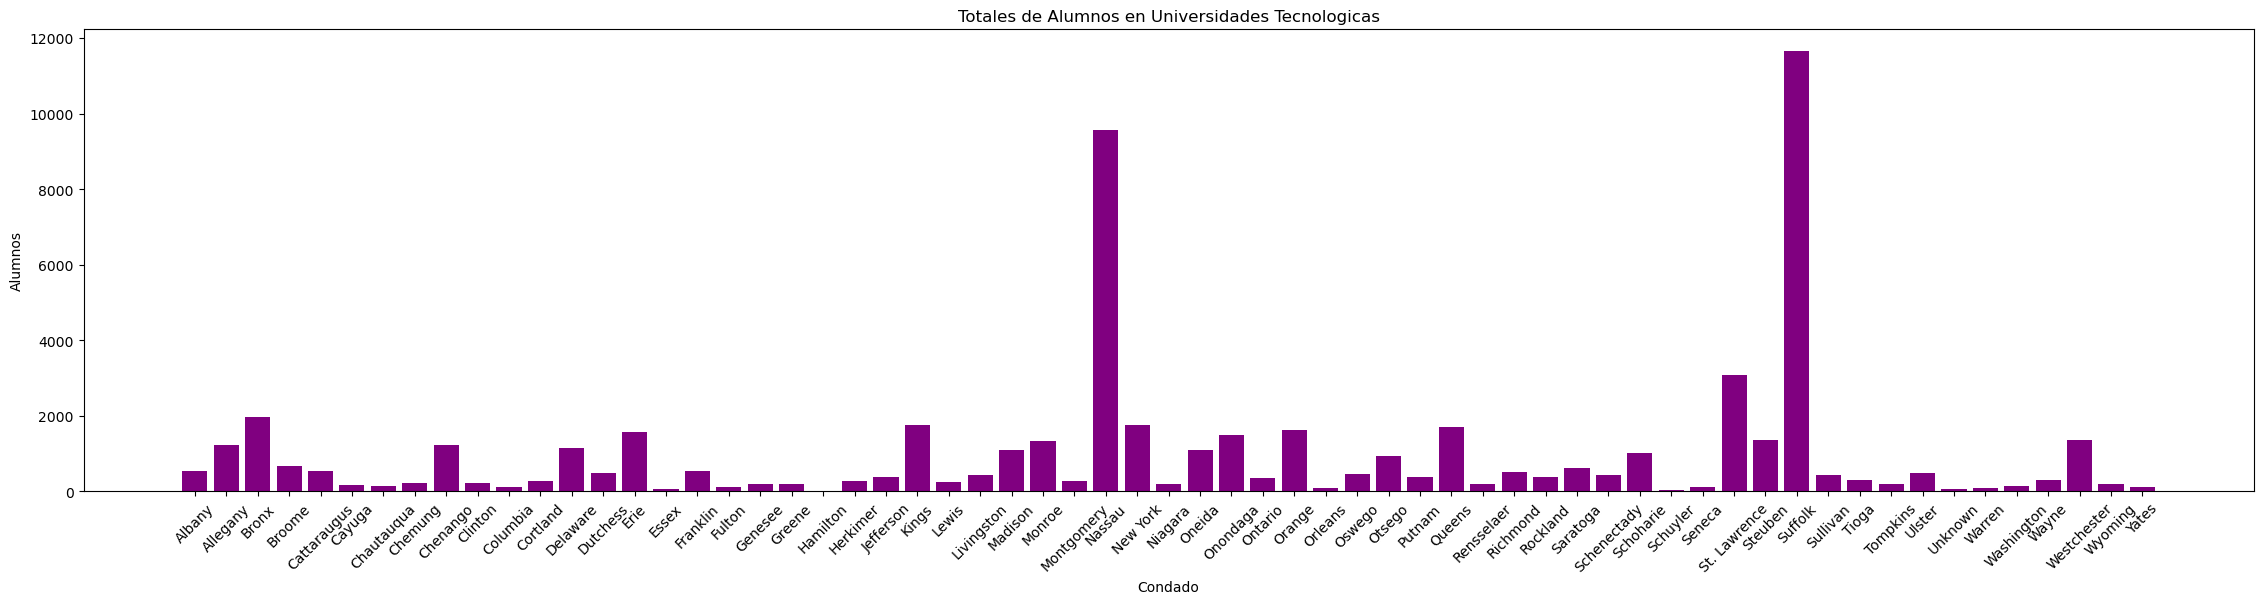

In [ ]:
suny_undergraduate_county = suny_undergraduate.groupBy("County").sum("Attending SUNY Technology Colleges").orderBy("County").toPandas()

plt.figure(figsize=(28, 6))
plt.bar(suny_undergraduate_county["County"], suny_undergraduate_county["sum(Attending SUNY Technology Colleges)"], color='purple')
plt.title("Totales de Alumnos en Universidades Tecnologicas")
plt.xlabel("Condado")
plt.ylabel("Alumnos")
plt.xticks(rotation=45)
plt.show()

Hagamos mas pruebas con otras graficas

In [ ]:
suny_headcount.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Term: string (nullable = true)
 |-- College or Institution Type: string (nullable = true)
 |-- College or Institution Name: string (nullable = true)
 |-- Undergraduate Full-Time: integer (nullable = true)
 |-- Undergraduate Part-Time: integer (nullable = true)
 |-- Graduate Full-Time: integer (nullable = true)
 |-- Graduate Part-Time: integer (nullable = true)



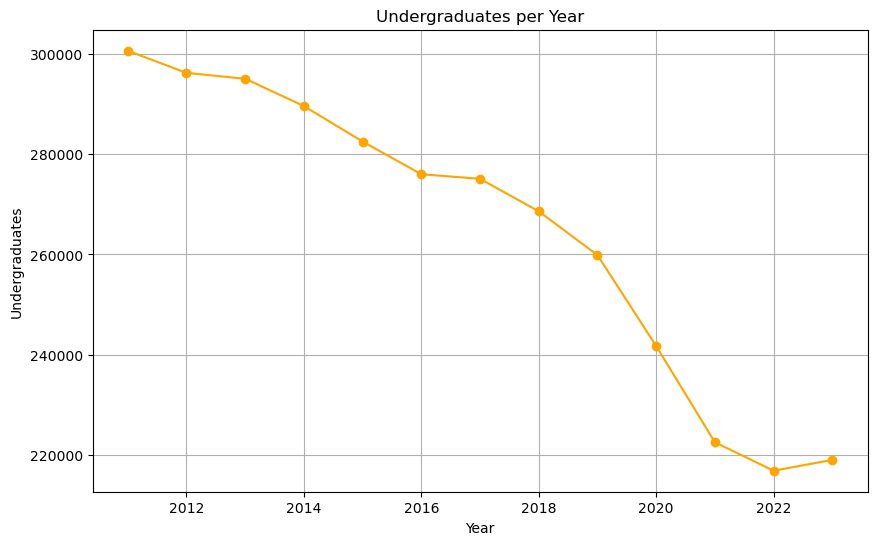

In [ ]:
suny_headcount_year = suny_headcount.groupBy("Year").sum("Undergraduate Full-Time").orderBy("Year").toPandas()

plt.figure(figsize=(10, 6))
plt.plot(suny_headcount_year["Year"], suny_headcount_year["sum(Undergraduate Full-Time)"], marker='o', color='orange')
plt.title("Undergraduates per Year")
plt.xlabel("Year")
plt.ylabel("Undergraduates")
plt.grid()
plt.show()

Aqui apreciamos que la cantidad de estudiantes ha ido bajando bastante.

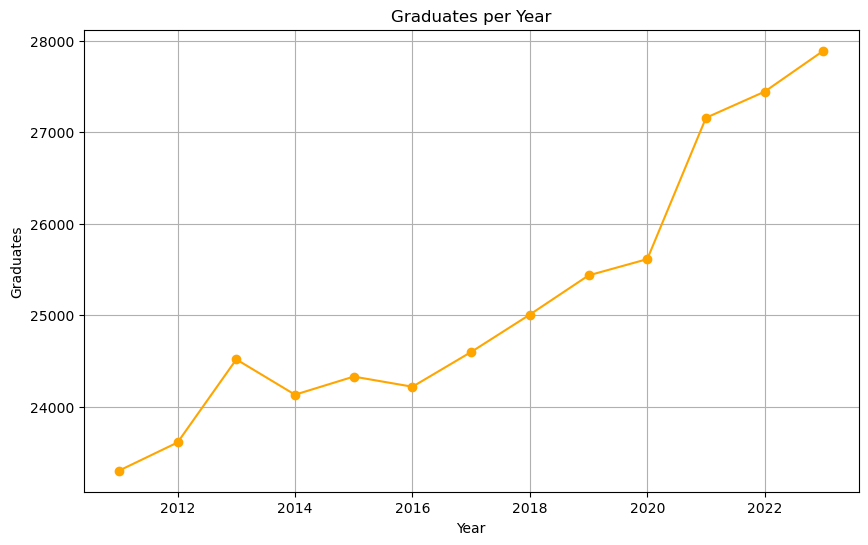

In [ ]:
suny_headcount_year_graduates = suny_headcount.groupBy("Year").sum("Graduate Full-Time").orderBy("Year").toPandas()

plt.figure(figsize=(10, 6))
plt.plot(suny_headcount_year_graduates["Year"], suny_headcount_year_graduates["sum(Graduate Full-Time)"], marker='o', color='orange')
plt.title("Graduates per Year")
plt.xlabel("Year")
plt.ylabel("Graduates")
plt.grid()
plt.show()

Asi mismo la cantidad de estudiantes graduados ha subido bastante mas

Y aunque las graficas con los crimenes se parezcan, sera posible sacar alguna relacion?

# Conclusiones hasta ahora

Por lo visto, se podria decir que todas las graficas estan subiendo directamente por la cantidad de personas que hay. La unica que se acomoda bien es la de crimenes y empleos.

## Empecemos con las relaciones

In [ ]:
suny_undergraduate.printSchema()
hate_crimes.printSchema()

root
 |-- Term: string (nullable = true)
 |-- High School Name: string (nullable = true)
 |-- High School CEEB: integer (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- Zip Code: integer (nullable = true)
 |-- Total Attending SUNY Institutions: double (nullable = true)
 |-- Attending SUNY Doctoral Institutions: string (nullable = true)
 |-- Attending SUNY Comprehensive Colleges: string (nullable = true)
 |-- Attending SUNY Technology Colleges: double (nullable = true)
 |-- Attending SUNY Community Colleges: double (nullable = true)
 |-- Location 1: string (nullable = true)

root
 |-- County: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Crime Type: string (nullable = true)
 |-- Anti-Male: integer (nullable = true)
 |-- Anti-Female: integer (nullable = true)
 |-- Anti-Transgender: integer (nullable = true)
 |-- Anti-Gender Non-Conforming: integer (nullable = true)
 |-- Anti-Age*: integer (nullable = true)
 |-- Anti-Whi

In [1]:
import pyspark
import csv
import findspark
from pyspark.sql import SparkSession
import matplotlib as plt
import seaborn as sns
import pandas as pd

In [2]:
spark = SparkSession.builder.appName("Relations").getOrCreate()
spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/02 02:48:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
hate_crimes_path = "Datasets/Hate_Crimes_by_County_and_Bias_Type__Beginning_2010_20241030.csv"
suny_undergraduates_path = "Datasets/SUNY-First_Time_Undergraduates_by_NYS_High_School__Beginning_Fall_2010_20241201.csv"
hate_crimes = spark.read.csv(hate_crimes_path, header=True, inferSchema=True)
suny_undergraduates = spark.read.csv(suny_undergraduates_path, header=True, inferSchema=True)

hate_crimes.show(10)
hate_crimes.printSchema()

suny_undergraduates.show(10)
suny_undergraduates.printSchema()

24/12/02 02:48:24 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-----------+----+--------------------+---------+-----------+----------------+--------------------------+---------+----------+----------+-----------------------------------+----------+-------------------------------------+------------------------+---------------+-----------+-------------+---------------+---------------------+---------------------------+------------------------+---------------------------------+-------------------+-------------+--------------------------------------------+----------+---------------------+-----------+--------------------+---------+-------------+---------+------------------------------------+------------------+-------------+---------------+--------------------------+-----------------+-------------+------------------------+----------------------+---------------+-------------+---------------+
|     County|Year|          Crime Type|Anti-Male|Anti-Female|Anti-Transgender|Anti-Gender Non-Conforming|Anti-Age*|Anti-White|Anti-Black|Anti-American Indian/Alaskan N

In [4]:
hate_crimes = hate_crimes.filter(hate_crimes["County"].isNotNull())
hate_crimes.show(10)

+-----------+----+--------------------+---------+-----------+----------------+--------------------------+---------+----------+----------+-----------------------------------+----------+-------------------------------------+------------------------+---------------+-----------+-------------+---------------+---------------------+---------------------------+------------------------+---------------------------------+-------------------+-------------+--------------------------------------------+----------+---------------------+-----------+--------------------+---------+-------------+---------+------------------------------------+------------------+-------------+---------------+--------------------------+-----------------+-------------+------------------------+----------------------+---------------+-------------+---------------+
|     County|Year|          Crime Type|Anti-Male|Anti-Female|Anti-Transgender|Anti-Gender Non-Conforming|Anti-Age*|Anti-White|Anti-Black|Anti-American Indian/Alaskan N

/tmp/ipykernel_2756/547736846.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


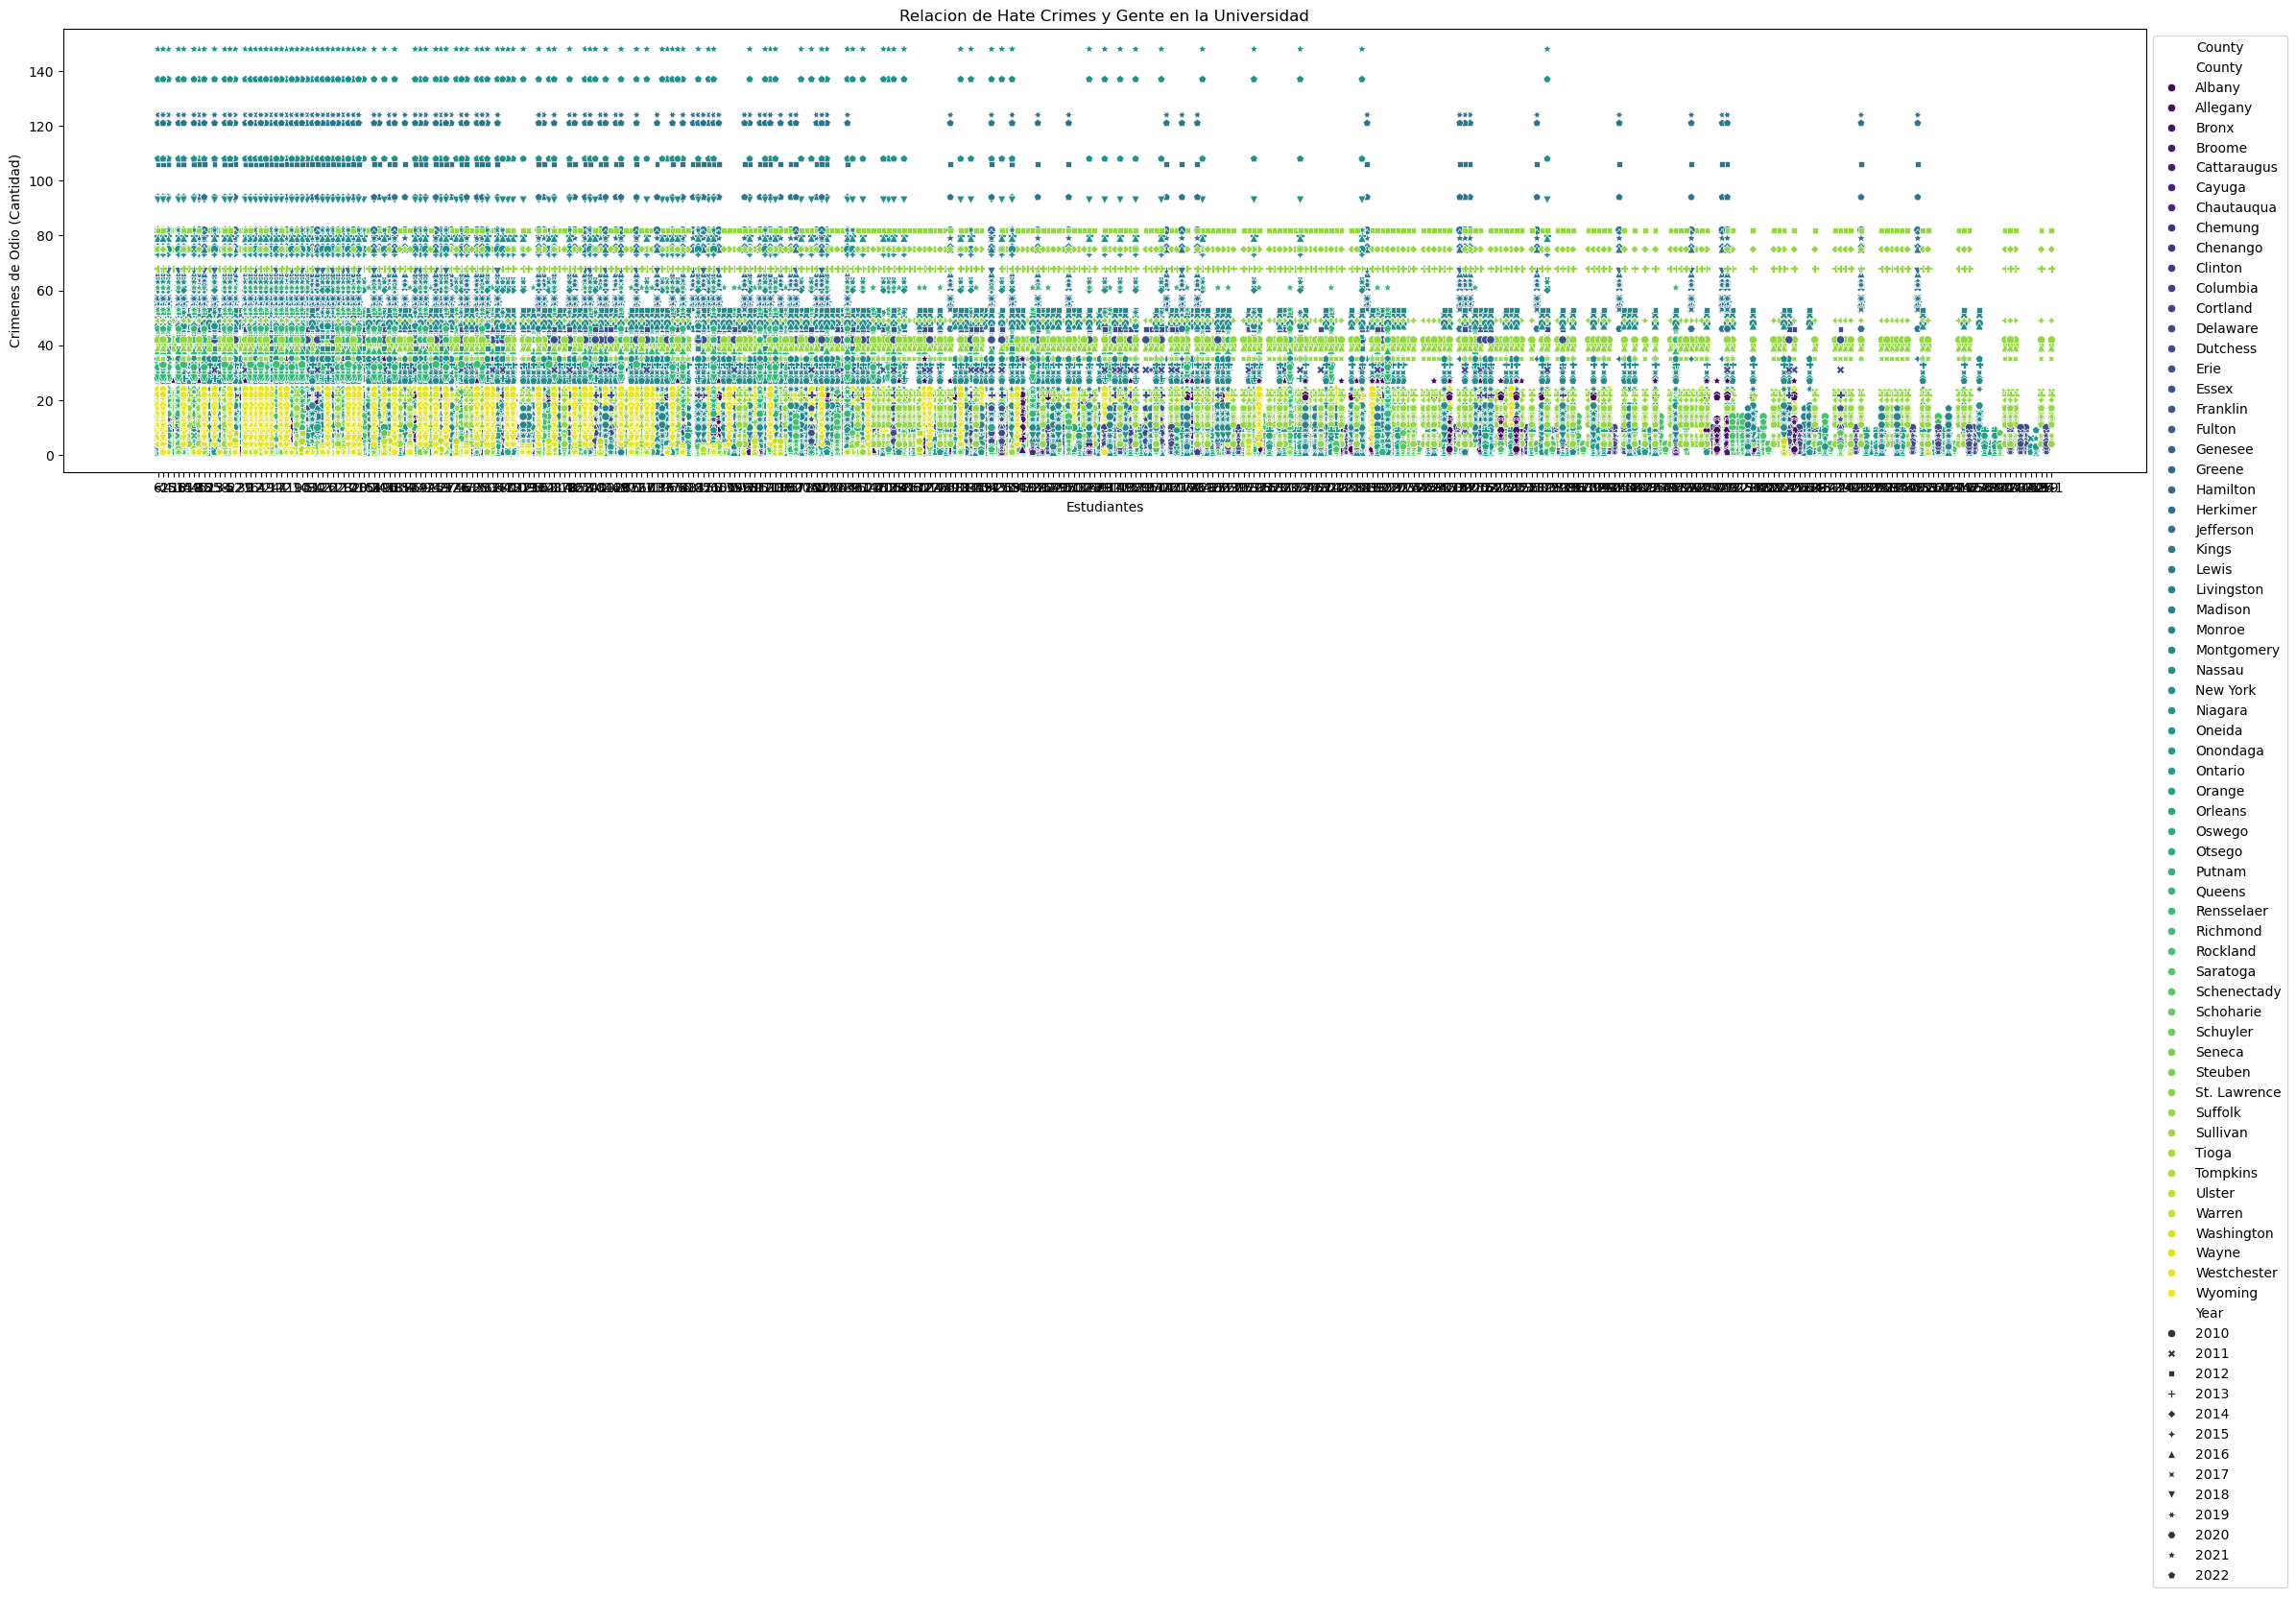

In [5]:
# Empezaremos con la cantidad de estudiantes y hate crimies
import seaborn as sns
import matplotlib.pyplot as plt

relacion_undergraduates_hatecrimes = suny_undergraduates.join(
    hate_crimes, suny_undergraduates["County"] == hate_crimes["County"], "inner"
).select(
    suny_undergraduates["County"],
    suny_undergraduates["Total Attending SUNY Institutions"],
    hate_crimes["Year"],
    hate_crimes["Total Victims"]
).toPandas()

plt.figure(figsize=(28, 6))
sns.scatterplot(
    data = relacion_undergraduates_hatecrimes,
    x="Total Attending SUNY Institutions",
    y="Total Victims",
    hue="County",
    style="Year",
    palette="viridis"
)
plt.title("Relacion de Hate Crimes y Gente en la Universidad")
plt.xlabel("Estudiantes")
plt.ylabel("Crimenes de Odio (Cantidad)")
plt.legend(title='County', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

In [6]:
suny_headcount_path = "Datasets/Headcount_Enrollment_by_Student_Level_and_Student_Load_by_Institutions_of_the_State_University_of_New_York__Beginning_Fall_2011_20241201.csv"

suny_headcount = spark.read.csv(suny_headcount_path, header=True, inferSchema=True)

suny_headcount.show(5)
suny_headcount.printSchema()

+----+----+---------------------------+---------------------------+-----------------------+-----------------------+------------------+------------------+
|Year|Term|College or Institution Type|College or Institution Name|Undergraduate Full-Time|Undergraduate Part-Time|Graduate Full-Time|Graduate Part-Time|
+----+----+---------------------------+---------------------------+-----------------------+-----------------------+------------------+------------------+
|2021|Fall|                 SUNY Total|                       null|                 222560|                 103450|             27159|             16945|
|2020|Fall|                 SUNY Total|                       null|                 241742|                 109147|             25614|             17717|
|2019|Fall|                 SUNY Total|                       null|                 259869|                 113079|             25436|             17188|
|2018|Fall|                 SUNY Total|                       null|         

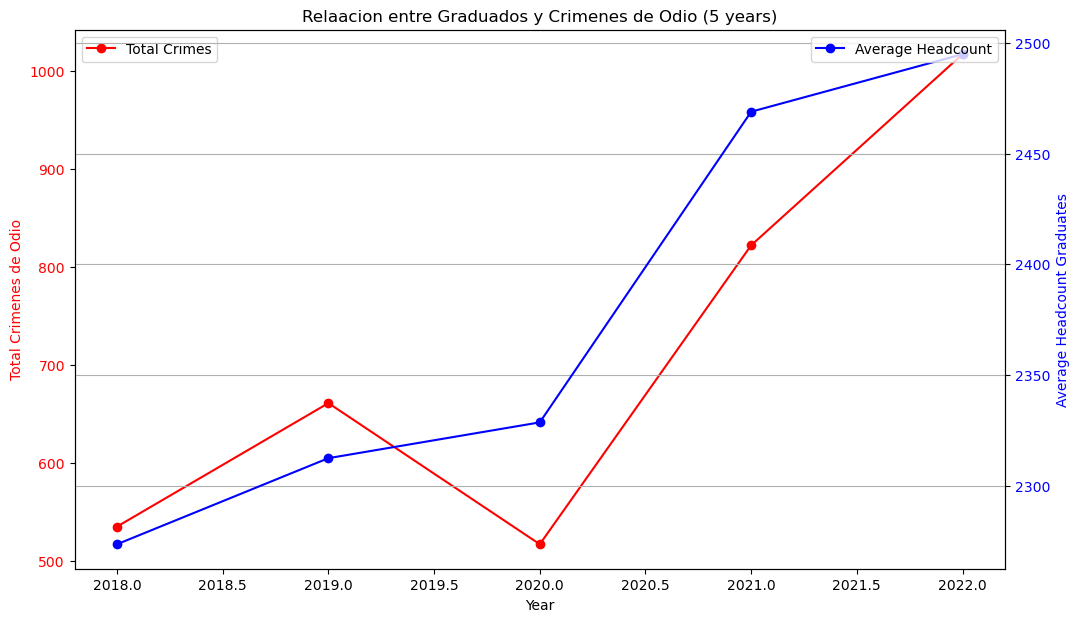

In [ ]:
# Sacaremos los datos de los ultimos 5 years

last_five_years = (
    hate_crimes.select("Year")
    .distinct()
    .orderBy("Year", ascending=False)
    .limit(5)
    .rdd.flatMap(lambda x: x)
    .collect()
)

annual_data = []

for year in last_five_years:
    total_crimes = (
        hate_crimes.filter(hate_crimes["Year"]== year)
        .select("Total Victims")
        .groupBy()
        .sum()
        .collect()[0][0]
    )

    avg_headcount = (
        suny_headcount.filter(suny_headcount["Year"] == year)
        .select("Graduate Full-Time")
        .groupBy()
        .avg()
        .collect()[0][0]
    )

    annual_data.append(
        {"Year": year, "Total Crimes": total_crimes, "Average Headcount" : avg_headcount}
    )

df_annual = pd.DataFrame(annual_data)

fig, axl = plt.subplots(figsize=(12, 7))

axl.plot(
    df_annual["Year"],
    df_annual["Total Crimes"],
    color = "red",
    marker = 'o',
    label = "Total Crimes"
)

axl.set_ylabel("Total Crimenes de Odio", color="red")
axl.tick_params(axis ="y", labelcolor="red")
# Este comentario es un easter egg, si lo encuentras significa que me quiero matar :)))))

ax2 = axl.twinx()
ax2.plot(
    df_annual["Year"],
    df_annual["Average Headcount"],
    color="blue",
    marker="o",
    label="Average Headcount",
)
ax2.set_ylabel("Average Headcount Graduates", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("Relaacion entre Graduados y Crimenes de Odio (5 years)")
axl.set_xlabel("Year")
axl.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.grid()

plt.show()

In [108]:
spark.stop()

---
### Porque se parece tanto la cantidad de gente con estudios y los crimenes de odio???

Implementemos machine learning o algo idk

In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [2]:
spark = SparkSession.builder.appName("Suicide Prediction") \
.config("spark.local.dir", "/home/farion/Documents/ADML/tmp") \
.config("spark.driver.memory", "8g") \
.config("spark.executor.memory", "8g") \
.config("spark.executor.cores", "4") \
.config("spark.sql.shuffle.partitions", "200") \
.getOrCreate()

spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/04 22:58:09 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/12/04 22:58:09 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).


In [3]:
#Primero vamos a crear un csv aca bien bonito para poder usarlo en el modelo
# Cargemos los datasets que usaremos
hate_crimes = spark.read.csv("Datasets/Hate_Crimes_by_County_and_Bias_Type__Beginning_2010_20241030.csv", header=True, inferSchema=True)
sony_headcount = spark.read.csv("Datasets/Headcount_Enrollment_by_Student_Level_and_Student_Load_by_Institutions_of_the_State_University_of_New_York__Beginning_Fall_2011_20241201.csv", header=True, inferSchema=True)
index_crimes = spark.read.csv("Datasets/Index_Crimes_by_County_and_Agency__Beginning_1990_20241030.csv", header=True, inferSchema=True)
censo_empleo = spark.read.csv("Datasets/Quarterly_Census_of_Employment_and_Wages_Annual_Data__Beginning_2000_20241030.csv", header=True, inferSchema=True)
suicides = spark.read.csv("Datasets/Vital_Statistics_Suicide_Deaths_by_Age-Group__Race_Ethnicity__Resident_Region__and_Gender__Beginning_2003_20241030.csv", header=True, inferSchema=True)

In [4]:
hate_crimes.printSchema()
hate_crimes.show(10)
sony_headcount.printSchema()
index_crimes.printSchema()
censo_empleo.printSchema()
suicides.printSchema()

root
 |-- County: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Crime Type: string (nullable = true)
 |-- Anti-Male: integer (nullable = true)
 |-- Anti-Female: integer (nullable = true)
 |-- Anti-Transgender: integer (nullable = true)
 |-- Anti-Gender Non-Conforming: integer (nullable = true)
 |-- Anti-Age*: integer (nullable = true)
 |-- Anti-White: integer (nullable = true)
 |-- Anti-Black: integer (nullable = true)
 |-- Anti-American Indian/Alaskan Native: integer (nullable = true)
 |-- Anti-Asian: integer (nullable = true)
 |-- Anti-Native Hawaiian/Pacific Islander: integer (nullable = true)
 |-- Anti-Multi-Racial Groups: integer (nullable = true)
 |-- Anti-Other Race: integer (nullable = true)
 |-- Anti-Jewish: integer (nullable = true)
 |-- Anti-Catholic: integer (nullable = true)
 |-- Anti-Protestant: integer (nullable = true)
 |-- Anti-Islamic (Muslim): integer (nullable = true)
 |-- Anti-Multi-Religious Groups: integer (nullable = true)
 |-- Anti-Atheism/

24/12/04 22:58:20 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-----------+----+--------------------+---------+-----------+----------------+--------------------------+---------+----------+----------+-----------------------------------+----------+-------------------------------------+------------------------+---------------+-----------+-------------+---------------+---------------------+---------------------------+------------------------+---------------------------------+-------------------+-------------+--------------------------------------------+----------+---------------------+-----------+--------------------+---------+-------------+---------+------------------------------------+------------------+-------------+---------------+--------------------------+-----------------+-------------+------------------------+----------------------+---------------+-------------+---------------+
|     County|Year|          Crime Type|Anti-Male|Anti-Female|Anti-Transgender|Anti-Gender Non-Conforming|Anti-Age*|Anti-White|Anti-Black|Anti-American Indian/Alaskan N

In [5]:
# Vamos a limpiar las columnas que necesitemos para el nuevo ds
# Hate crimes usaremos el year, county y total victims
hate_crimes = hate_crimes.filter(hate_crimes["County"].isNotNull())
hate_crimes = hate_crimes.filter(hate_crimes["Total Victims"].isNotNull())

In [6]:
# En el headcount vamos a usar year, graduate full time
sony_headcount = sony_headcount.filter(sony_headcount["Graduate Full-Time"].isNotNull())

In [7]:
# Sigue index crimes con County, year, index total
index_crimes = index_crimes.filter(index_crimes["Index Total"].isNotNull())

In [8]:
# Censo Empleo usara NAICS Title, Year, Average Employment y Annual Average Salary
censo_empleo = censo_empleo.filter(censo_empleo["NAICS Title"].isNotNull())

In [9]:
# Por ultimo suicides con year, y suicide deaths
suicides = suicides.filter(suicides["Suicide Deaths"].isNotNull())

### Recuerda que debemos verificar que todos sean numeros

In [10]:
# hate_crimes_total = hate_crimes.select("Total Victims").distinct()

# unique_hate_crimes = [row["Total Victims"] for row in hate_crimes_total.collect()]

# for total in sorted(unique_hate_crimes):
#     print(f"- {total}")

# sony_headcount_total = sony_headcount.select("Graduate Full-Time").distinct()

# unique_sony_headcount = [row["Graduate Full-Time"] for row in sony_headcount_total.collect()]

# for total in sorted(unique_sony_headcount):
#     print(f"- {total}")

# index_crimes_total = index_crimes.select("Index Total").distinct()

# unique_index_crimes = [row["Index Total"] for row in index_crimes_total.collect()]

# for total in sorted(unique_index_crimes):
#     print(f"- {total}")

# censo_empleo_total = censo_empleo.select("Annual Average Salary").distinct()

# unique_censo_empleo = [row["Annual Average Salary"] for row in censo_empleo_total.collect()]

# for total in sorted(unique_censo_empleo):
#     print(f"- {total}")

suicides_total = suicides.select("Suicide Deaths").distinct()

unique_suicides = [row["Suicide Deaths"] for row in suicides_total.collect()]

for total in sorted(unique_suicides):
    print(f"- {total}")

- 0
- 1
- 2
- 3
- 4
- 5
- 6
- 7
- 8
- 9
- 10
- 11
- 12
- 13
- 14
- 15
- 16
- 17
- 18
- 19
- 20
- 21
- 22
- 23
- 24
- 25
- 26
- 27
- 28
- 29
- 30
- 31
- 32
- 33
- 34
- 35
- 36
- 37
- 38
- 39
- 40
- 41
- 42
- 43
- 44
- 45
- 46
- 47
- 48
- 49
- 50
- 51
- 52
- 53
- 54
- 55
- 56
- 57
- 58
- 59
- 60
- 62
- 63
- 64
- 65
- 66
- 67
- 68
- 69
- 70
- 71
- 72
- 73
- 75
- 76
- 77
- 78
- 80
- 81
- 82
- 83
- 84
- 85
- 86
- 87
- 89
- 90
- 91
- 94
- 95
- 96
- 97
- 98
- 99
- 100
- 102
- 103
- 105
- 106
- 108
- 109
- 110
- 111
- 115
- 116
- 117
- 118
- 123
- 126
- 128
- 130
- 131
- 132
- 133
- 134
- 135
- 136
- 137
- 138
- 139
- 140
- 145
- 146
- 148
- 149
- 152
- 154
- 155
- 157
- 158
- 159
- 160
- 161
- 162
- 166
- 167
- 169
- 170
- 171
- 172
- 178
- 179
- 180
- 181
- 182
- 185
- 187
- 189
- 193
- 196
- 197
- 198
- 202
- 203
- 205
- 210
- 211
- 214
- 229
- 237
- 245
- 569
- 572
- 626
- 651
- 655
- 660
- 682
- 746
- 762
- 763
- 765
- 770
- 771
- 788
- 803
- 805
- 810


In [11]:
# Se me olvido la population haha salu2
ny_pop = spark.read.csv("Datasets/New_York_State_Population_Data__Beginning_2003_20241030.csv", header=True, inferSchema=True)
ny_pop.show(5)
ny_pop.printSchema()

+----+--------------+---------------------+-----------+------------------+-------------------+--------------------------+-----------+--------------+----------+
|Year|Age Group Code|Age Group Description|Gender Code|Gender Description|Race Ethnicity Code|Race/Ethnicity Description|County Code|   County Name|Population|
+----+--------------+---------------------+-----------+------------------+-------------------+--------------------------+-----------+--------------+----------+
|2003|             0|                Total|          0|             Total|                  0|                     Total|          1|New York State|  19190115|
|2003|             0|                Total|          0|             Total|                  1|        White Non Hispanic|          1|New York State|  11696047|
|2003|             0|                Total|          0|             Total|                  2|        Black Non Hispanic|          1|New York State|   3024588|
|2003|             0|                Tot

In [12]:
censo_empleo = censo_empleo.toDF(*[c.strip().replace(" ", "_") for c in censo_empleo.columns])

In [13]:
# Importante, los nombres de los condados son los mismos? quiza
# Vamos a crear una dataframe de relacion usando los condados para los que cuenten con estos en sus datos (NYPop, Hate Crimes, Index Crimes).
# Luego metermos los totales que usemos de otros como Graduates Full-Time, Year, y asi.
# En conclusion deberia quedar un dataset con las columnas de (Year, County, NYPOP, Total HC Victims, Graduates Full Time, Index Total Crimes,
# NAICS Title, Average Employment, Annual Average Salary, y Suicide Deaths Total)

ny_pop = ny_pop.repartition("County Name", "Year")
hate_crimes = hate_crimes.repartition("County", "Year")
#sony_headcount = sony_headcount.repartition("Year")
index_crimes = index_crimes.repartition("County", "Year")
censo_empleo = censo_empleo.repartition("Year")




r1 = ny_pop.join(
    hate_crimes, (ny_pop["County Name"] == hate_crimes["County"]) & (ny_pop["Year"] == hate_crimes["Year"]), "inner"
).select(
    ny_pop["Year"],
    ny_pop["County Name"],
    ny_pop["Population"],
    hate_crimes["Total Victims"]
)

#r1.show()

r2 = r1.join(
    sony_headcount, r1["Year"] == sony_headcount["Year"], "inner"
).select(
    r1["Year"],
    r1["County Name"],
    r1["Population"],
    r1["Total Victims"],
    sony_headcount["Graduate Full-Time"]
)

#r2.show()

r3 = r2.join(
    index_crimes, (r2["County Name"] == index_crimes["County"]) & (r2["Year"] == index_crimes["Year"]), "inner"
).select(
    r2["Year"],
    r2["County Name"],
    r2["Population"],
    r2["Total Victims"],
    r2["Graduate Full-Time"],
    index_crimes["Index Total"]
)

#r3.show(3000)

# r4 = r3.join(
#     censo_empleo, r3["Year"] == censo_empleo["Year"], "inner"
# ).select(
#     r3["Year"],
#     r3["County Name"],
#     r3["Population"],
#     r3["Total Victims"],
#     r3["Graduate Full-Time"],
#     r3["Index Total"],
#     #censo_empleo["NAICS_Title"],
#     censo_empleo["Average_Employment"],
#     censo_empleo["Annual_Average_Salary"]
# )
r3 = r3.repartition(200)
# #r4.show(30)
# sample_r3 = r3.sample(False, 0.1, seed=42)

# print(sample_r3.count())


In [122]:
# r5 = r4.join(
#     suicides, r4["Year"] == suicides["Year"], "inner"
# ).select(
#     r4["Year"],
#     r4["County Name"],
#     r4["Population"],
#     r4["Total Victims"],
#     r4["Graduate Full-Time"],
#     r4["Index Total"],
#     r4["NAICS_Title"],
#     r4["Average_Employment"],
#     r4["Annual_Average_Salary"],
#     suicides["Suicide Deaths"]
# )

# r5.show(5)

# Year (En Suicides) no funciona owo

In [123]:
# Como no funciona (porque no tiene sentido) meter suicides a las relaciones, vamos a sacar un ratio o promedio de suicidios para manejarlos aparte.
# Creamos las variables que usaremos para esto. (total_suicides_year, total_suicides_sex, total_suicides_race)

In [14]:
total_suicides_year = suicides.groupBy("Year").sum("Suicide Deaths").orderBy("Year")
total_suicides_year.show(5)

total_suicides_sex = suicides.groupBy("Sex").sum("Suicide Deaths").orderBy("Sex")
total_suicides_sex.show(5)

total_suicides_race = suicides.groupBy("Year","Race or Ethnicity").sum("Suicide Deaths").orderBy("Year","Race or Ethnicity")
total_suicides_race.show(5)

race_mapping = {
    "White Non Hispanic": 1,
    "Black Non Hispanic": 2,
    "Other Non Hispanic": 3,
    "Hispanic": 4,
    "Not Stated": 5
}

from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

# Crear un UDF para mapear las razas
map_race_udf = udf(lambda race: race_mapping.get(race, 0), IntegerType())

# Crear una nueva columna Race_ID
total_suicides_race = total_suicides_race.withColumn("Race or Ethnicity", map_race_udf(total_suicides_race["Race or Ethnicity"]))

# Eliminar la columna original y renombrar Race_ID si lo prefieres
total_suicides_race.show()


+----+-------------------+
|Year|sum(Suicide Deaths)|
+----+-------------------+
|2003|               2504|
|2004|               2518|
|2005|               2630|
|2006|               2620|
|2007|               2782|
+----+-------------------+
only showing top 5 rows

+---+-------------------+
|Sex|sum(Suicide Deaths)|
+---+-------------------+
|  F|              13280|
|  M|              44920|
+---+-------------------+

+----+------------------+-------------------+
|Year| Race or Ethnicity|sum(Suicide Deaths)|
+----+------------------+-------------------+
|2003|Black Non Hispanic|                218|
|2003|          Hispanic|                230|
|2003|        Not Stated|                 40|
|2003|Other Non Hispanic|                114|
|2003|White Non Hispanic|               1902|
+----+------------------+-------------------+
only showing top 5 rows

+----+-----------------+-------------------+
|Year|Race or Ethnicity|sum(Suicide Deaths)|
+----+-----------------+-------------------+
|

In [125]:
# Ahora vamos a crear un modelo con r4 para hacer la prediccion.
feature_columns = ["Total Victims", "Population", "Graduate Full-Time"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(r3)#.select("features", "Total Victims")

data = data.sample(False, 0.1, seed=42)

train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

train_data = train_data.repartition(50)

train_data.cache()

rf = RandomForestRegressor(featuresCol="features", labelCol="Total Victims", numTrees=10, maxDepth=5)

model = rf.fit(train_data)

predictions = model.transform(test_data)
evaluator = RegressionEvaluator(labelCol="Total Victims", predictionCol="prediction", metricName="rmse")

rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2_evaluator = RegressionEvaluator(labelCol="Total Victims", predictionCol="prediction", metricName="r2")
r2 = r2_evaluator.evaluate(predictions)
print(f"R2: {r2}")

predictions.select("features", "Total Victims", "prediction").show(10)

Root Mean Squared Error (RMSE): 3.9500593476020307


R2: 0.8872839111062722


+-------------------+-------------+------------------+
|           features|Total Victims|        prediction|
+-------------------+-------------+------------------+
|   [7.0,63.0,102.0]|            7| 4.477035800536019|
| [7.0,168.0,6048.0]|            7|  4.66595767568651|
| [7.0,275.0,3447.0]|            7| 5.293594038389253|
|  [3.0,284.0,102.0]|            3|2.3568083299946023|
|   [7.0,447.0,86.0]|            7| 4.705350650815632|
| [7.0,543.0,2117.0]|            7| 4.865541831694956|
|  [3.0,846.0,370.0]|            3| 3.341666283204127|
|[3.0,917.0,19641.0]|            3|3.2997755830398816|
|  [3.0,971.0,315.0]|            3|3.2997755830398816|
|  [7.0,1091.0,71.0]|            7| 5.552101387033472|
+-------------------+-------------+------------------+
only showing top 10 rows



In [126]:
# Vengo del futuro y vine a pasar esto a un csv despues de los dos modelos.
predictions.toPandas().to_csv("predictions_hatecrimes.csv", index=False)

In [127]:
# # EL mismo codigo para ver las diferencias con todo el dataset en vez de solo un 1%
# feature_columns = ["Total Victims", "Population", "Graduate Full-Time"]
# assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
# data = assembler.transform(r3)#.select("features", "Total Victims")

# #data = data.sample(False, 0.1, seed=42)

# train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# train_data = train_data.repartition(200)

# train_data.cache()

# rf = RandomForestRegressor(featuresCol="features", labelCol="Total Victims", numTrees=10, maxDepth=5)

# model = rf.fit(train_data)

# predictions = model.transform(test_data)
# evaluator = RegressionEvaluator(labelCol="Total Victims", predictionCol="prediction", metricName="rmse")

# rmse = evaluator.evaluate(predictions)
# print(f"Root Mean Squared Error (RMSE): {rmse}")

# r2_evaluator = RegressionEvaluator(labelCol="Total Victims", predictionCol="prediction", metricName="r2")
# r2 = r2_evaluator.evaluate(predictions)
# print(f"R2: {r2}")

# predictions.select("features", "Total Victims", "prediction").show(10)

In [15]:
r3_with_suicides = r3.join(
    total_suicides_year, "Year", "left"
).select(
    r3["*"],  # Todas las columnas de r3
    total_suicides_year["sum(Suicide Deaths)"].alias("Total_Suicides_Year")
)

r3_with_suicides.show()


+----+-----------+----------+-------------+------------------+-----------+-------------------+
|Year|County Name|Population|Total Victims|Graduate Full-Time|Index Total|Total_Suicides_Year|
+----+-----------+----------+-------------+------------------+-----------+-------------------+
|2021|Westchester|      6467|           11|               431|        785|               3292|
|2016|Westchester|    502748|           13|               400|       1352|               3334|
|2020|       Erie|       266|            8|               129|        447|               3252|
|2012|     Ulster|       103|            1|               116|        158|               3320|
|2017|     Oneida|       460|            1|             21569|         10|               3354|
|2020|     Nassau|     80962|           18|               225|         31|               3252|
|2017|   Rockland|      2918|            4|              2108|       3441|               3354|
|2014|     Nassau|       960|           28|       

In [16]:
from pyspark.sql.functions import lit

# Calcular proporción de suicidios por sexo (opcional)
total_suicides_sex = total_suicides_sex.withColumn(
    "Proportion_Sex", 
    total_suicides_sex["sum(Suicide Deaths)"] / total_suicides_sex.selectExpr("SUM(`sum(Suicide Deaths)`)").first()[0]
)

# Agregar un campo global al dataset r3 para análisis posteriores
r3_with_sex_stats = r3.withColumn("Sex_Stats", lit("Global Analysis"))
total_suicides_sex.show()


+---+-------------------+------------------+
|Sex|sum(Suicide Deaths)|    Proportion_Sex|
+---+-------------------+------------------+
|  F|              13280|0.2281786941580756|
|  M|              44920|0.7718213058419244|
+---+-------------------+------------------+



In [17]:
# Calcular proporción de suicidios por raza o etnicidad
total_suicides_race = total_suicides_race.withColumn(
    "Proportion_Race", 
    total_suicides_race["sum(Suicide Deaths)"] / total_suicides_race.selectExpr("SUM(`sum(Suicide Deaths)`)").first()[0]
)

total_suicides_race.show()


+----+-----------------+-------------------+--------------------+
|Year|Race or Ethnicity|sum(Suicide Deaths)|     Proportion_Race|
+----+-----------------+-------------------+--------------------+
|2003|                2|                218|0.003745704467353952|
|2003|                4|                230|0.003951890034364261|
|2003|                5|                 40|6.872852233676976E-4|
|2003|                3|                114|0.001958762886597938|
|2003|                1|               1902| 0.03268041237113402|
|2004|                2|                266|0.004570446735395189|
|2004|                4|                242|0.004158075601374571|
|2004|                5|                 16| 2.74914089347079E-4|
|2004|                3|                122|0.002096219931271...|
|2004|                1|               1872| 0.03216494845360825|
|2005|                2|                216|0.003711340206185567|
|2005|                4|                216|0.003711340206185567|
|2005|    

In [18]:
# Calcular promedio anual de suicidios
average_suicides_per_year = total_suicides_year.selectExpr("AVG(`sum(Suicide Deaths)`)").first()[0]

# Agregarlo a cada fila de r3 como contexto
r3_with_average_suicides = r3.withColumn("Average_Suicides_Year", lit(average_suicides_per_year))
r3_with_average_suicides.show()


+----+-----------+----------+-------------+------------------+-----------+---------------------+
|Year|County Name|Population|Total Victims|Graduate Full-Time|Index Total|Average_Suicides_Year|
+----+-----------+----------+-------------+------------------+-----------+---------------------+
|2021|Westchester|      6467|           11|               431|        785|    3063.157894736842|
|2016|Westchester|    502748|           13|               400|       1352|    3063.157894736842|
|2020|       Erie|       266|            8|               129|        447|    3063.157894736842|
|2012|     Ulster|       103|            1|               116|        158|    3063.157894736842|
|2017|     Oneida|       460|            1|             21569|         10|    3063.157894736842|
|2020|     Nassau|     80962|           18|               225|         31|    3063.157894736842|
|2017|   Rockland|      2918|            4|              2108|       3441|    3063.157894736842|
|2014|     Nassau|       960| 

In [19]:
from pyspark.sql.functions import col, max, min

# Normalizar suicidios por año
max_suicides = total_suicides_year.select(max("sum(Suicide Deaths)")).first()[0]
min_suicides = total_suicides_year.select(min("sum(Suicide Deaths)")).first()[0]

total_suicides_year = total_suicides_year.withColumn(
    "Normalized_Suicides_Year",
    (col("sum(Suicide Deaths)") - min_suicides) / (max_suicides - min_suicides)
)

# Unir normalizados con r3
r3_with_normalized_suicides = r3.join(
    total_suicides_year.select("Year", "Normalized_Suicides_Year"),
    "Year",
    "left"
)

r3_with_normalized_suicides.show()


+----+-----------+----------+-------------+------------------+-----------+------------------------+
|Year|County Name|Population|Total Victims|Graduate Full-Time|Index Total|Normalized_Suicides_Year|
+----+-----------+----------+-------------+------------------+-----------+------------------------+
|2021|Westchester|      6467|           11|               431|        785|      0.8640350877192983|
|2016|Westchester|    502748|           13|               400|       1352|      0.9100877192982456|
|2020|       Erie|       266|            8|               129|        447|      0.8201754385964912|
|2012|     Ulster|       103|            1|               116|        158|      0.8947368421052632|
|2017|     Oneida|       460|            1|             21569|         10|      0.9320175438596491|
|2020|     Nassau|     80962|           18|               225|         31|      0.8201754385964912|
|2017|   Rockland|      2918|            4|              2108|       3441|      0.9320175438596491|


In [20]:
from pyspark.sql.functions import col

# Combinar Total Victims con suicidios por raza
r3_with_suicides = r3.join(
    total_suicides_race, 
    r3["Year"] == total_suicides_race["Year"],  # Combinar por Año
    "inner"
).select(
    r3["Year"],
    r3["Population"],
    r3["Total Victims"],
    total_suicides_race["Race or Ethnicity"],
    total_suicides_race["sum(Suicide Deaths)"].alias("Suicide_Deaths")
)

r3_with_suicides.show()


+----+----------+-------------+-----------------+--------------+
|Year|Population|Total Victims|Race or Ethnicity|Suicide_Deaths|
+----+----------+-------------+-----------------+--------------+
|2013|      2699|            5|                5|            64|
|2013|      2699|            5|                1|          2480|
|2013|      2699|            5|                2|           236|
|2013|      2699|            5|                3|           172|
|2013|      2699|            5|                4|           322|
|2013|      2699|            5|                5|            64|
|2013|      2699|            5|                1|          2480|
|2013|      2699|            5|                2|           236|
|2013|      2699|            5|                3|           172|
|2013|      2699|            5|                4|           322|
|2013|      2699|            5|                5|            64|
|2013|      2699|            5|                1|          2480|
|2013|      2699|        

In [21]:
unique_races = total_suicides_race.select("Race or Ethnicity").distinct()
unique_races.show(truncate=False)

+-----------------+
|Race or Ethnicity|
+-----------------+
|1                |
|3                |
|5                |
|4                |
|2                |
+-----------------+



In [22]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Crear las columnas de características
feature_columns = ["Race or Ethnicity", "Total Victims", "Suicide_Deaths"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Transformar los datos
data = assembler.transform(r3_with_suicides)#.select("features", "Suicide_Deaths")
data = data.sample(False, 0.1, seed=42)  # Reducir para pruebas rápidas

# Dividir datos en entrenamiento y prueba
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Definir el modelo
rf = RandomForestRegressor(featuresCol="features", labelCol="Suicide_Deaths", numTrees=20, maxDepth=5)

# Entrenar el modelo
model = rf.fit(train_data)

# Hacer predicciones
predictions = model.transform(test_data)

# Evaluar el modelo
evaluator = RegressionEvaluator(labelCol="Suicide_Deaths", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2_evaluator = RegressionEvaluator(labelCol="Suicide_Deaths", predictionCol="prediction", metricName="r2")
r2 = r2_evaluator.evaluate(predictions)
print(f"R2: {r2}")

predictions.select("features", "Race or Ethnicity", "prediction").show(10)


Root Mean Squared Error (RMSE): 24.4896381153624


R2: 0.9992773143867928


+----------------+-----------------+------------------+
|        features|Race or Ethnicity|        prediction|
+----------------+-----------------+------------------+
| [3.0,1.0,180.0]|                3|217.13045689383247|
|  [5.0,1.0,22.0]|                5| 45.21190296140465|
|[1.0,1.0,2466.0]|                1|2491.1935400752873|
|[1.0,1.0,2466.0]|                1|2491.1935400752873|
| [3.0,1.0,180.0]|                3|217.13045689383247|
|  [5.0,1.0,22.0]|                5| 45.21190296140465|
|  [5.0,1.0,22.0]|                5| 45.21190296140465|
| [2.0,3.0,246.0]|                2|238.66582912764838|
|[1.0,4.0,2466.0]|                1| 2492.256277180987|
| [3.0,1.0,180.0]|                3|217.13045689383247|
+----------------+-----------------+------------------+
only showing top 10 rows



In [23]:
predictions.toPandas().to_csv("predictions_suicides.csv", index=False)

Ahora que contamos con ambos modelos predictivos sobre si la educacion afecta a los crimenes de odio y si los crimenes de odio afectan a los suicidios, podemos sacar conclusiones con esto y mostrarlo con cualquier herramienta, primeramente matplotlib.
Asi que lo primero sera pasarlo a un csv.

### predictions.toPandas().to_csv("predictions_suicides.csv", index=False)
### F U N  F A C T

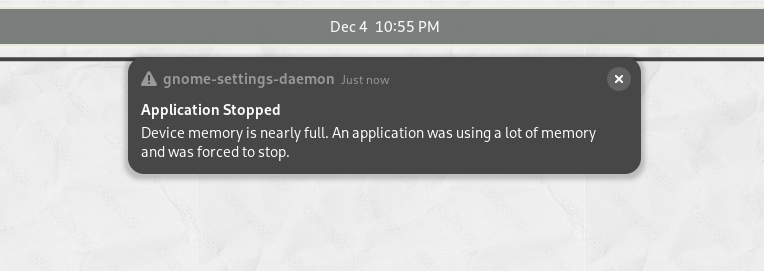

Aparentemente guardar ese csv se acabo mis 16 gb de RAM que tuve que incluir 8 gb de swap memory EXTRA para que funcionara

In [24]:
# Pero ahora podemos graficar uwuwuwuwuwu
# Primero importar csv

prediction_hatecrimes = spark.read.csv("predictions_hatecrimes.csv", header=True, inferSchema=True)
prediction_suicides = spark.read.csv("predictions_suicides.csv", header=True, inferSchema=True)

prediction_hatecrimes.show(10)
prediction_hatecrimes.printSchema()

prediction_suicides.show(10)
prediction_suicides.printSchema()

+----+-----------+----------+-------------+------------------+-----------+-------------------+------------------+
|Year|County Name|Population|Total Victims|Graduate Full-Time|Index Total|           features|        prediction|
+----+-----------+----------+-------------+------------------+-----------+-------------------+------------------+
|2011|     Albany|        63|            7|               102|         10|   [7.0,63.0,102.0]| 4.477035800536019|
|2011|     Albany|       168|            7|              6048|        251| [7.0,168.0,6048.0]|  4.66595767568651|
|2011|     Albany|       275|            7|              3447|         68| [7.0,275.0,3447.0]| 5.293594038389253|
|2011|     Albany|       284|            3|               102|        540|  [3.0,284.0,102.0]|2.3568083299946023|
|2011|     Albany|       447|            7|                86|         68|   [7.0,447.0,86.0]| 4.705350650815632|
|2011|     Albany|       543|            7|              2117|         68| [7.0,543.0,21

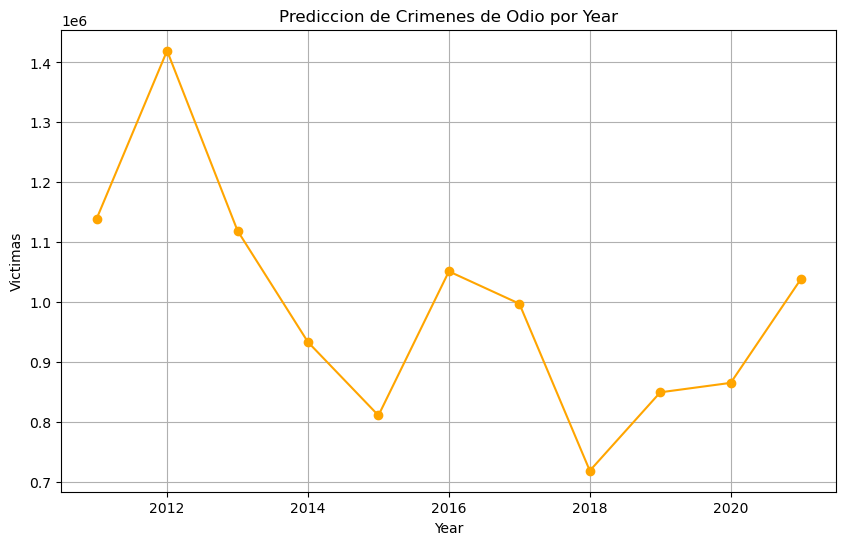

In [25]:
#Olvide importar cosas otra vez hahasalu2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Ahora pongamos una grafica
prediction_hatecrimes_year = prediction_hatecrimes.groupBy("Year").sum("prediction").orderBy("Year").toPandas()

plt.figure(figsize=(10,6))
plt.plot(prediction_hatecrimes_year["Year"], prediction_hatecrimes_year["sum(prediction)"], marker='o', color='orange')
plt.title("Prediccion de Crimenes de Odio por Year")
plt.xlabel("Year")
plt.ylabel("Victimas")
plt.grid()
plt.show()

##  SE PREGUNTARAN QUE SIGNIFICA ESTA GRAFICA???

Realmente es muy bueno lo que salio. Dejen les explico.

Que hicimos?
- Primero agarramos el dataset original de crimenes de odio
- Luego lo mezclamos con otros datasets para ver si influian en algo
- Despues creamos un modelo que hiciera una prediccion de las victimas de crimenes de odio utilizando los valores anteriores.
- Y Finalmente remplazamos el valor de crimenes de odio (victimas) y lo remplazamos por la prediccion.

Que implica? Si se parece la grafica es porque los valores que conseguimos de prediccion tienen sentido y si hay relacion entre los factores que escogimos para los crimenes de odio.

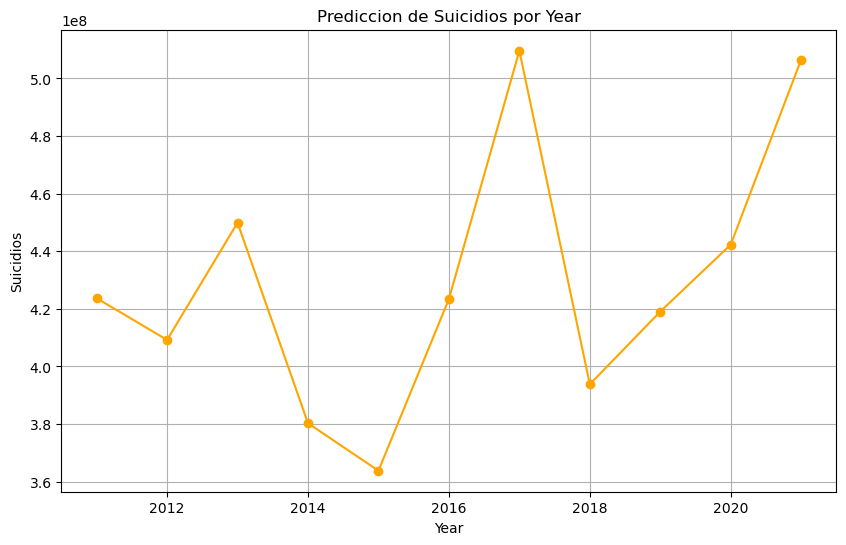

In [26]:
# Ahora probemos con suicidios.
prediction_suicides_year = prediction_suicides.groupBy("Year").sum("prediction").orderBy("Year").toPandas()

plt.figure(figsize=(10,6))
plt.plot(prediction_suicides_year["Year"], prediction_suicides_year["sum(prediction)"], marker='o', color='orange')
plt.title("Prediccion de Suicidios por Year")
plt.xlabel("Year")
plt.ylabel("Suicidios")
plt.grid()
plt.show()


### WOOOPS

Como pueden ver esta grafica no se parece nada en lo absoluto. Pero esto es porque los valores que agarramos para esta grafica son muy diferentes a los que teniamos originalmente. 
La grafica original solo mostraba la cantidad de suicidios.
Esta grafica tiene los valores de suicidios POR RAZA, osea que los valores de esta grafica implican la cantidad de suicidios que hay dependiendo de los crimenes de odio.

Ahora, relacionado a las razas, que pudo ocasionar un pico tan grande? 
Esto solo es una hipotesis inicial pero en 2017 se empezo a presenciar una gran tendendencia en el declive de la salud mental de las personas por los movimientos de #Black Lives Matter y por los suicidos de varias personas famosas (Como Chester Bennington).

Que no se nos olvide que lo que estamos viendo es un suicide rate, no la cantidad de personas. 

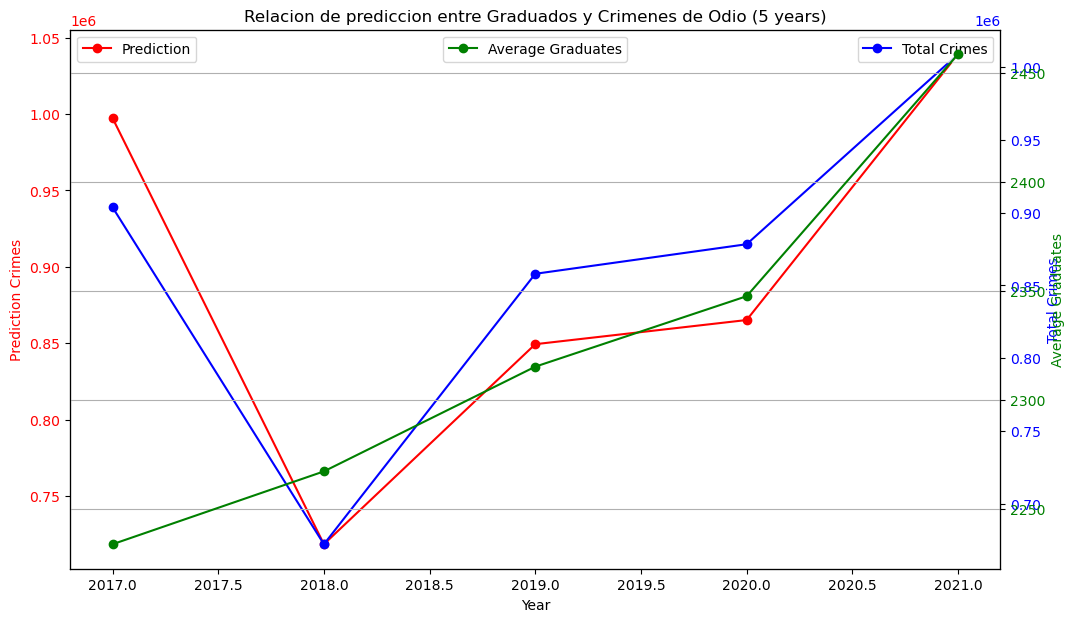

In [30]:
# Veamos una grafica diferente que muestre las relacaiones.
last_five_years = (
    prediction_hatecrimes.select("Year")
    .distinct()
    .orderBy("Year", ascending=False)
    .limit(5)
    .rdd.flatMap(lambda x: x)
    .collect()
)

annual_data = []

for year in last_five_years:
    total_crimes_prediction = (
        prediction_hatecrimes.filter(prediction_hatecrimes["Year"]== year)
        .select("prediction")
        .groupBy()
        .sum()
        .collect()[0][0]
    )

    total_crimes = (
        prediction_hatecrimes.filter(prediction_hatecrimes["Year"]== year)
        .select("Total Victims")
        .groupBy()
        .sum()
        .collect()[0][0]
    )
    
    avg_graduates = (
        prediction_hatecrimes.filter(prediction_hatecrimes["Year"] == year)
        .select("Graduate Full-Time")
        .groupBy()
        .avg()
        .collect()[0][0]
    )

    annual_data.append(
        {"Year": year, "Total Crimes Prediction": total_crimes_prediction, "Total Crimes" : total_crimes, "Average Graduates" : avg_graduates}
    )

df_annual = pd.DataFrame(annual_data)

fig, ax1 = plt.subplots(figsize=(12, 7))

ax1.plot(
    df_annual["Year"],
    df_annual["Total Crimes Prediction"],
    color = "red",
    marker = 'o',
    label = "Prediction"
)

ax1.set_ylabel("Prediction Crimes", color="red")
ax1.tick_params(axis="y", labelcolor="red")


ax2 = ax1.twinx()
ax2.plot(
    df_annual["Year"],
    df_annual["Total Crimes"],
    color="blue",
    marker="o",
    label="Total Crimes",
)


ax2.set_ylabel("Total Crimes", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

ax3 = ax1.twinx()
ax3.plot(
    df_annual["Year"],
    df_annual["Average Graduates"],
    color="green",
    marker="o",
    label="Average Graduates",
)
ax3.set_ylabel("Average Graduates", color="green")
ax3.tick_params(axis="y", labelcolor="green")

plt.title("Relacion de prediccion entre Graduados y Crimenes de Odio (5 years)")
ax1.set_xlabel("Year")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
ax3.legend(loc="upper center")
plt.grid()

plt.show()


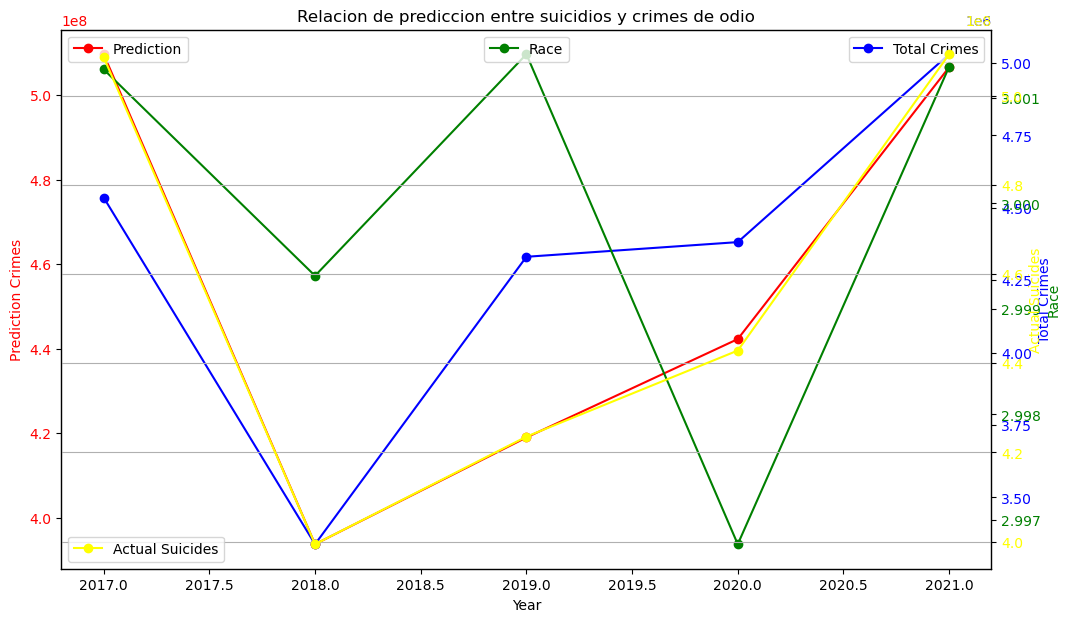

In [33]:
# Veamos una grafica diferente que muestre las relacaiones.
last_five_years = (
    prediction_suicides.select("Year")
    .distinct()
    .orderBy("Year", ascending=False)
    .limit(5)
    .rdd.flatMap(lambda x: x)
    .collect()
)

annual_data = []

for year in last_five_years:
    suicides_prediction = (
        prediction_suicides.filter(prediction_suicides["Year"]== year)
        .select("prediction")
        .groupBy()
        .sum()
        .collect()[0][0]
    )

    actual_suicides = (
        prediction_suicides.filter(prediction_suicides["Year"]== year)
        .select("Suicide_Deaths")
        .groupBy()
        .sum()
        .collect()[0][0]
    )

    total_crimes = (
        prediction_suicides.filter(prediction_suicides["Year"]== year)
        .select("Total Victims")
        .groupBy()
        .sum()
        .collect()[0][0]
    )
    
    races = (
        prediction_suicides.filter(prediction_suicides["Year"] == year)
        .select("Race or Ethnicity")
        .groupBy()
        .avg()
        .collect()[0][0]
    )

    annual_data.append(
        {"Year": year, "Suicide Prediction": suicides_prediction, "Actual Suicides" : actual_suicides, "Total Crimes" : total_crimes, "Race or Ethnicity" : races}
    )

df_annual = pd.DataFrame(annual_data)

fig, ax1 = plt.subplots(figsize=(12, 7))

ax1.plot(
    df_annual["Year"],
    df_annual["Suicide Prediction"],
    color = "red",
    marker = 'o',
    label = "Prediction"
)

ax1.set_ylabel("Prediction Crimes", color="red")
ax1.tick_params(axis="y", labelcolor="red")


ax2 = ax1.twinx()
ax2.plot(
    df_annual["Year"],
    df_annual["Total Crimes"],
    color="blue",
    marker="o",
    label="Total Crimes",
)


ax2.set_ylabel("Total Crimes", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

ax3 = ax1.twinx()
ax3.plot(
    df_annual["Year"],
    df_annual["Race or Ethnicity"],
    color="green",
    marker="o",
    label="Race",
)
ax3.set_ylabel("Race", color="green")
ax3.tick_params(axis="y", labelcolor="green")

ax4 = ax1.twinx()
ax4.plot(
    df_annual["Year"],
    df_annual["Actual Suicides"],
    color="yellow",
    marker="o",
    label="Actual Suicides",
)
ax4.set_ylabel("Actual Suicides", color="yellow")
ax4.tick_params(axis="y", labelcolor="yellow")

plt.title("Relacion de prediccion entre suicidios y crimes de odio")
ax1.set_xlabel("Year")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
ax3.legend(loc="upper center")
ax4.legend(loc="best")
plt.grid()

plt.show()


### Aqui podemos apreciar mejor las relaciones.

# **Fin del Proyecto**

Aqui acaba lo que vendria siendo este proyecto de ADML sobre las relaciones que tienen diferentes factores con los crimenes de odio y los suicidios.
A partir de ahora tendremos una detallada explicacion de todo el proyecto, con sus conclusiones y resultados.

## **Introduccion**
---
Dentro de esta libreta, se pueden encontrar bastantes, bastantes y bastantes mas lineas de codigo en donde se puede apreciar el proceso de aprendizaje que tuvimos como equipo durante todo el semestre. Iniciando con la busqueda de datasets, pasando por los procesos de limpieza y analisis y terminando por el uso de spark y machine learning.

Nuestro objetivo originalmente era agarrar bastantes datasets con miles y diezmiles datos diferentes para ver si podiamos encontrar una relacion entre ellos.
Al principio teniamos varias ideas, ya sea sobre la educacion, sobre como los salarios afectaban ciertas comunidades, el como los crimenes se pueden ver afectados por diferentes factores, etc.
Finalmente tomamos la decision de concentrarnos en dos conclusiones. Los crimenes de odio, y los suicidios que podrian generar estos.

Veran, durante todo el proyecto nuestro plan era mayormente ver como los salarios, los indices de trabajo o los impuestos afectaban en esto, pero mas adeltante les explicaremos porque no se pudo cumplir con eso.

Ahora, vamos a pasar por todo el proceso de la libreta para explicar el porque o como fue que hicimos lo que hicimos.

## **Parte 1. Limpieza de Datos**
---
Lo primero que hicimos fue escoger los datasets que usariamos durante todo el proyecto. Desde un inicio tomamos la decision de agarrar multiples datasets en vez de solo uno complicado debido a las oportunidades que puede presentar esto. 
Gracias a esta decision, tuvimos que plantear desde el principio que era lo que ibamos a hacer como equipo.
Primero era limpiar los datos, despues seria ver que conclusiones podriamos sacar con estos, y finalmente implementar algun algoritmo de Machine Learning para probar nuestras teorias.

Inicialmente cargamos los datasets usando pandas debido a que eso era lo que sabiamos hacer. Esto originalmente parecia sencillo pero despues de conocer Spark nos dimos cuenta de las facilidades que incluia este ultimo. Pero por ahora solo era cargar datos, mostrar las tablas y ver que cosas teniamos que modificar para poder manejarlo.

Se utilizo mucho el concepto de DataFrame para manejar todos los datos, principalmente para poder limpiarlos haciendo uso de la funcion .map()
Se veia el dataset, se escogia una columna, se veian los valores unicos y finalmente se creaba el diccionario para el mapeo.

Al llegar al DataFrame de salarios nos encontramos un problema que decidio el camino del proyecto, muchas de las columnas que teniamos eran inutiles o redundantes, o eso pensamos al menos.
Cuando llegamos a 'Title Name' vimos como la columna describia todos los 4700+ nombres de los empleos que podias encontrar en el estado, esto ocasiono muchos problemas debido a la dificultad que era mapearlo y hasta la fecha el diccionario que se creo para poder cumplir esto mide mas de la mitad del proyecto.

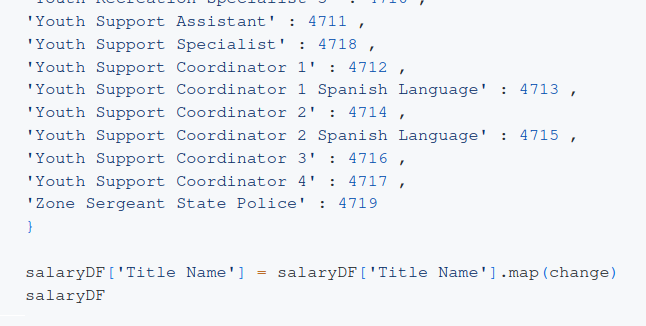

Pensamos en que muchas de las columnas podian ser ignoradas, o que podriamos escoger mejor solo las columnas que podriamos necesitar y de ahi implementar lo demas.

## **Parte 2. Spark**
---
Despues de considerar cambiar completamente de proyecto, intentar con otras cosas y regresar a este, decidimos implementar todo el proyecto con Spark. 
Primero, que es Spark?
- Spark es una herrameinta creada por Apache para el procesamiento de datos a gran escala. 

Y o dios no sabiamos que lo ibamos a necesitar.

Nuestra aventura con spark inicio facil, se creaba una SparkSession, se escogia un dataset y experimentabamos que era lo que se podia utilizar.
De lo que mas hicimos uso fue del Schema que este incluia
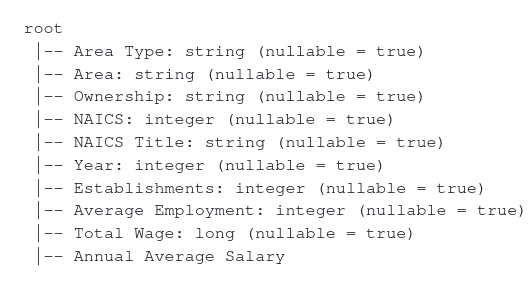
El poder ver la informacion del dataset de esta manera fue completamente una bendicion debido a que podiamos escoger que teniamos que limpiar y como.
Pero en general empezabamos a ver todo lo que podiamos lograr. Usabamos las herramientas de sql para crear nuevos dataframes, los modificabamos al gusto, principalmente por 'Year' y nos ayudaba a ver que conclusiones podiamos sacar.

Durante un momento pensamos que podiamos implementar geopy para poder visualizar los datos en mapas de una forma agradable y estetica pero esto se vio como un problema muy grande debido al como estaban organizados los datasets y el como las librerias necesarias eran incompatibles unas con otras.

Por siguiente empezamos a hacer uso de matplotlib para ver la informacion que necesitabamos y poder probar nuestras hipotesis.
Al principio se vieron muchas ideas de graficas que podiamos utilizar para mostrar lo necesario pero nuestros datos eran bastante "stream lined"
Y seguimos experimentand con los salarios. Ya sea en promedios, en totales, por condado, por area, industria, relaciones, etc.

Pero al momento de llegar a los crimenes totales, decidimos usar graficos mas sencillos para mostrar las relaciones.

Y despues de muchoo tiempo conseguimos nuestra primera conclusion. 

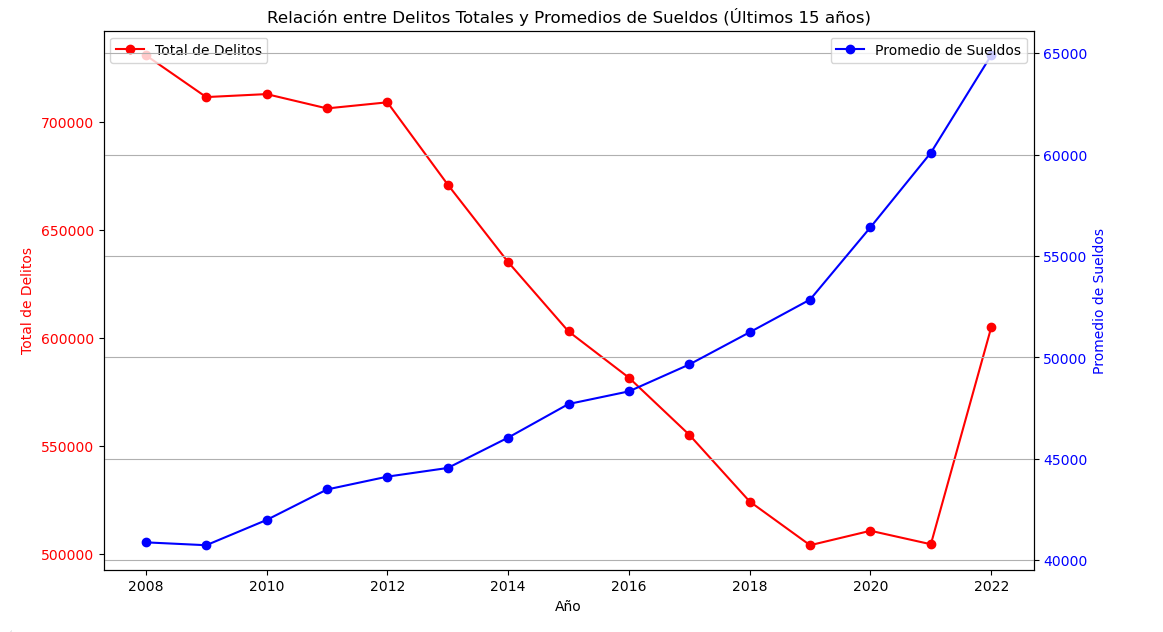

"Relacion entre Delitos Totales y Promedios de Sueldos"

Nos dimos cuenta el como los delitos eran directamente proporcionales a los sueldos que se encontraban en el estado. 
Mientras mas sueldo existia, menos delitos habia. 
Originalmente esto era nuestra idea debido a que teniamos en la mente la hipotesis de que la gente no tenia que cometer delitos si podian tener una buena vida. Esto se pudo demostrar de una forma muy cruda con la grafica creada.

Despues empezamos a experimentar mas con los otros datasets que teniamos, hate crimes y suicides.
Se utilizaron los mismos metodos para las tablas y sus relaciones.
Al principio se intento probar si la educacion tenia algo que ver con los crimenes de odio que las personas generaban.

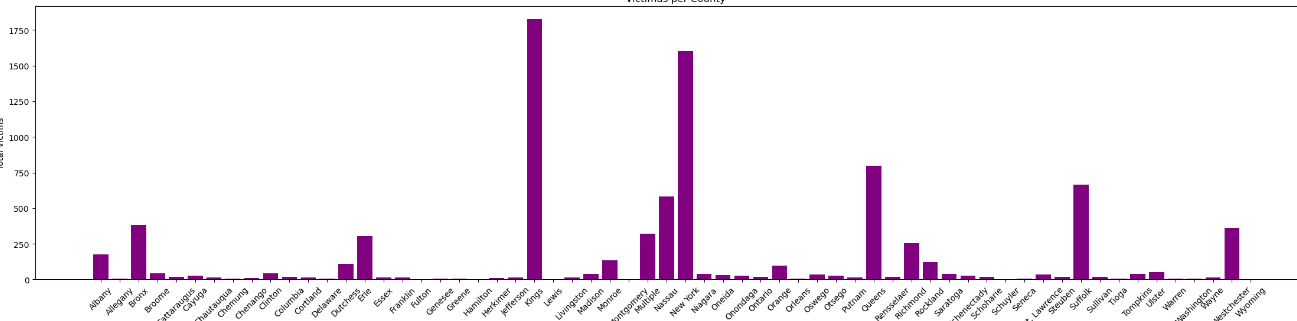

Esta imagen es importante porque muestra el como ciertos condados de New York tienen muchos mas crimenes de odio que los demas, lo cual debe tener un motivo debido a que uno pensaria que seria mas equitativo.

Despues de el analisis del dataset de suicidios intentamos relacionar los dos pero las limitaciones del dataset nos hicieron cambiar de rumbo.

## **Parte 3. Nuevo Dataset**
---

Los datasets que teniamos eran un poco limitados para lo que queriamos buscar asi que buscamos por algo que teniamos pensado antes. Educacion.
Sera que la cantidad y calidad de educacion por condado influye en lo anterior?
Pues si...
Pero no para lo que teniamos en mente.

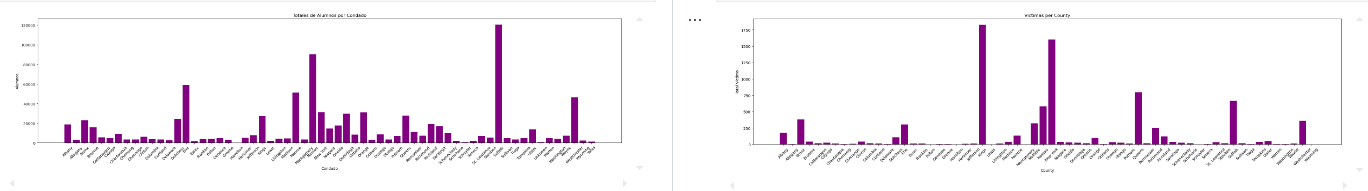

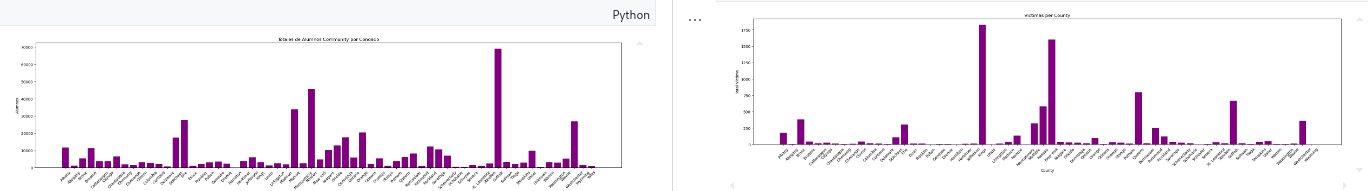

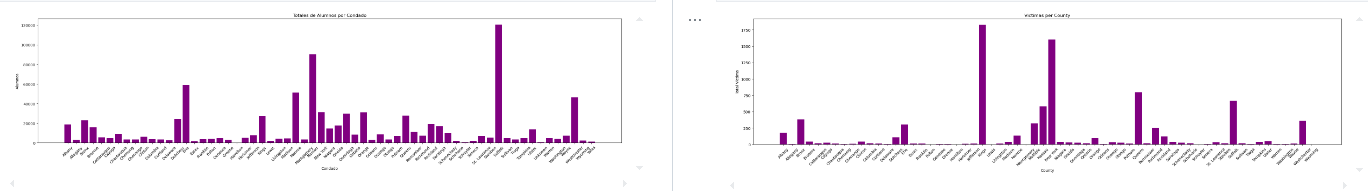

Veran, estas imagenes son comparaciones de las graficas de la cantidad de graduados ya sea en universidades publicas, tecnologicas, entre otras, contra los crimenes de odio en esos mismos condados.
En algunas no se puede apreciar bien por la diferencia de orden entre los condados y el nombre de las universidades. Pero se puede notar una cosa. Algunas barras son muy similares. Y no solo en una grafica, en varias. 
Nosotros teniamos pensado que la relacion seria similar a la de los crimenes con el salario. Pero fue lo opuesto. 
La cantidad de alumnos que se graduaban de una universidad era proporcional a la cantidad de crimenes de odio que habia en el mismo condado.

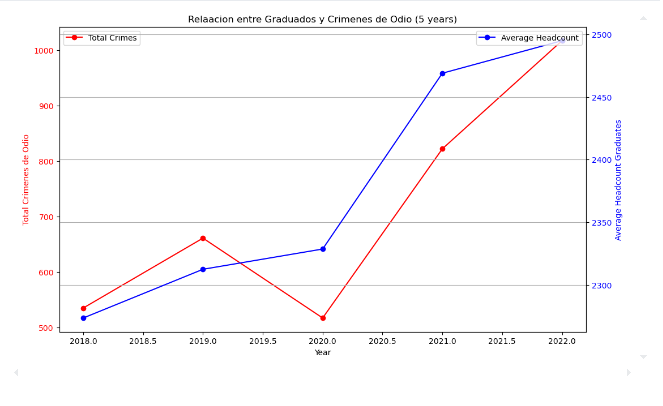

Como podemos apreciar en esta grafica, es muy similar la cantidad que hay de ambos.
Y esta fue la segunda conclusion que sacamos. 
Aqui fue cuando decidimos hacer uso de Machine Learning para poder analizar mejor los datos y hacer predicciones para ver si los datos de verdad estaban relacionados.

## **Parte 4. Machine Learning**
---

Usando todo nuestro conocimiento de Spark, decidimos utilizarlo tambien para los modelso que queriamos crear. 
Aqui ira una explicacion mas a detalle de todo porque fue lo que mas se nos dificulto.

Lo primero que vamos a encontrar es los importes que utilizamos durante los modelos. SparkSession para usar spark, y los demas para el modelo.

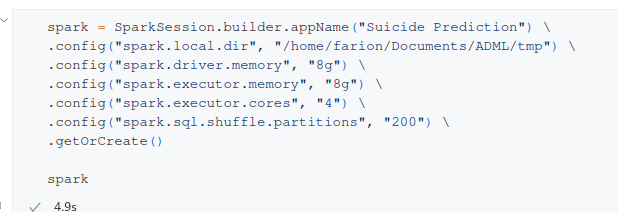

Esta parte es muy importante. Originalmente spark no contaba con ninguna configuracion personalizada debido a que no sabiamos que lo ibamos a necesitar. 
La primera configuracion es para cambiar la carpeta de runtime de spark. Esto es porque al crear el modelo, la carpeta temporal que usaba se quedaba sin espacio muy rapido y no podia continuar el programa. 
Las siguientes 3 configuraciones son para la optimizacion de spark con nuestro equipo debido a que si era muy pesado lo que teniamos en mente.
La ultima fue de lo mas util. Veran, spark por puro concepto cuenta con la arquitectura para poder divir las tareas y procesos en particiones para conseguir una mayor eficiencia en tu programa. Esto fue algo que descubirmos al crear el modelo.

Los pasos basicos que hicimos fueron :

- Cargar los datasets de nuevo.
- Analizar los schemas.
- Limpiar los nulls y espacios.
- Y finalmente unirlos.

Unir los datasets originalmente fue facil.
Se creaba uno nuevo "r1" para explicar que era la primera relacion, se escogian las columnas que se iban a integrar y se avanzaba con el siguiente.
Esto fue asi hasta que se llego a r5 = suicides.
El programa crasheaba al momento de intentar unir este dataset debido a que la estructura de suicides era bastante compleja para los demas datasets. El programa se quedaba sin espacio y se rompia, entonces decidimos dejarlo en r4 y manejar los suicides aparte.

Aqui es cuando llegamos al modelo. El cual estuvo 180 minutos en ejecucion sin avanzar en lo absoluto.
Veran, lo que se estaba haciendo era implementar el algoritmo de RandomForestRegressor (Lo explicaremos mas adelante) para escoger las columnas y el dataset que se utilizaria en el entrenamiento de las predicciones. Todo marchaba bien hasta que llegaba a rf.fit(). Ahi es donde el programa dejaba de avanzar.

Despues de las 3 horas que se estuvo esperando. Empezamos a buscar soluciones. Primero el arreglar el espacio, como vimos anteriormente, se cambio a una carpeta local. Despues el mejorar el hardware prestado. Cada vez iba avanzando mejor. Pero no sucedia nada. Fue ahi cuando se penso en analizar las relaciones para ver cuantos datos estabamos manejando.

Para hacer esto implemento una funcion para agarrar el 1% del dataset y contar los datos. Pero se quedaba atorado igual. Bastante raro no?
Entonces fuimos probando relacion por relacion. R1 con 1000 datos, R2 con 200000 y R3 con 47000000 Millones de datos. Si R3 ya contaba con esta cantidad de datos, el 1% de R4 era exponencialmente mayor (Algo que jamas podemos descubrir debido al tiempo que iba a requerir) ahi fue cuando se implementaron diferentes tecnicas de spark. Se particionaron los datasets para que fuera mas eficiente, se acomodaron las columnas por pariticon para que no existiera un cuello de botella y se tomo la decision de entrenar el modelo con el 1% de R3.

Y finalmente conseguimos 

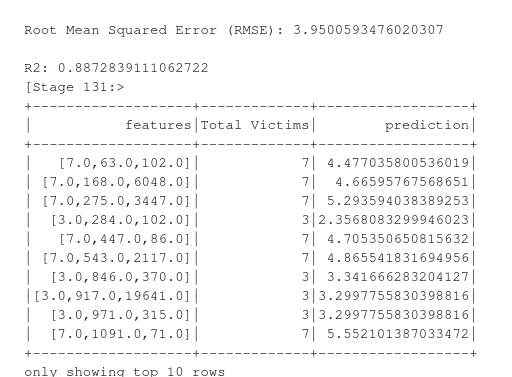

Pero que significa eso?
RMSE es el posible error que tiene el modelo con la relacion de los datos. Mientras mas bajo sea el numero, significa que tiene sentido el modelo. Pero que tan bajo es bajo? Pues en otro intento con otros datos el RMSE era de 600 asi que un 4 esta bastante bien.
El R2: es que tan viable es el modelo escogido para la prediccion que queremos. Cerca de 1 significa muy eficiente. Cerca de 0 significa muy similar a solo sacar el promedio y un numero negativo es que es mucho peor que solo sacar el promedio.
Luego en la tabla podemos ver los datos. Osea que, por cada victima, por cada persona y por cada persona graduada, nos decia la cantidad de crimenes de odio que deberia haber. Esto nos lleva a la tercera conclusion.

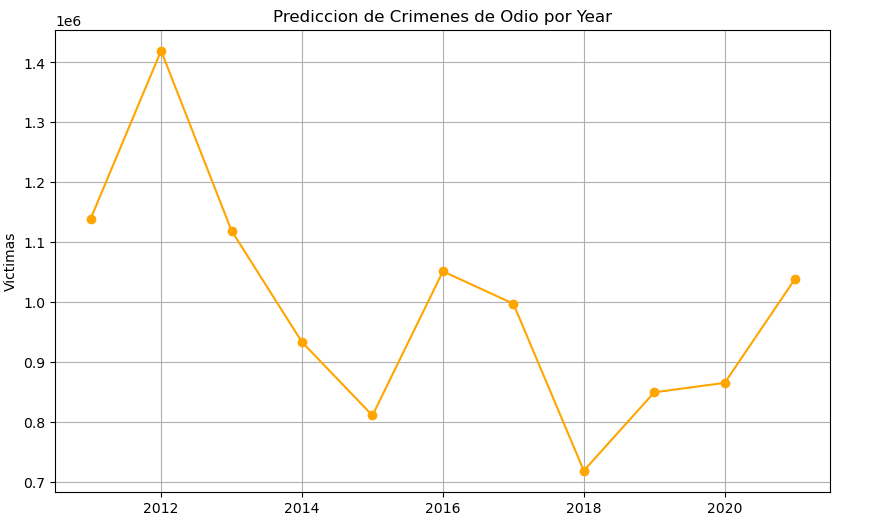

La prediccion es muy similar a los valores originales. Esto implica que si hay una relacion directa.

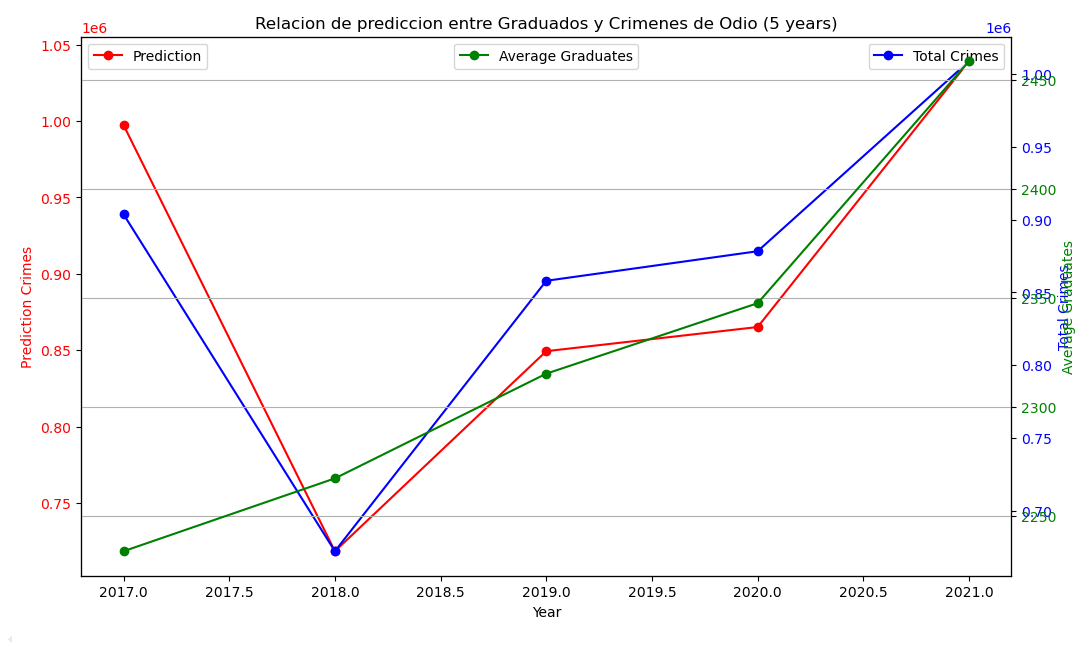

Aqui podemos apreciar un mejor analisis de lo parecido que es.

Finalmente intentamos hacer lo mismo con los suicidios pero debido al como manejamos los datasets.

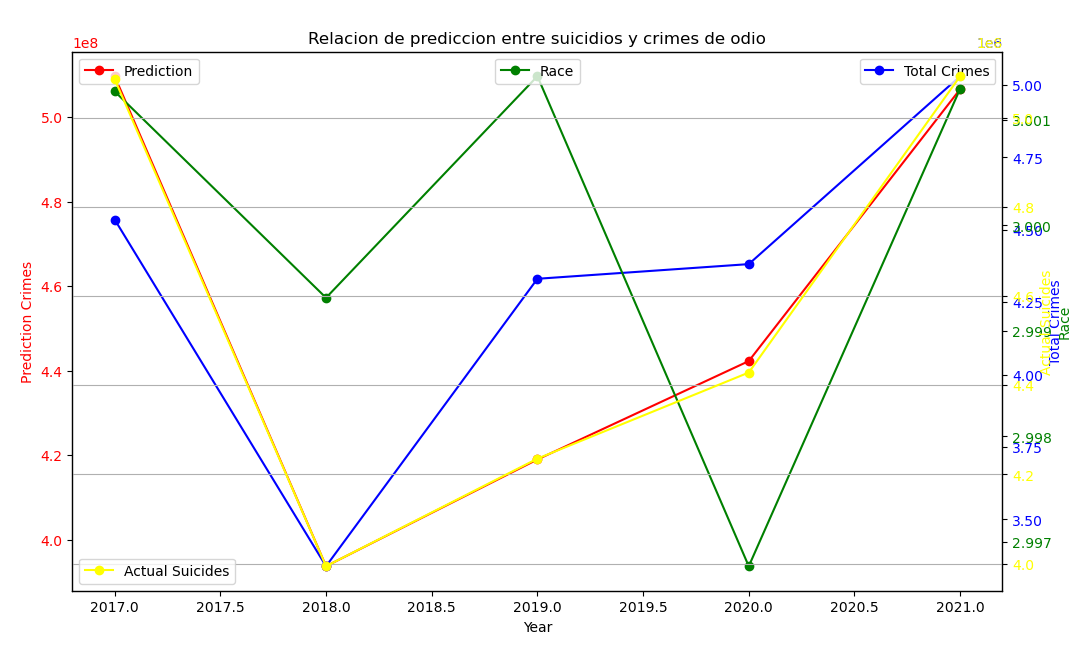

Termino siendo muy diferente a lo esperado. Lo unico que se pudo sacar de ahi es que los crimenes de odio y los suicidios si tienen relacion pero el plan original era ver por raza o etnicidad. 

## **Final**

Que nos llevamos? Que aprendimos? Que podriamos mejorar?
Realmente fue de las mejores maneras de aprender a utilizar una herramienta para entender conceptos de lo que seria el Analisis de Datos.
Aprender Spark es de lo mas importante que pudimos llevarnos de esta materia. Es una herramienta bastante completa y eficaz que se puede utilizar para lo que tengas en mente relacionado al analisis de datos. Y aunque nos diera muchos problemas al inicio, es posible que el proyecto se pudo acabar como lo hizo gracias a esta. 

Tal vez no sea mucho pero lo que sacamos del proyecto fueron tres cosas.

- El indice de criminalidad de Nueva York es dependiente de cuanto salario tengan las personas. Creemos que es debido a las necesidades basicas de estas mismas ya que si cuentan con ellas, no se tendria motivo para cometer algun crimen.

- La gente se empieza a volver intolerante despues de pasar por la universidad. Esto no tenemos idea de porque puede suceder. Es algo que nos gustaria investigar mas.

- Los crimenes de odio si influyen en la cantidad de suicidios que hay en el estado. Y aunque no se pudo probar mucho, es posible que tambien tengan que ver las razas de las personas en esto.


Para finalizar, me gustaria comentar sobre el que para mejorar todo lo que hicimos, sera simplemente empezar de cero. Ya que ahora tenemos una idea de Spark, de como hacer uso de los datos y de la cantidad de cosas que se pueden hacer, lo dificil seria el pensar el como podriamos relacionar los datos nadamas. Sigo haciendo uso del ejemplo de los suicidios por raza, debido a la forma en la que agarramos esos datos, no se pudo comparar bien el dataset con la prediccion. Pero gracias a los valores de RMSE y R2 nos podemos dar cuenta de que al menos existen relaciones que se tendrian que investigar mas a fondo. Esto nos da idea de que podemos manejar los datos como queramos y seguir investigando en buscar cosas que pensabamos que entendiamos.